<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/rl/openai-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to OpenAI on Colab


## Step 1: Installation for Colab - just execute these cells and do not worry too much

* http://nbviewer.jupyter.org/github/patrickmineault/xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb 
* https://docs.microsoft.com/en-us/message-passing-interface/microsoft-mpi
* https://nyu-cds.github.io/python-mpi/setup/
* https://medium.com/@kaleajit27/reinforcement-learning-on-google-colab-9cb2e1ef51e


In [0]:
# !apt-get install python-opengl -y  >/dev/null
# !apt install xvfb -y >/dev/null

In [0]:
# !pip install pyvirtualdisplay >/dev/null
# !pip install piglet >/dev/null

In [0]:
# from pyvirtualdisplay import Display
# display = Display(visible=0, size=(1400, 900))
# display.start()

In [0]:
!pip install git+https://github.com/openai/baselines >/dev/null
!pip install gym >/dev/null

In [0]:
!pip install JSAnimation >/dev/null

In [0]:
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython.display import display

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 144)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='once'))

## Step 2: Understanding Standard Environments

The OpenAI gym provides us with a number of environments. You could view then as simulators that 

1. deiliver observations and rewards based on
1. actions executed by an agent who learns to behave well in the simulated world

The environment also defines which actions are allowed (actions space) and how observations look like (observation space). The agent should try to maximize the cumulated reward.

![Learning Cycle](http://gym.openai.com/assets/docs/aeloop-138c89d44114492fd02822303e6b4b07213010bb14ca5856d2d49d6b62d88e53.svg)

Links
* http://gym.openai.com/docs/
* https://github.com/openai/gym


In [7]:
import gym
# env = gym.make('CartPole-v0')
# env = gym.make('MountainCar-v0')
# env = gym.make('Pendulum-v0')

# https://github.com/openai/gym#atari
# http://gym.openai.com/envs/MsPacman-v0/

env = gym.make('MsPacman-v0')
# env = gym.make('SpaceInvaders-v0')

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [8]:
env.action_space

Discrete(9)

In [9]:
env.observation_space

Box(210, 160, 3)

In [10]:
# Run a demo of the environment
observation = env.reset()
cumulated_reward = 0

frames = []
for t in range(1000):
#     print(observation)
    frames.append(env.render(mode = 'rgb_array'))
    # very stupid agent, just makes a random action within the allowd action space
    action = env.action_space.sample()
#     print("Action: {}".format(t+1))    
    observation, reward, done, info = env.step(action)
#     print(reward)
    cumulated_reward += reward
    if done:
        print("Episode finished after {} timesteps, accumulated reward = {}".format(t+1, cumulated_reward))
        break
env.close()

Episode finished after 640 timesteps, accumulated reward = 260.0



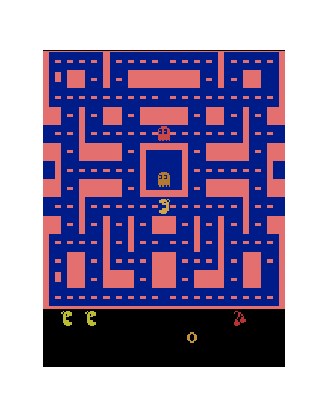
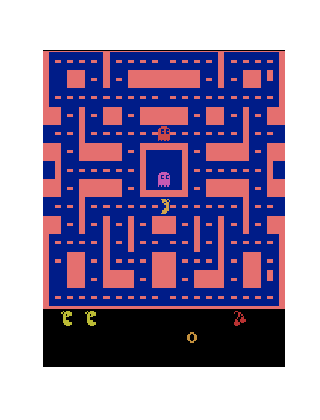
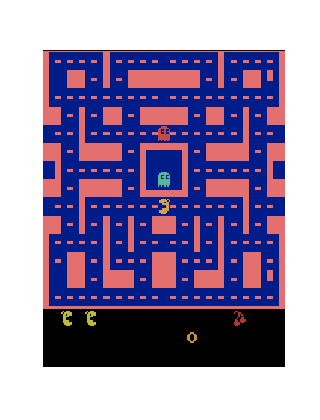
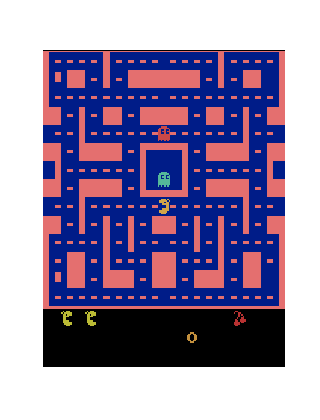
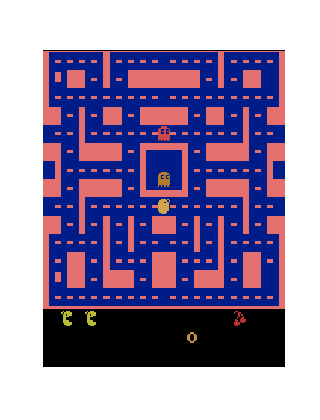
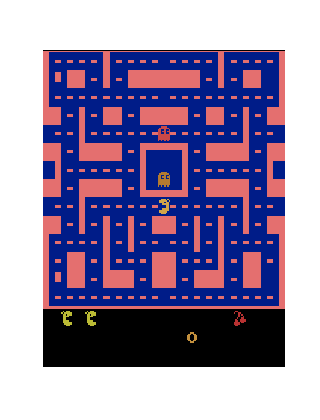
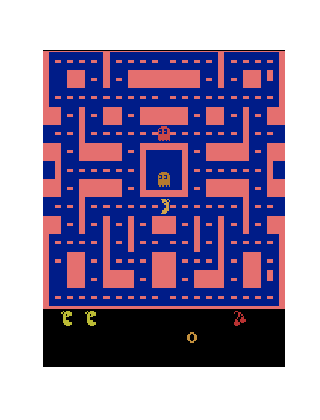
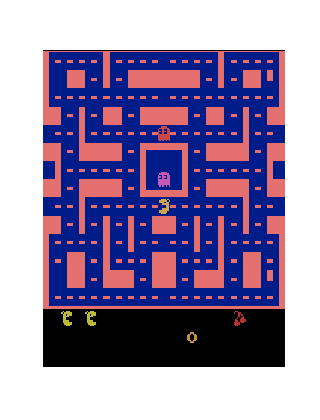
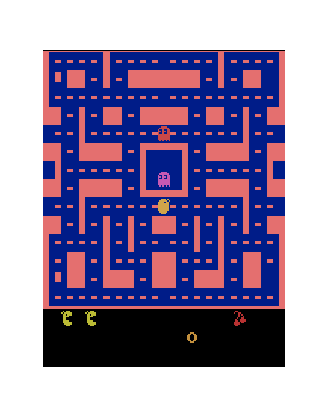
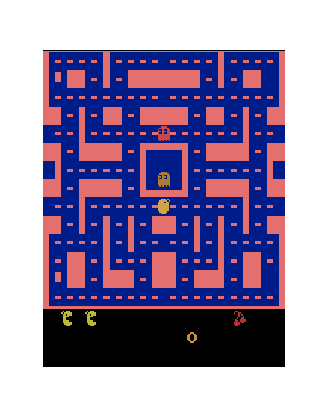
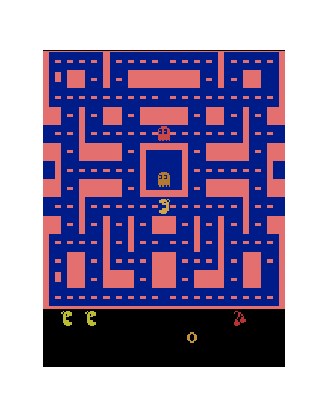
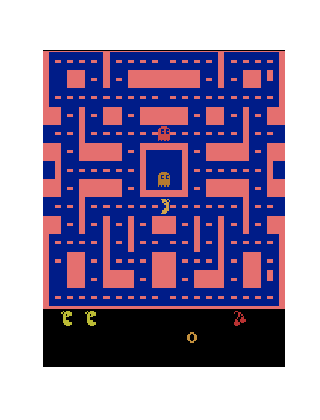
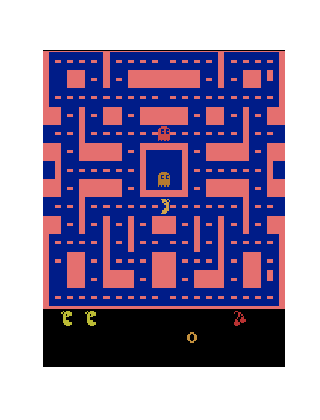
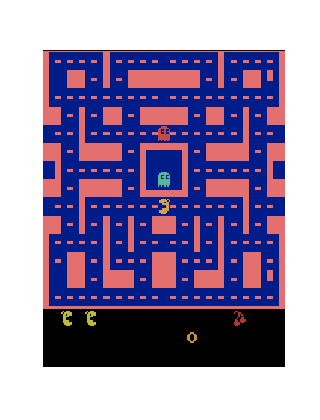
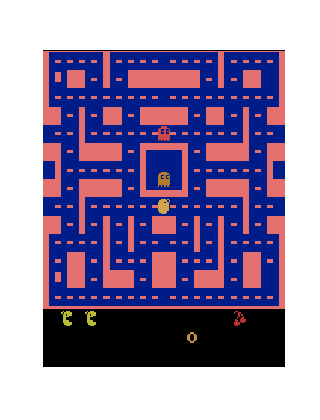
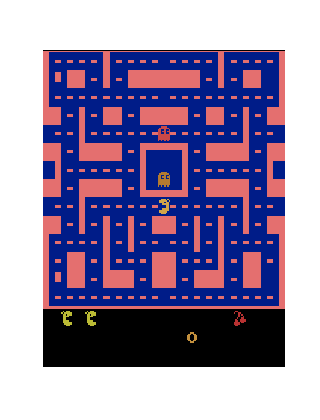
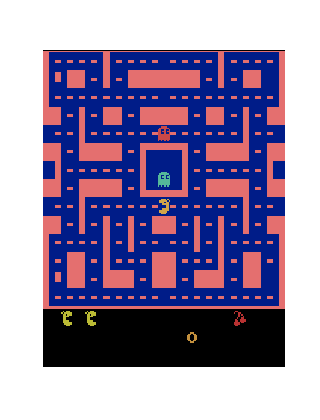
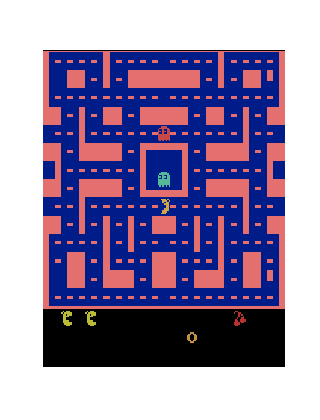
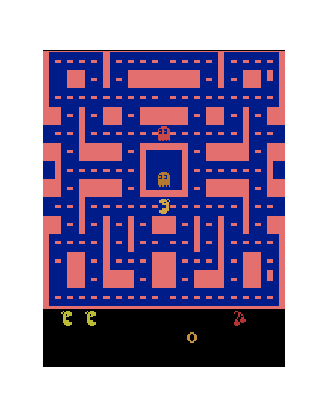
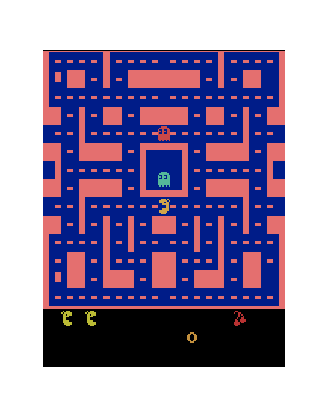
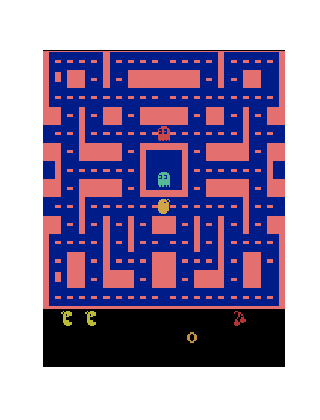
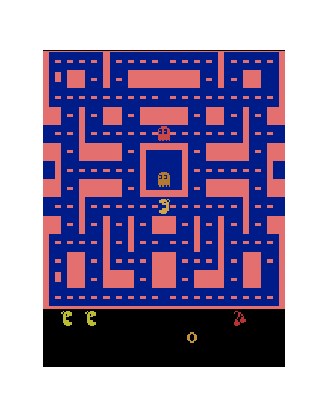
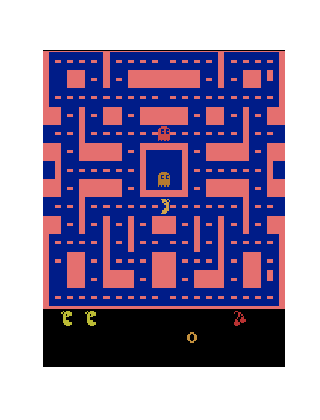
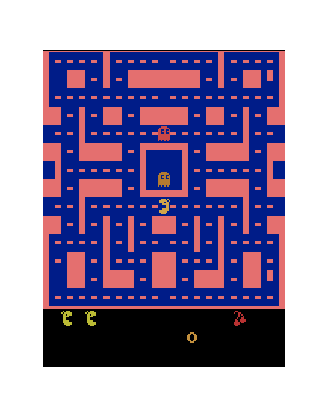
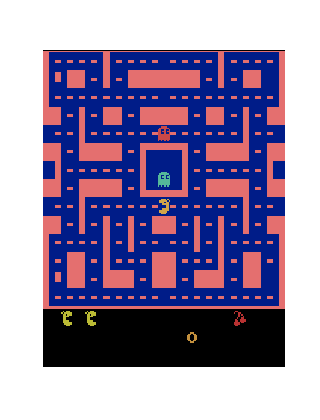
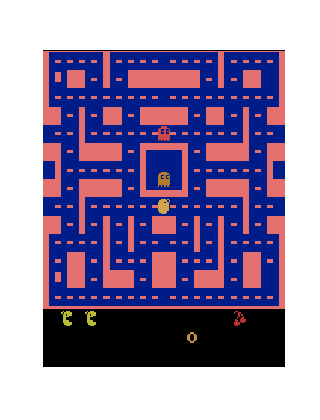
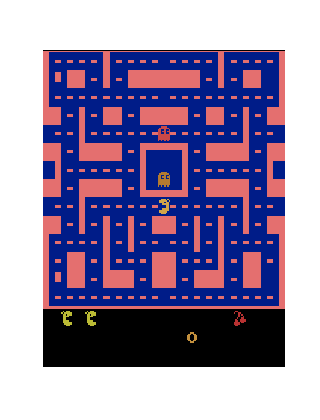
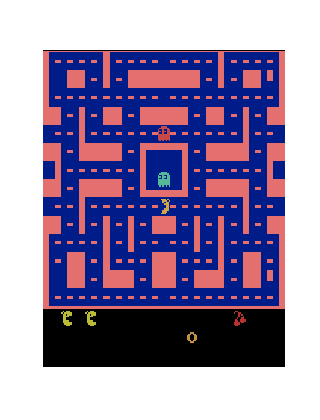
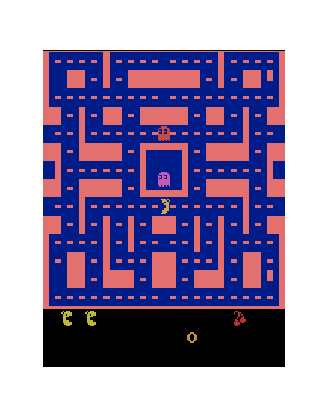
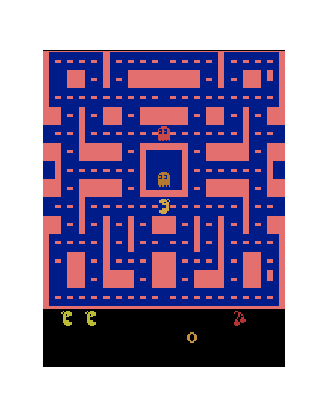
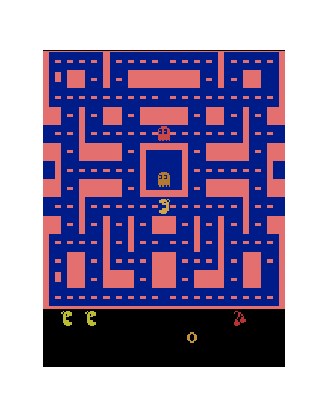
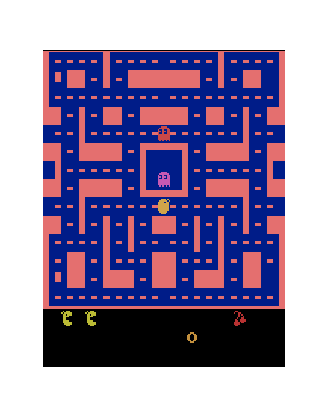
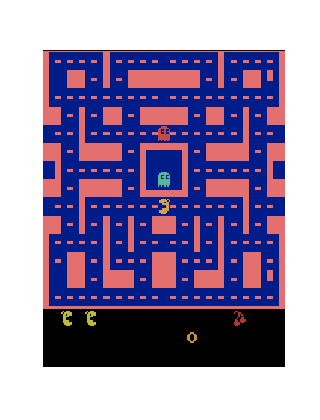
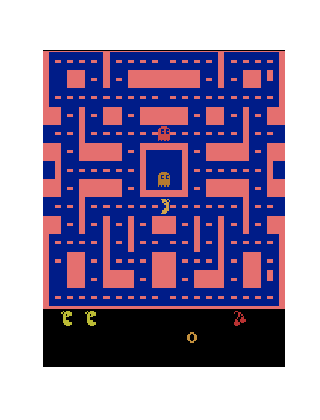
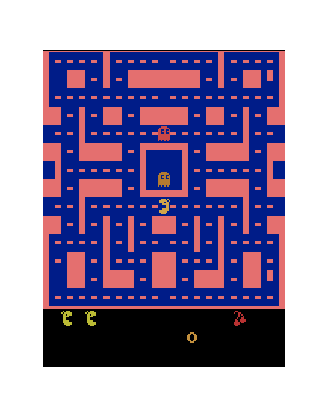
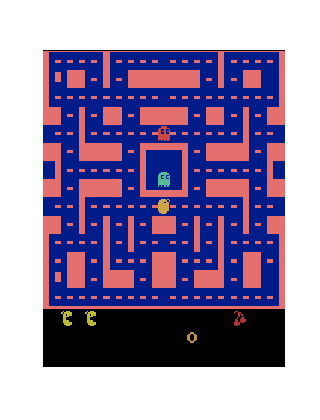
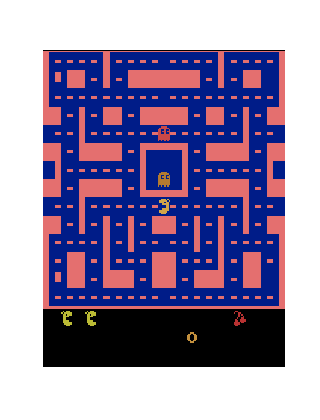
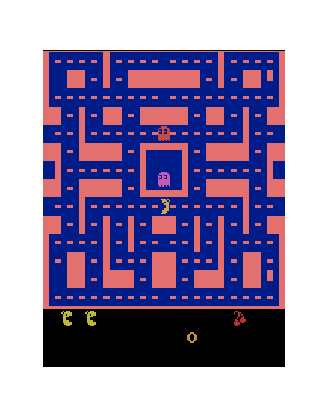
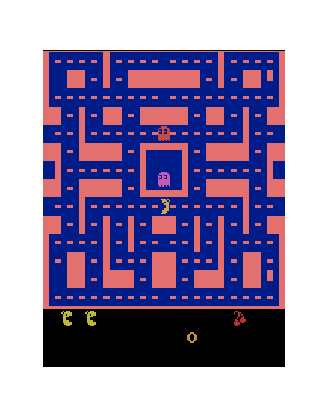
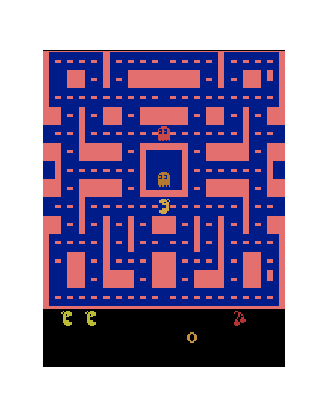
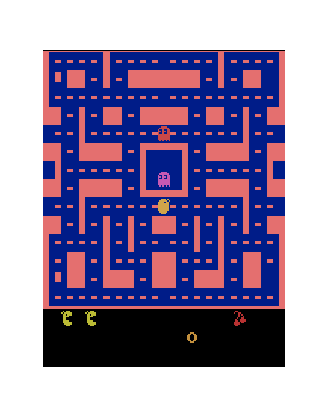
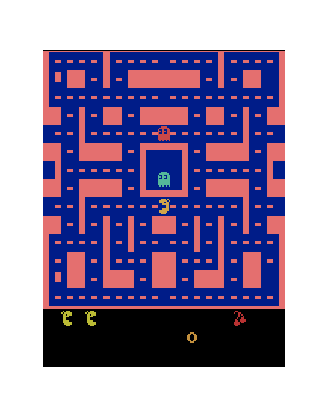
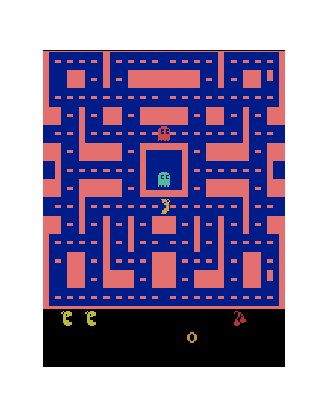
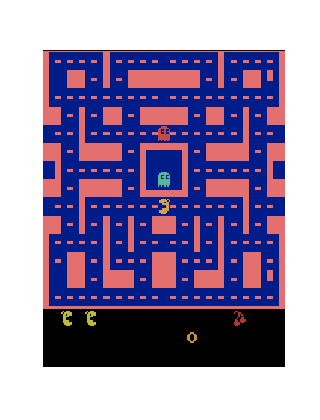
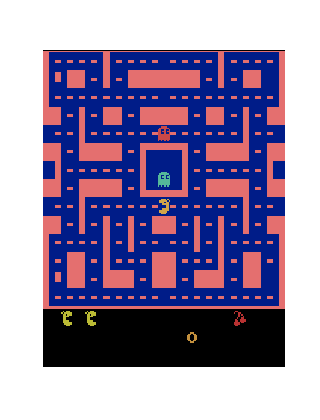
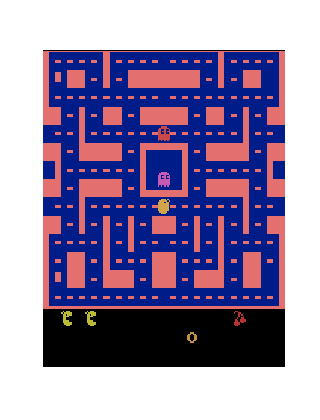
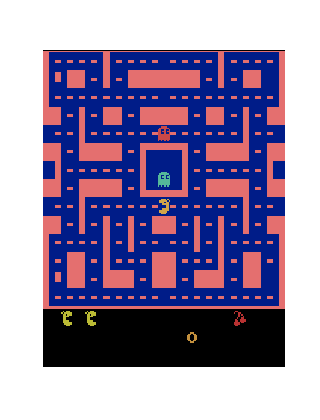
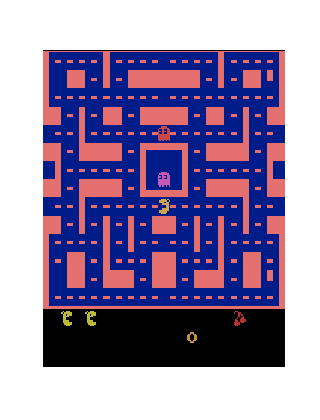
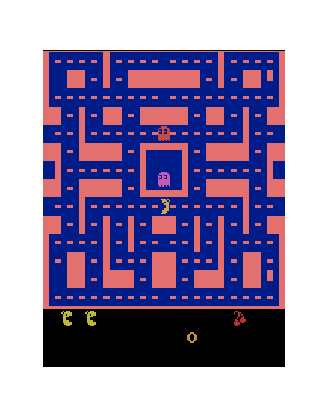
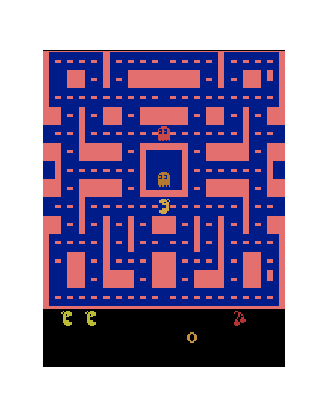
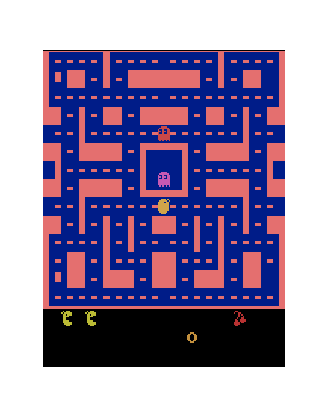
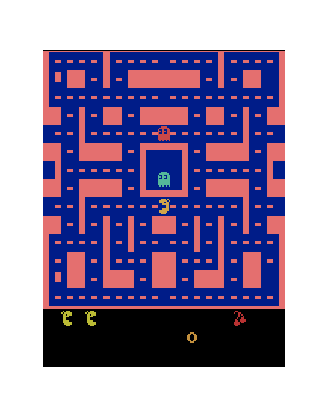
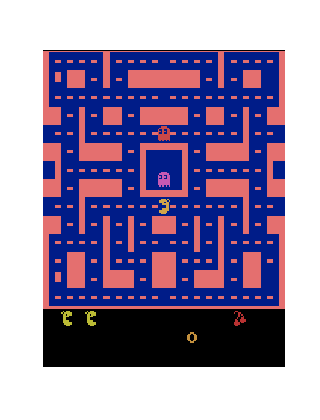
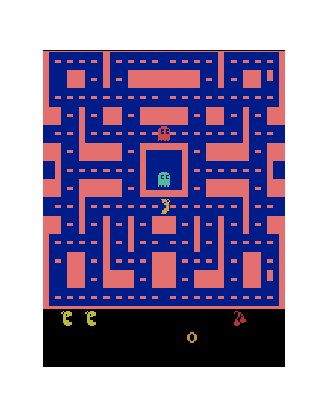
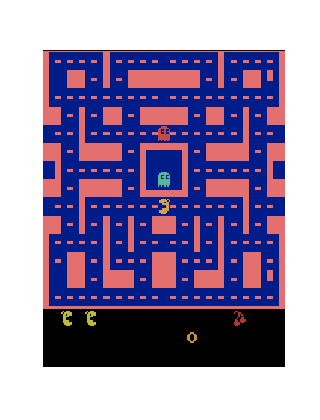
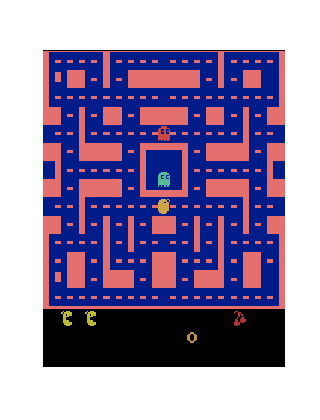
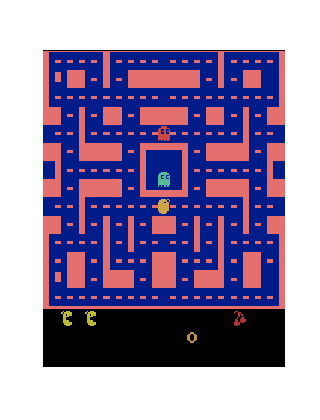
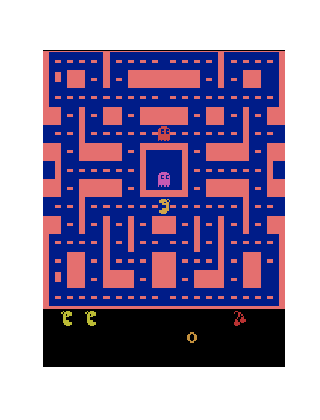
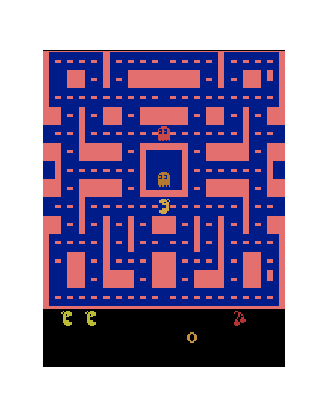
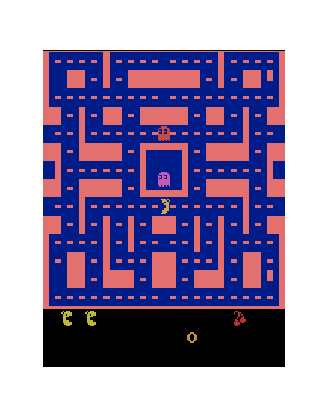
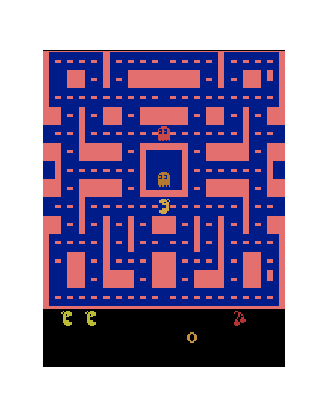
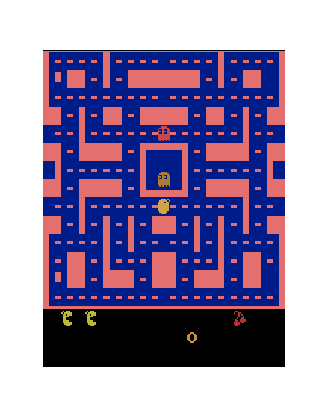
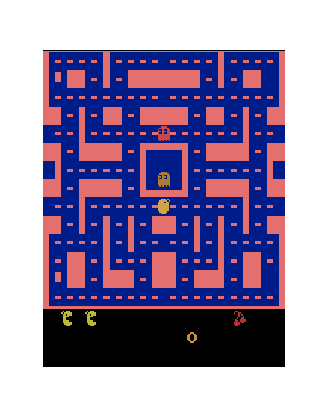
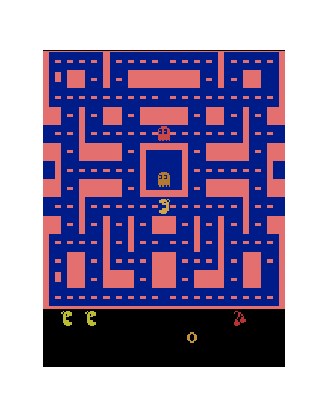
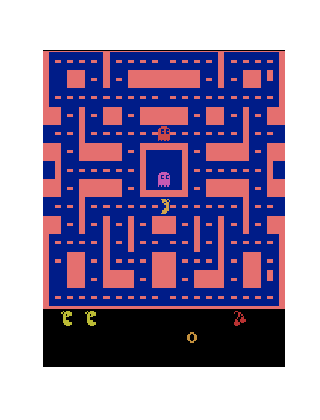
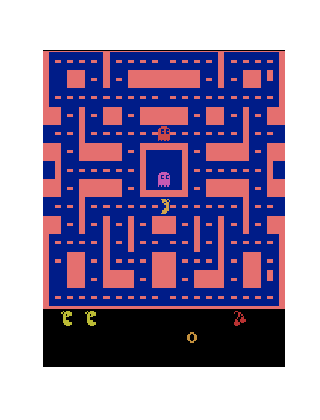
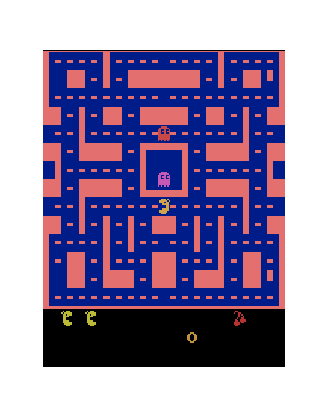
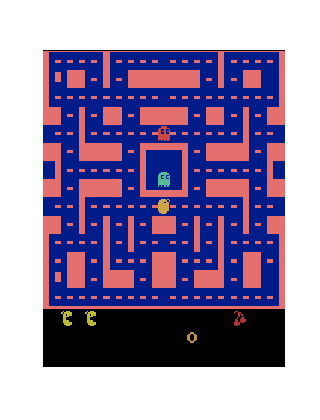
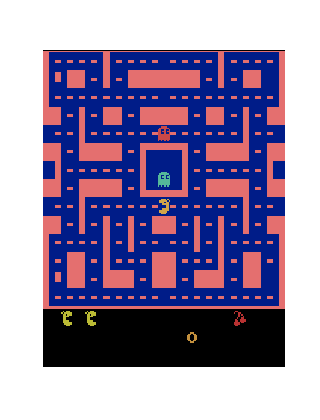
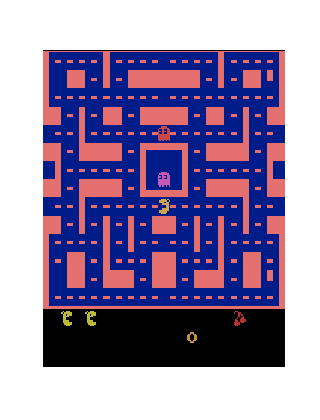
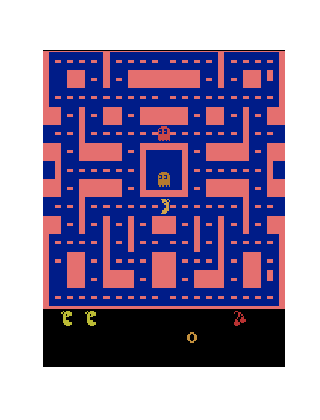
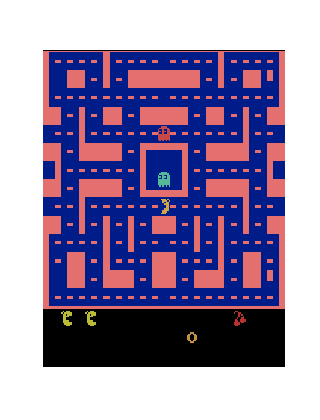
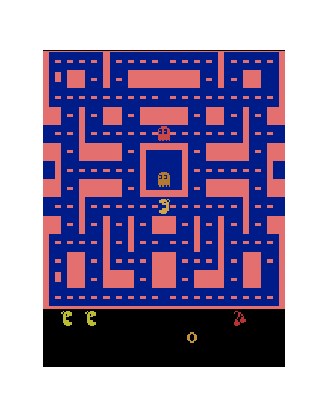
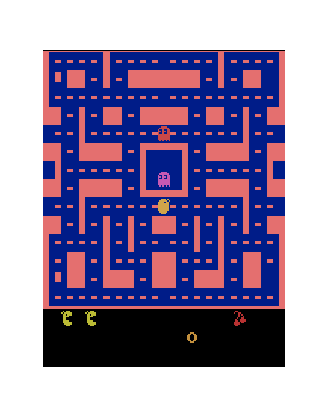
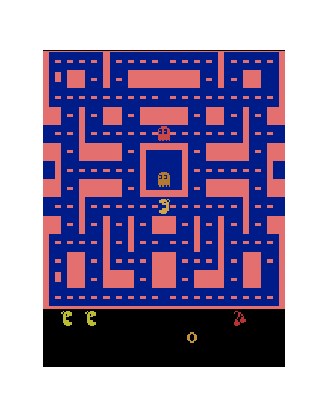
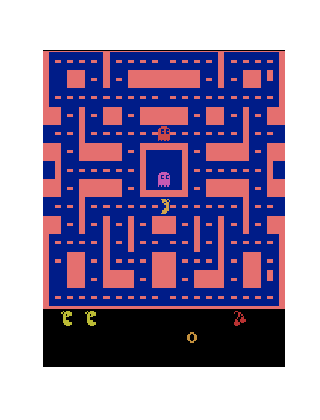
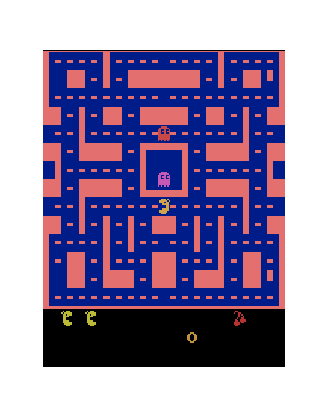
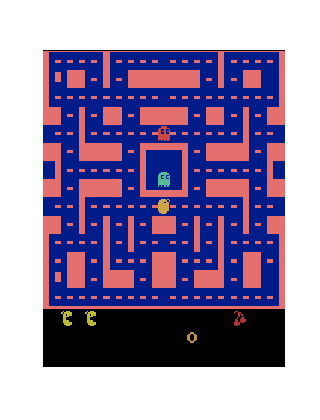
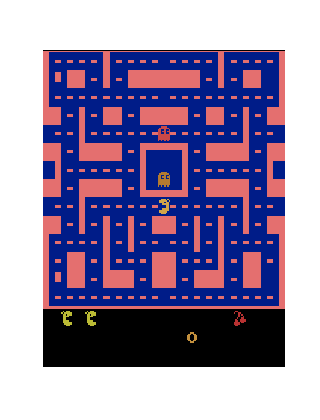
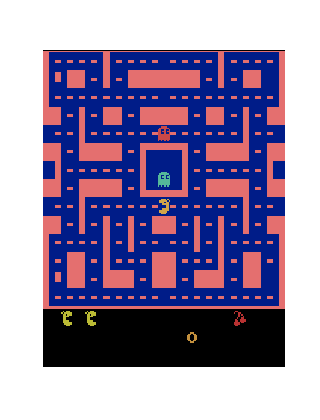
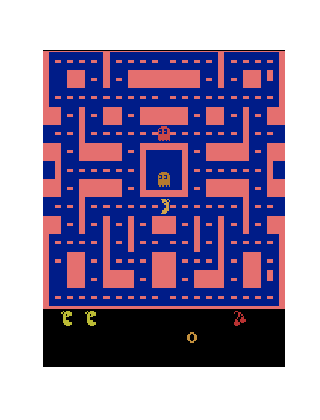
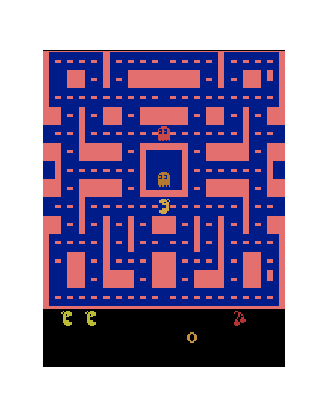
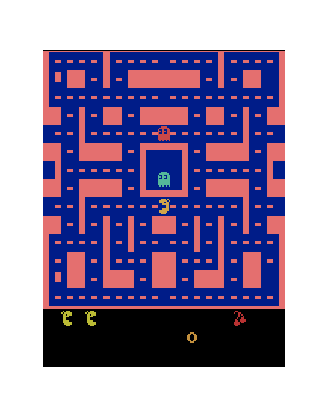
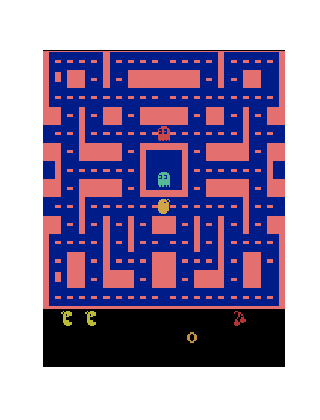
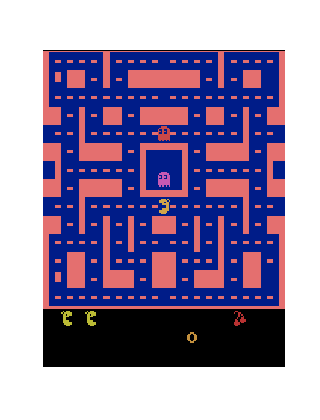
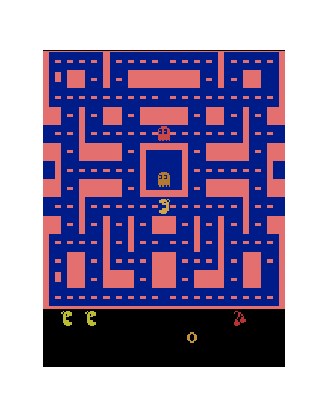
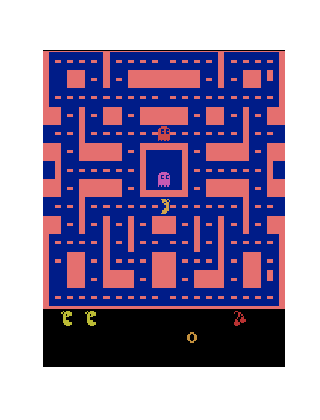
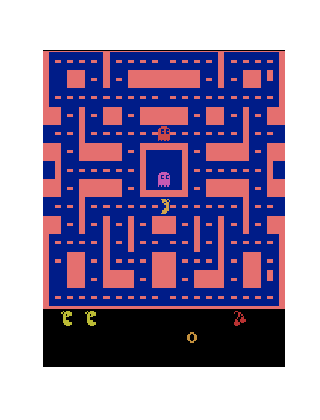
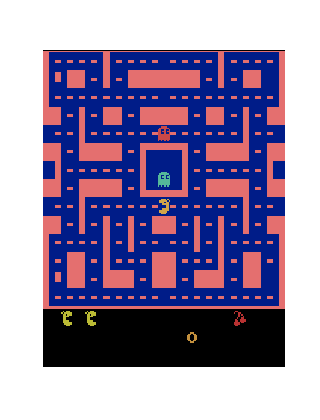
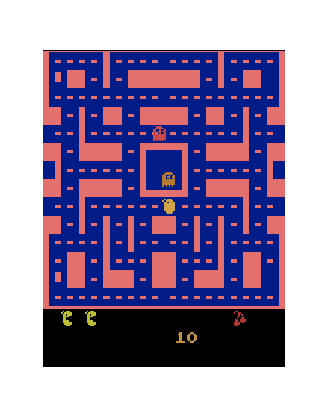
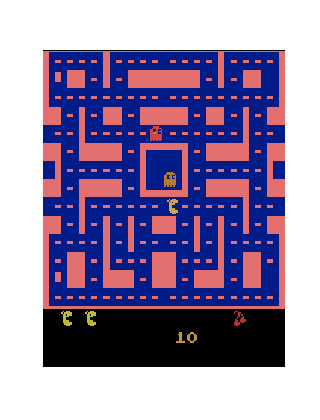
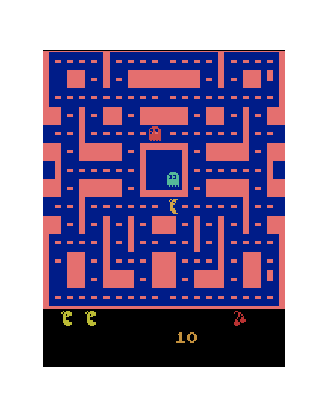
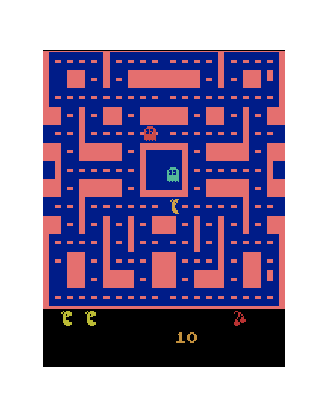
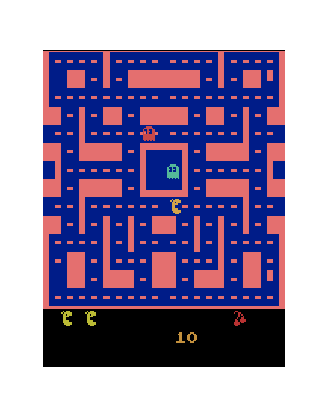
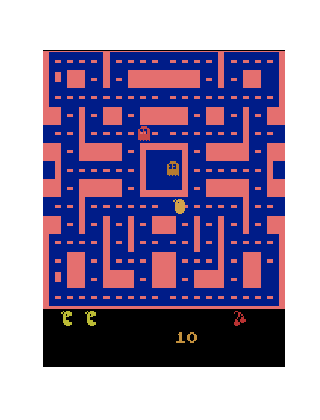
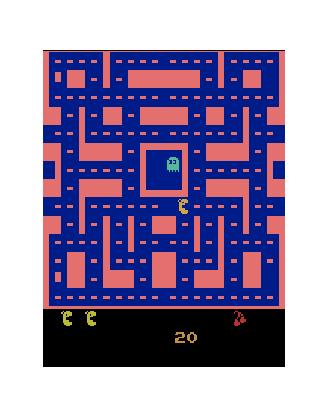
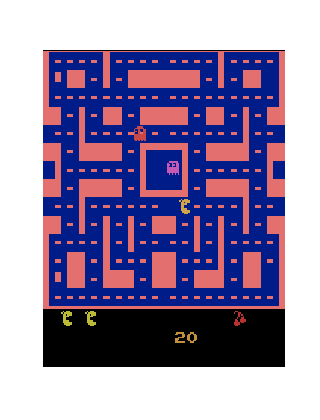
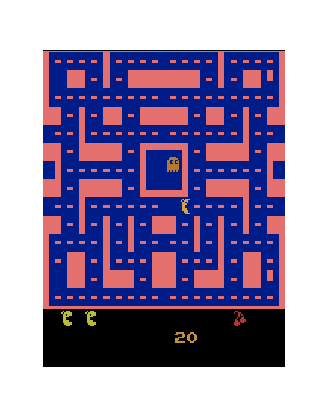
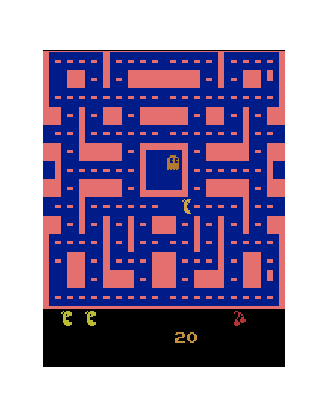
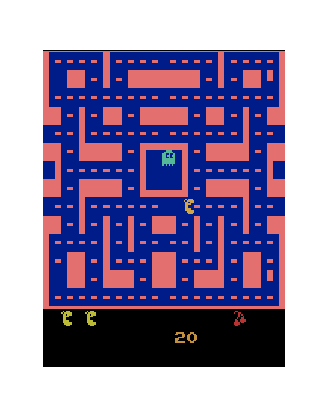
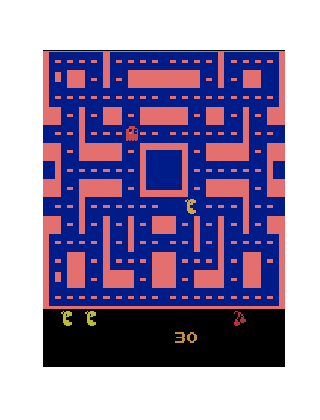
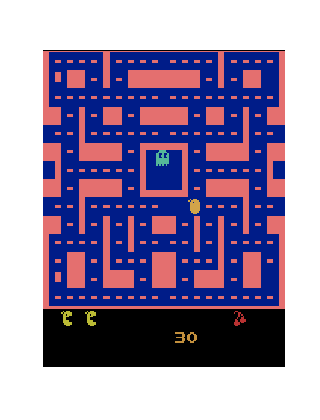
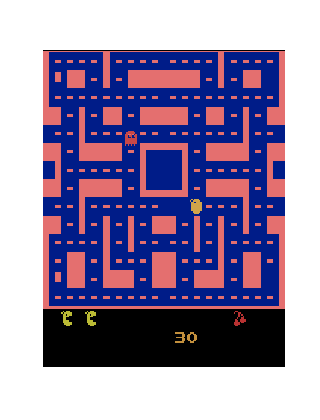
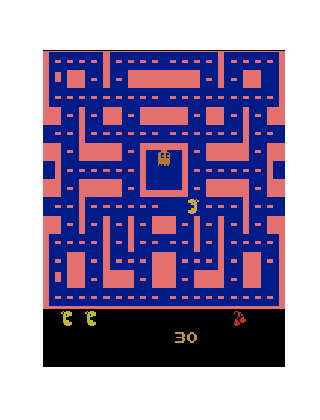
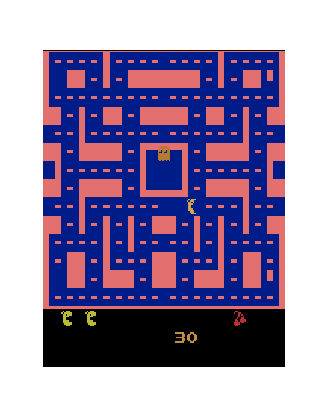
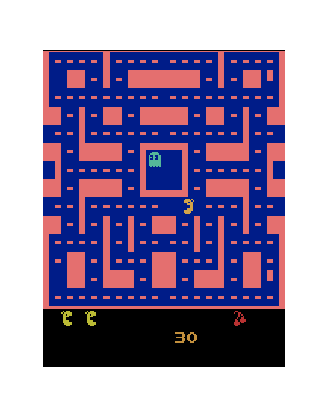
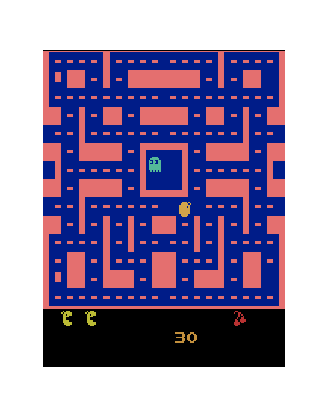
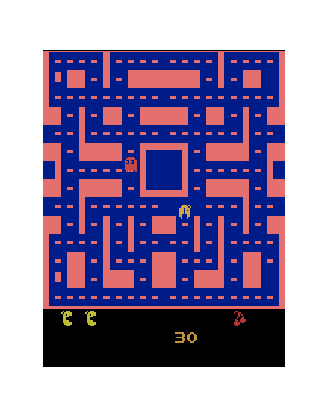
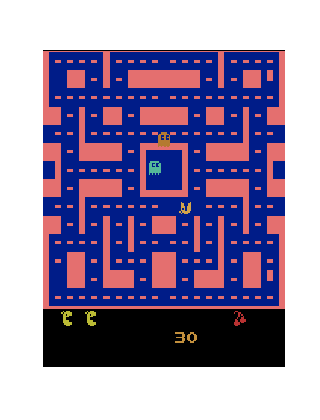
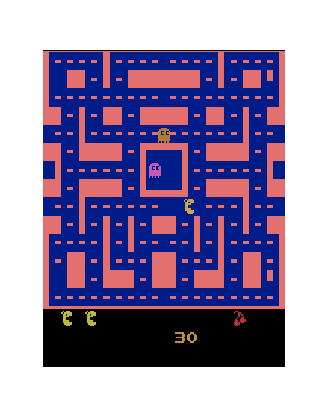
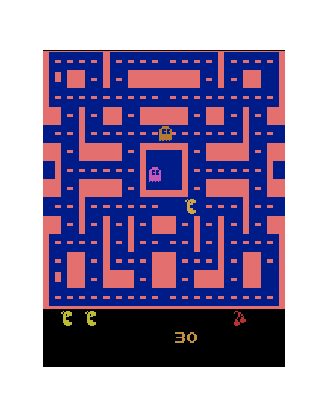
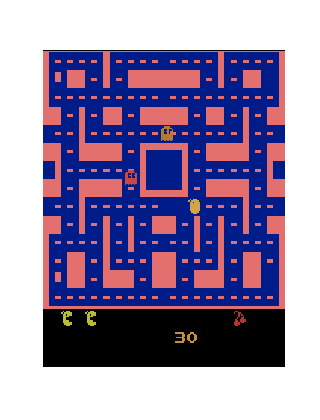
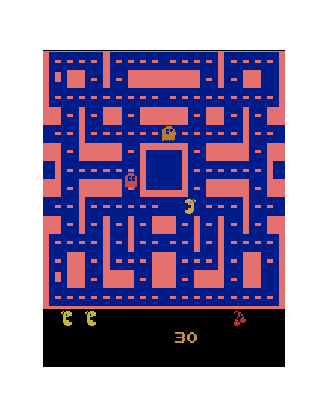
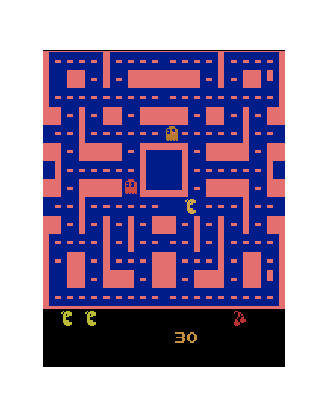
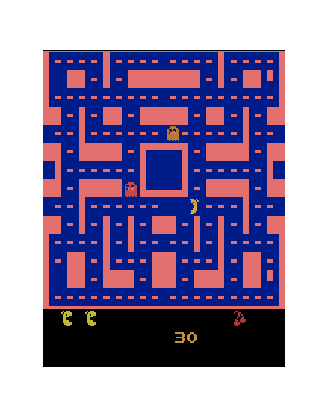
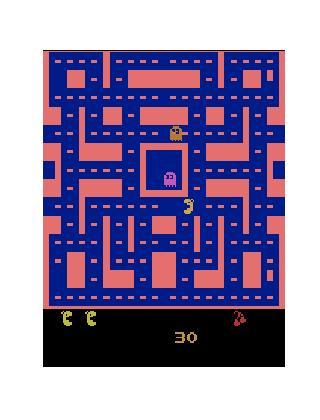
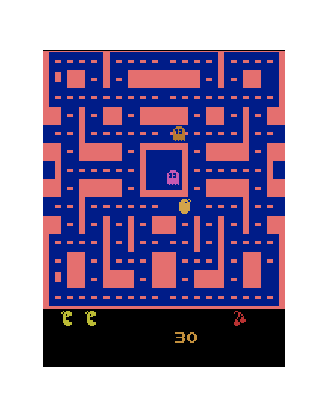
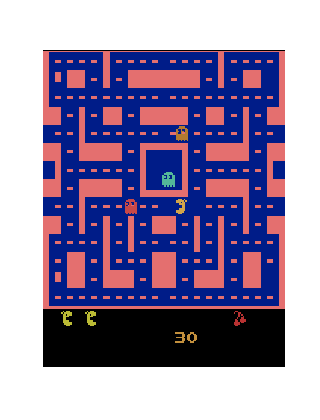
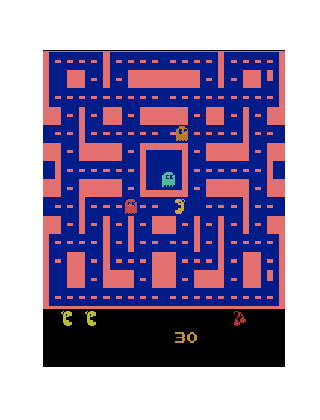
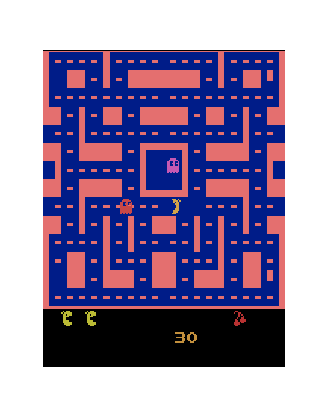
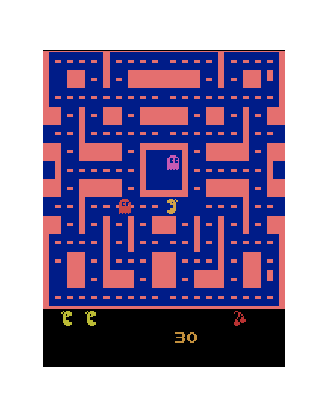
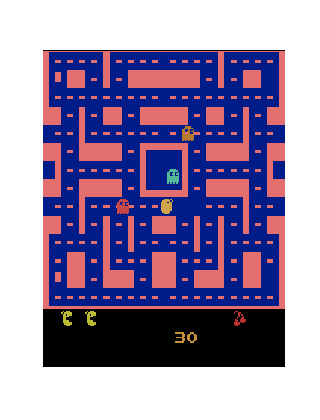
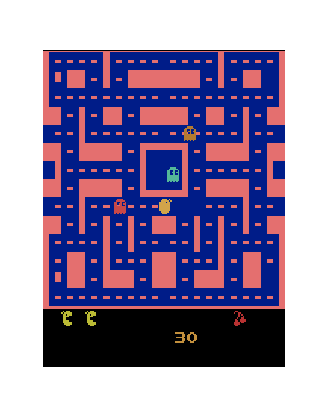
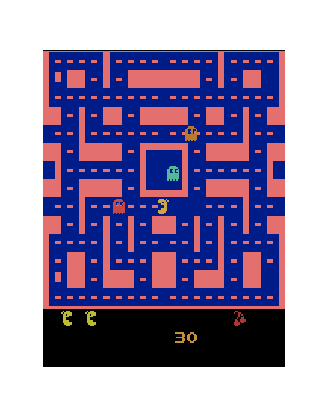
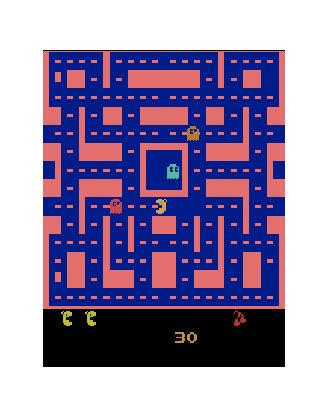
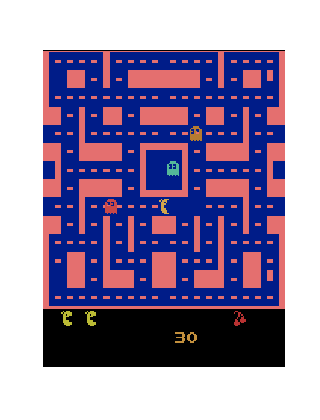
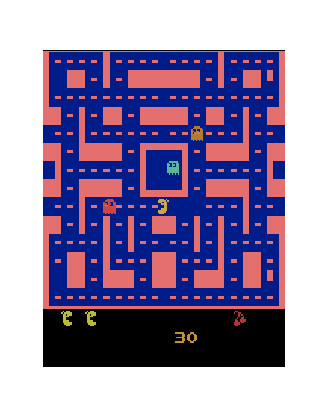
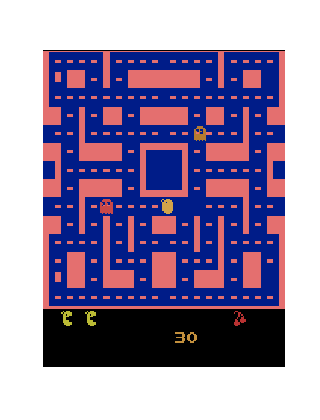
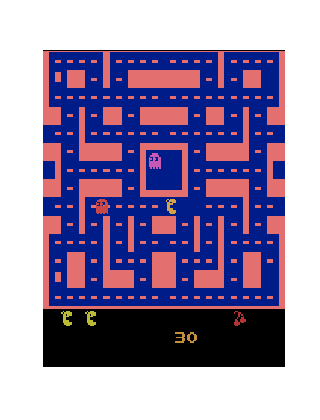
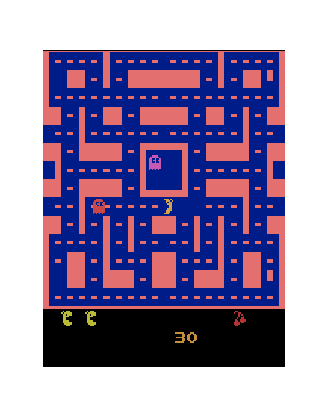
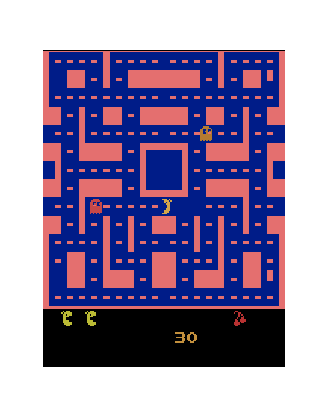
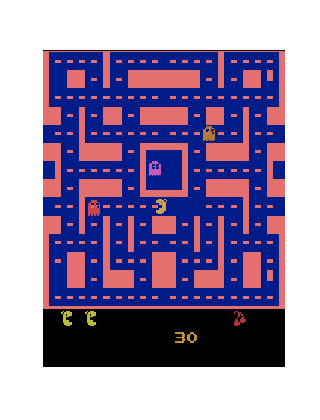
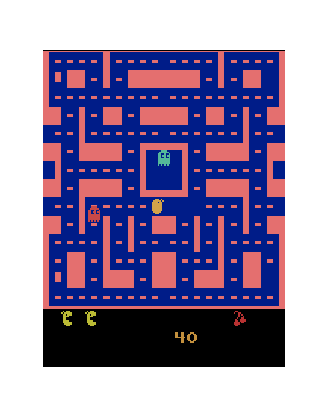
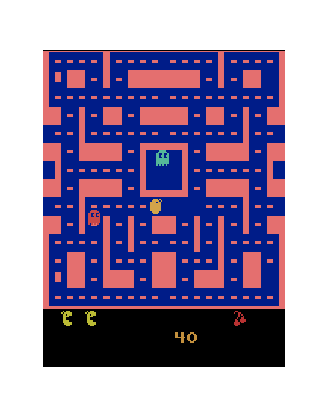
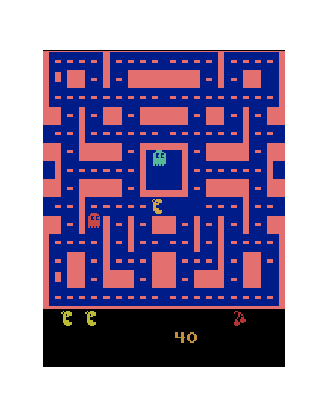
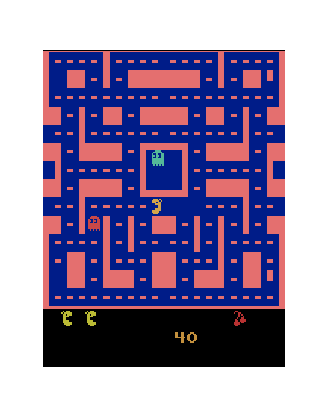
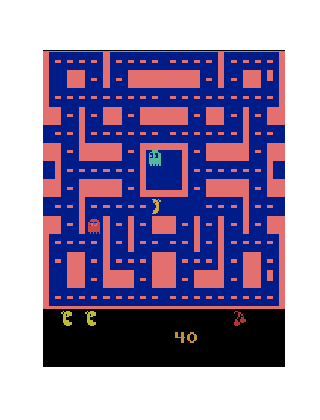
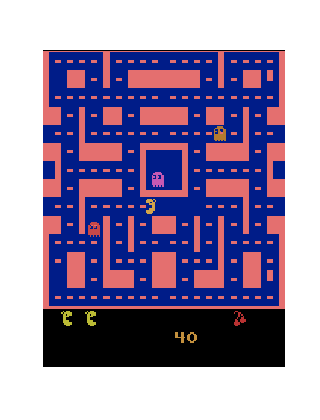
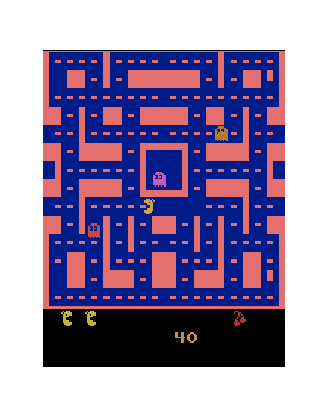
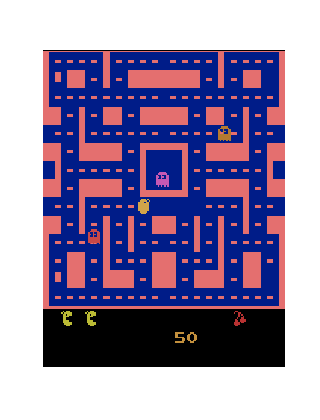
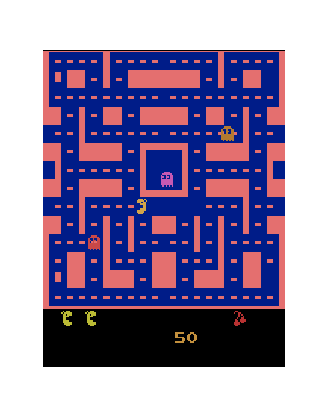
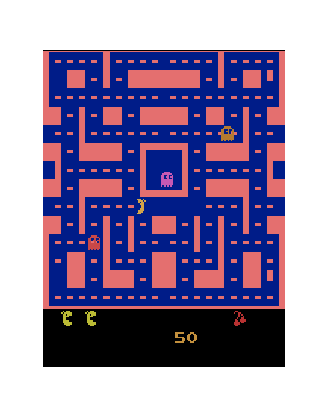
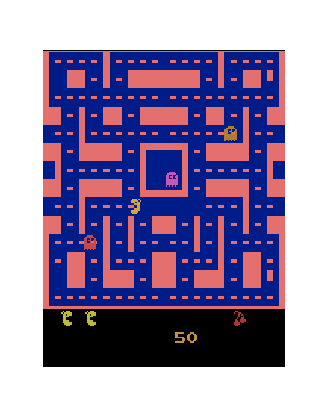
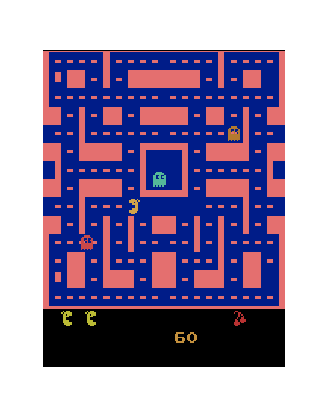
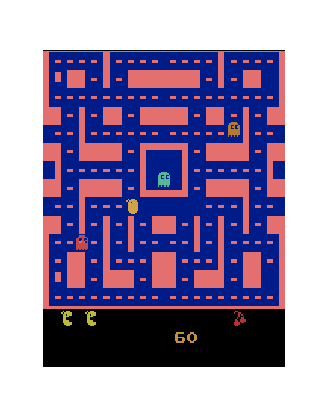
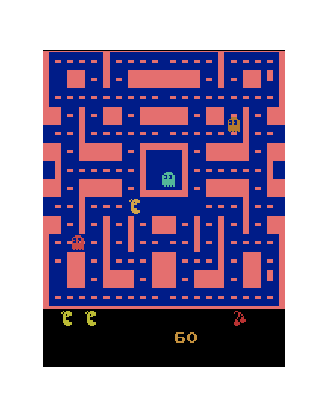
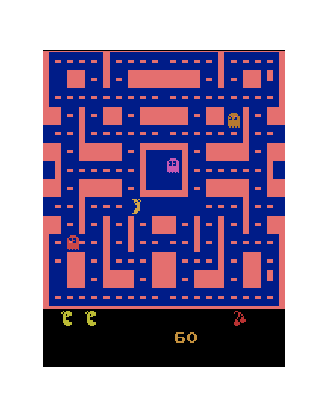
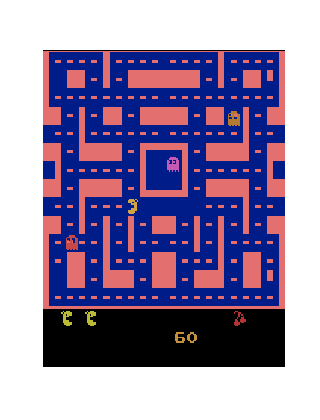
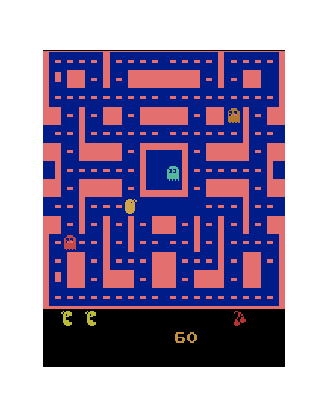
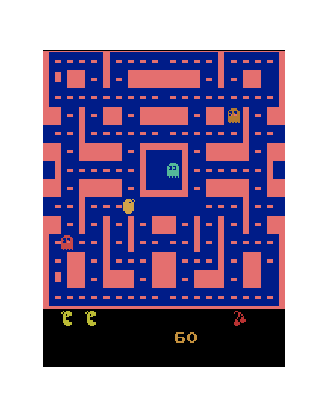
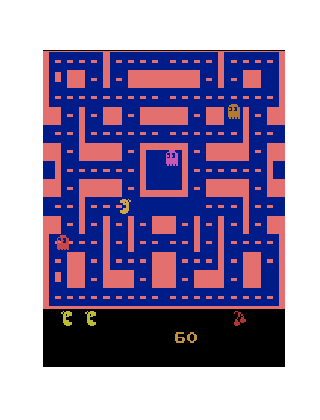
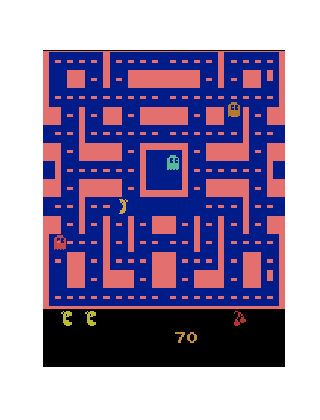
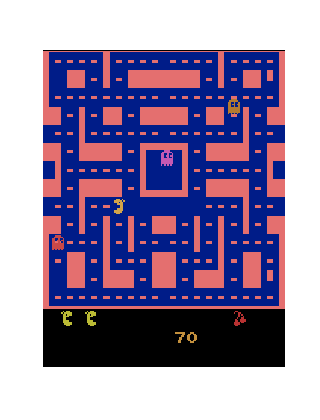
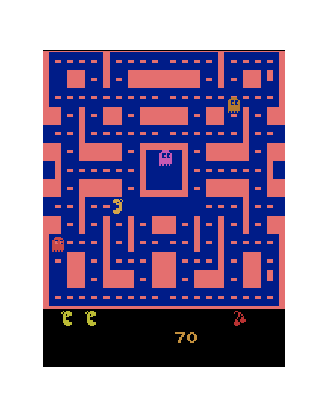
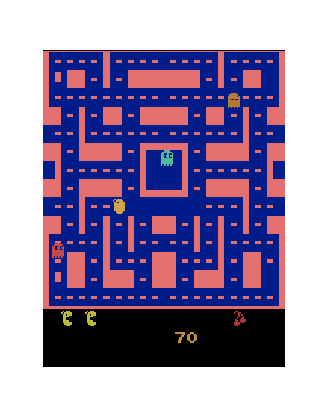
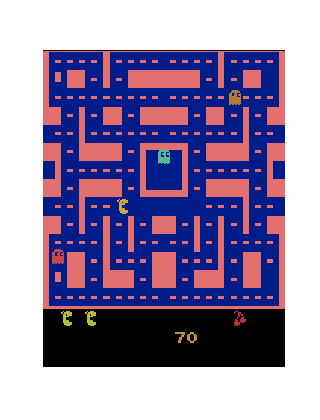
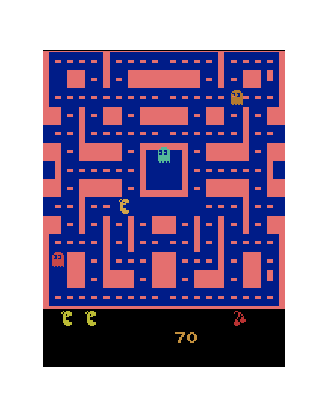
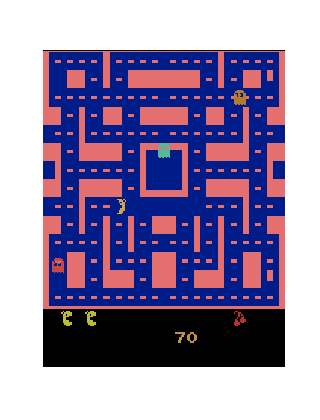
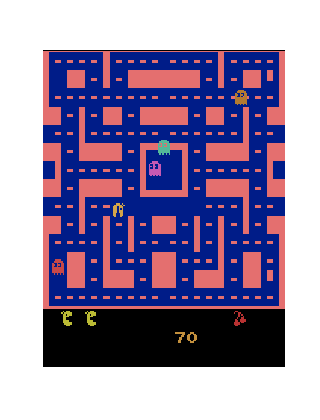
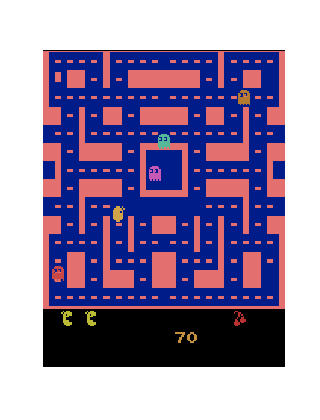
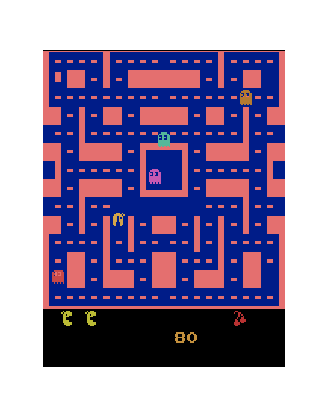
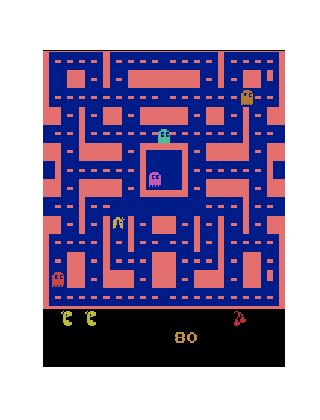
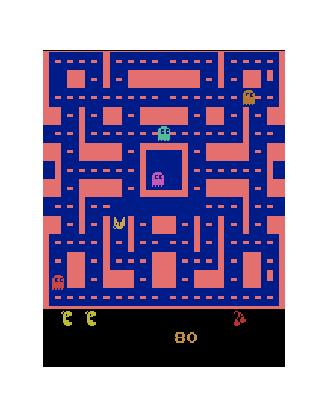
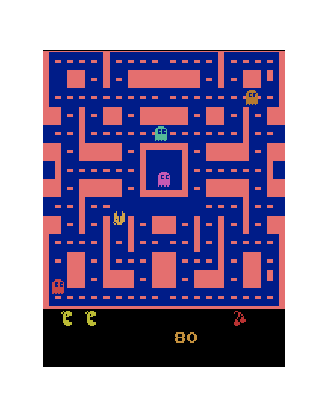
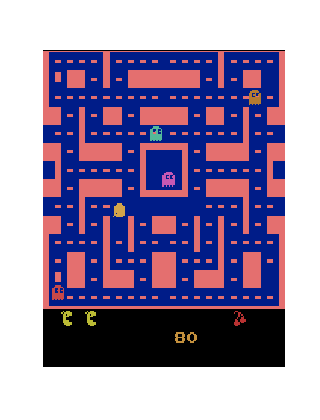
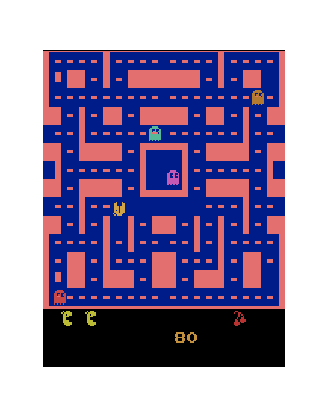
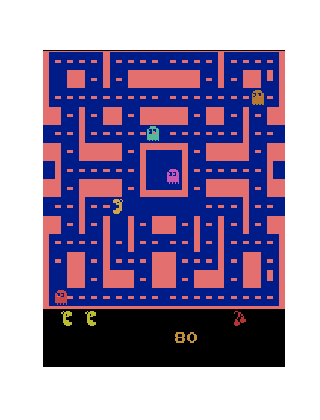
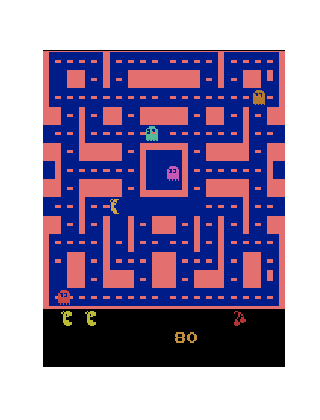
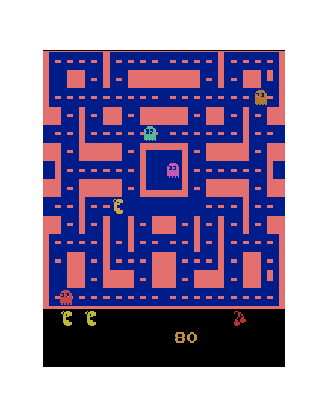
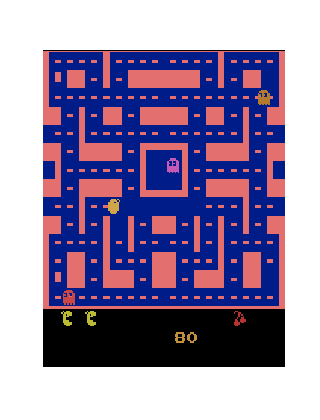
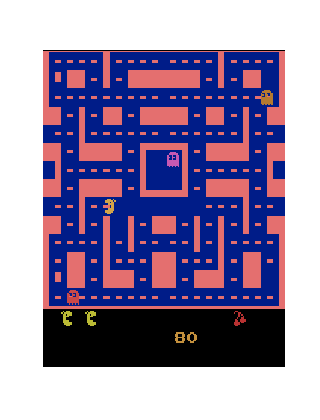
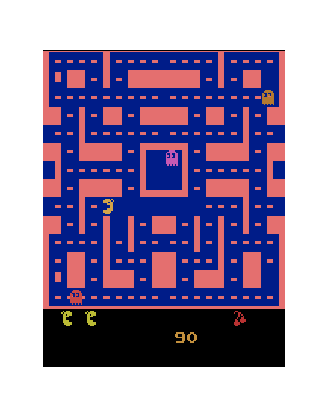
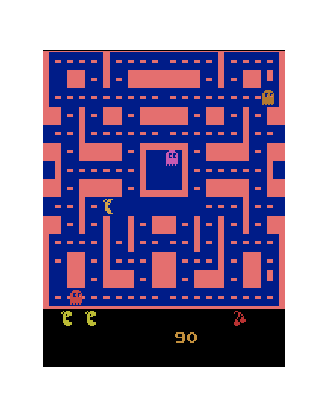
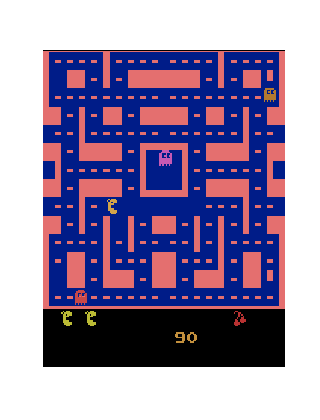
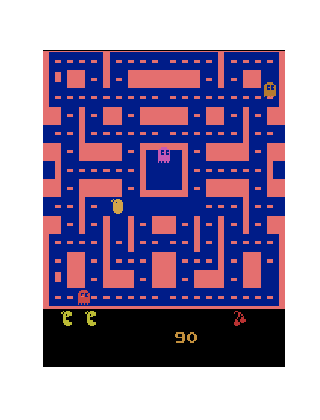
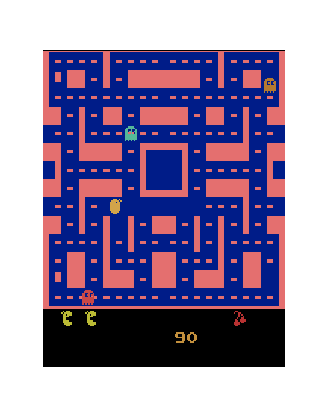
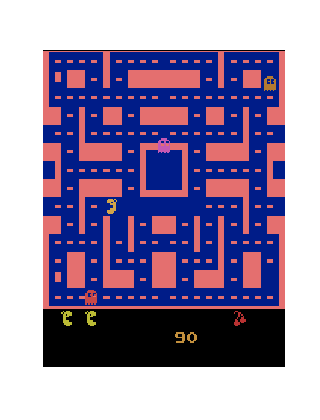
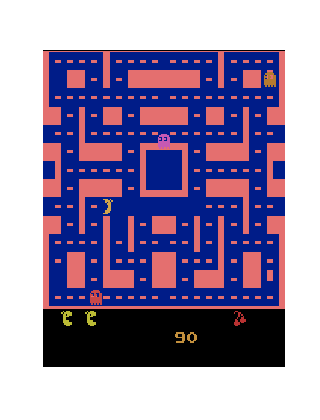
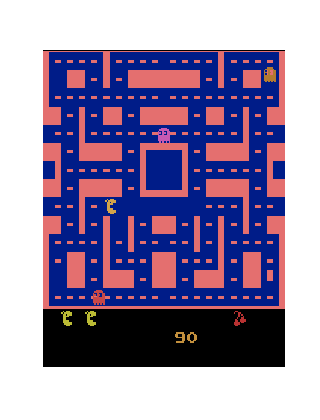
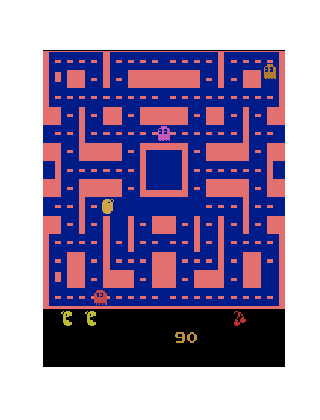
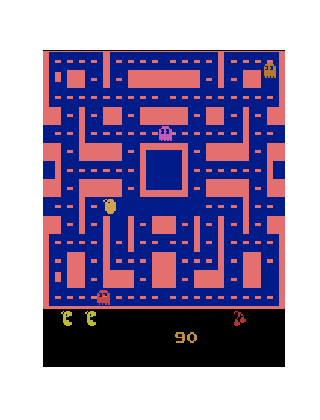
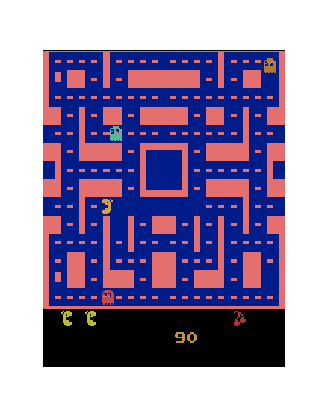
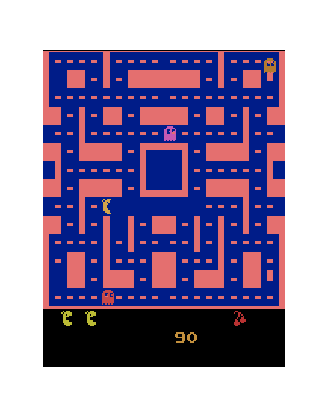
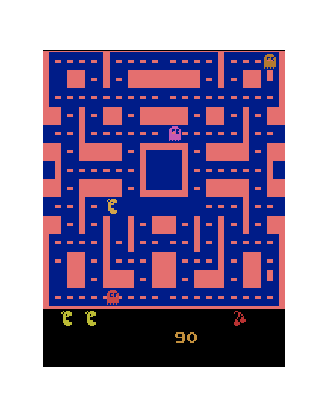
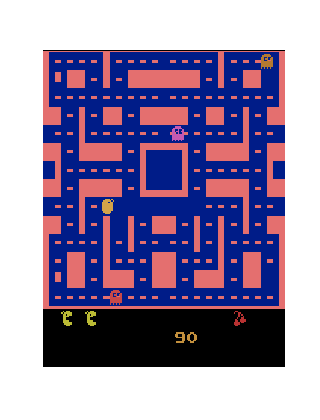
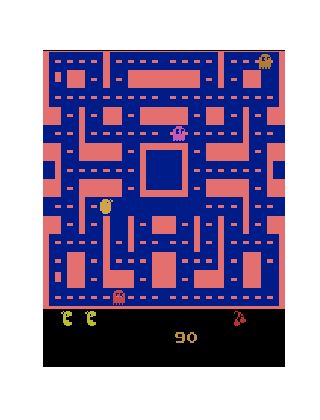
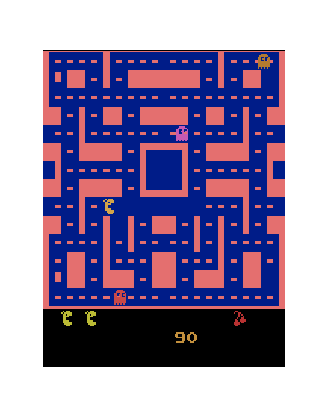
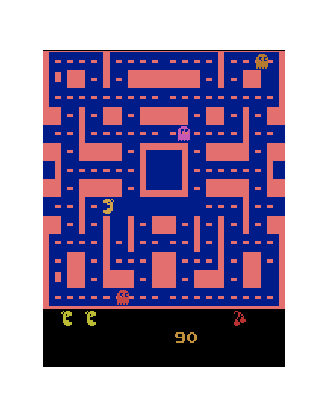
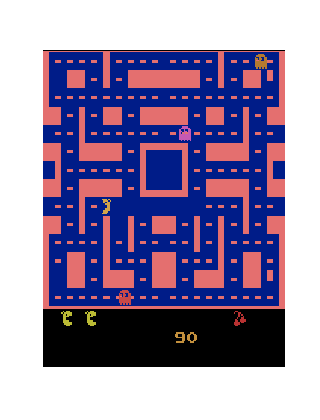
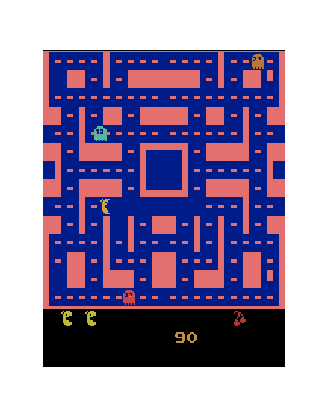
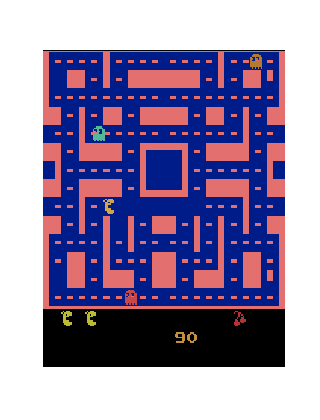
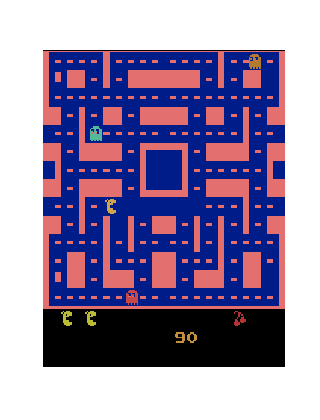
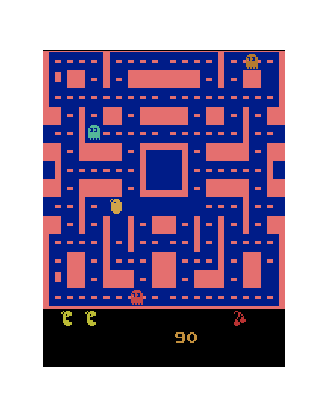
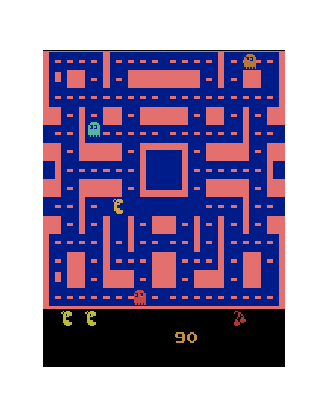
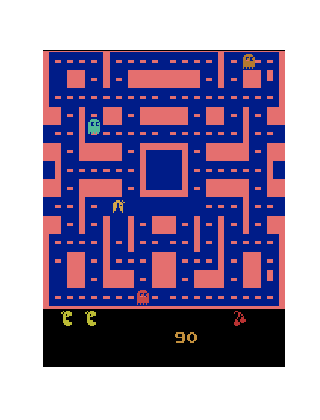
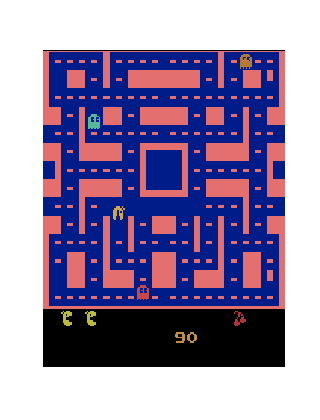
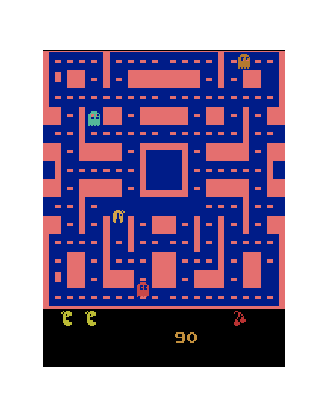
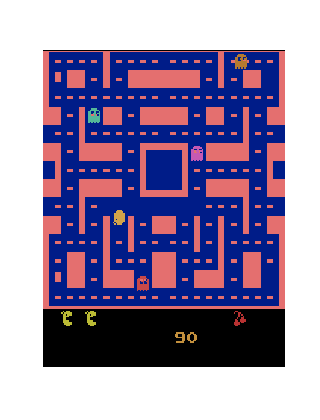
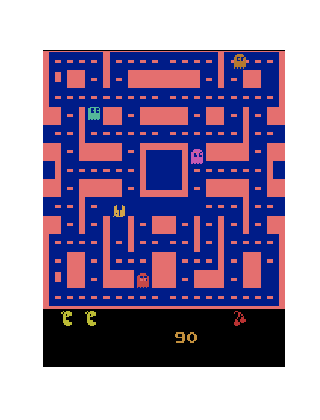
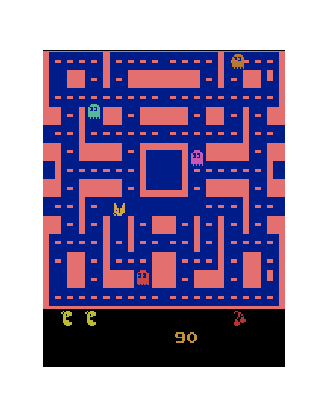
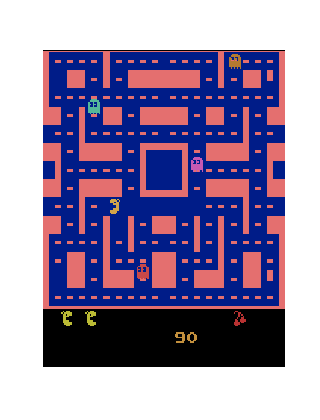
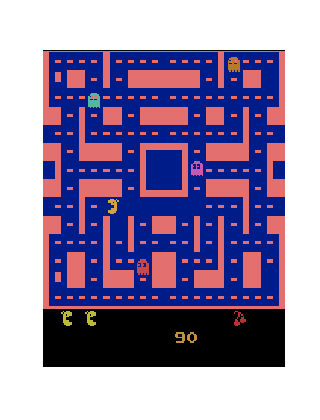
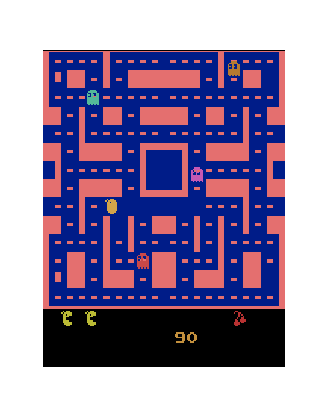
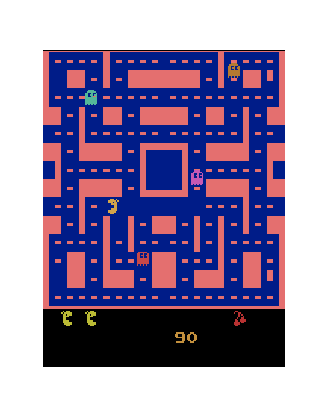
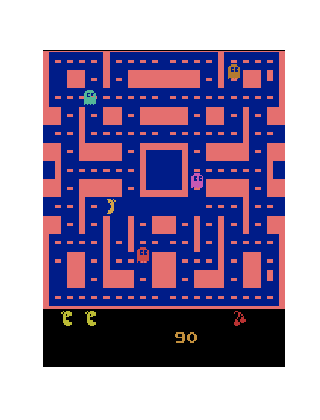
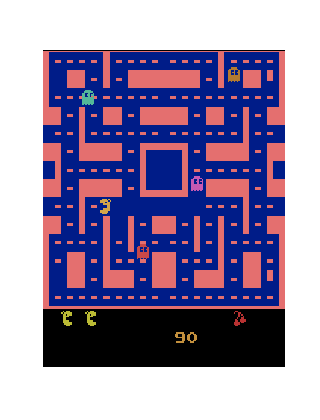
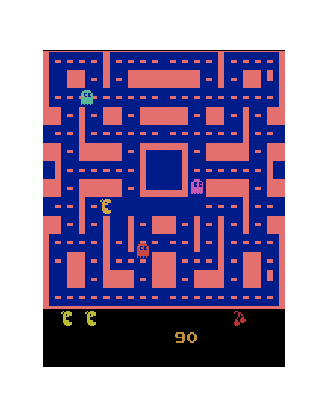
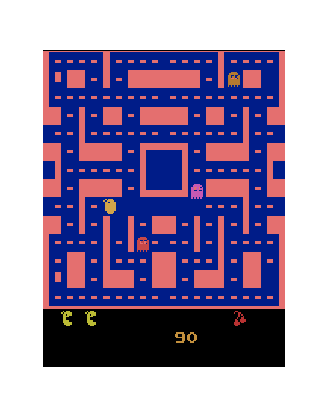
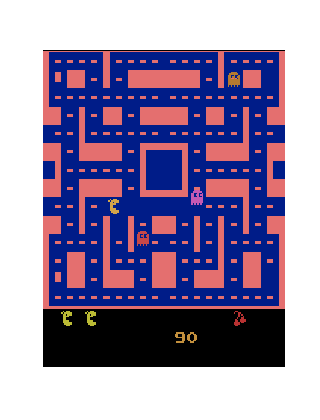
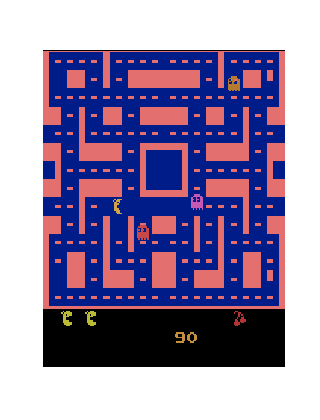
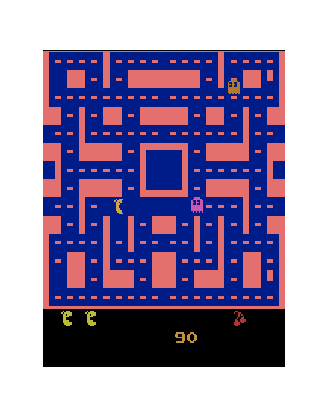
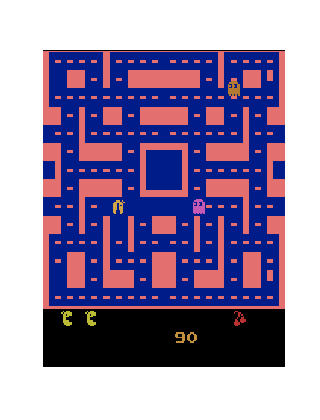
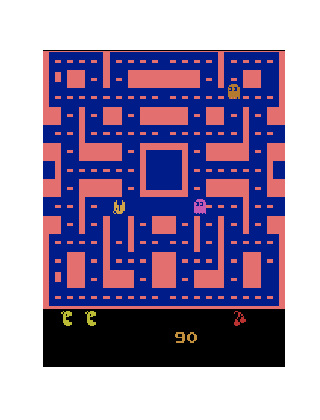
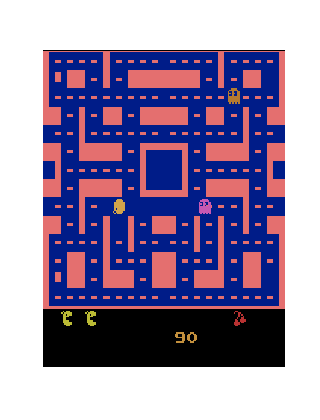
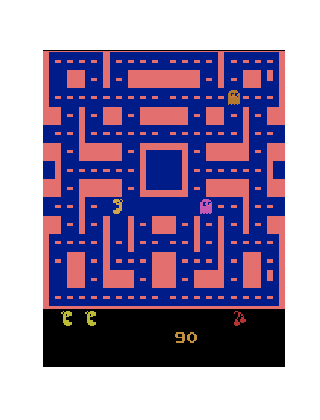
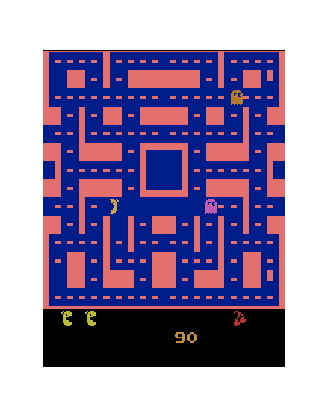
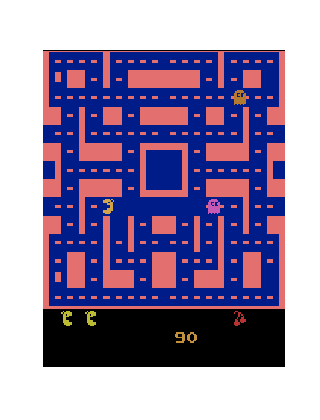
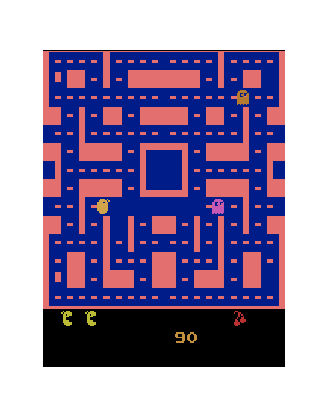
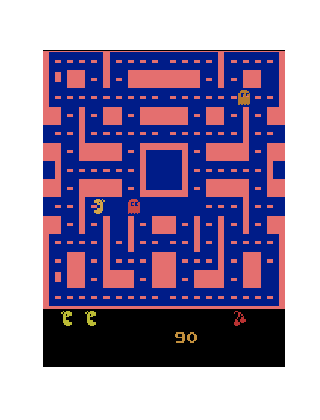
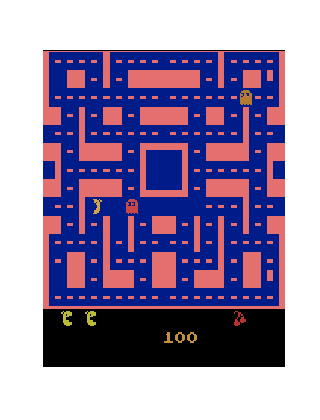
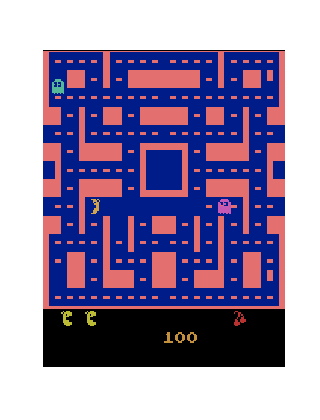
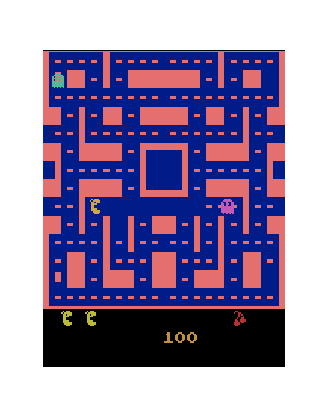
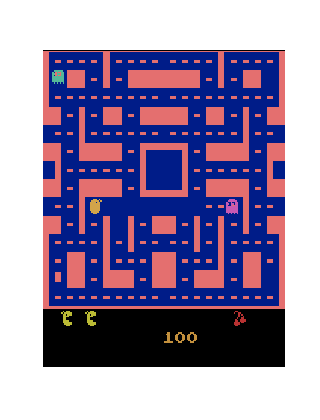
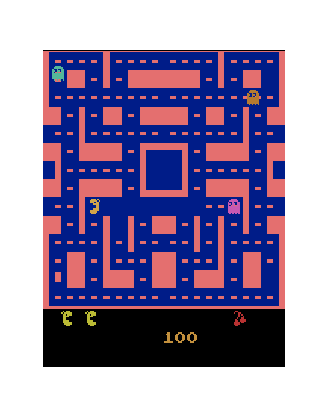
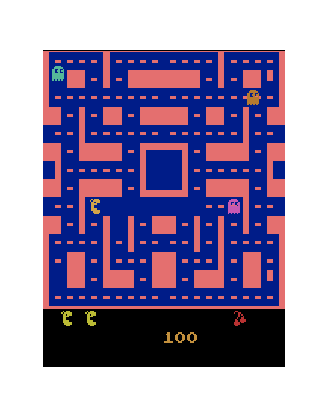
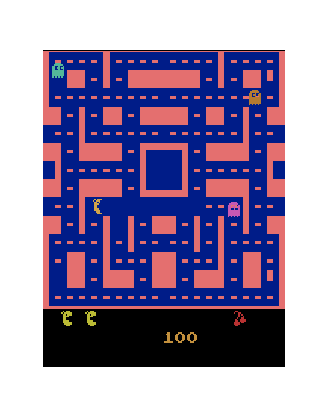
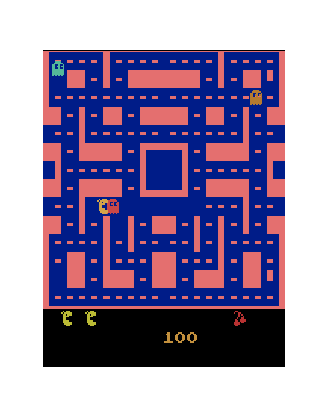
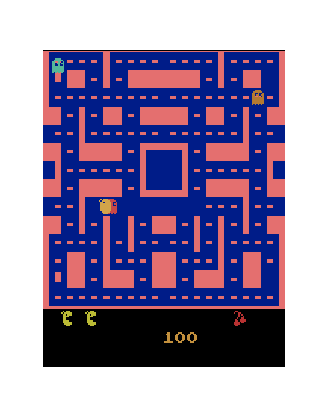
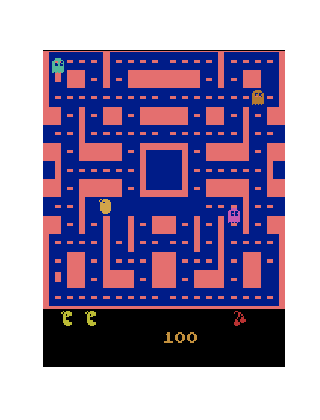
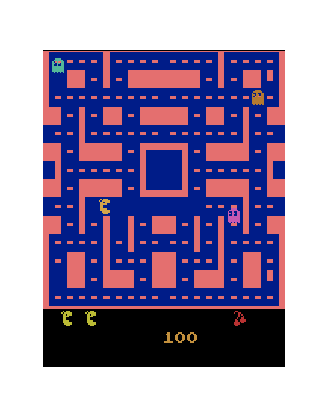
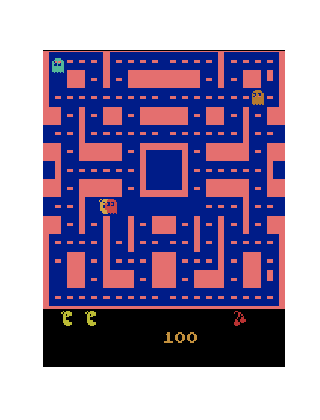
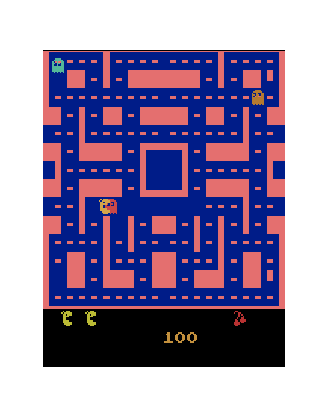
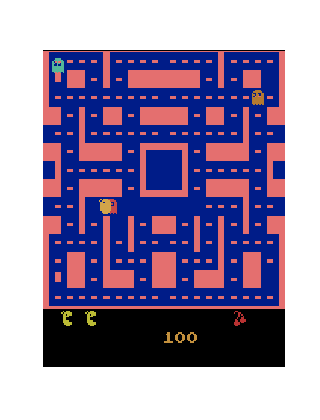
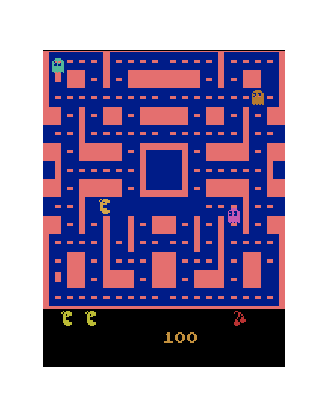
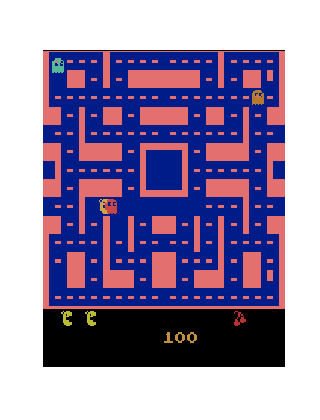
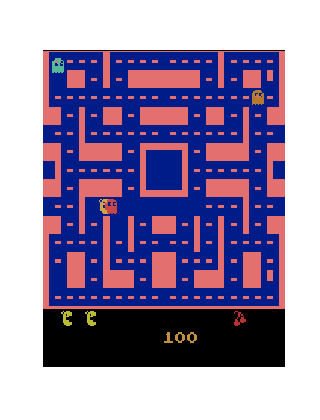
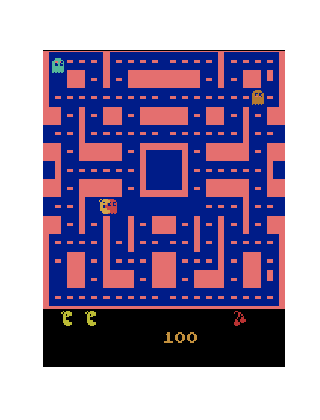
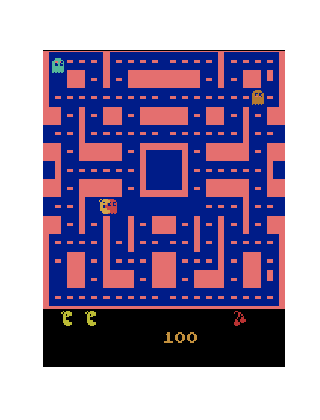
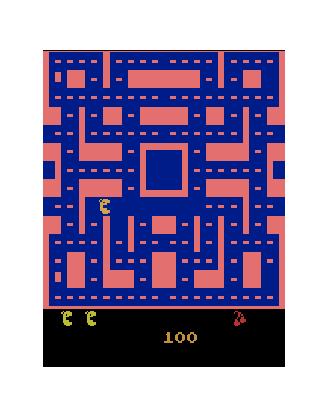
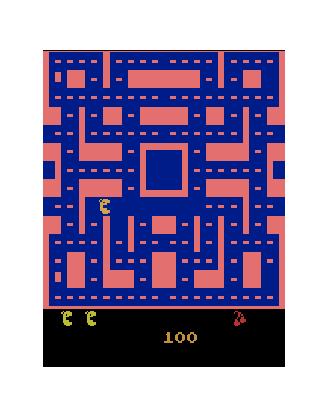
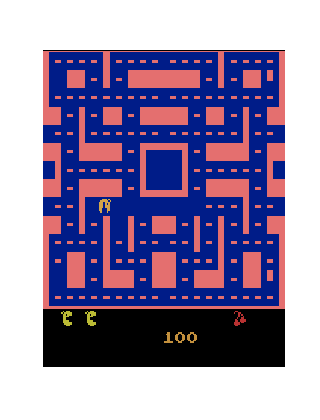
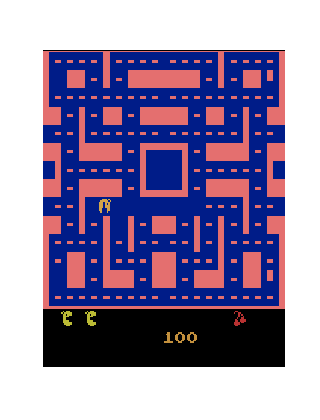
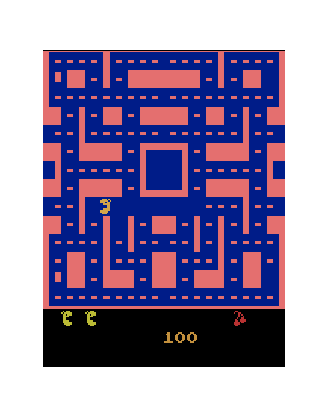
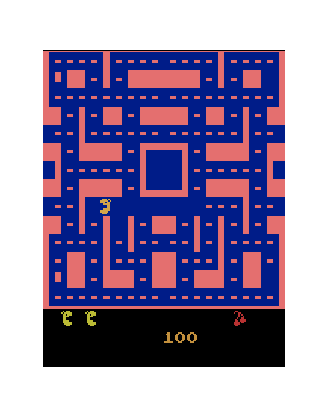
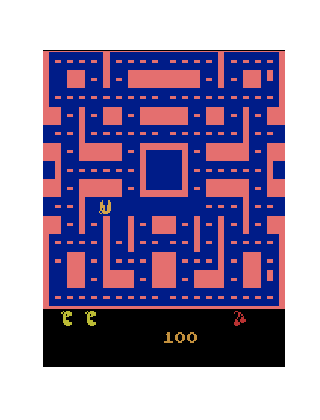
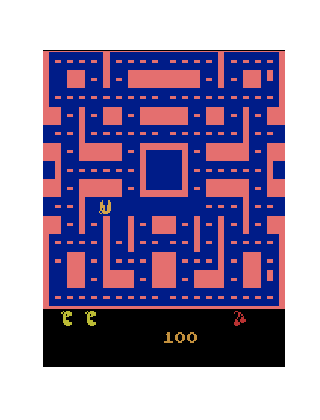
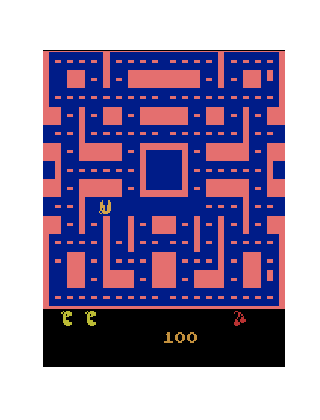
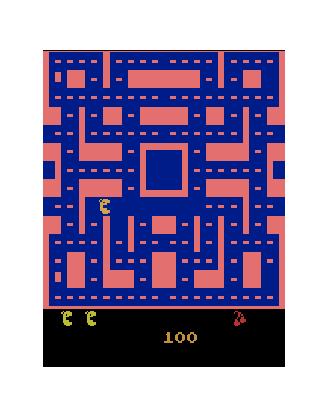
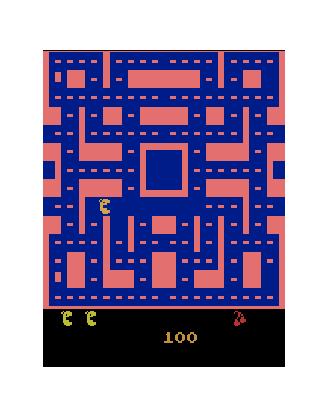
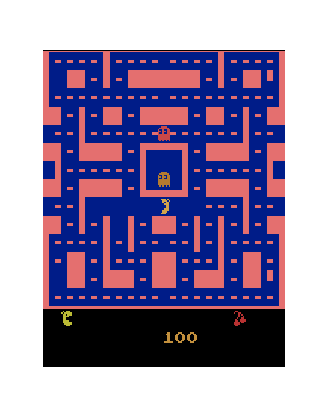
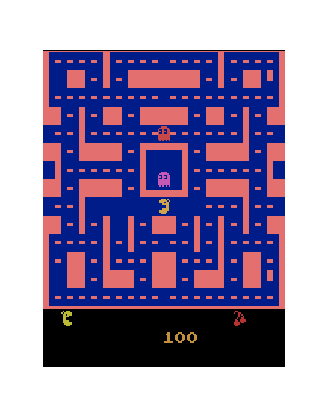
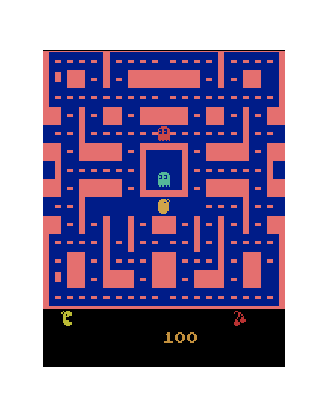
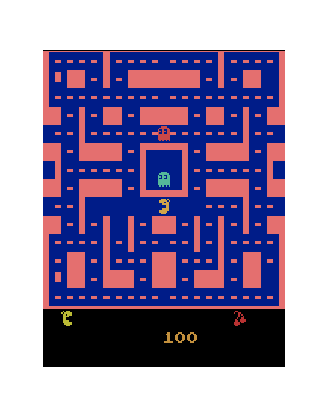
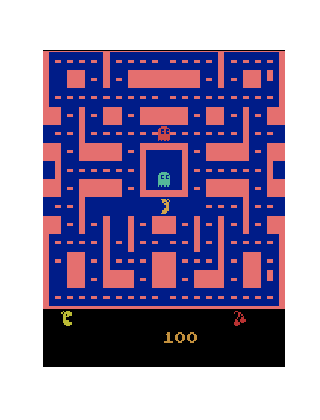
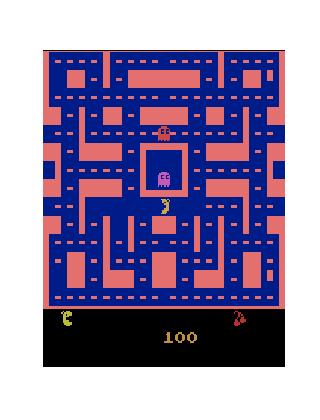
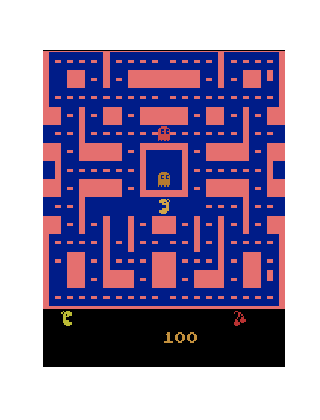
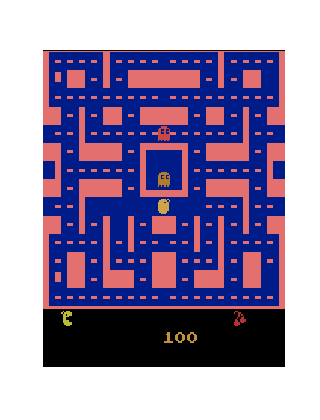
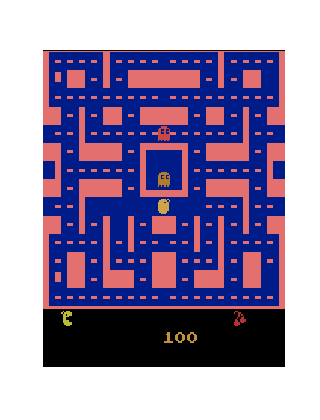
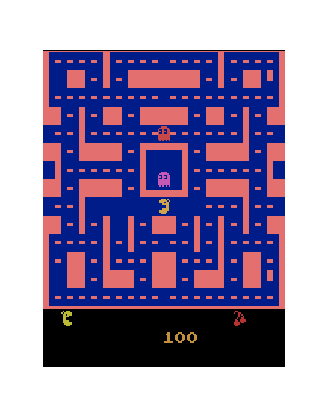
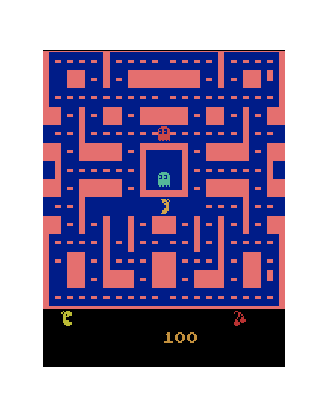
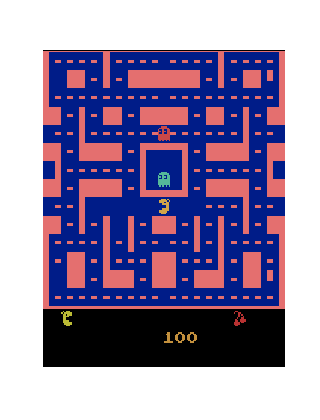
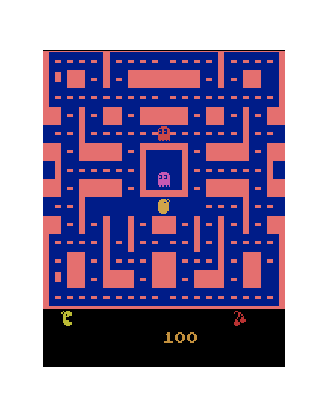
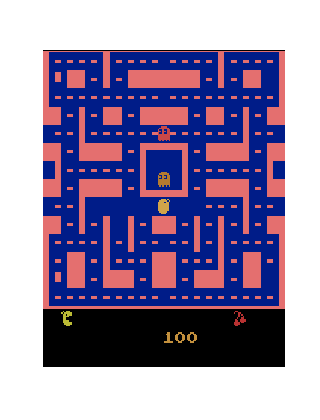
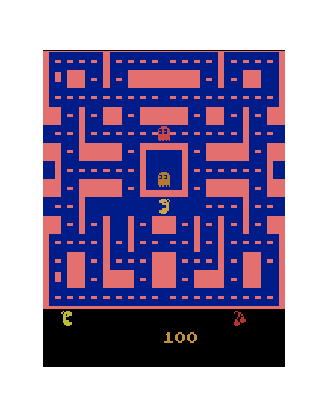
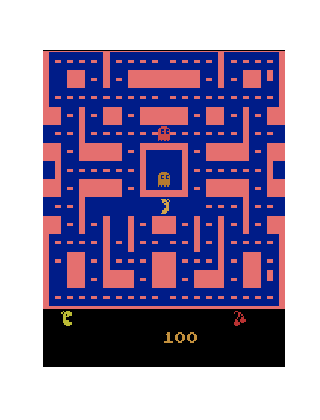
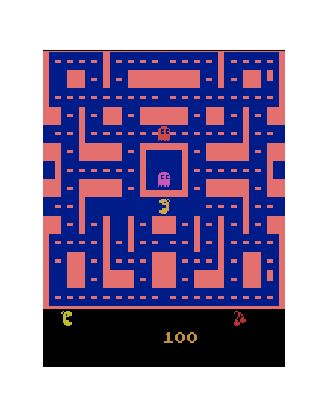
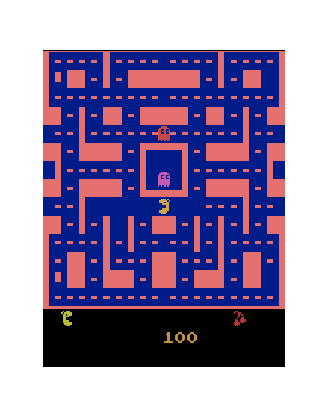
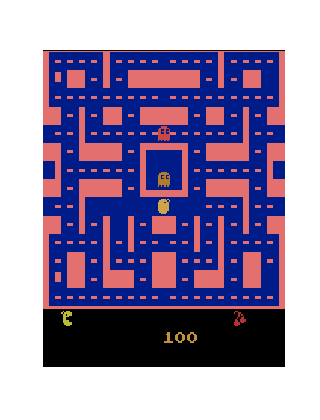
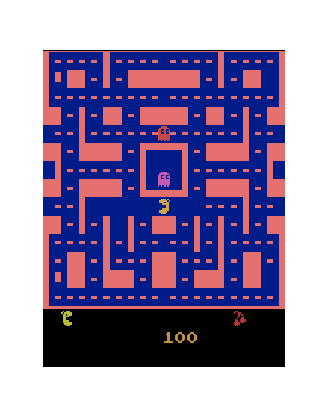
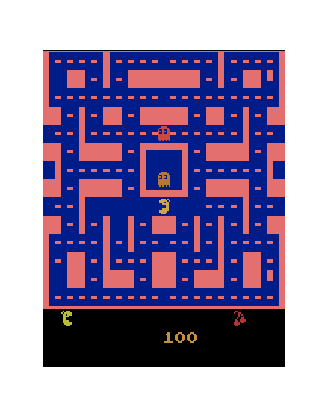
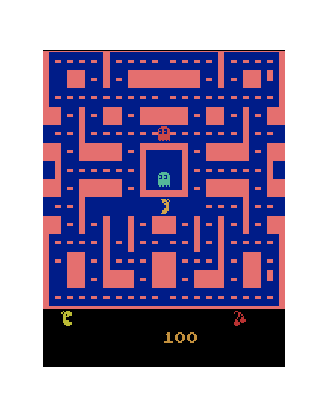
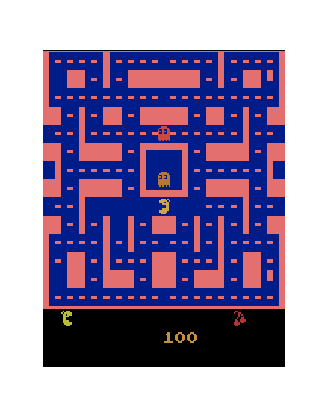
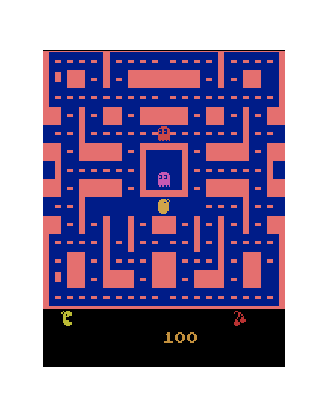
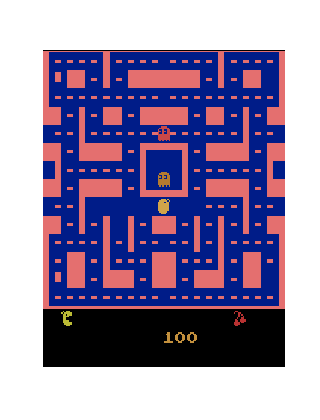
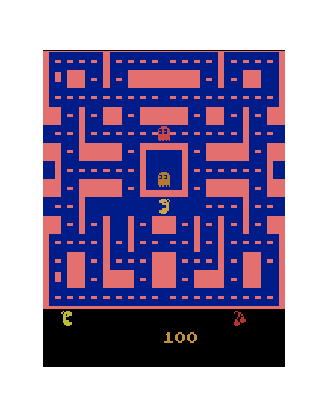
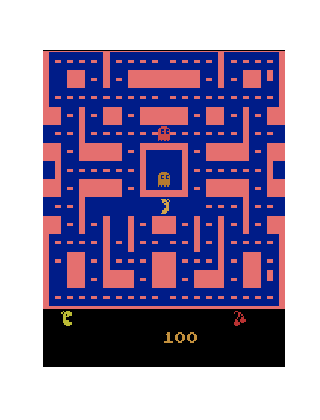
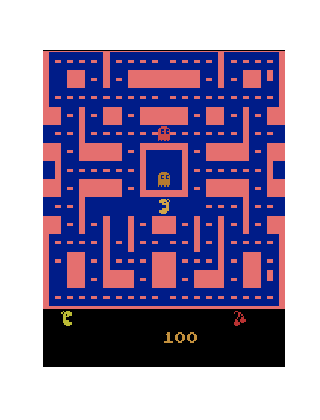
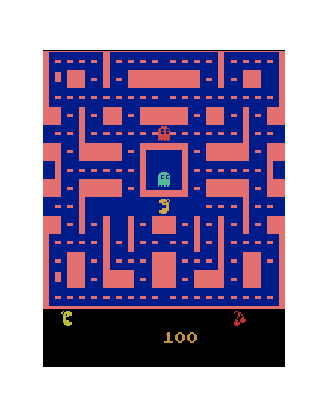
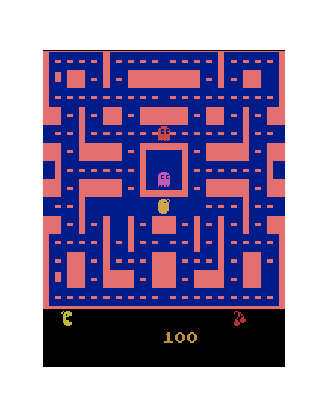
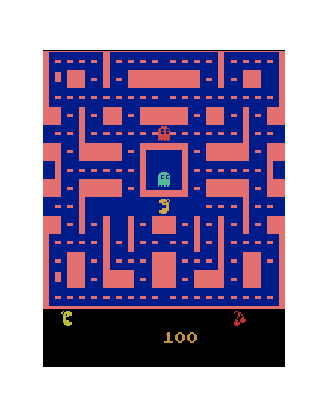
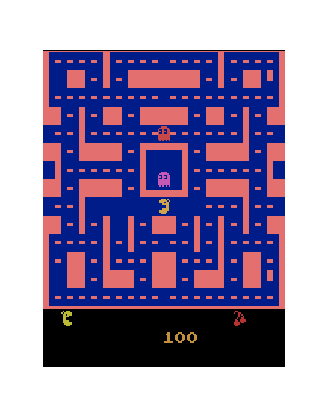
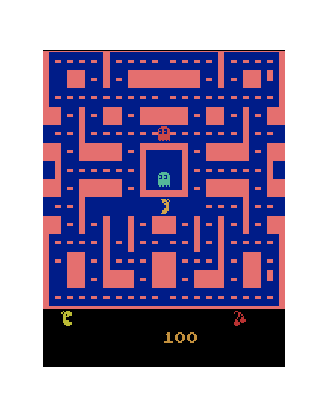
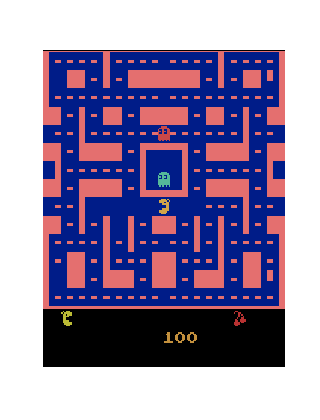
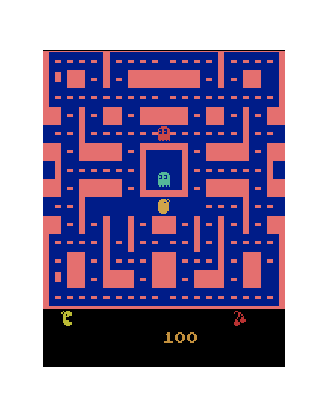
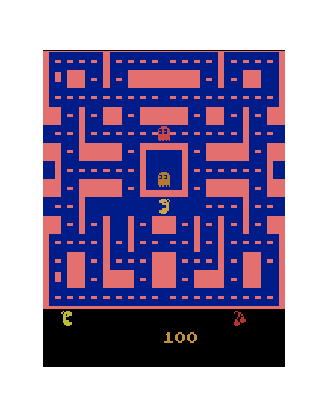
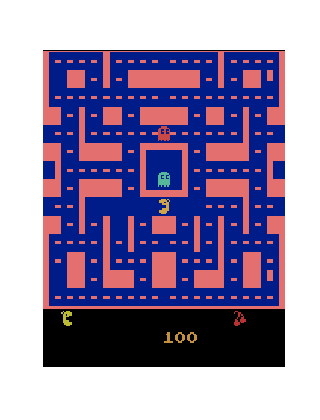
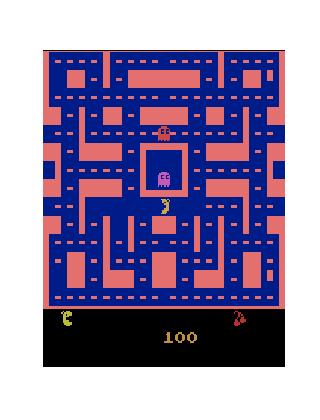
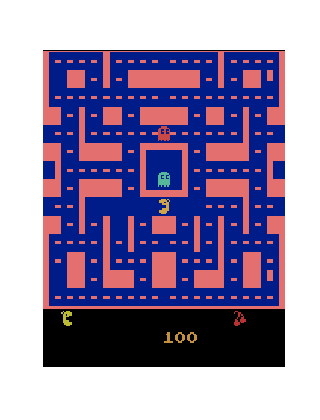
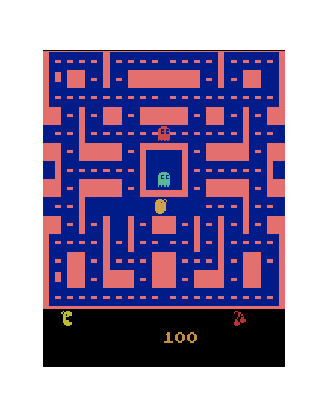
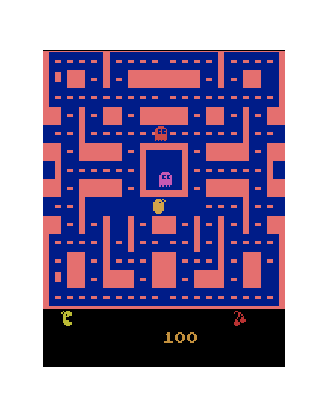
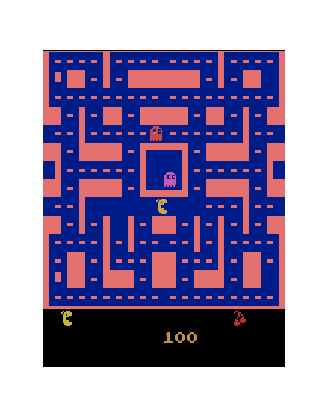
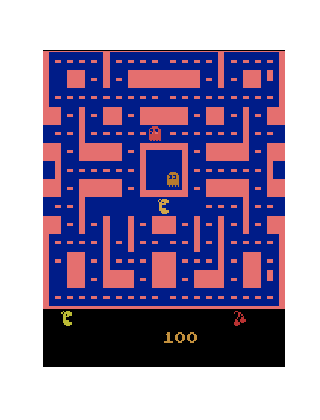
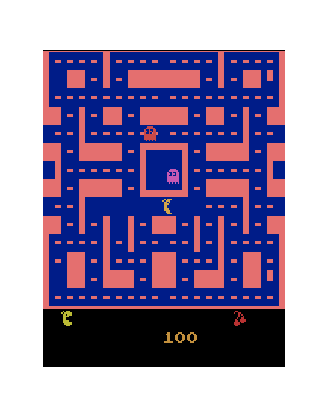
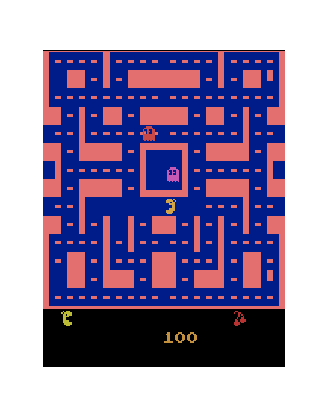
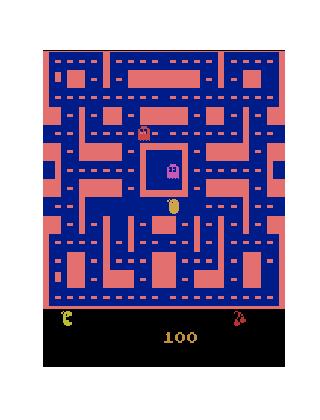
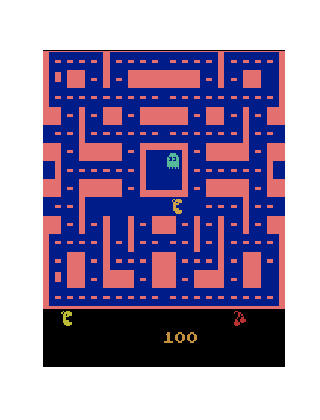
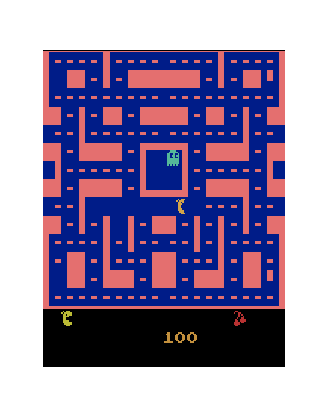
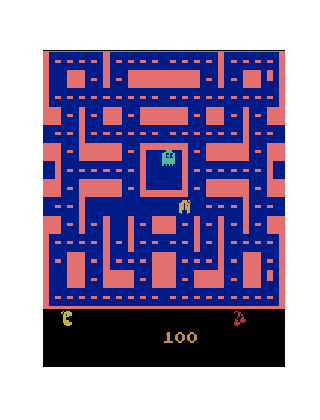
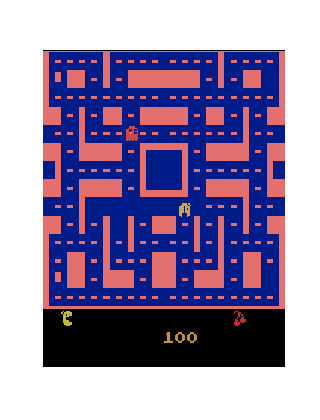
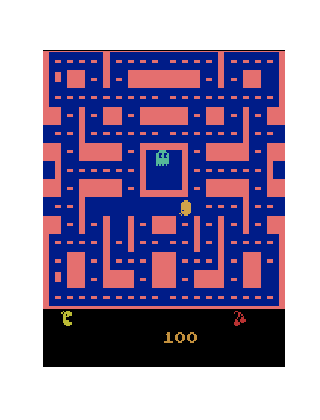
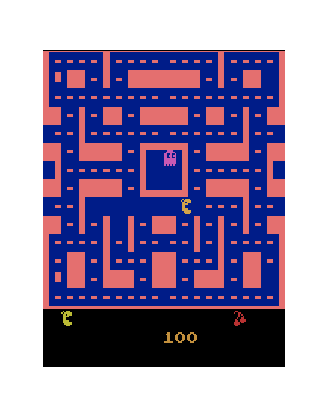
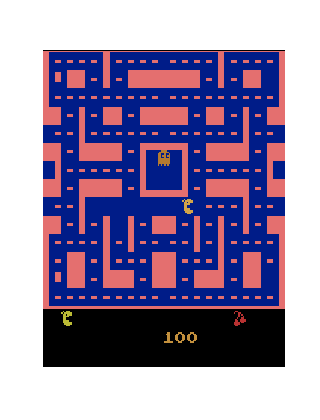
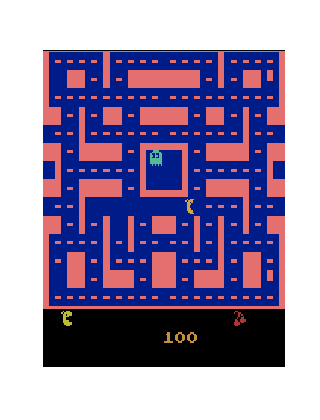
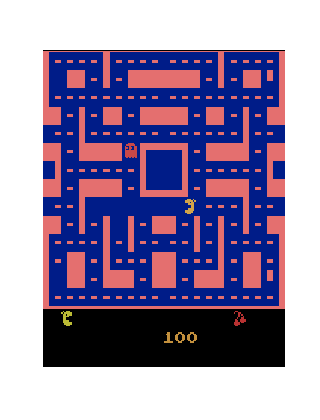
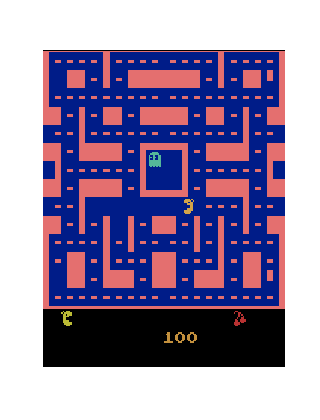
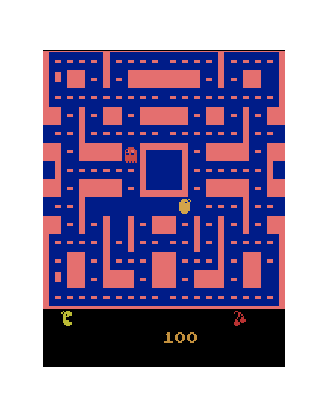
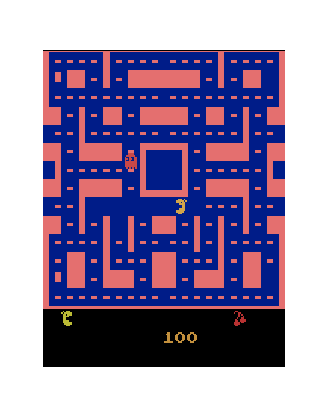
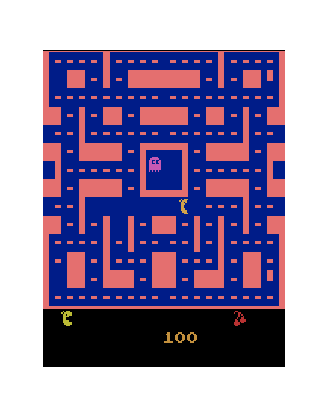
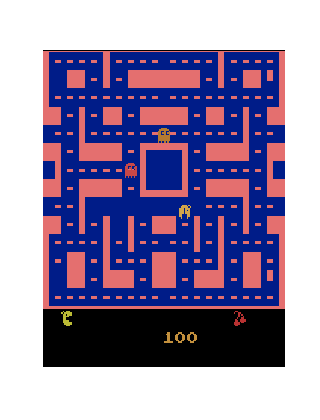
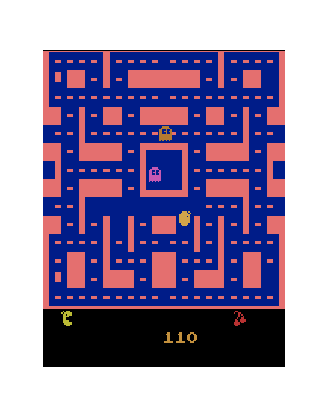
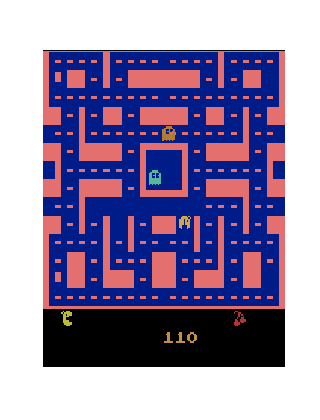
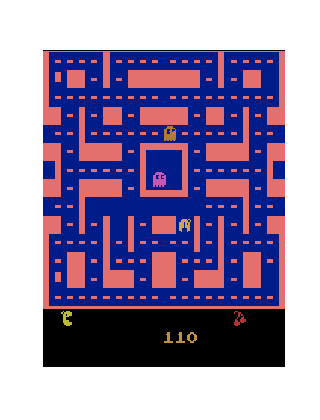
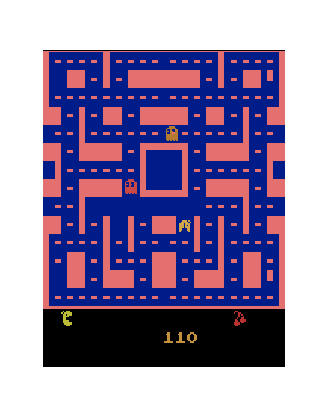
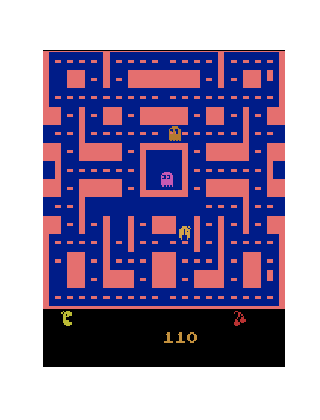
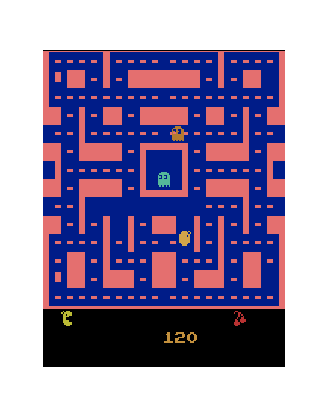
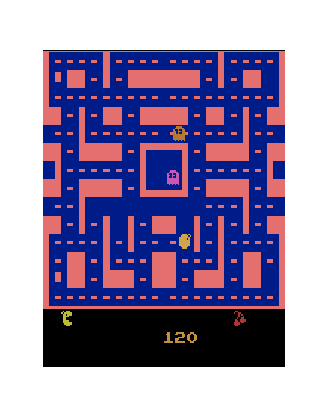
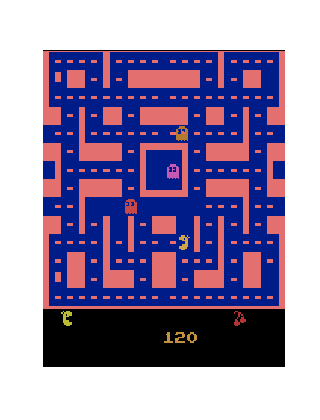
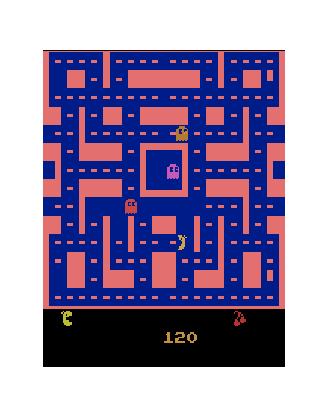
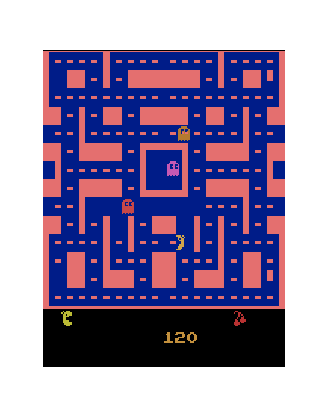
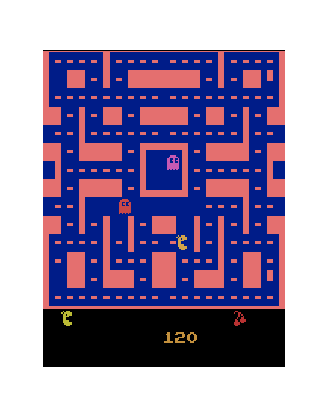
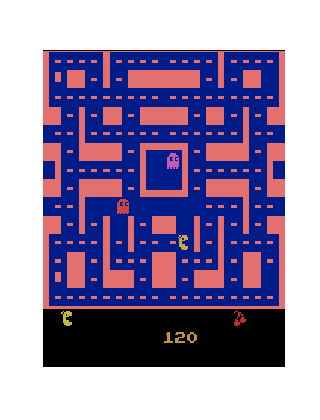
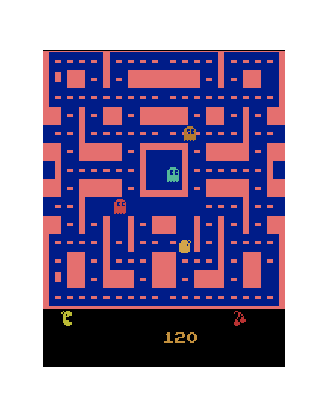
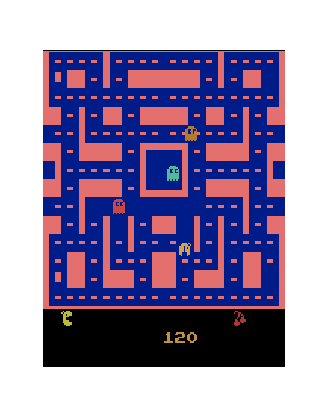
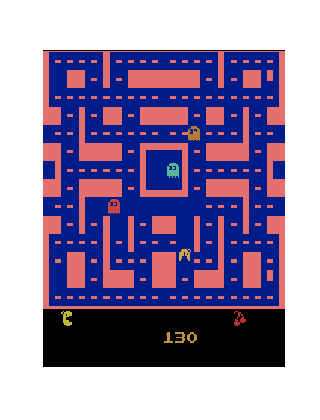
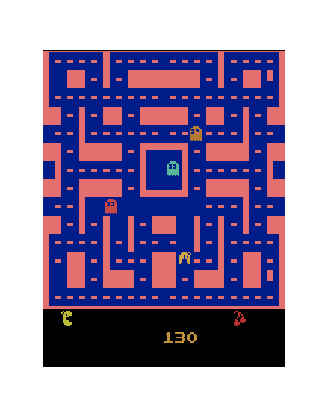
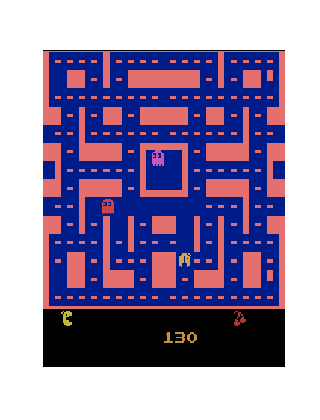
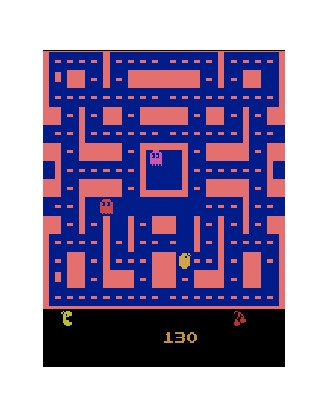
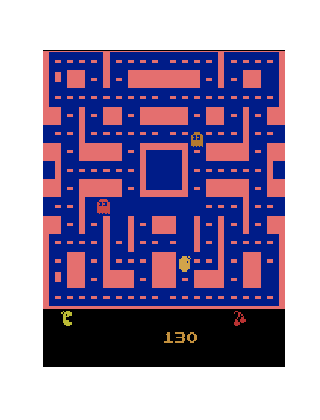
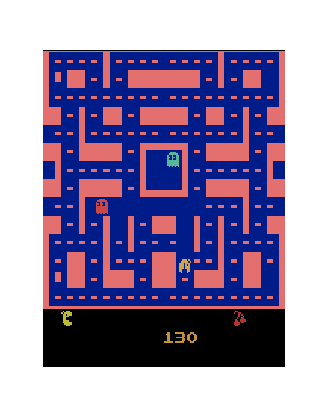
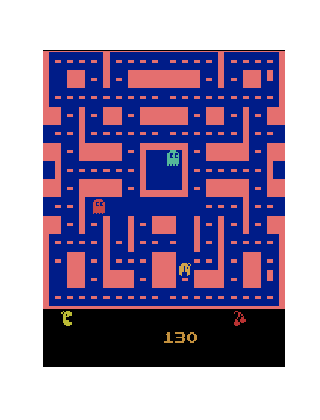
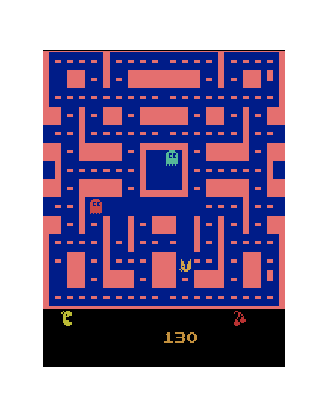
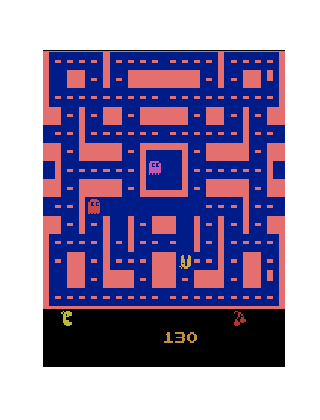
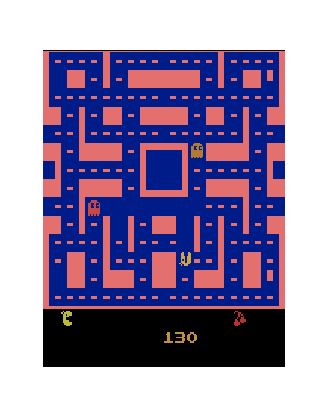
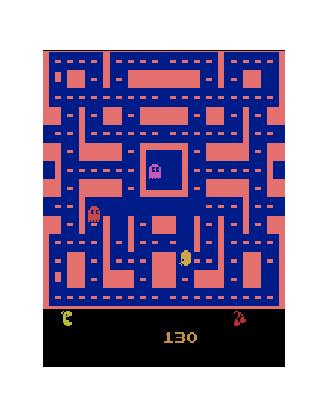
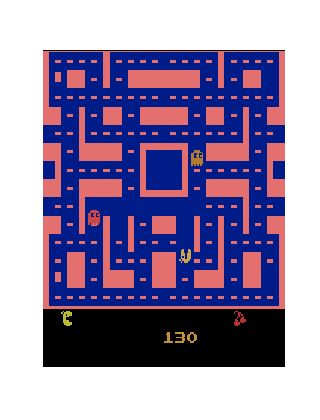
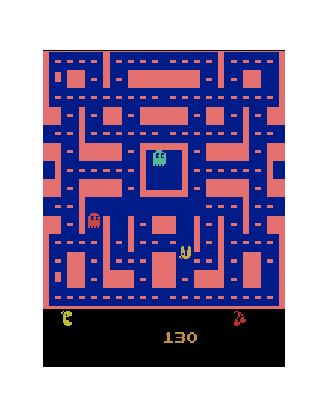
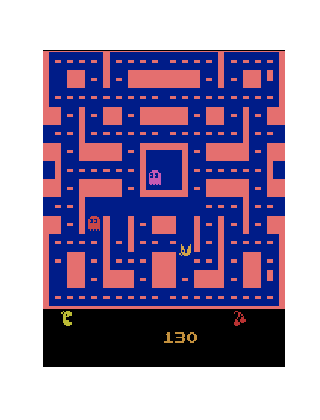
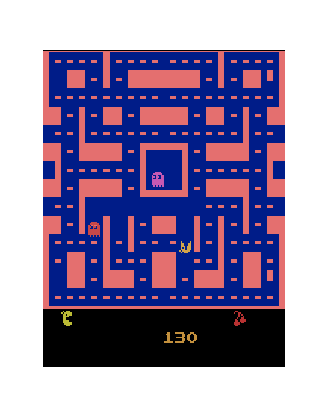
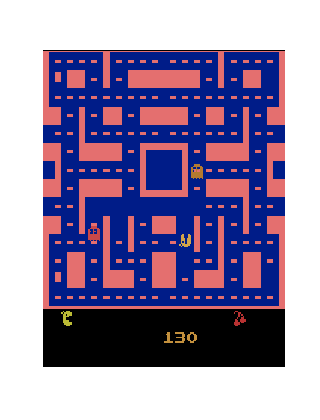
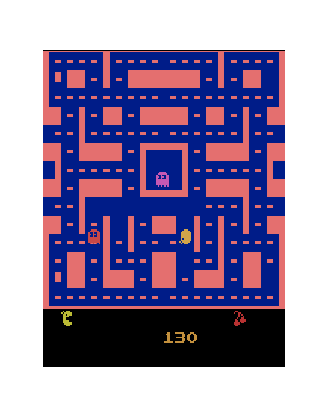
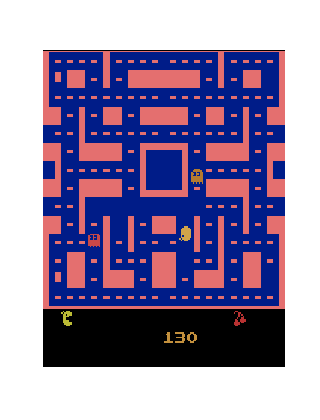
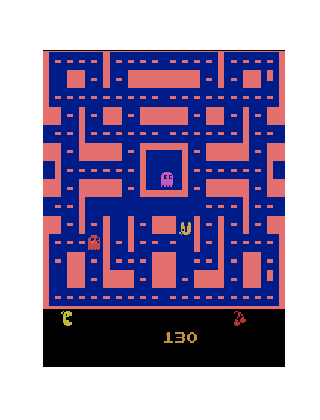
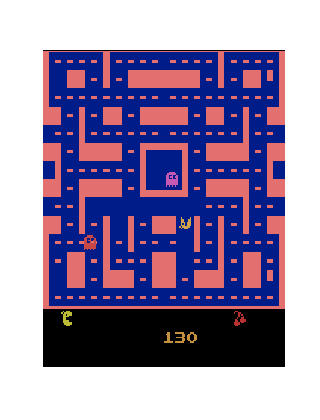
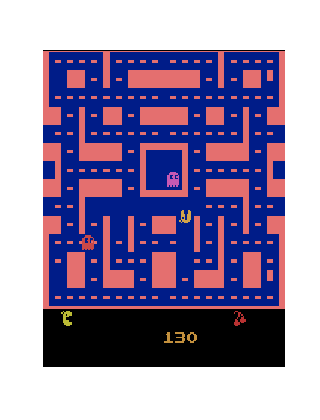
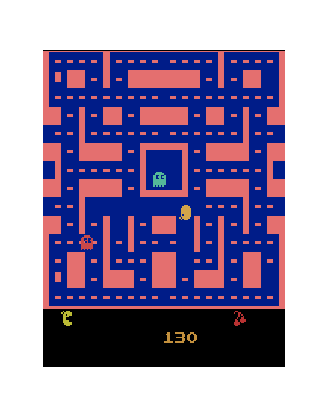
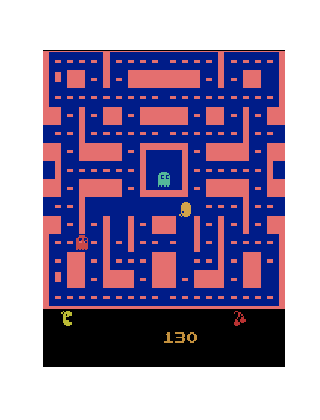
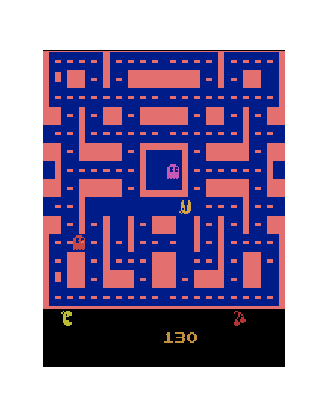
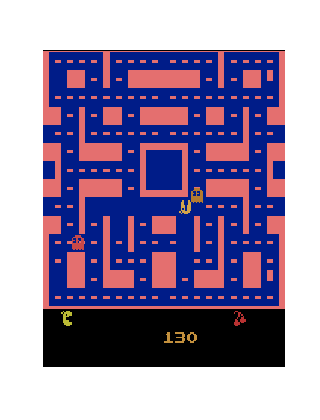
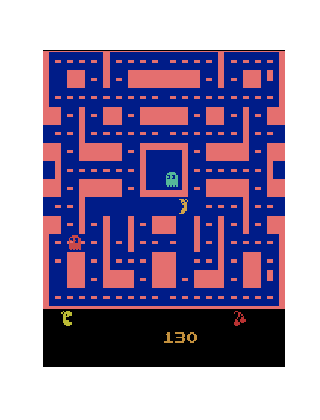
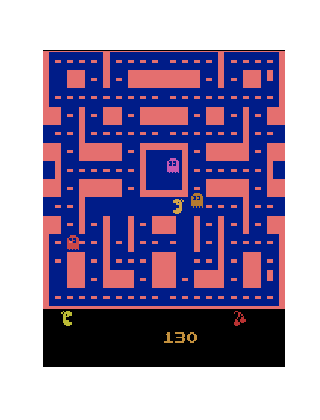
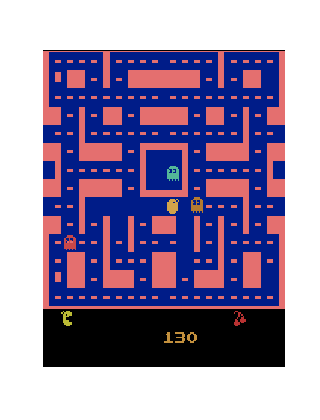
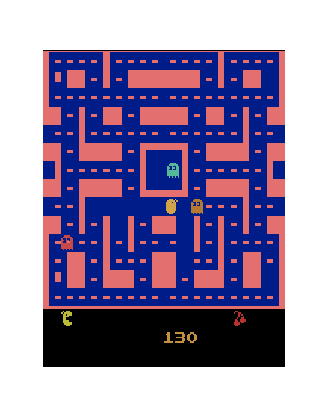
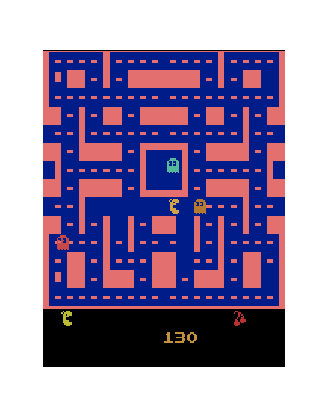
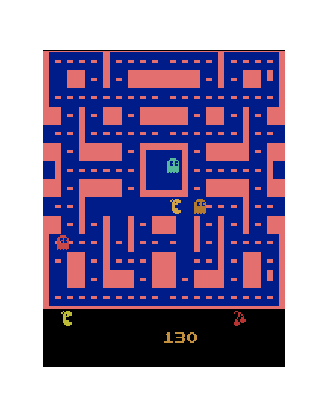
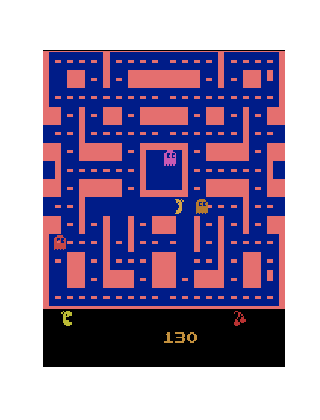
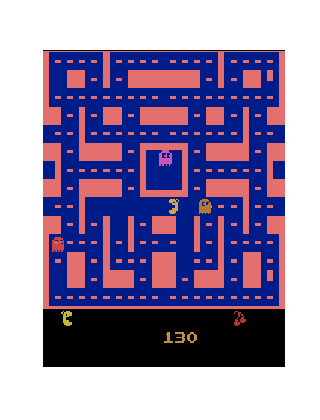
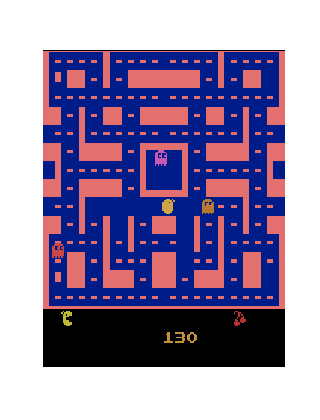
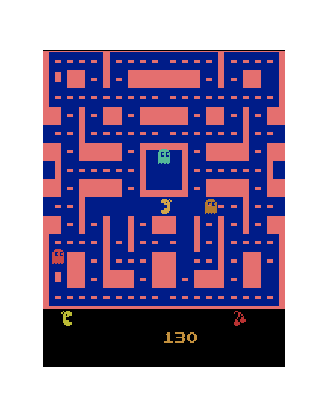
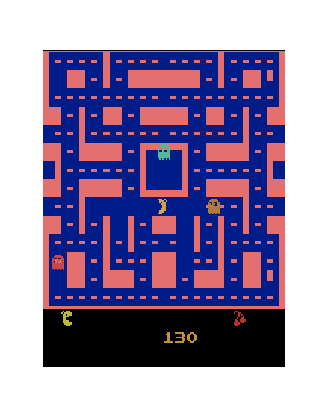
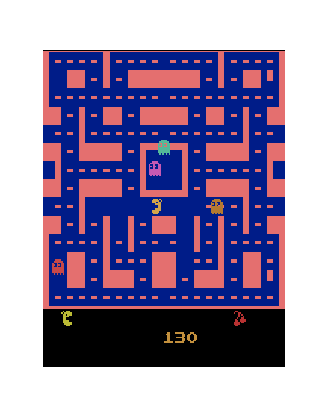
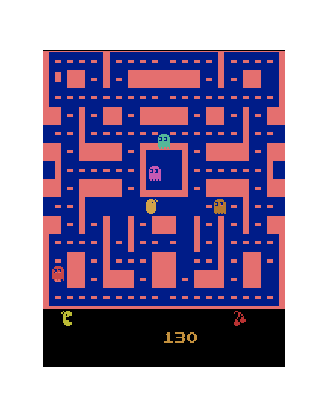
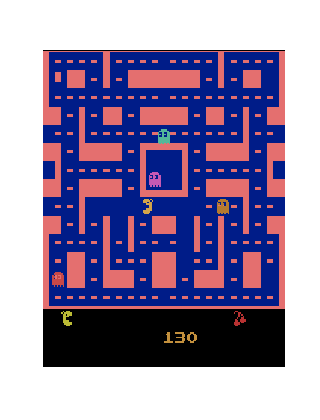
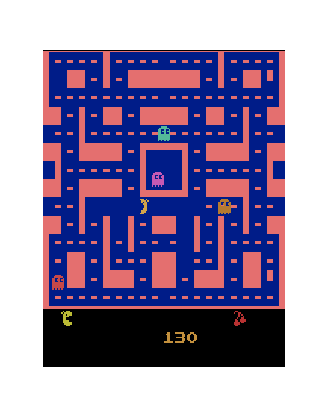
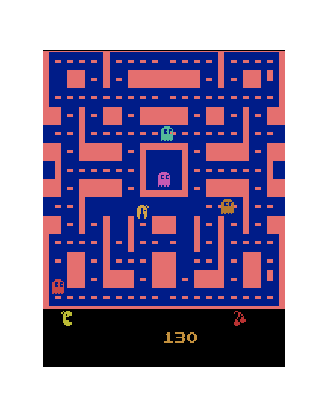
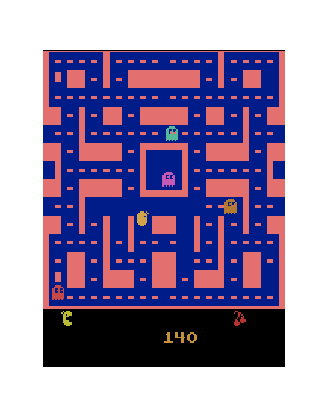
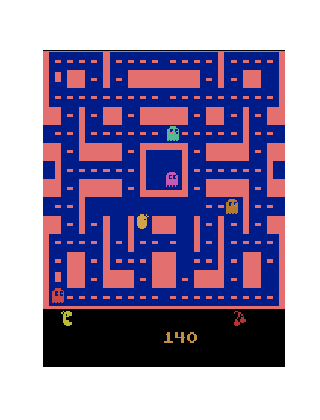
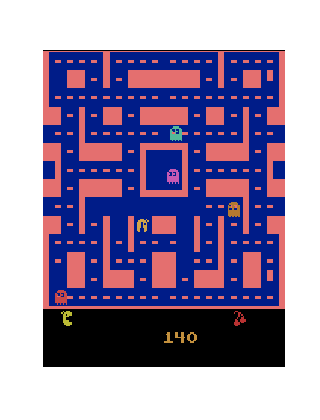
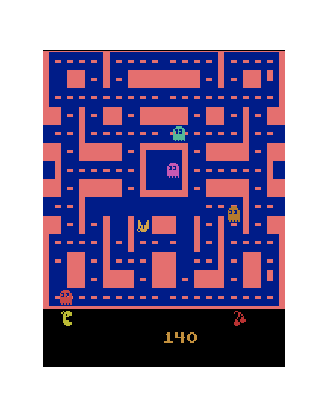
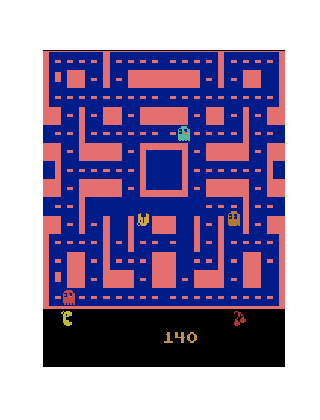
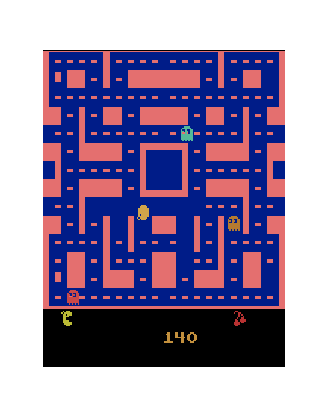
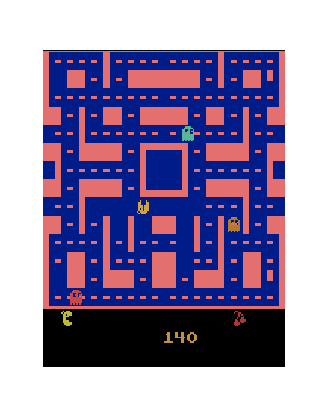
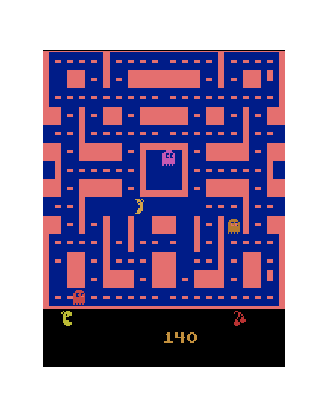
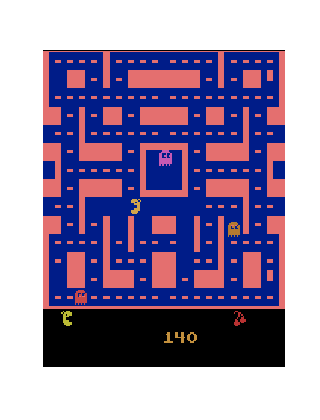
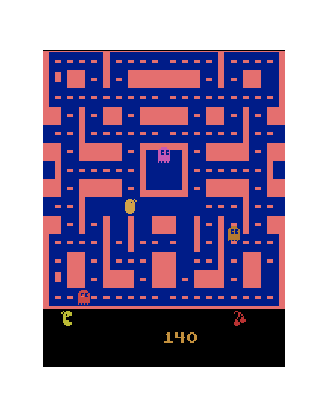
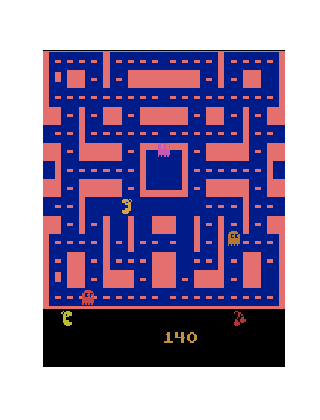
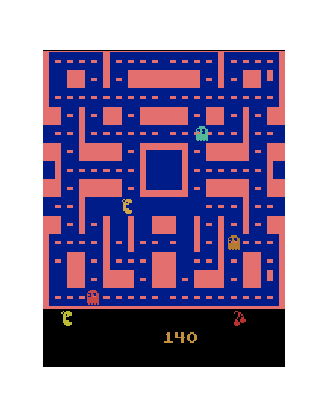
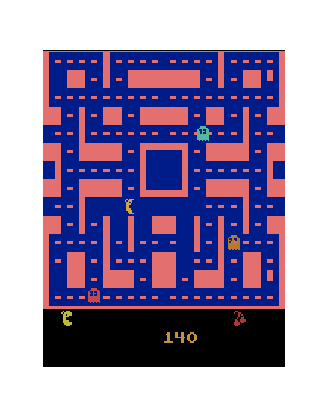
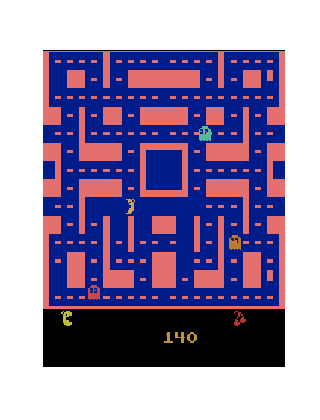
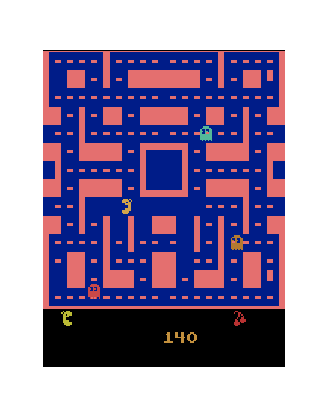
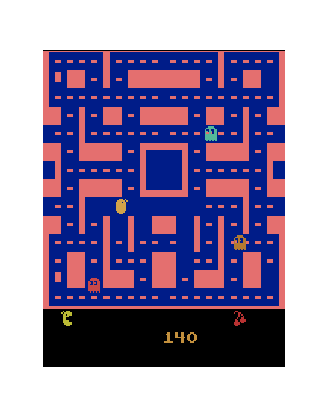
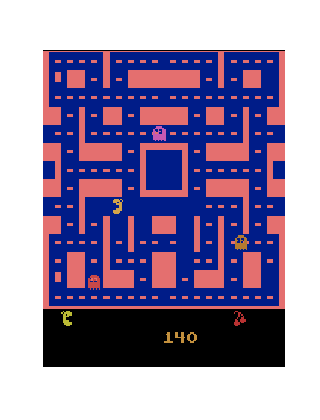
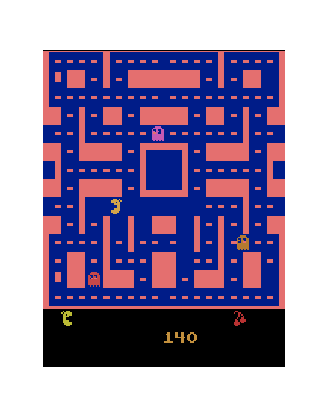
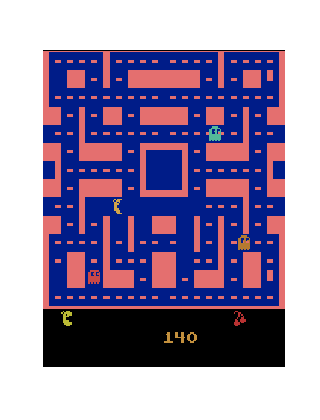
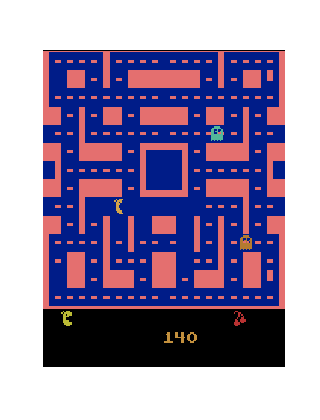
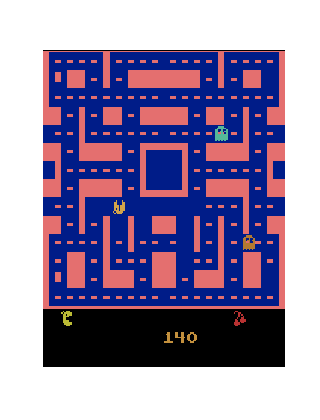
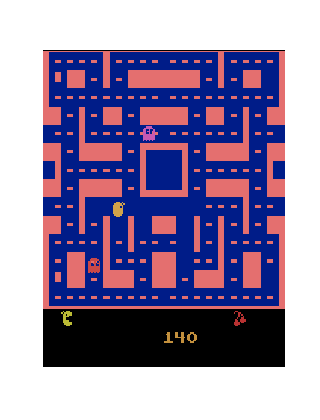
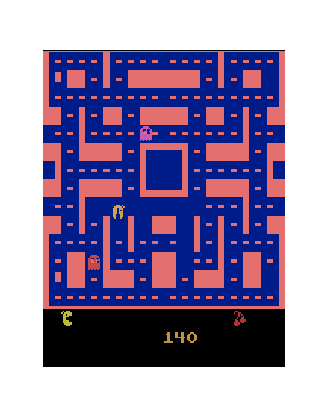
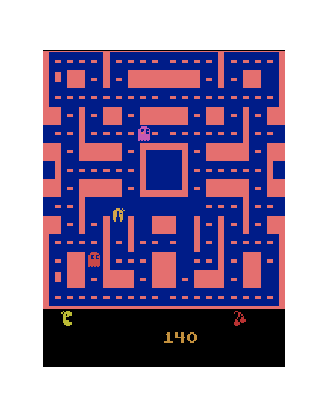
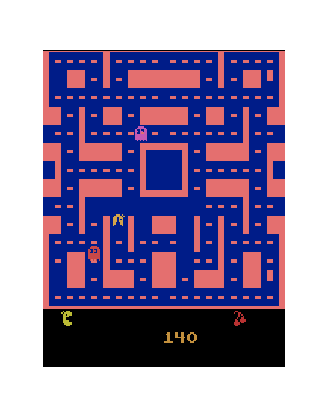
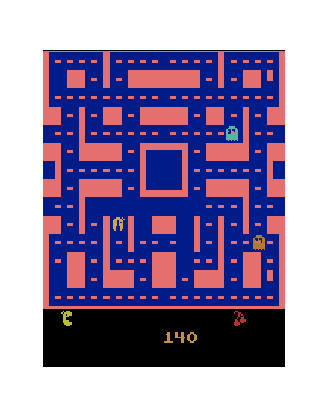
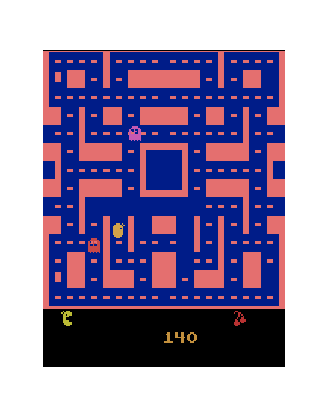
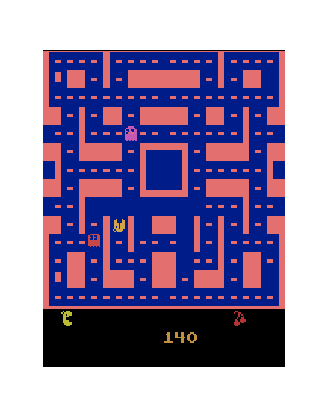
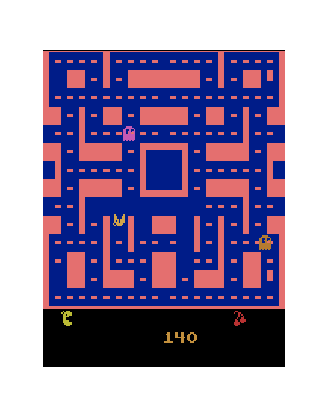
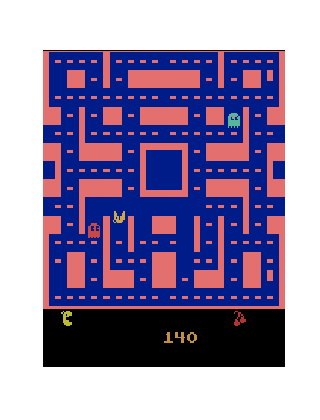
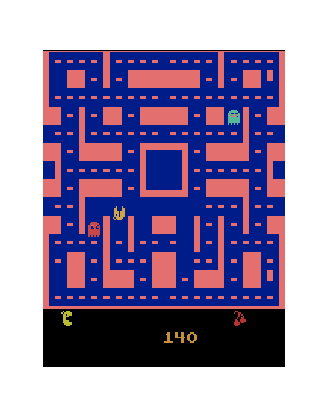
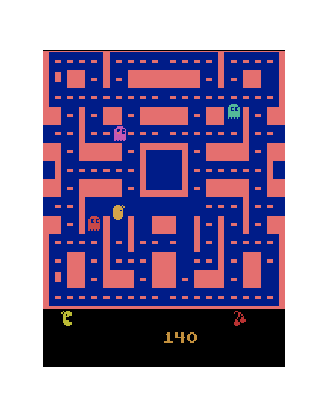
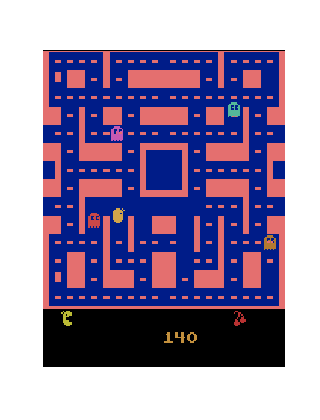
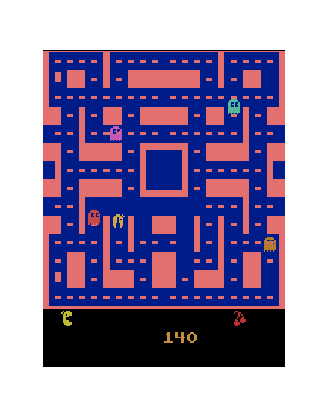
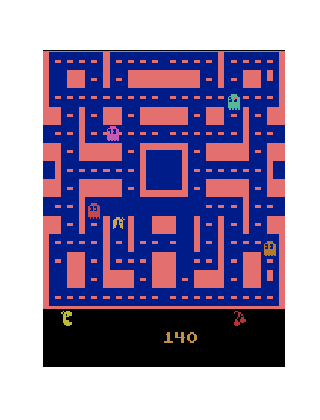
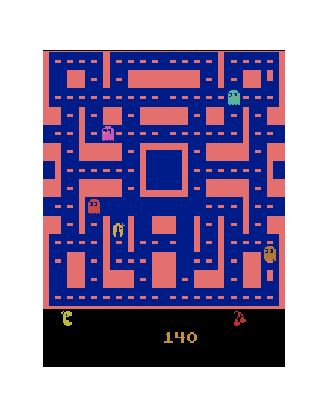
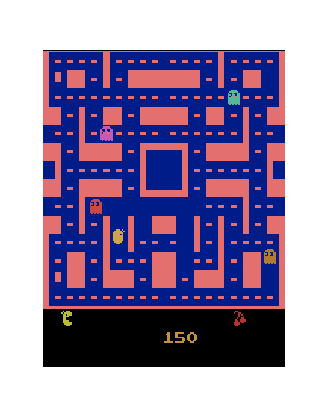
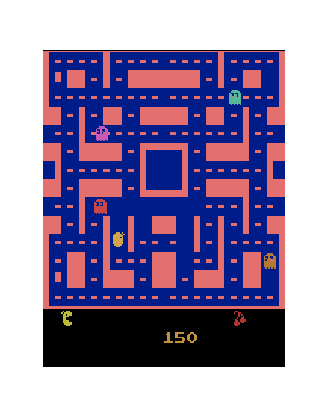
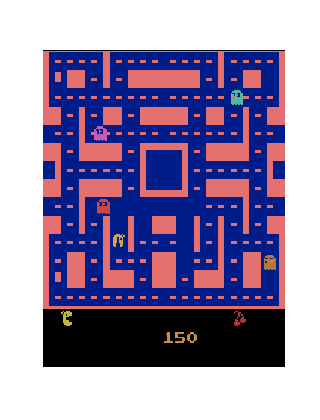
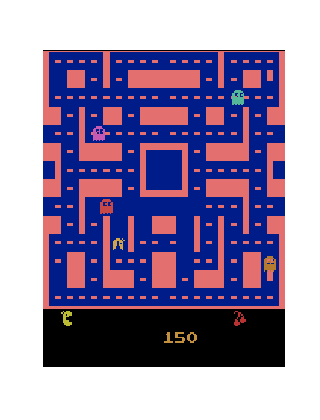
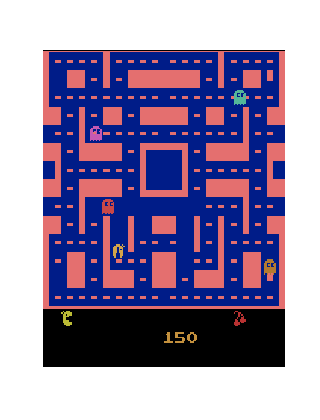
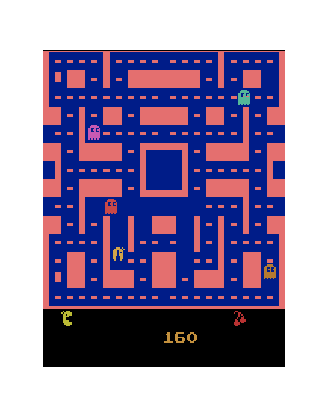
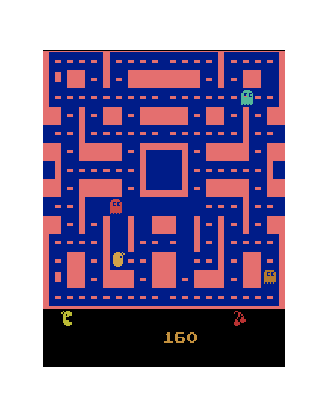
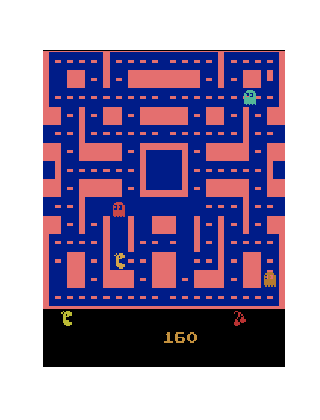
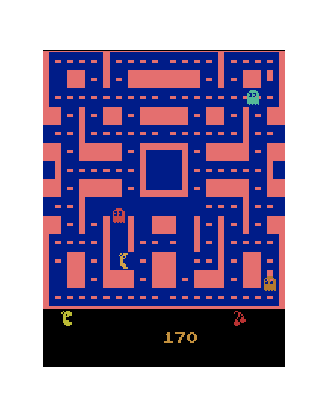
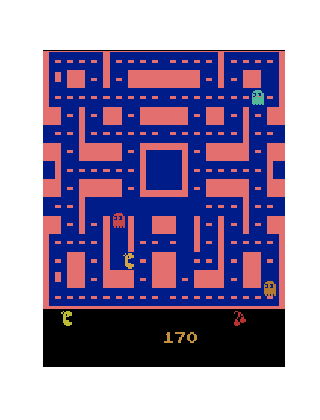
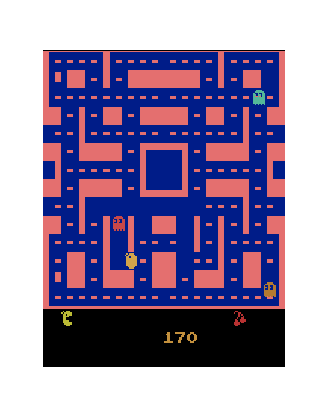
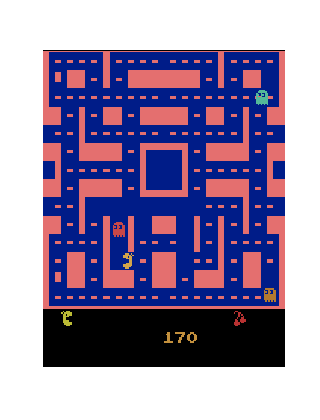
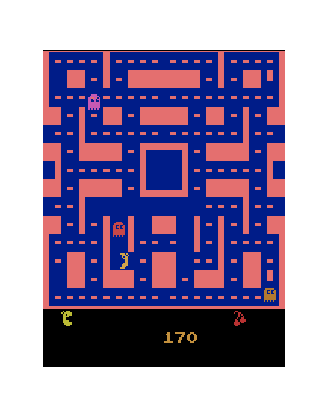
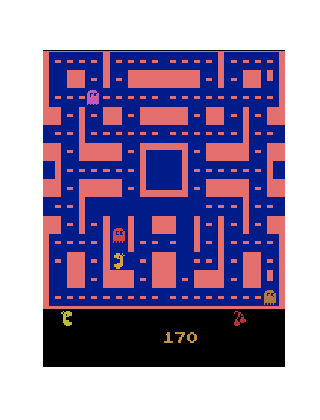
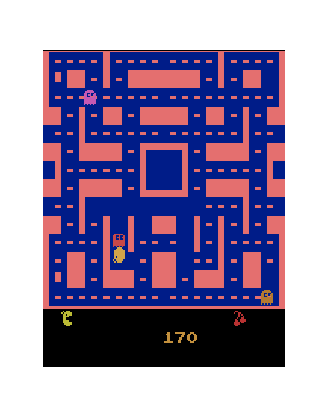
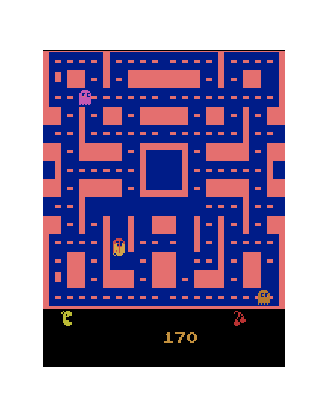
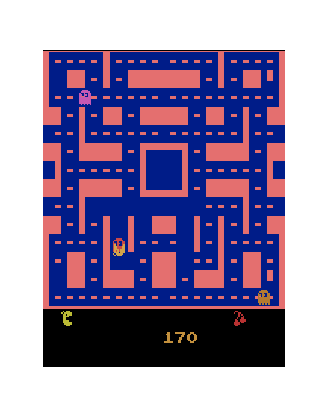
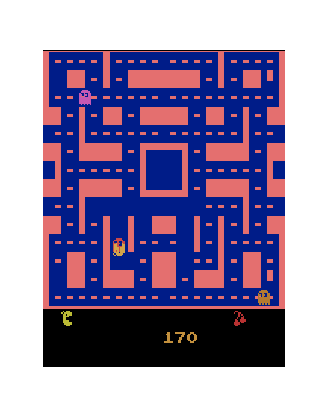
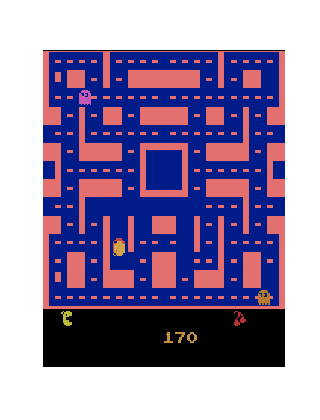
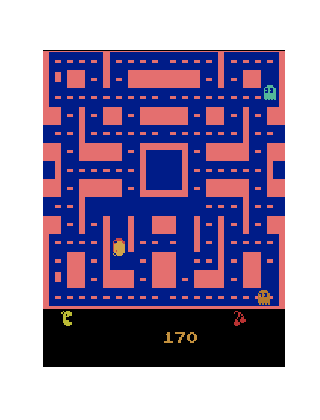
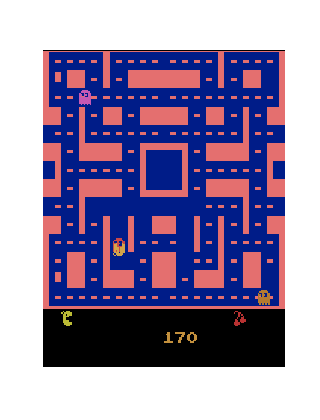
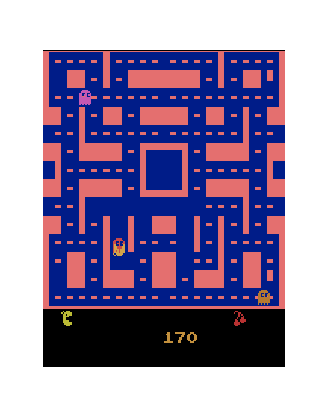
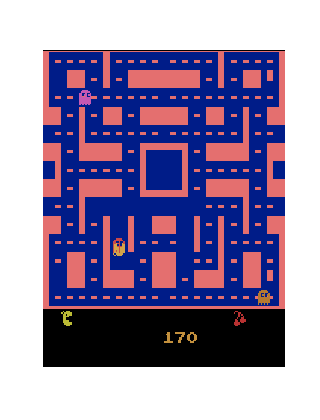
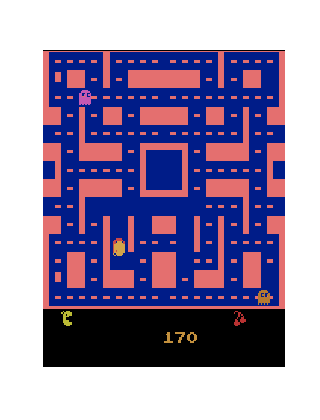
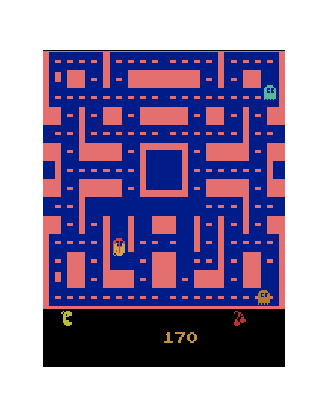
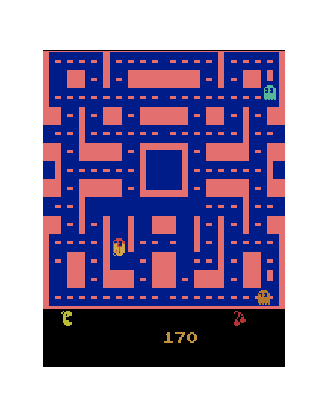
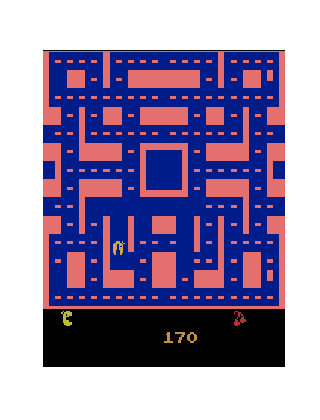
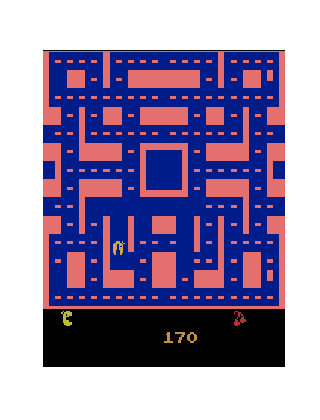
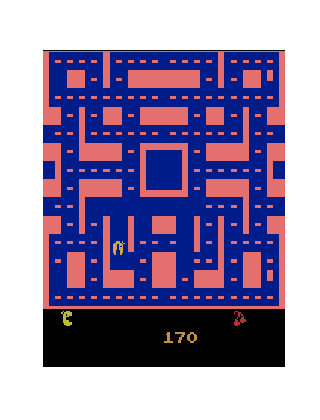
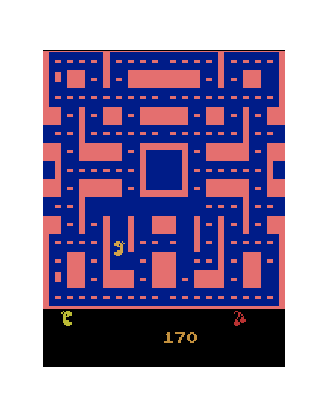
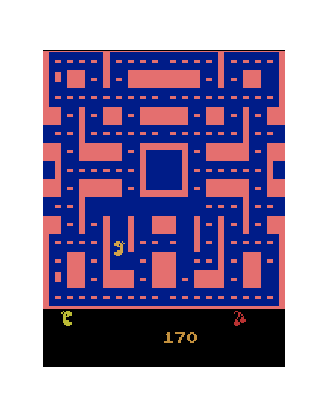
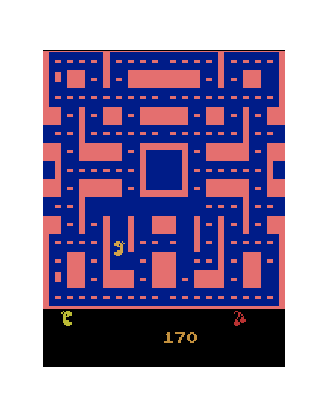
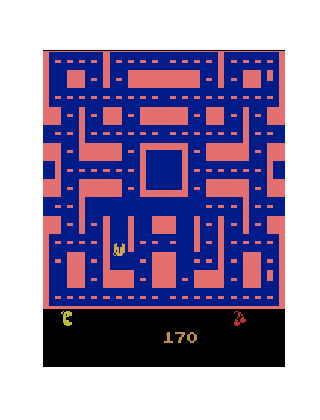
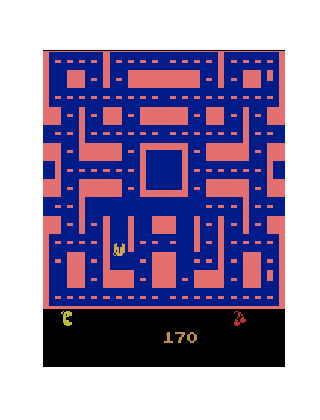
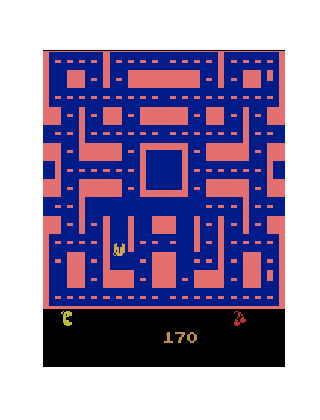
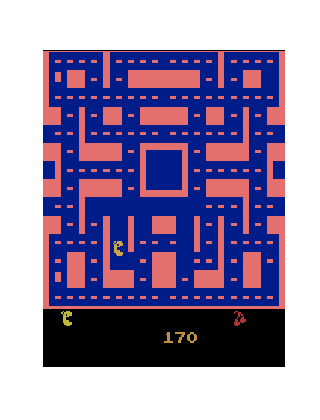
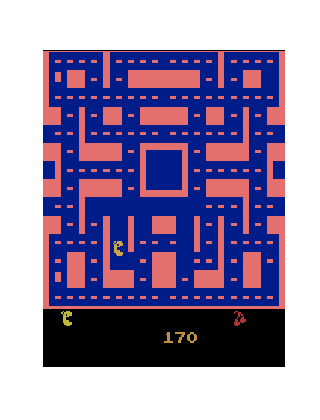
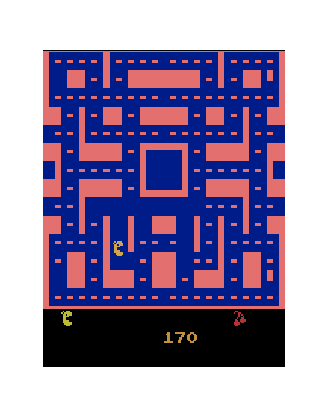
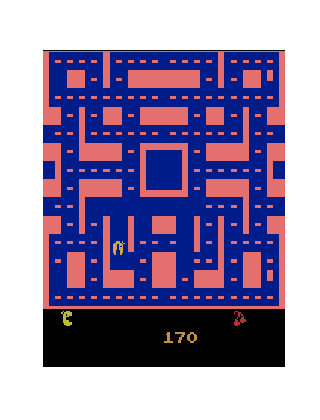
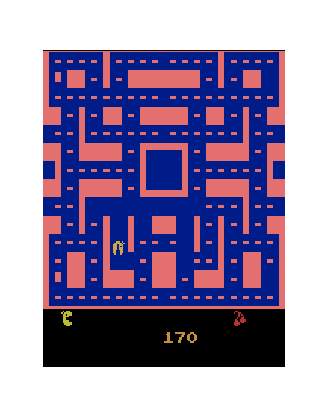
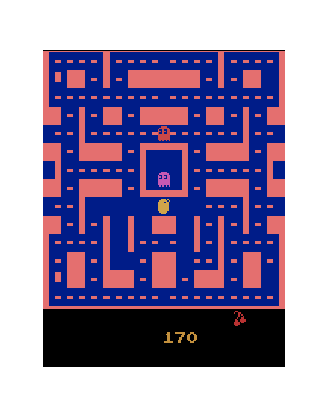
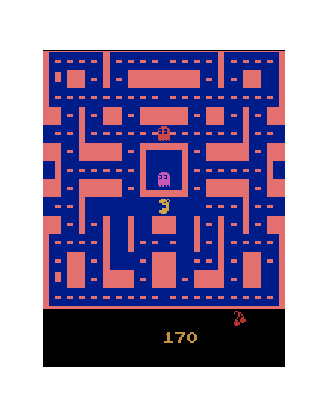
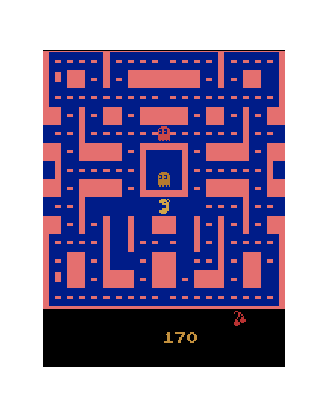
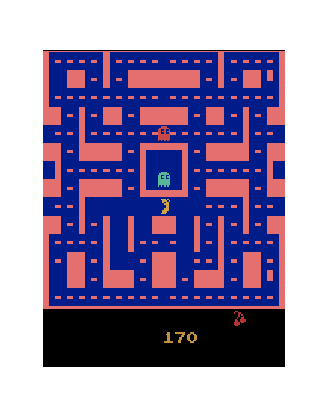
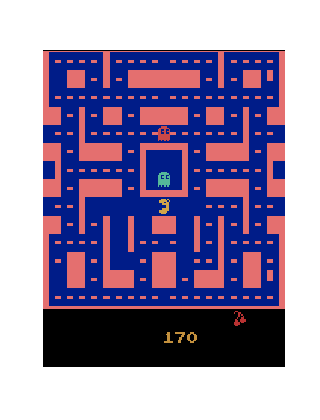
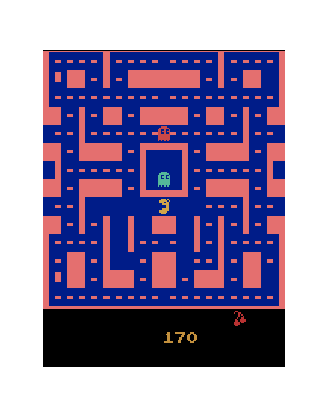
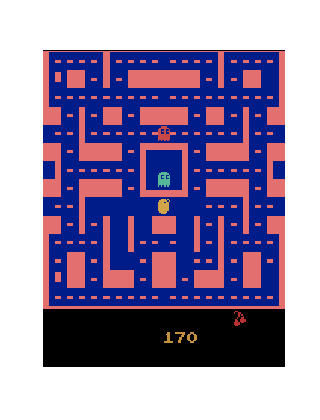
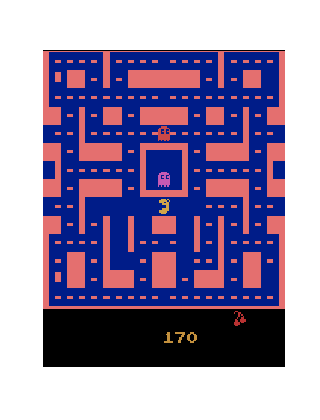
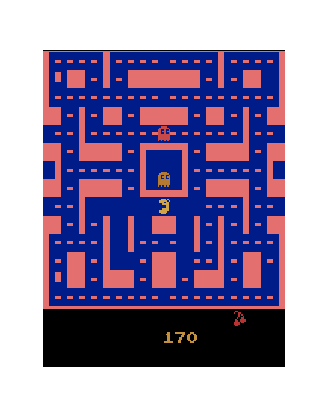
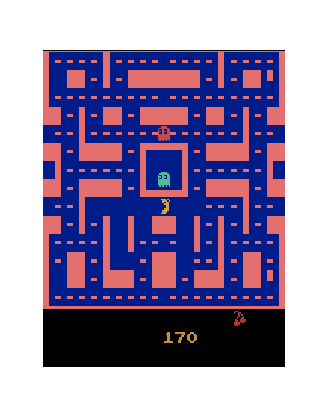
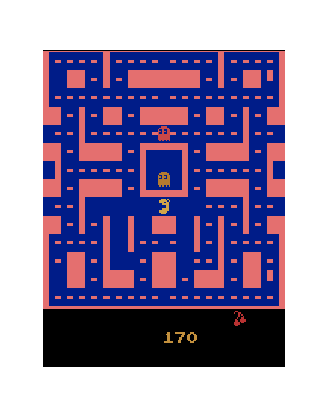
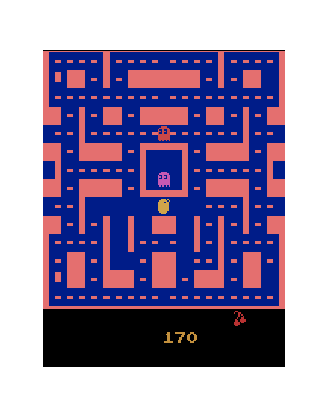
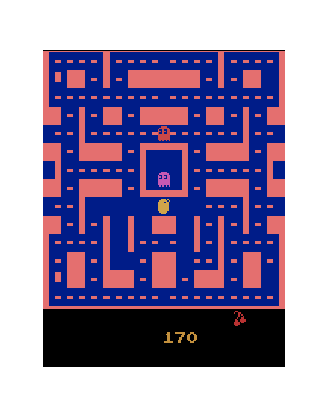
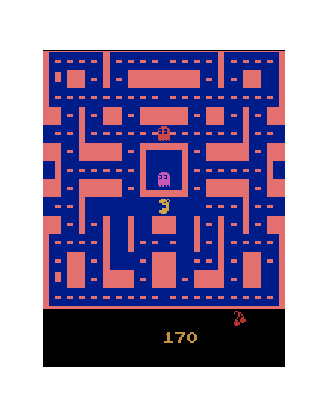
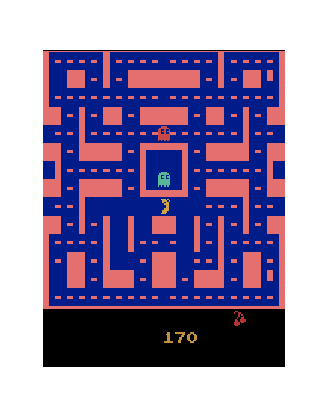
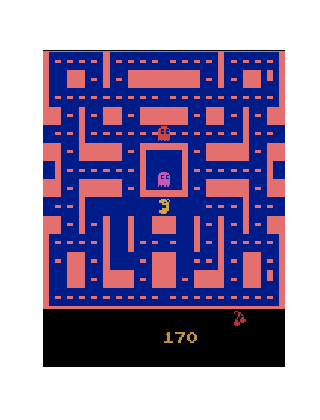
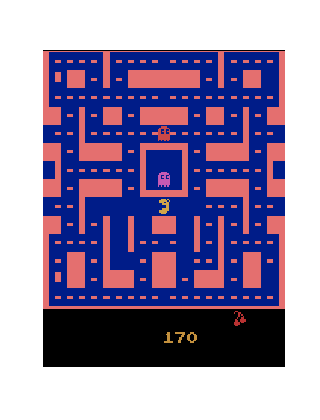
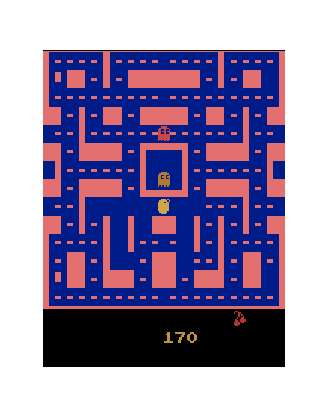
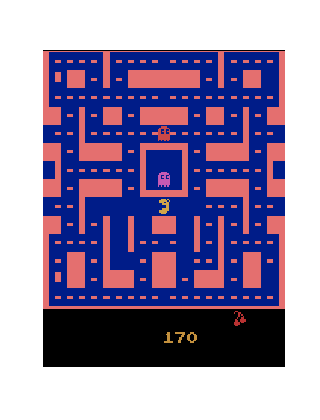
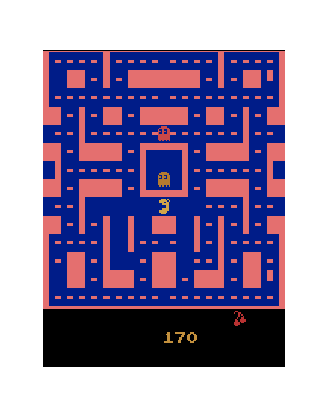
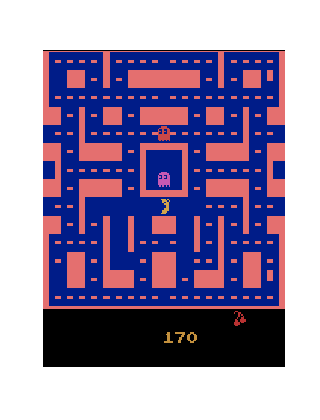
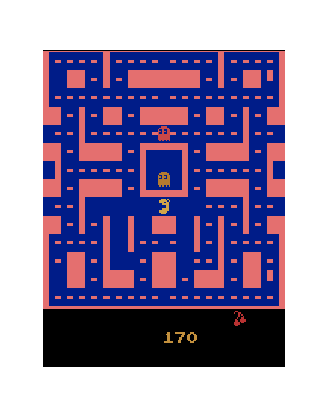
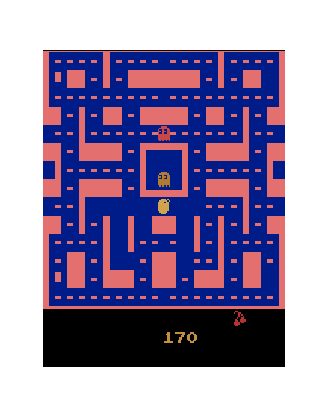
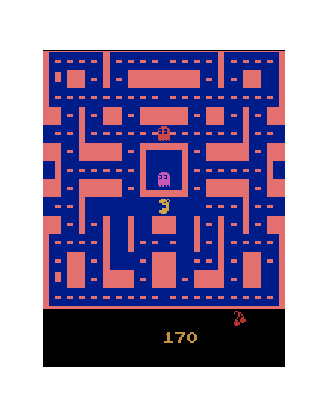
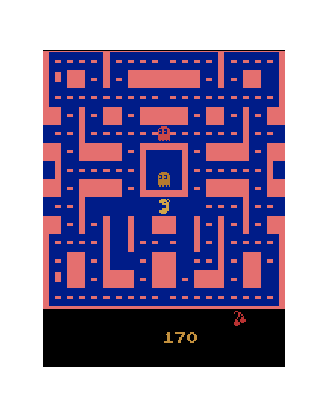
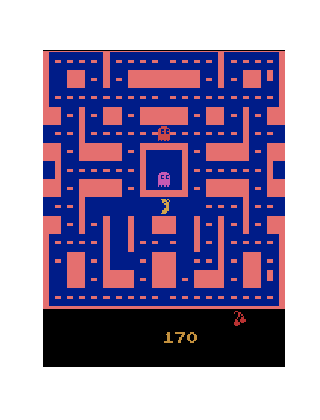
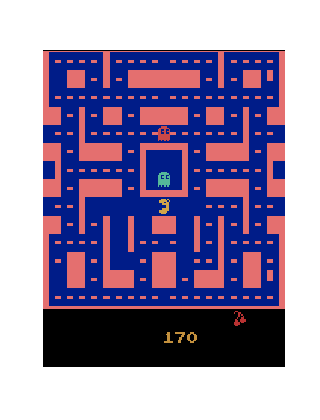
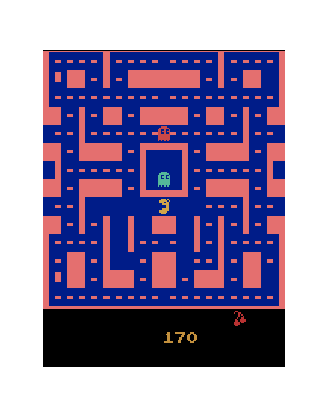
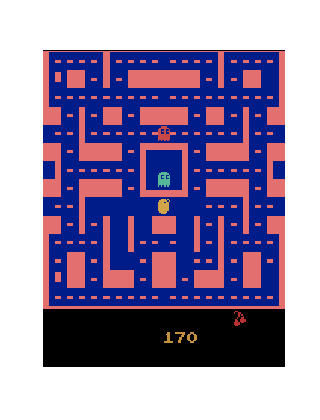
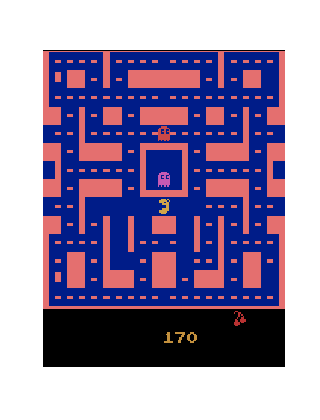
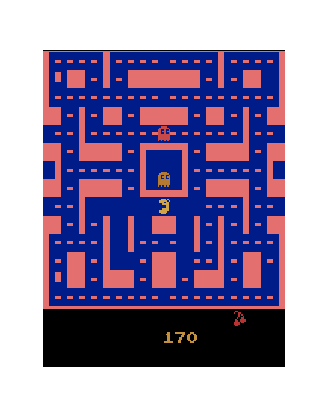
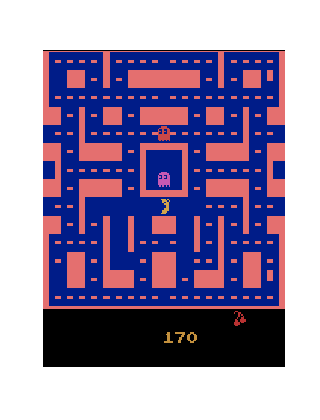
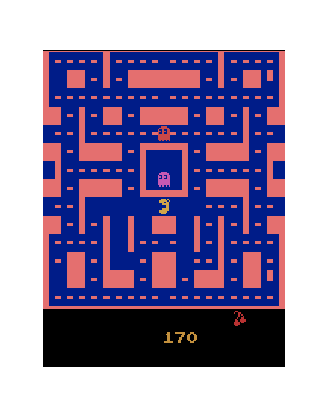
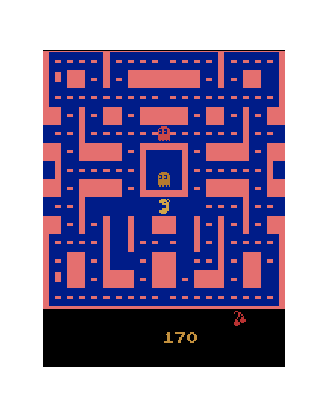
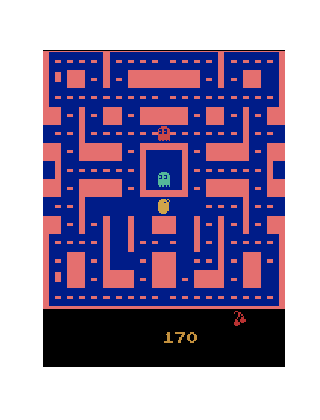
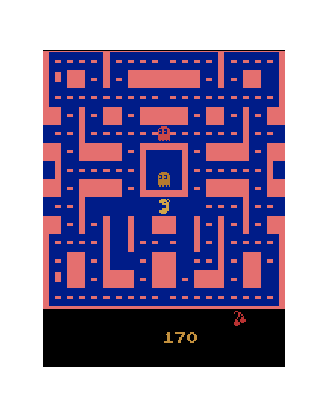
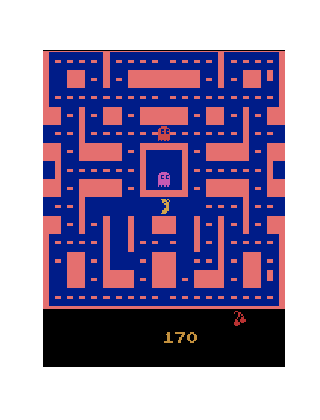
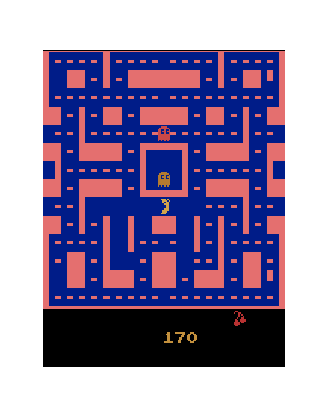
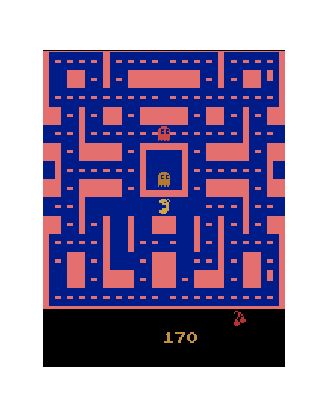
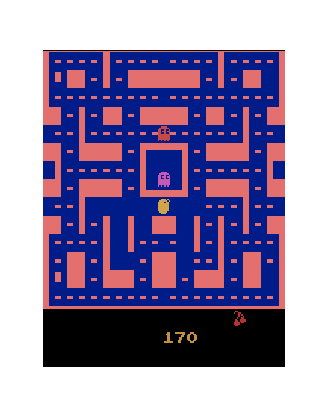
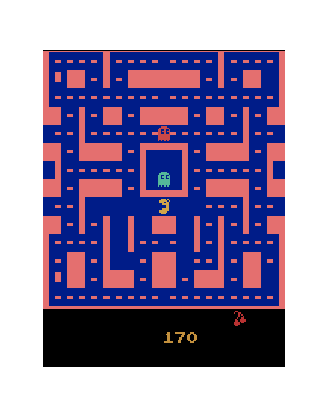
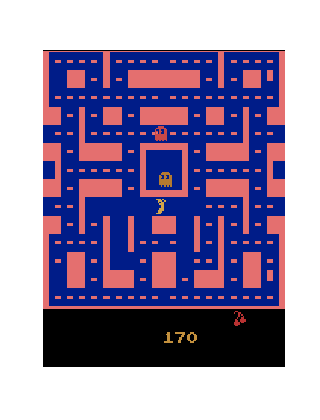
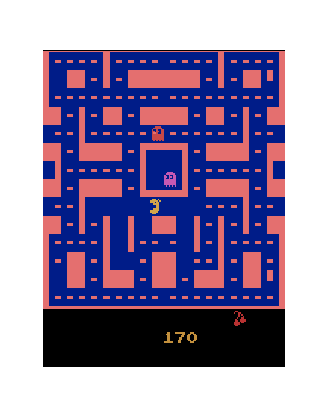
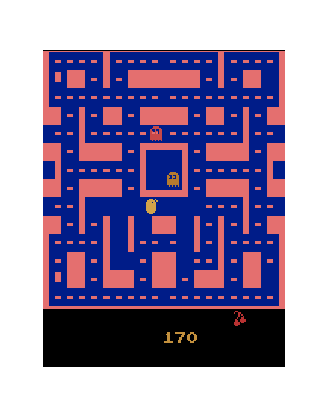
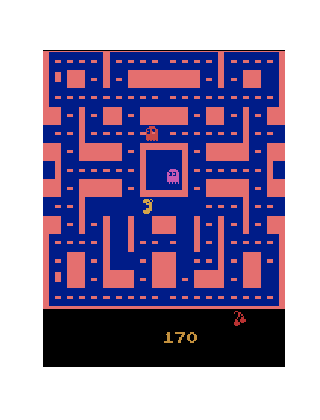
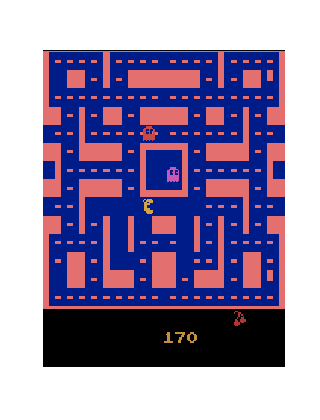
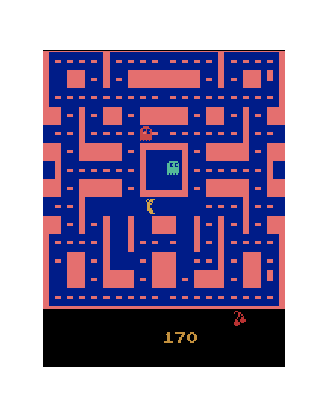
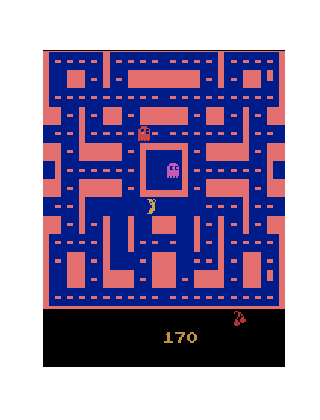
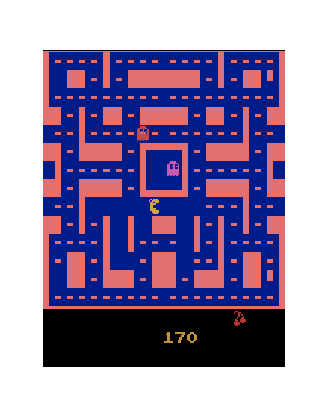
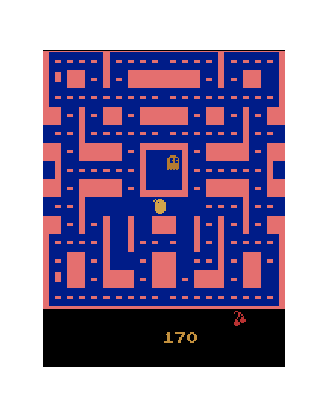
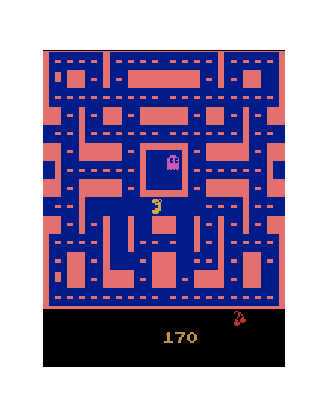
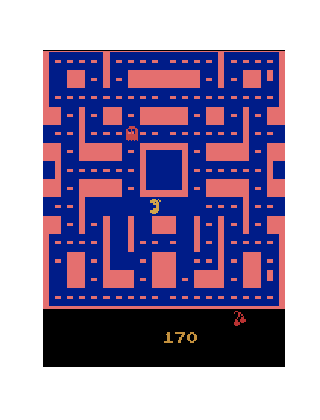
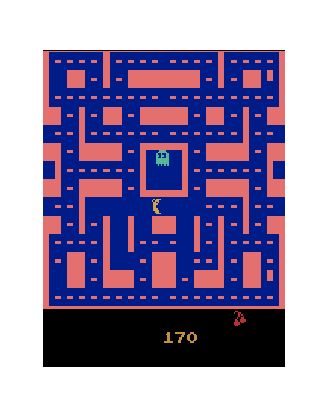
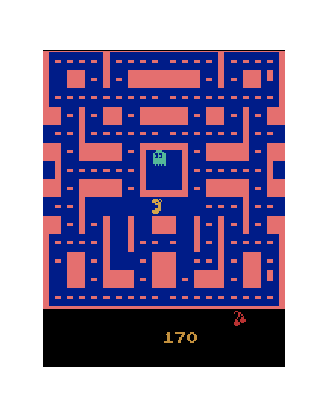
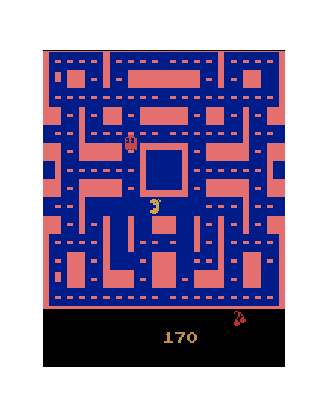
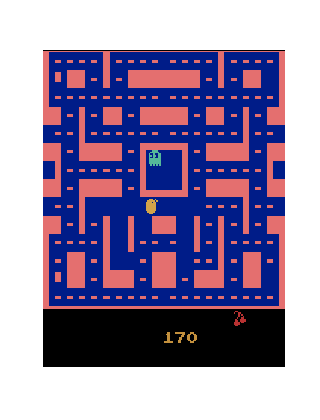
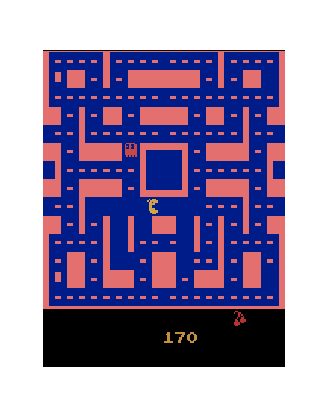
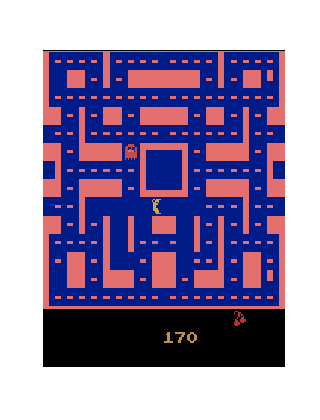
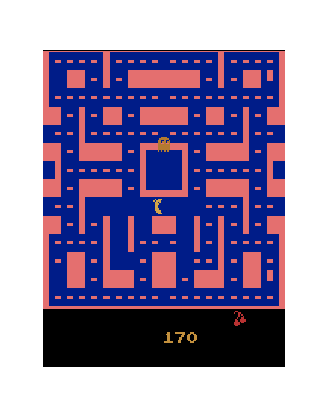
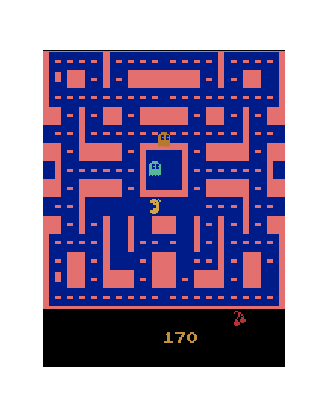
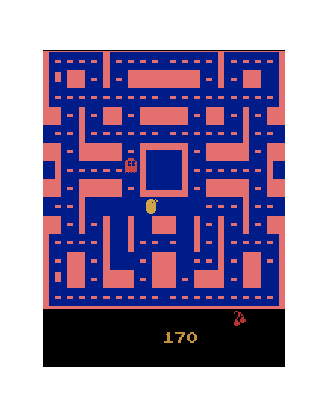
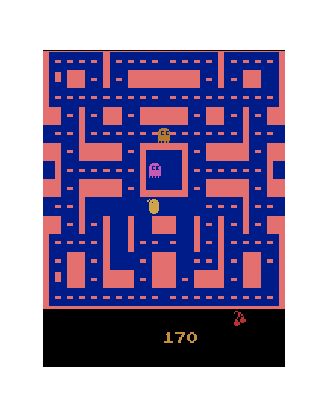
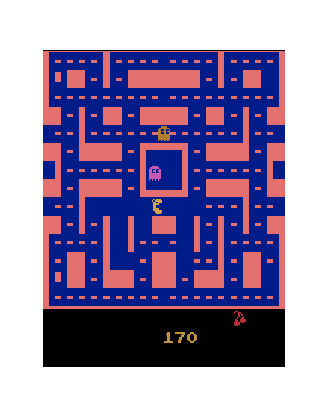
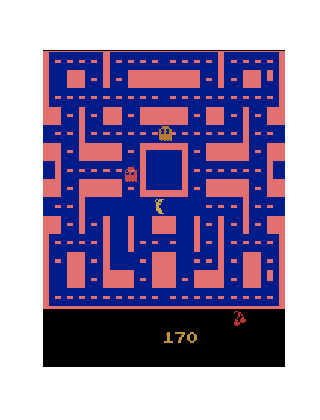
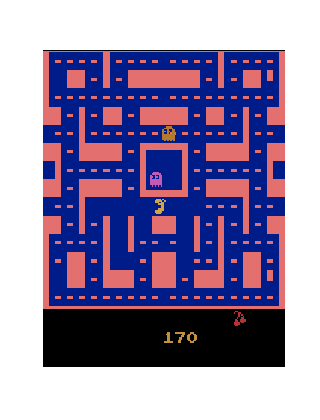
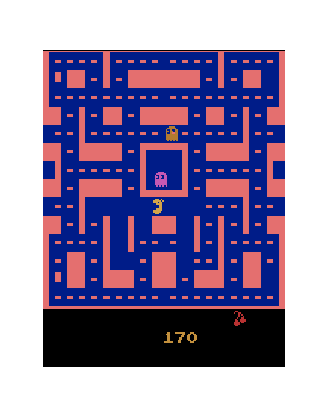
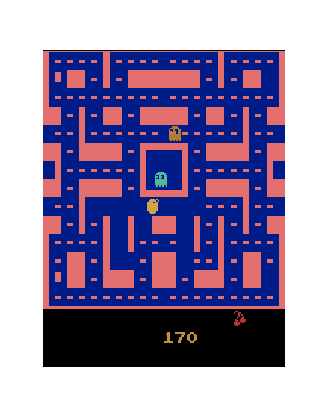
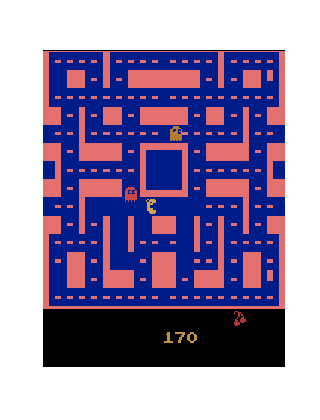
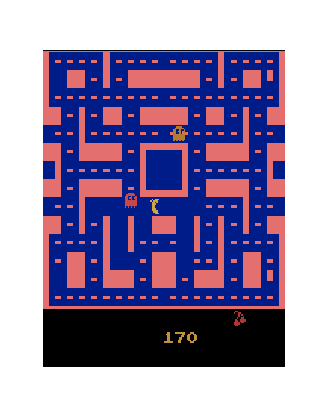
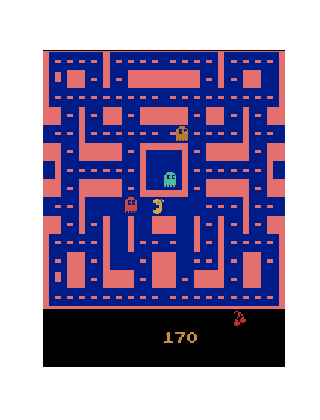
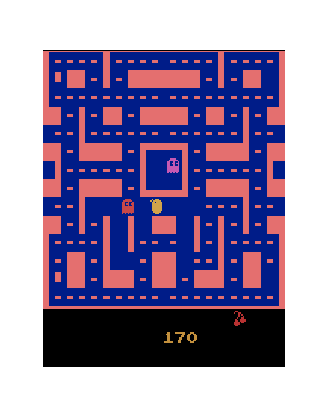
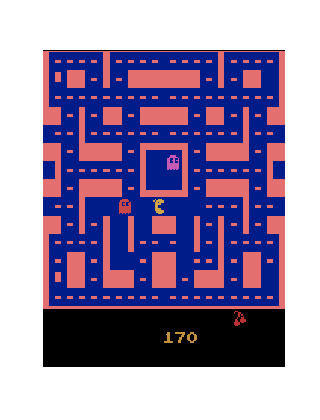
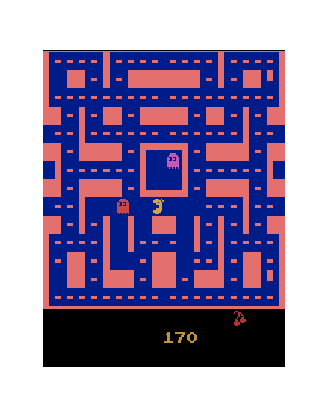
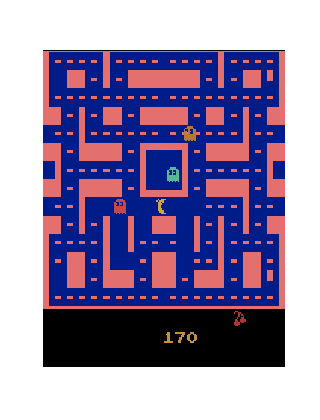
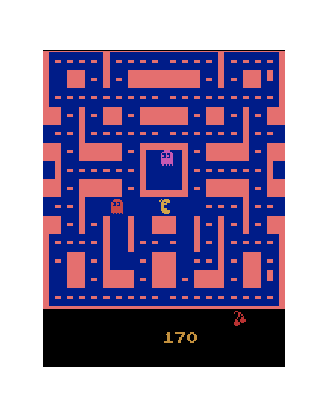
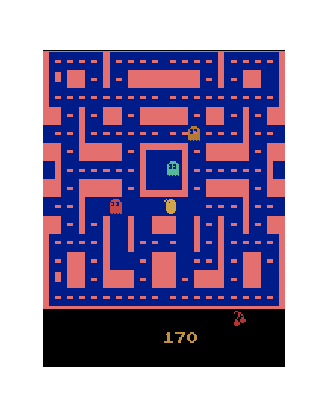
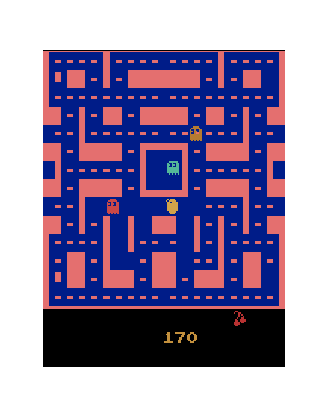
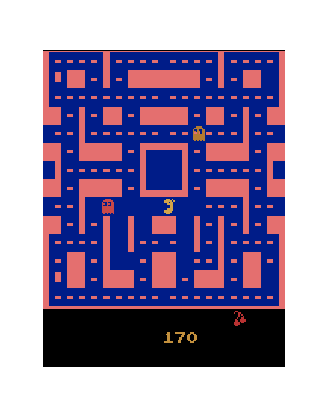
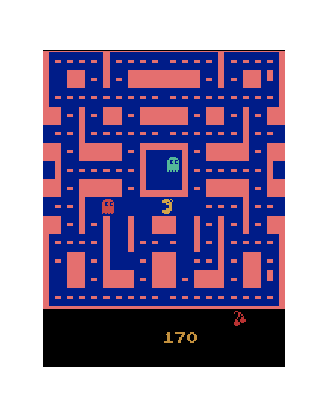
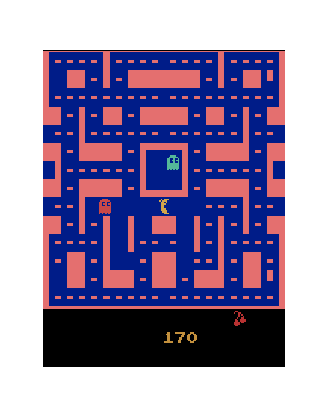
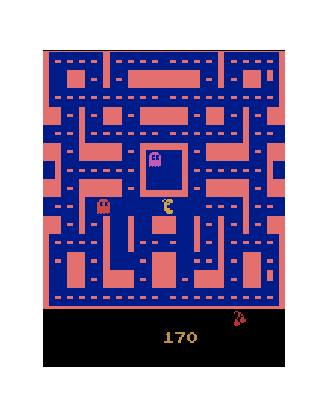
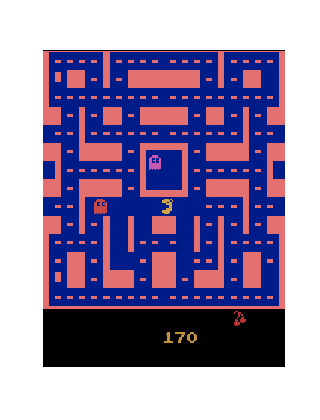
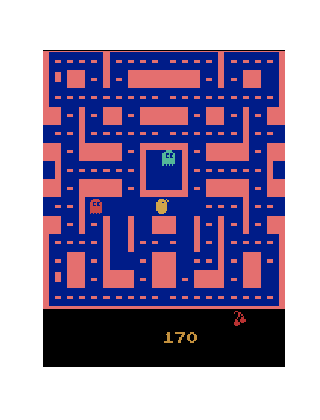
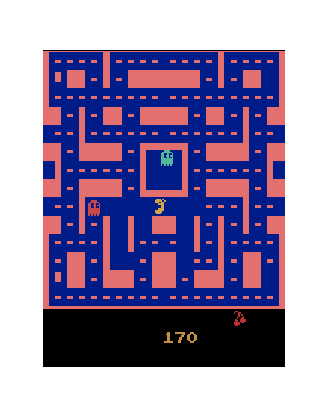
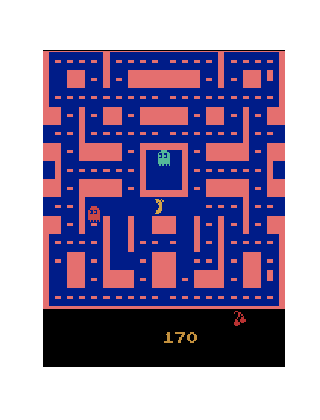
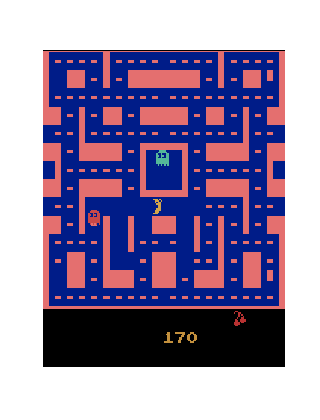
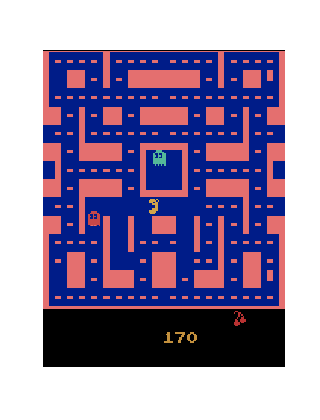
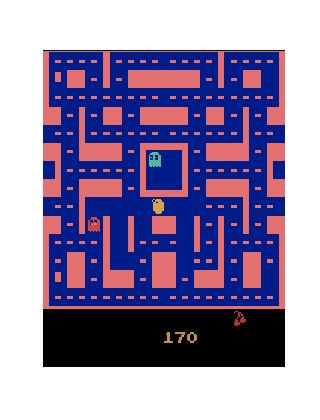
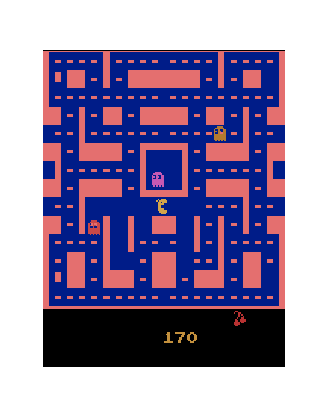
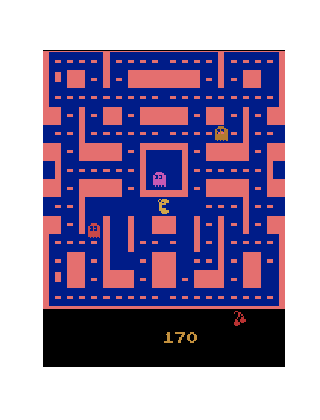
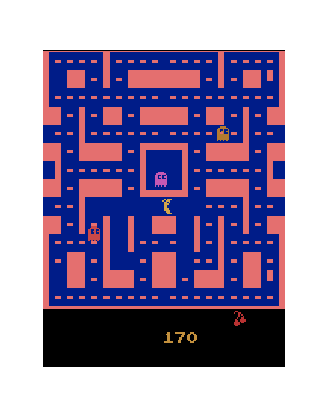
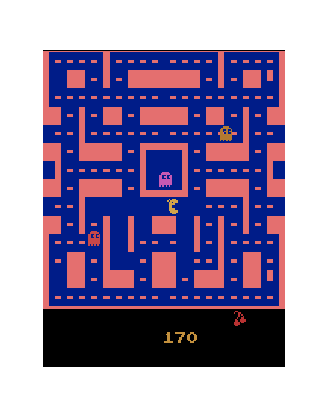
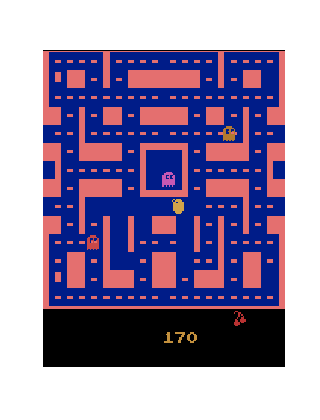
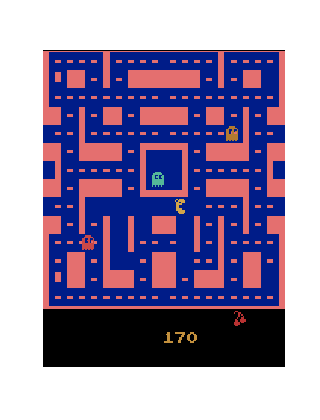
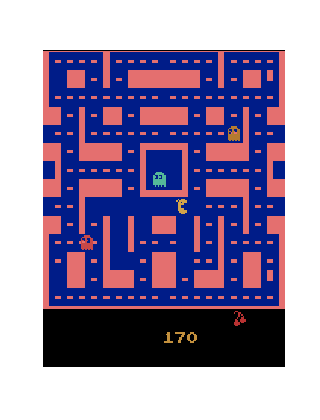
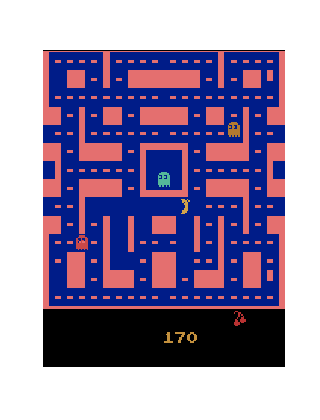
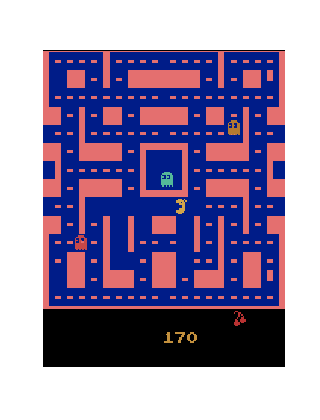
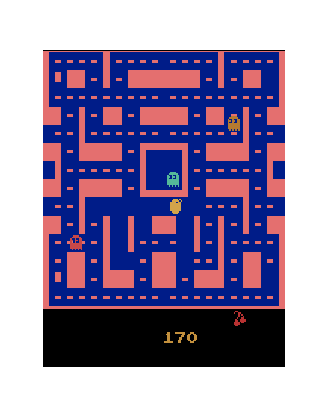
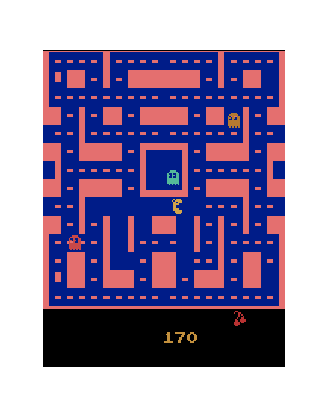
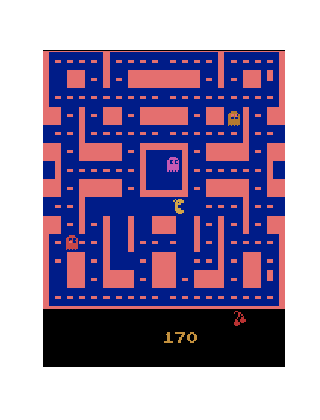
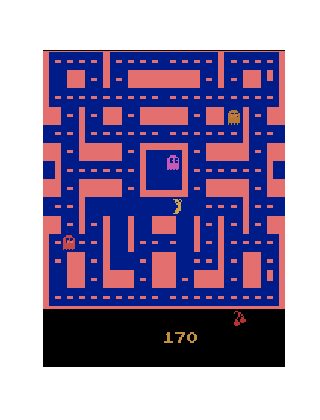
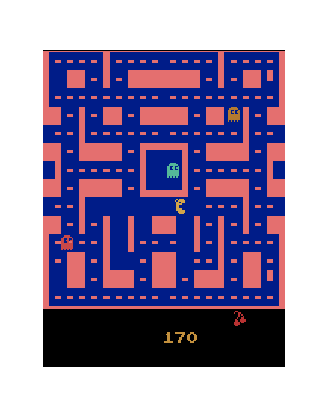
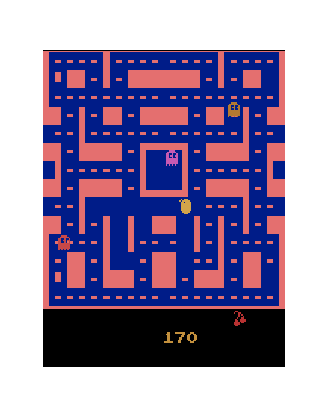
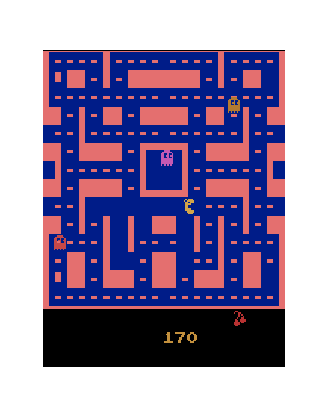
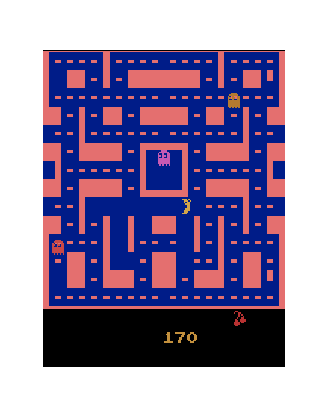
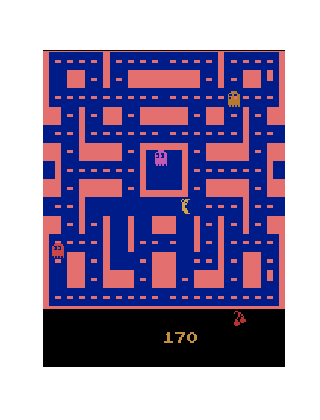
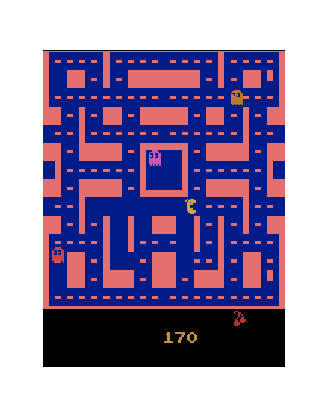
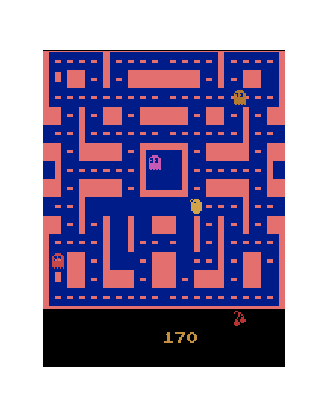
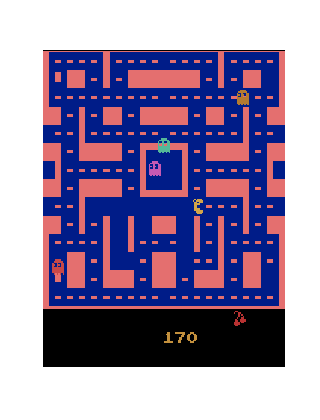
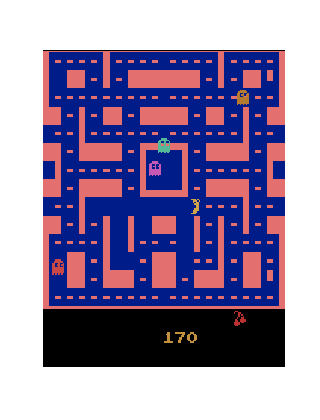
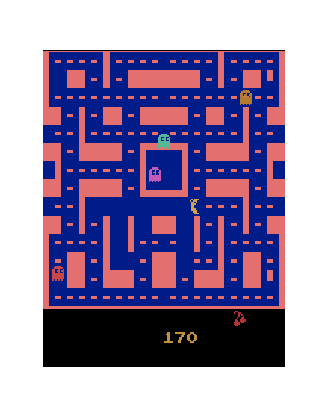
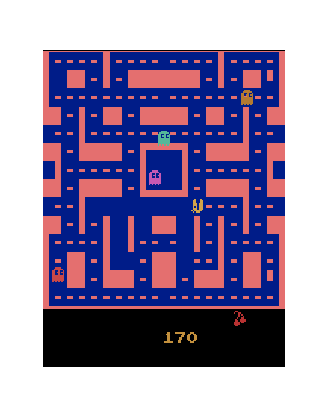
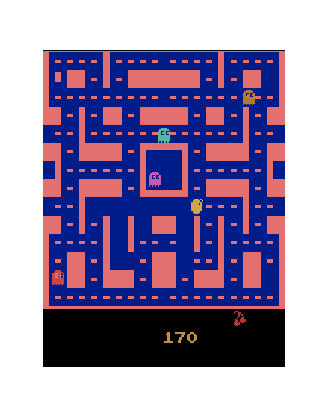
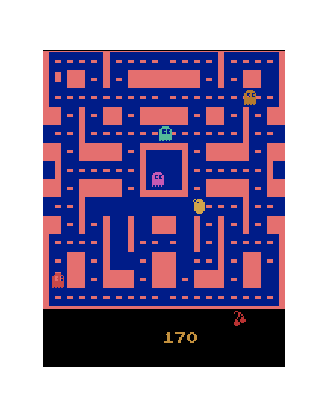
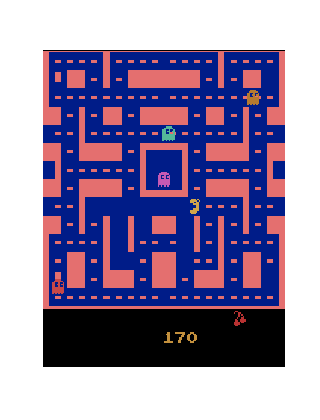
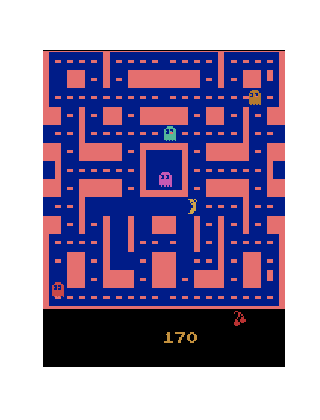
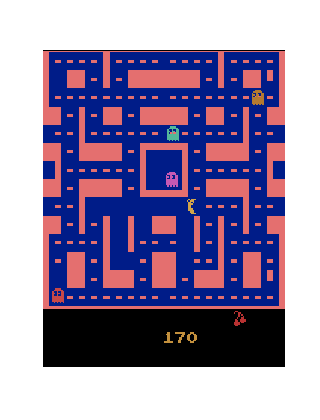
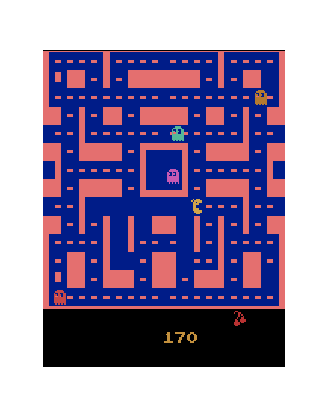
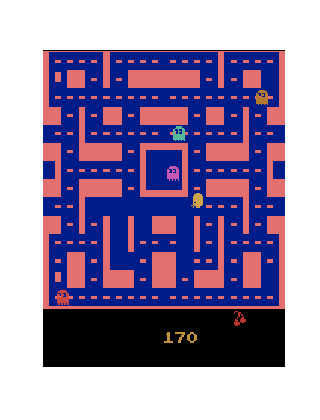
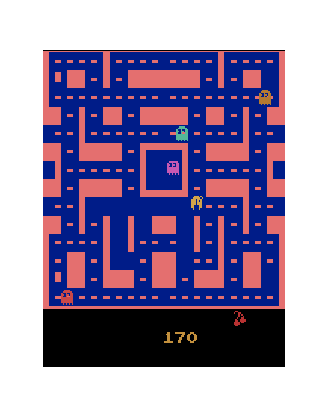
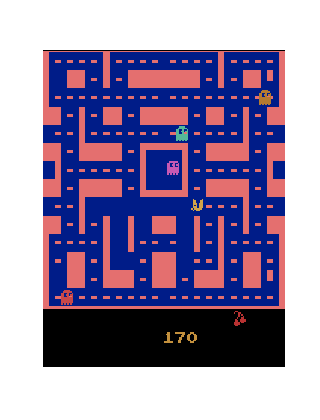
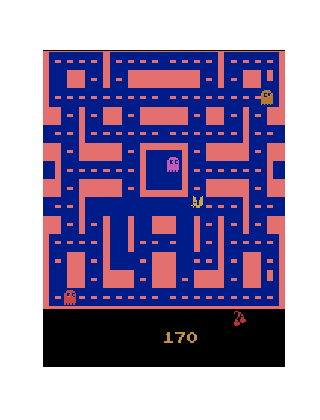
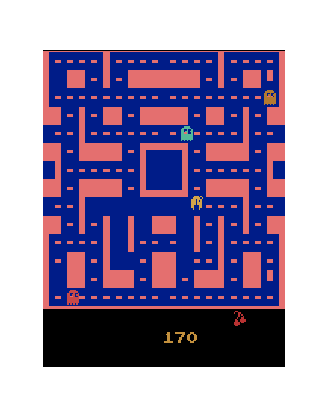
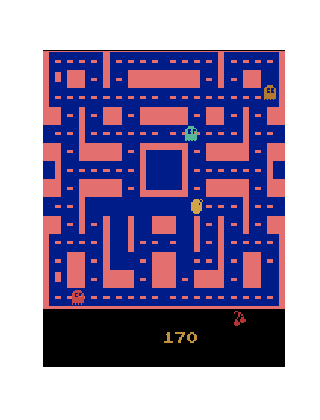
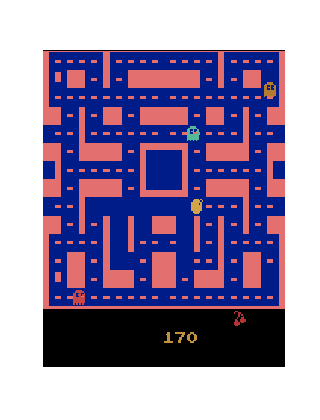
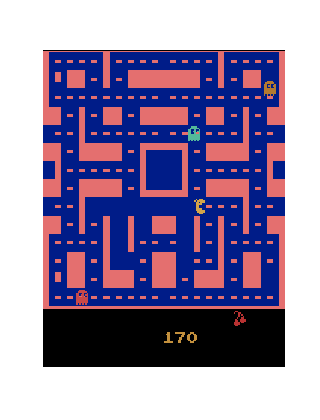
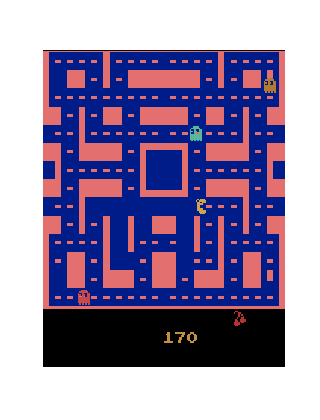
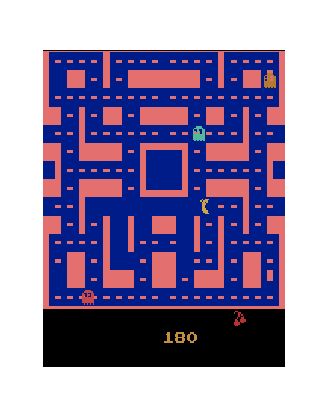
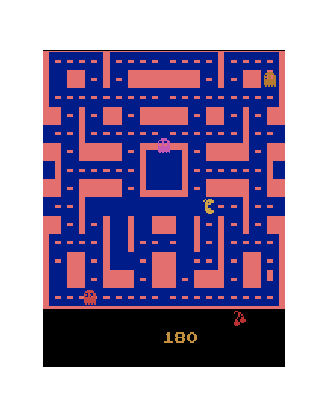
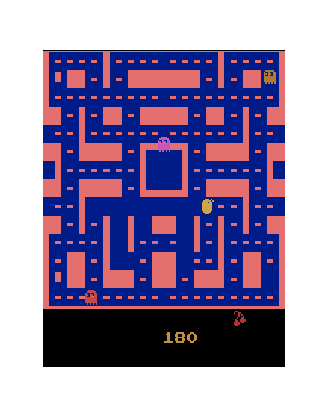
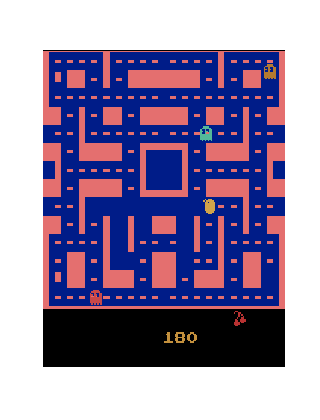
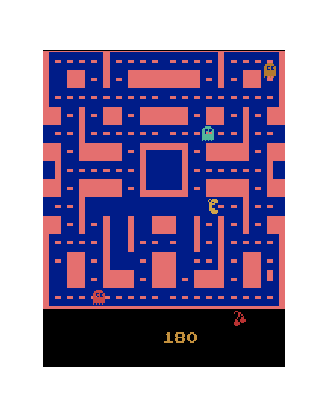
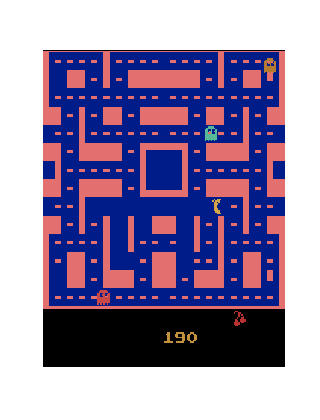
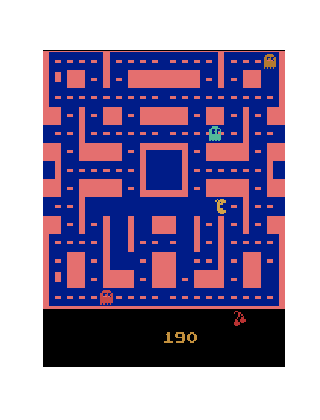
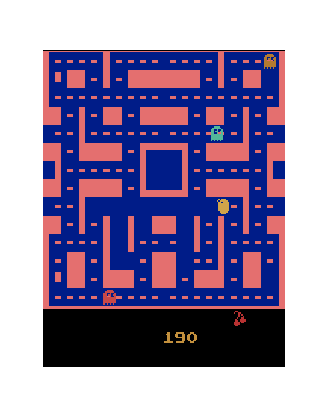
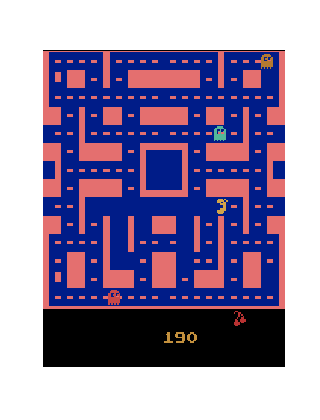
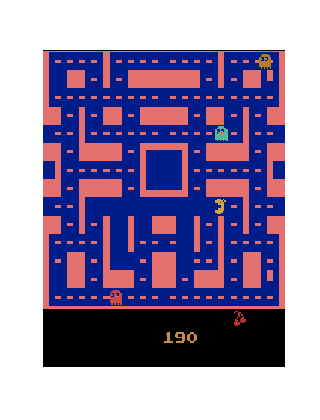
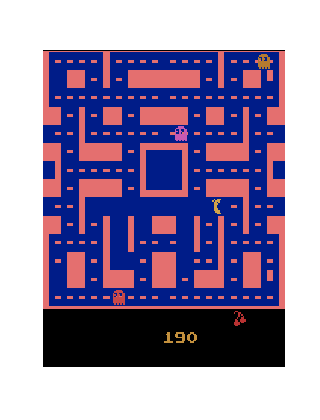
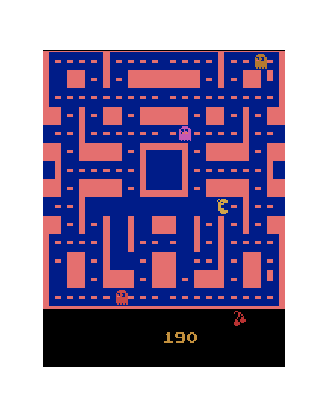
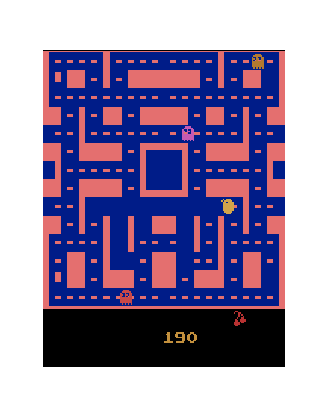
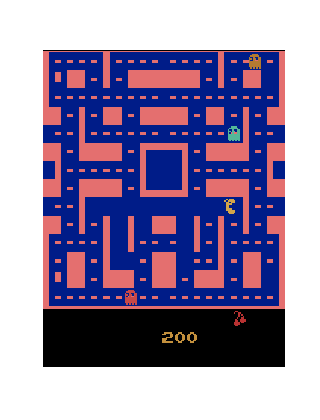
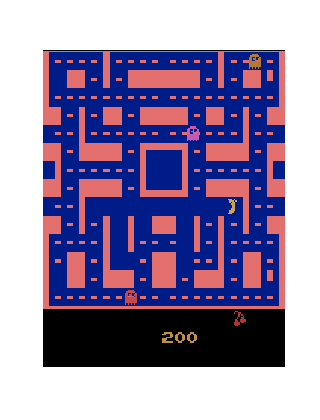
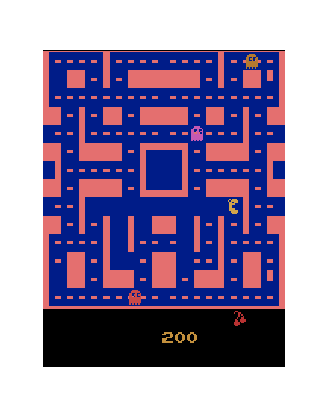
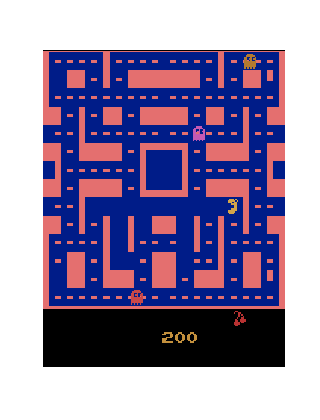
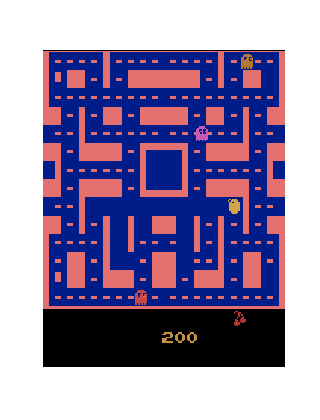
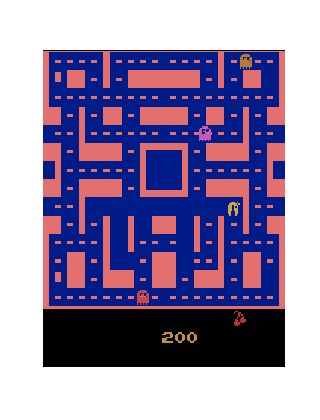
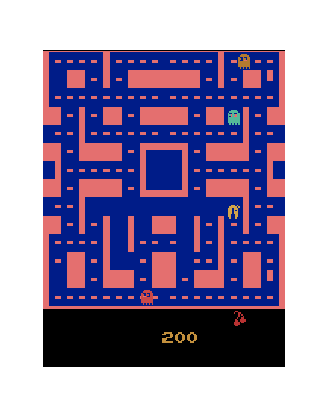
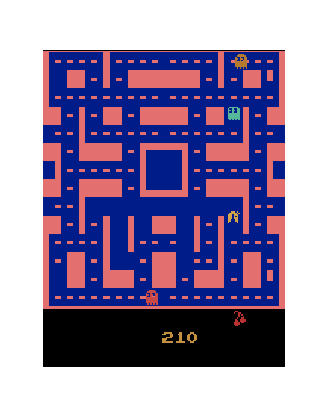
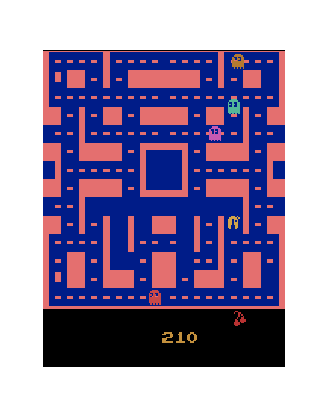
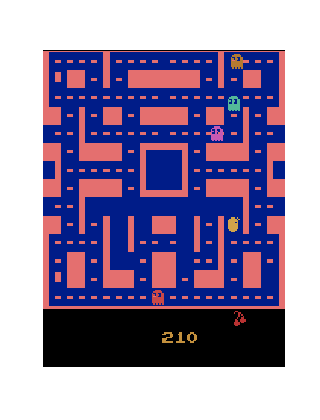
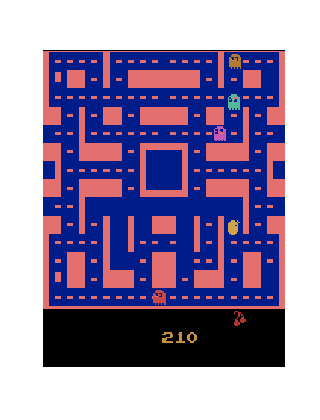
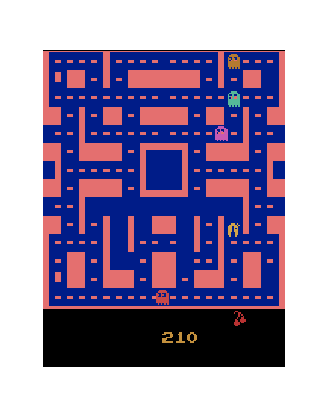
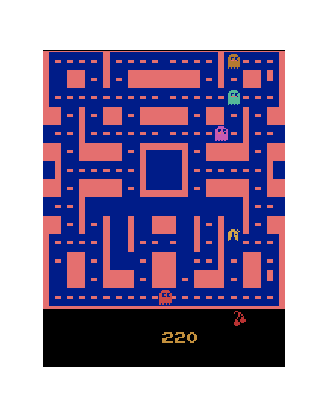
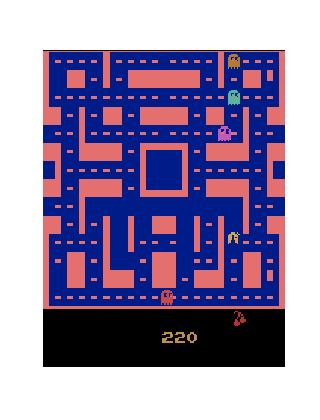
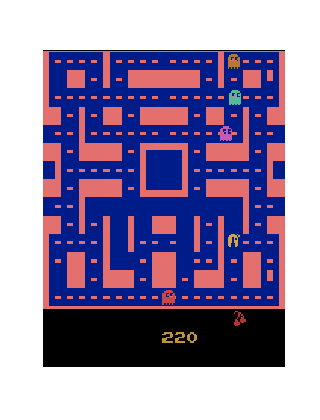
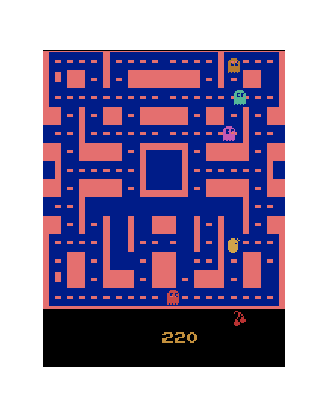
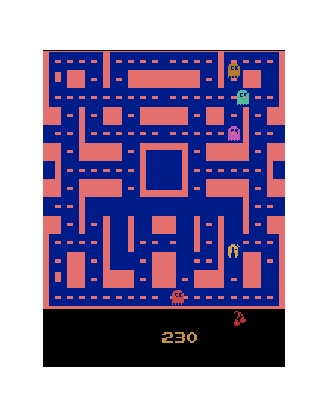
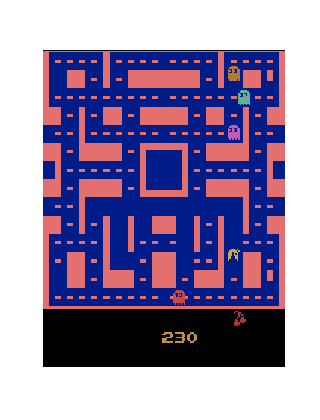
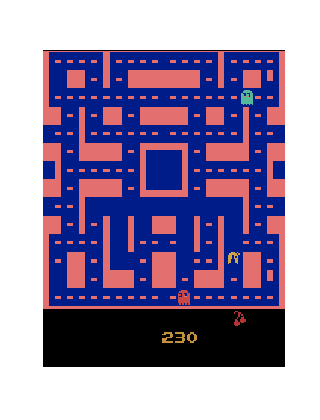
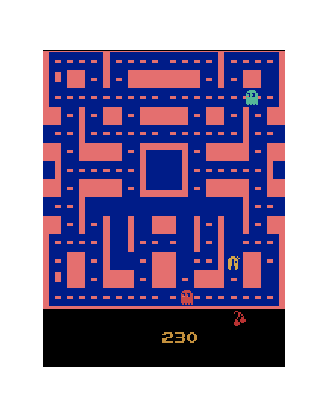
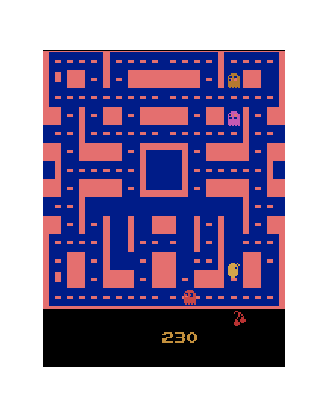
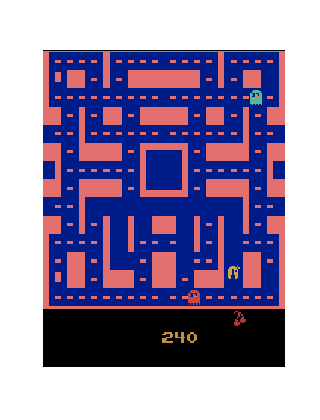
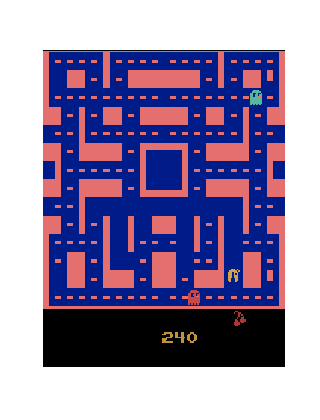
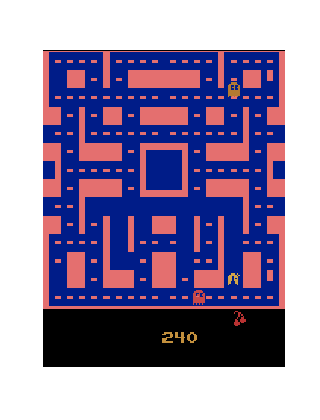
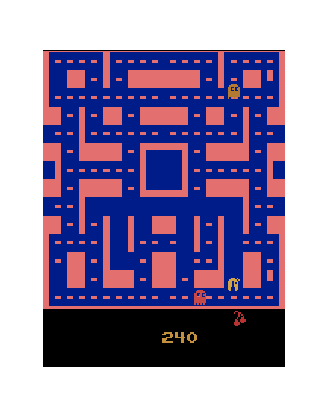
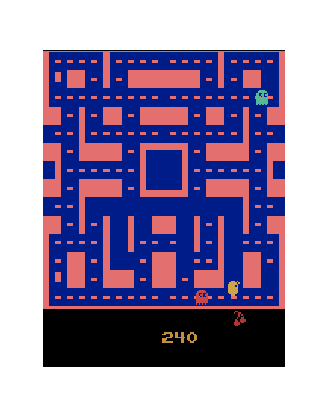
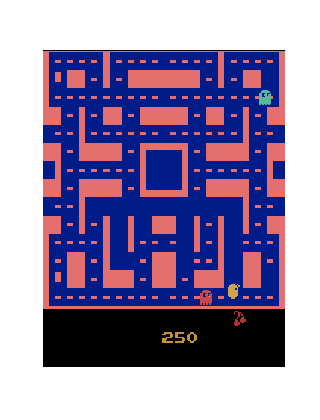
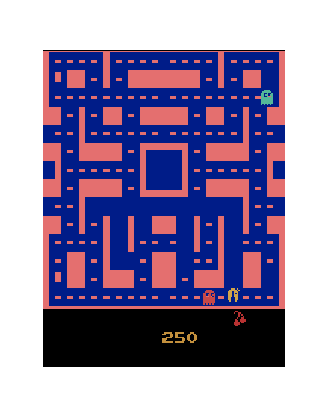
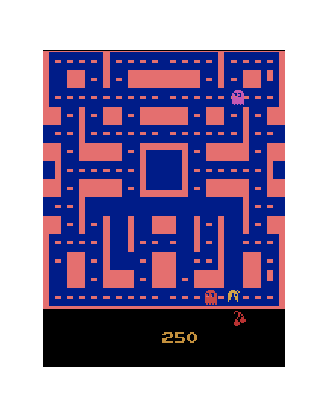
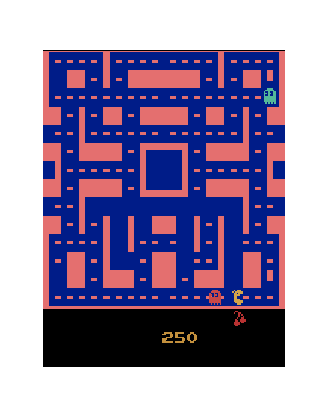
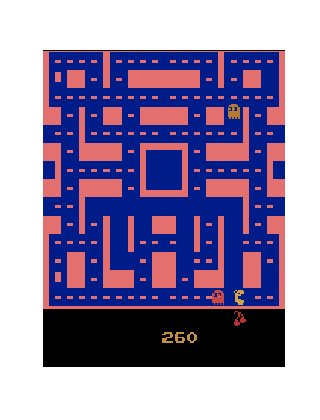
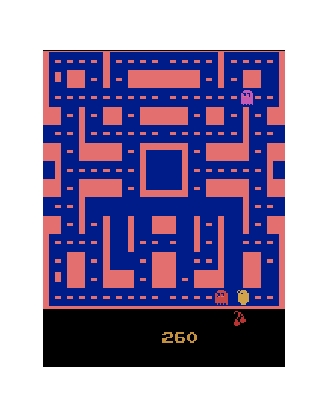
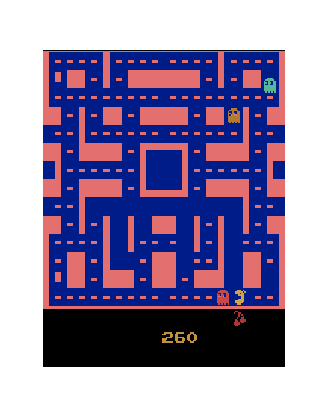
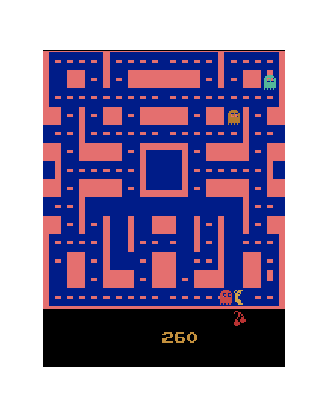
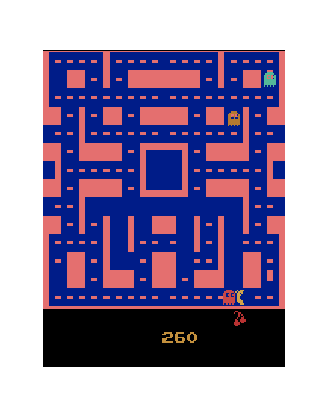
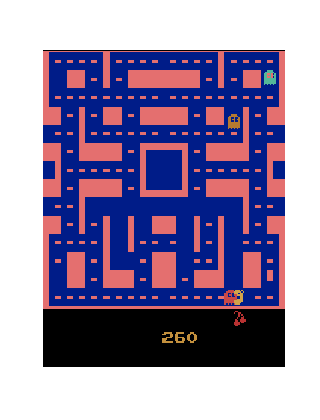
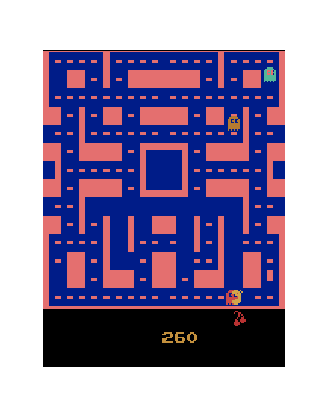
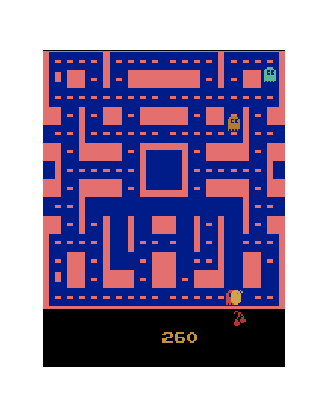
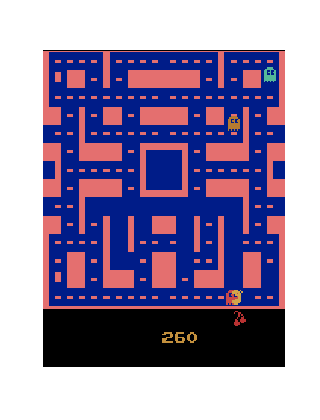
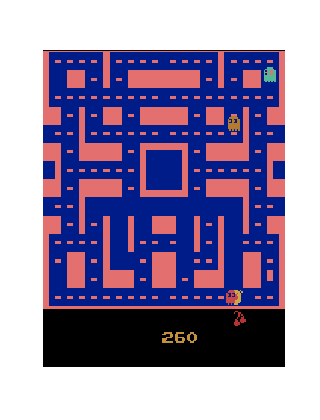
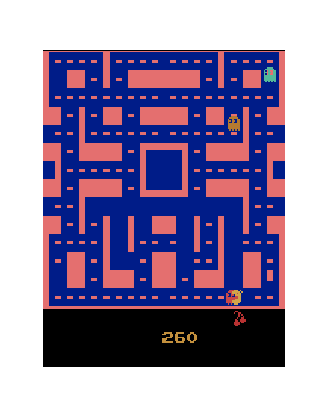
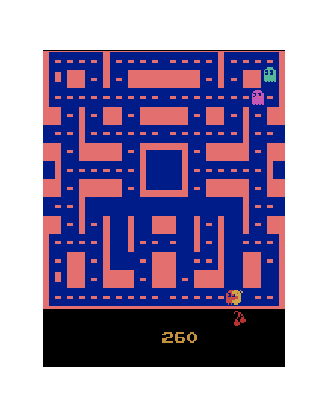
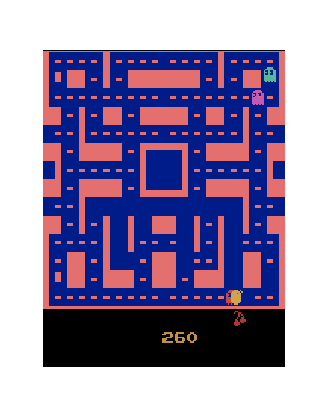
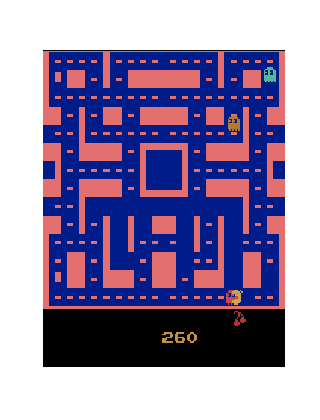
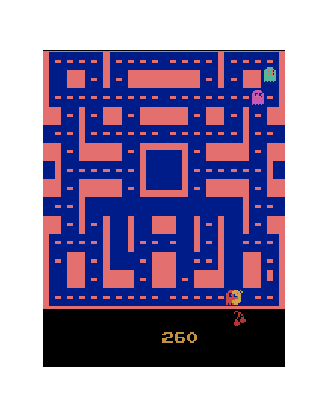
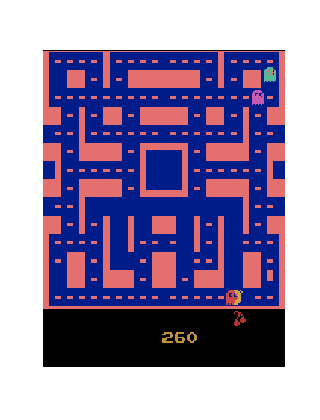
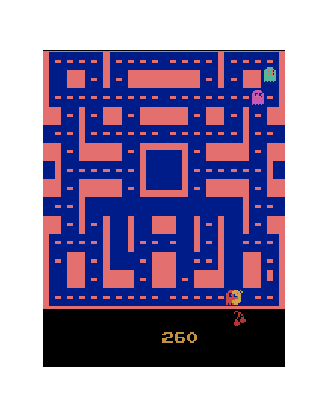
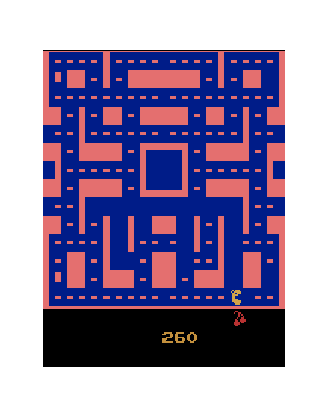
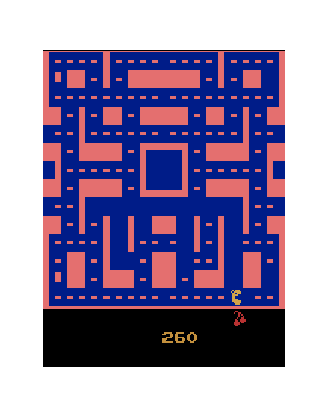
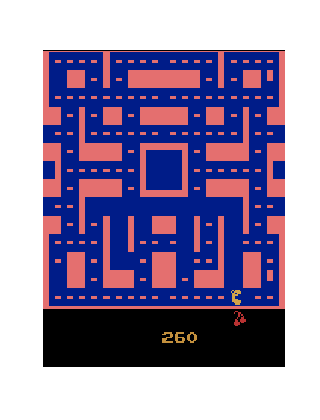
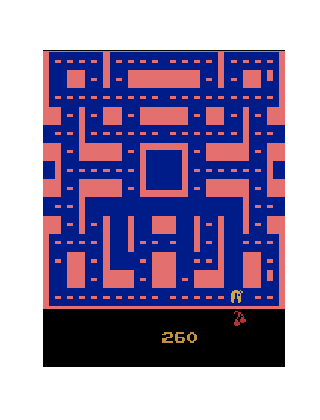
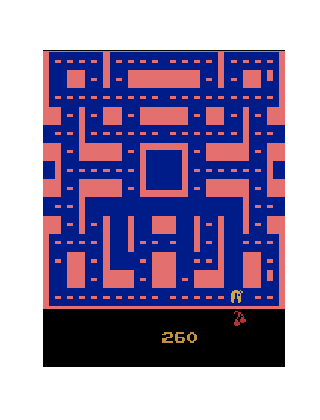
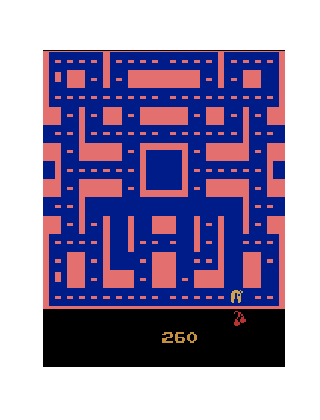
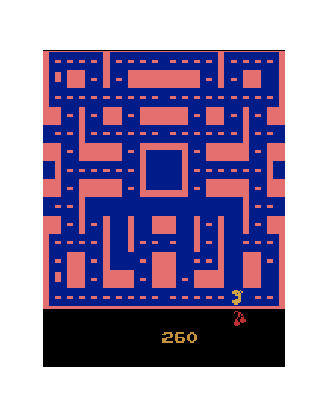
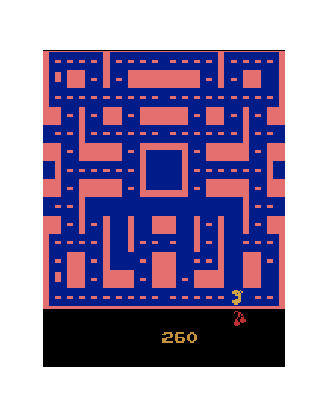
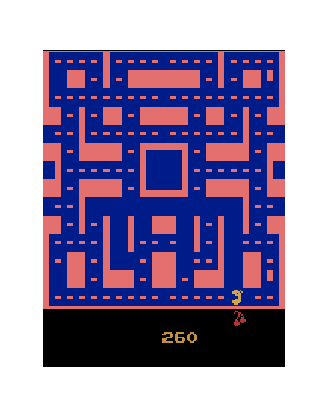
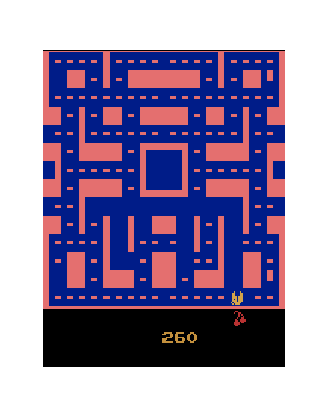
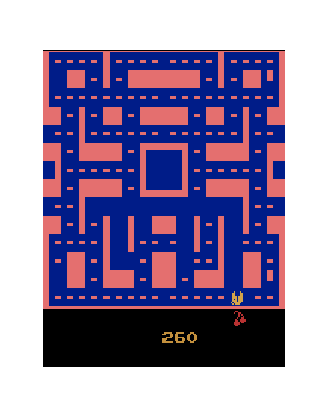
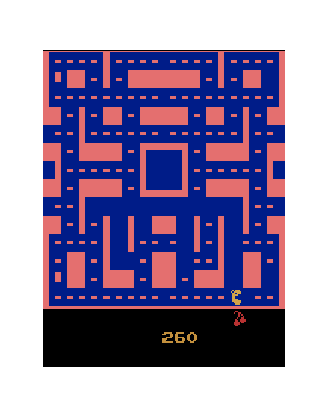
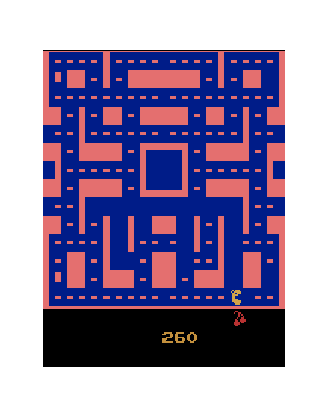

In [11]:
display_frames_as_gif(frames)

## Step 3: Baselines

* https://github.com/openai/baselines
* https://github.com/openai/gym/blob/master/gym/envs/__init__.py#L498

In [0]:
!rm -r logs
!mkdir logs
!mkdir logs/pacman

In [13]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.12.0


In [14]:
import gym
from baselines.common.vec_env.dummy_vec_env import DummyVecEnv
from baselines.common.vec_env.vec_monitor import VecMonitor

from baselines.ppo2 import ppo2

wrapped_env = DummyVecEnv([lambda: gym.make("MsPacmanDeterministic-v4")])
log_dir = '/content/logs/pacman/'
monitored_env = VecMonitor(wrapped_env, log_dir)

%time model = ppo2.learn(network='cnn', env=monitored_env, total_timesteps=500000, gamma=1.0, lr=0.1, ent_coef=0.01)

Logging to /tmp/openai-2019-01-07-17-55-24-152288


/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


------------------------------------
| approxkl           | 2116830.8   |
| clipfrac           | 0.52038574  |
| eplenmean          | 663         |
| eprewmean          | 366.66666   |
| explained_variance | 0.000607    |
| fps                | 139         |
| nupdates           | 1           |
| policy_entropy     | 1.9248302   |
| policy_loss        | 0.1261745   |
| serial_timesteps   | 2048        |
| time_elapsed       | 14.7        |
| total_timesteps    | 2048        |
| value_loss         | 974639200.0 |
------------------------------------
--------------------------------------
| approxkl           | 0.0051047094  |
| clipfrac           | 0.052246094   |
| eplenmean          | 587           |
| eprewmean          | 367.05884     |
| explained_variance | 0             |
| fps                | 160           |
| nupdates           | 10            |
| policy_entropy     | 1.9745653     |
| policy_loss        | -0.0024337347 |
| serial_timesteps   | 20480         |
| time_elapsed  

/usr/local/lib/python3.6/dist-packages/baselines/bench/monitor.py:164: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.headers = headers # HACK to preserve backwards compatibility


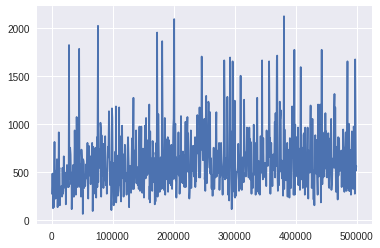

In [15]:
from baselines.common import plot_util as pu
results = pu.load_results(log_dir)

import matplotlib.pyplot as plt
import numpy as np
r = results[0]
# plt.ylim(0, .75)
plt.plot(np.cumsum(r.monitor.l), r.monitor.r)
# plt.plot(np.cumsum(r.monitor.l), pu.smooth(r.monitor.r, radius=100))

In [16]:
import numpy as np 

observation = wrapped_env.reset()
state = np.zeros((1, 2*128))
dones = np.zeros((1))

frames = []
cumulated_reward = 0

for t in range(1000):
    frames.append(wrapped_env.render(mode = 'rgb_array'))
    actions, _, state, _ = model.step(observation, S=state, M=dones)
    observation, reward, done, info = wrapped_env.step(actions)
    cumulated_reward += reward
    if done:
        print("Episode finished after {} timesteps, accumulated reward = {}".format(t+1, cumulated_reward))
        break
wrapped_env.close()

Episode finished after 563 timesteps, accumulated reward = [580.]



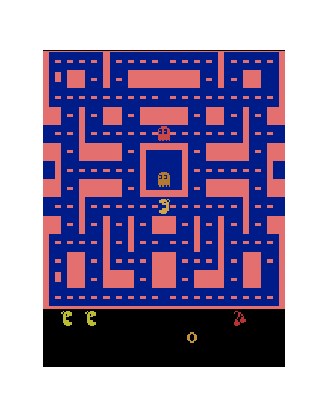
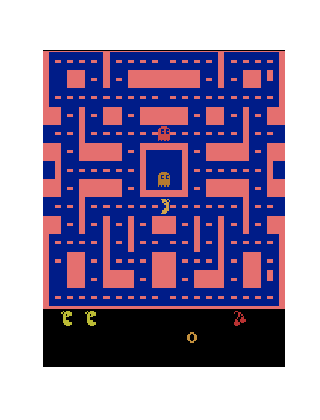
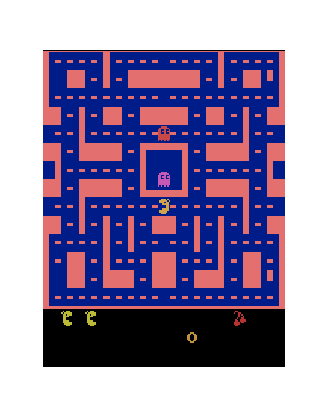
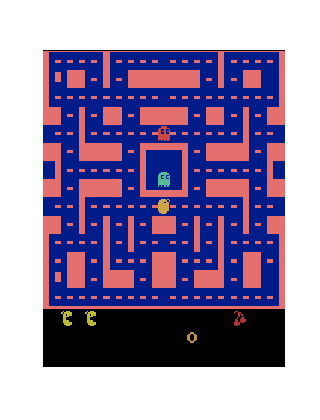
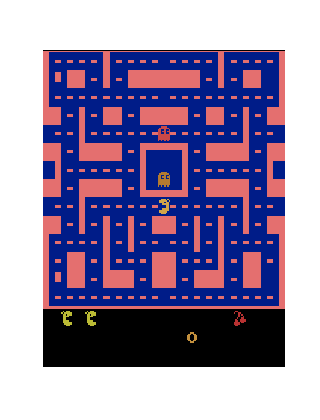
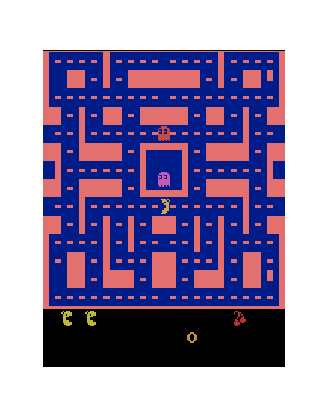
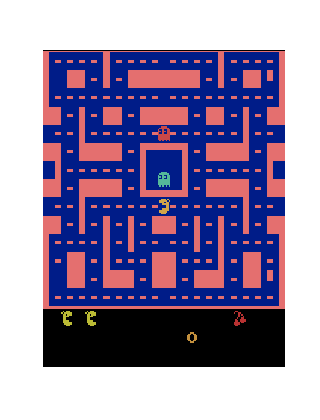
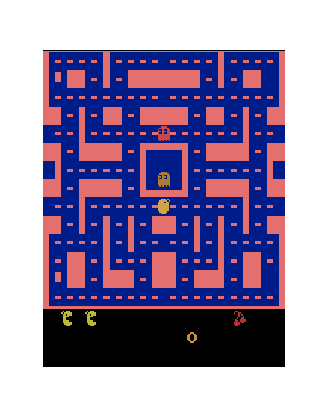
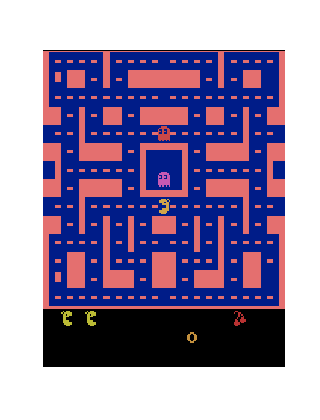
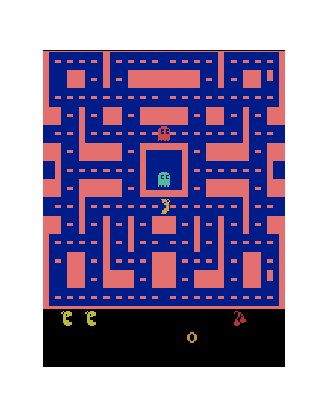
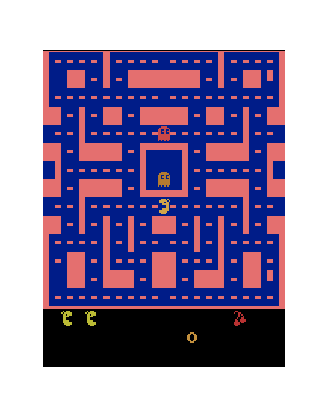
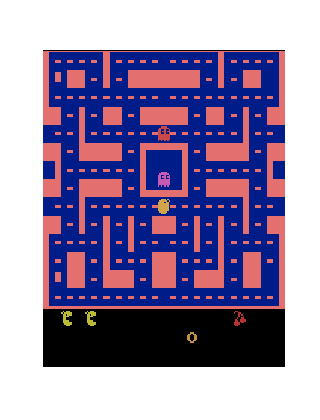
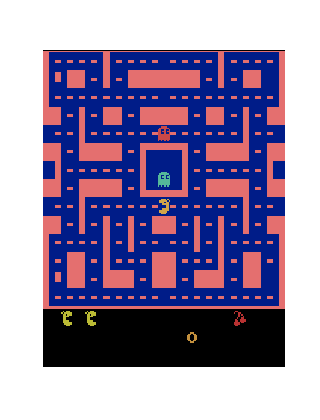
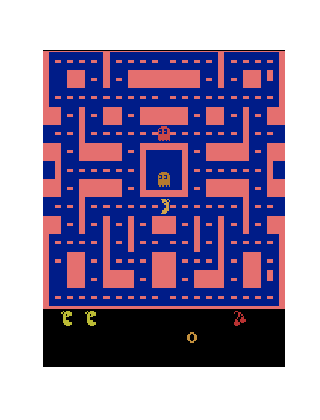
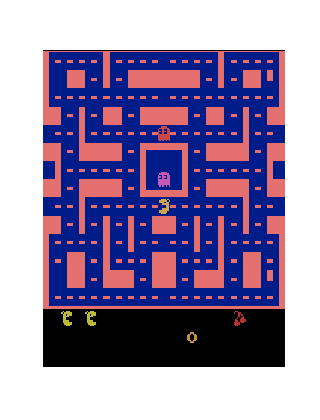
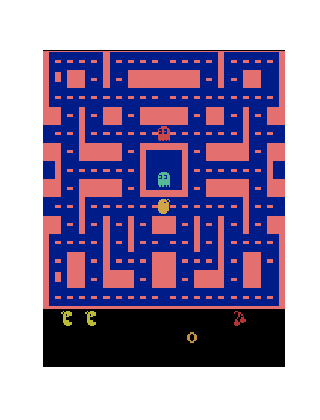
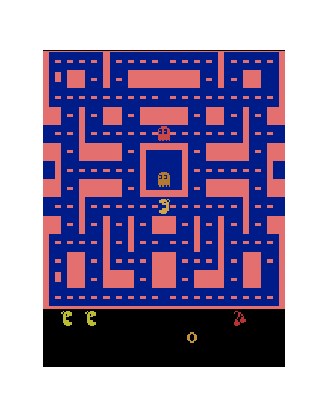
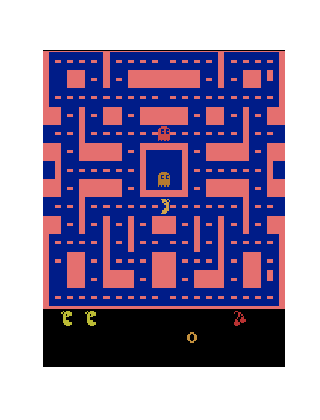
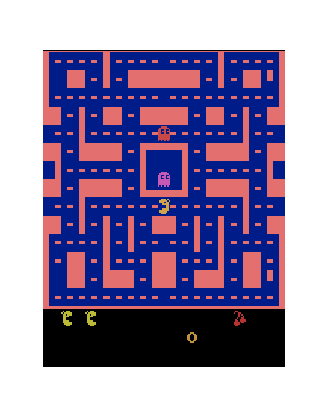
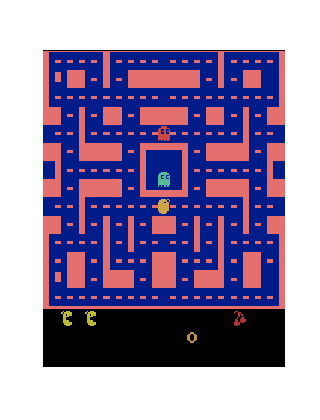
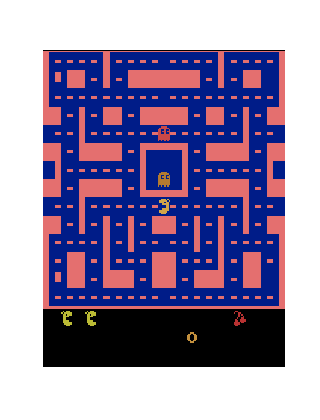
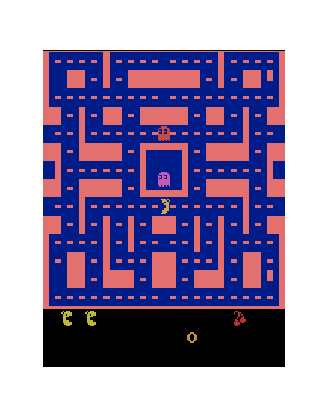
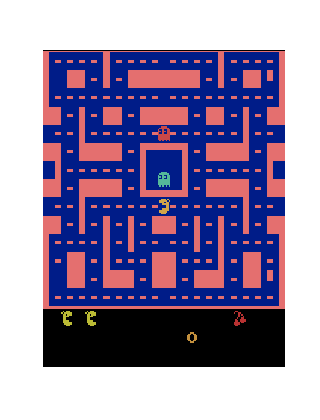
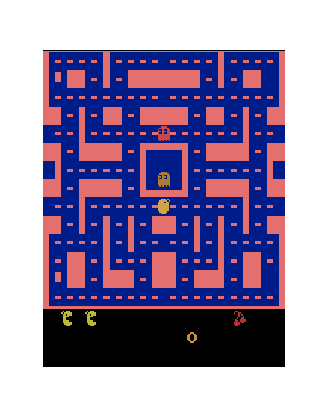
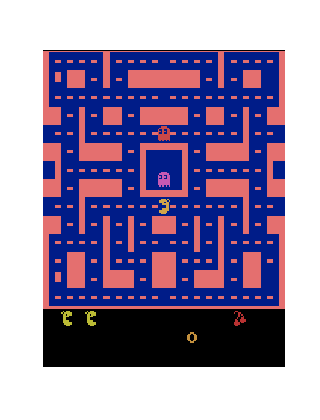
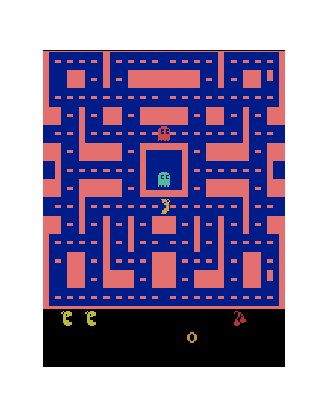
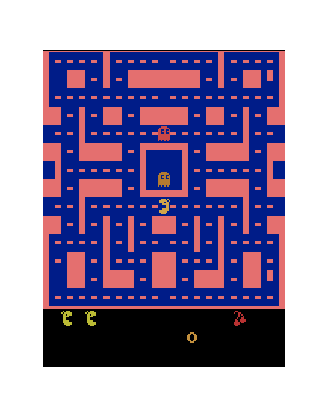
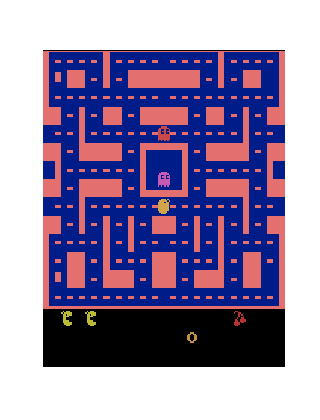
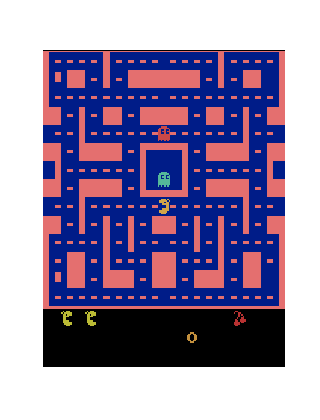
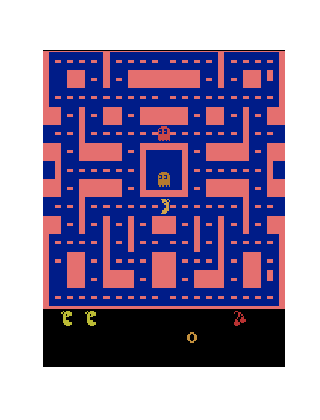
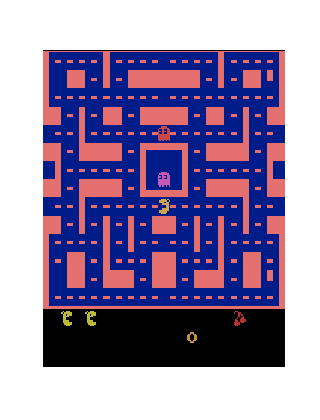
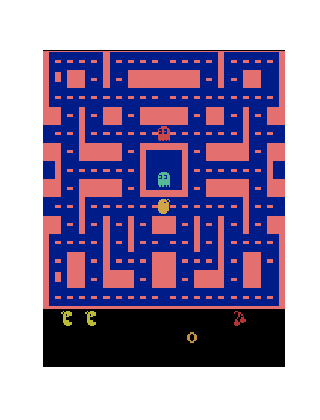
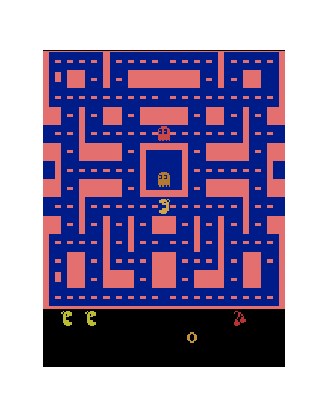
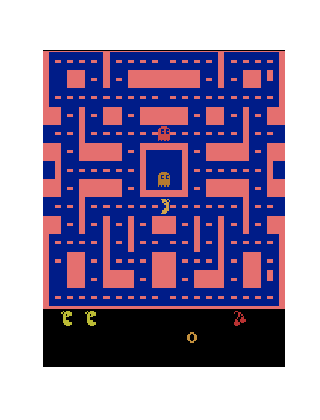
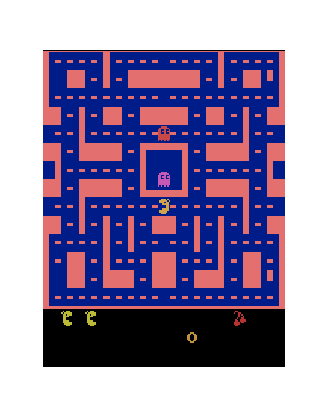
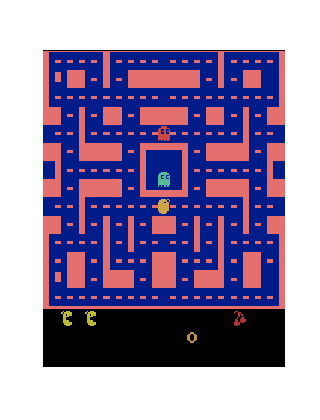
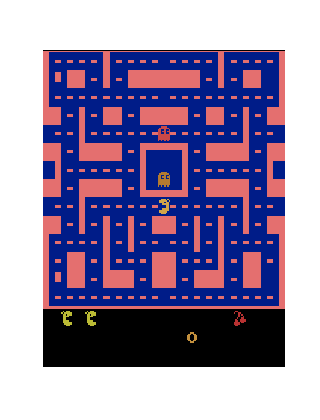
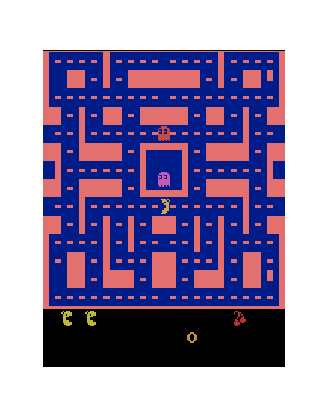
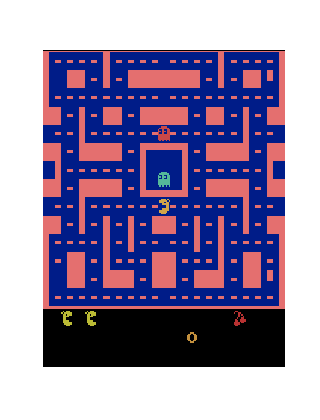
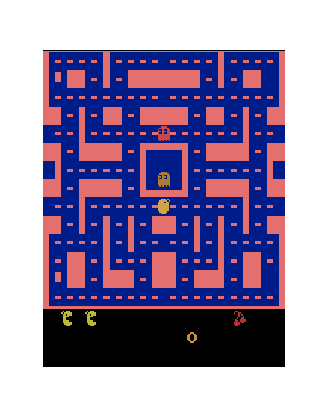
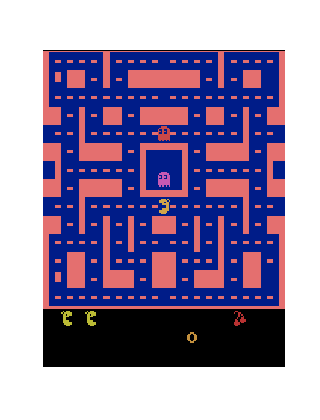
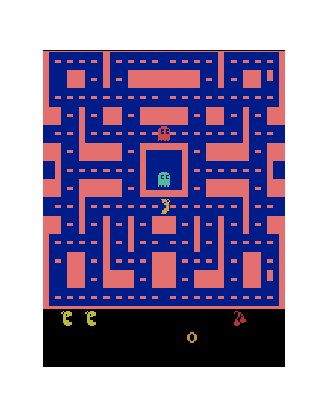
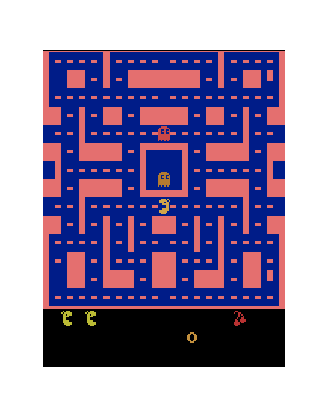
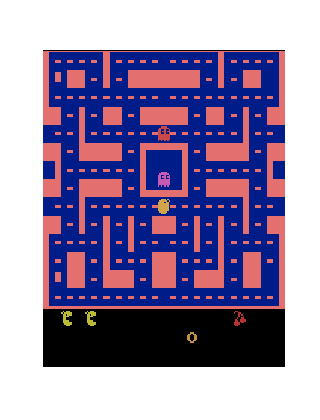
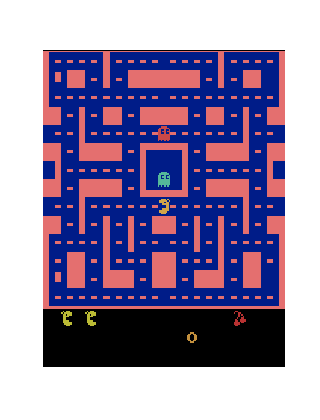
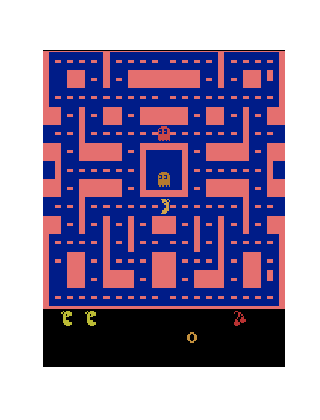
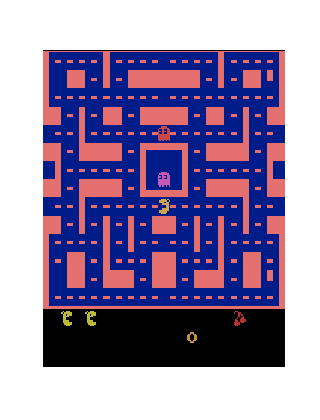
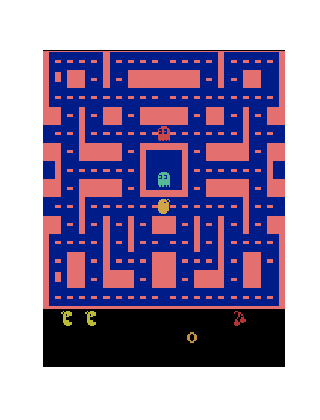
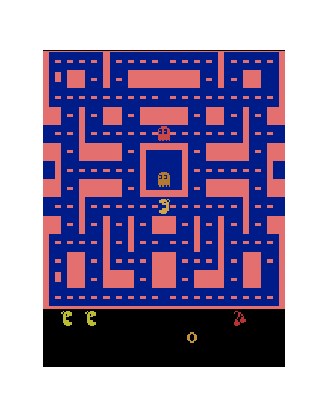
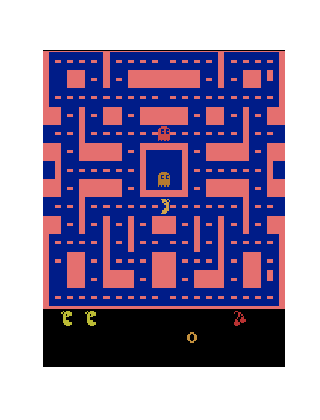
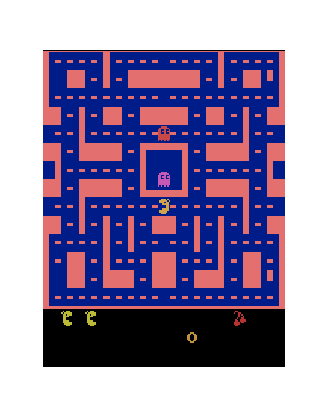
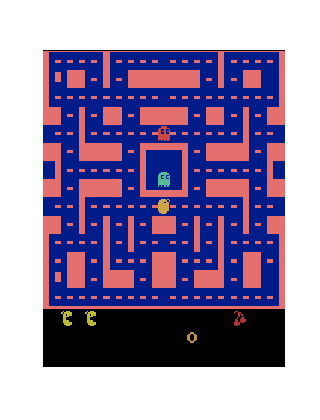
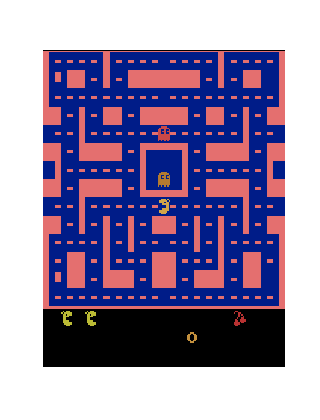
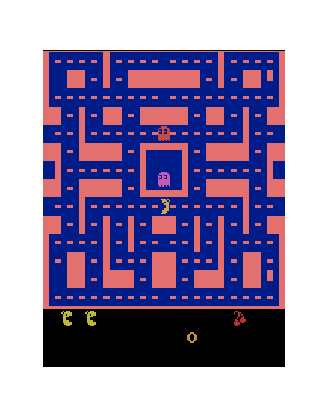
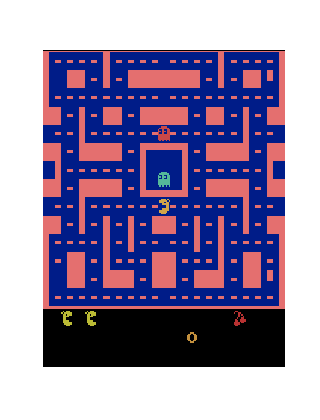
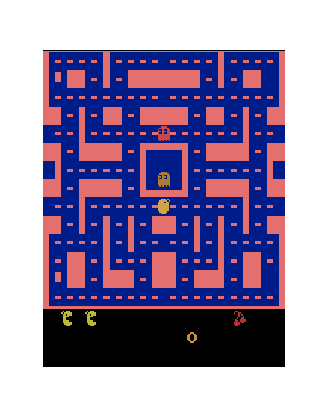
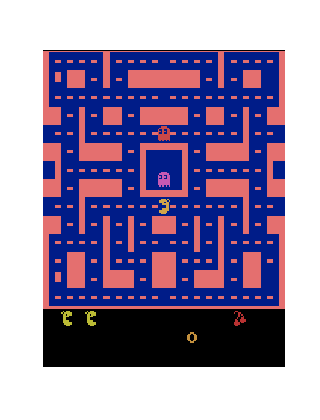
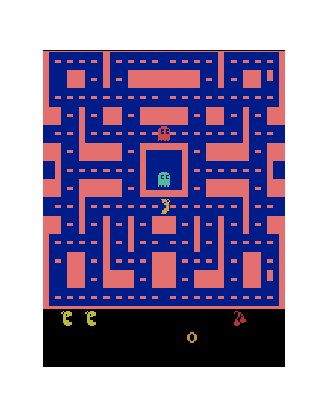
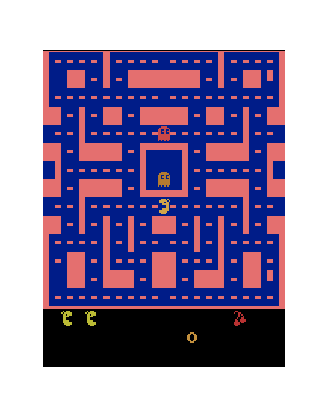
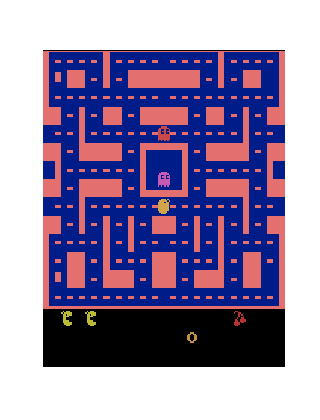
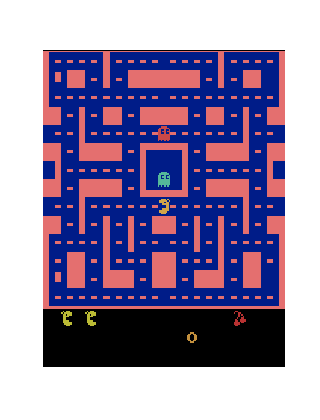
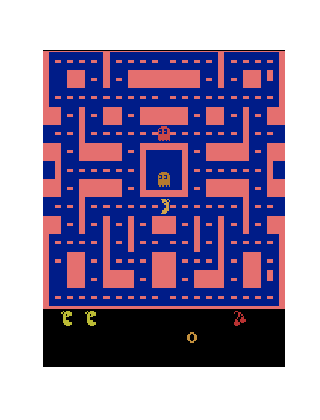
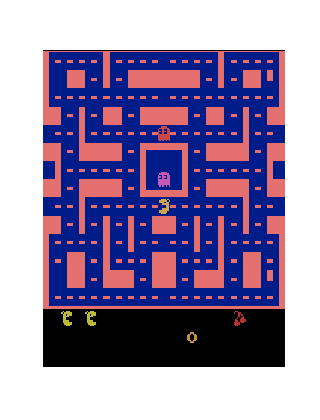
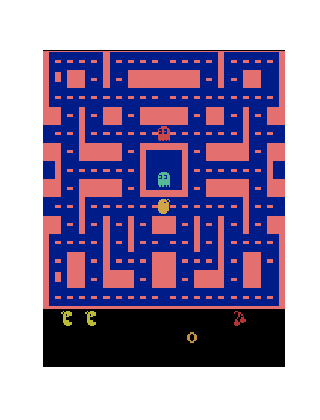
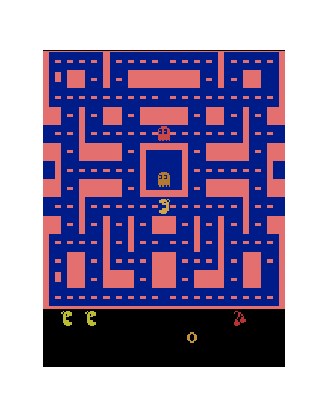
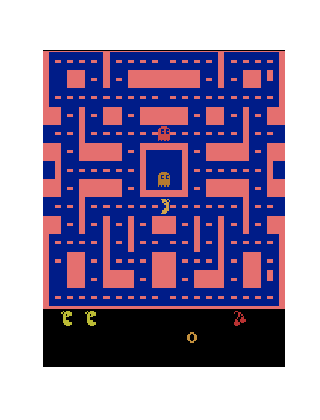
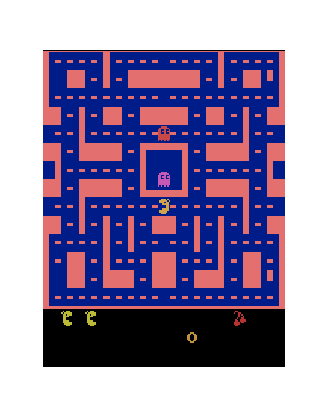
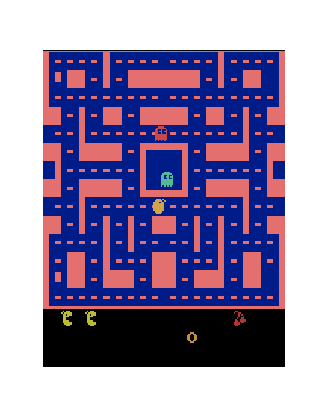
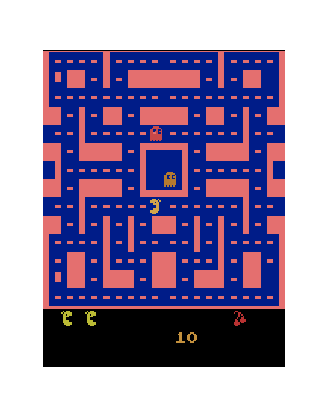
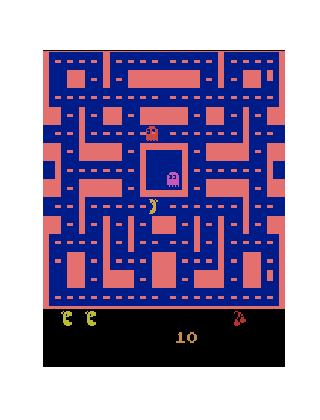
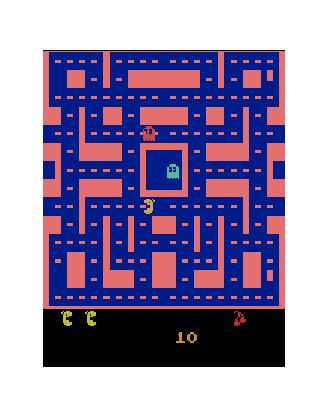
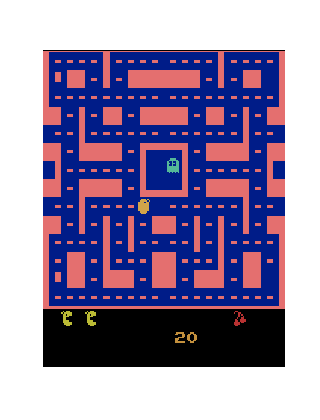
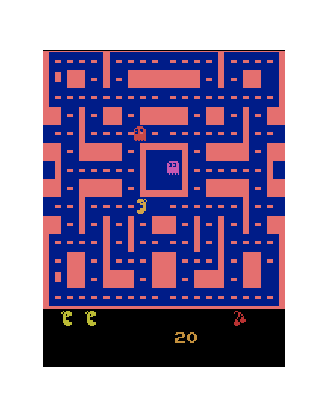
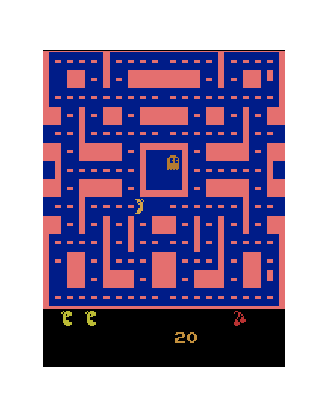
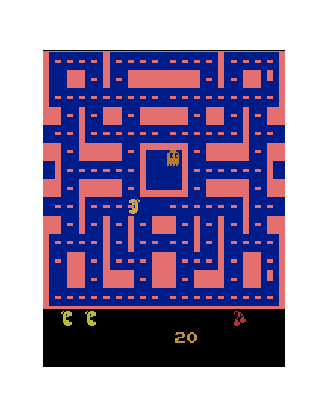
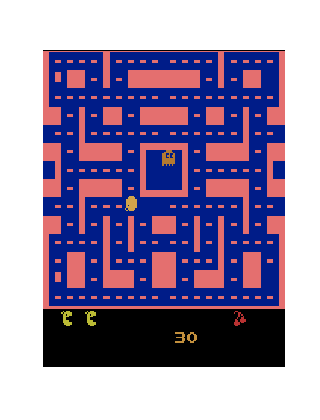
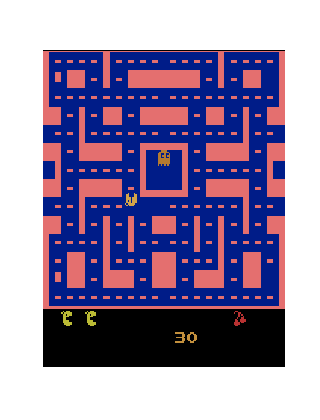
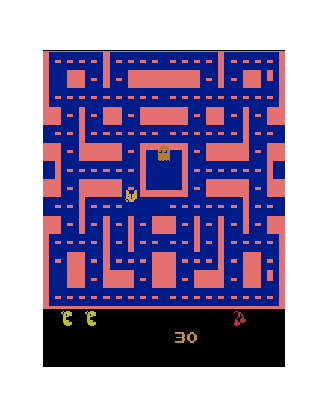
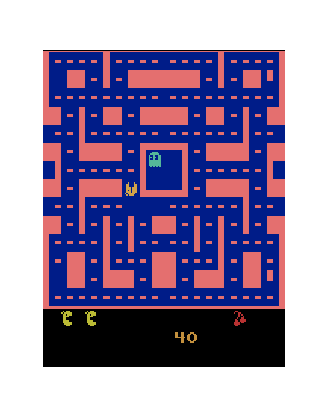
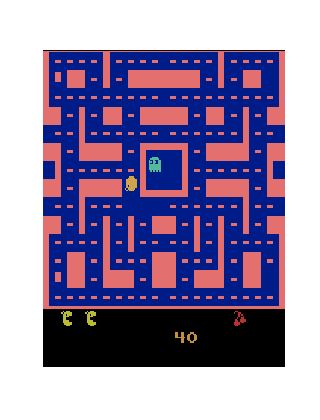
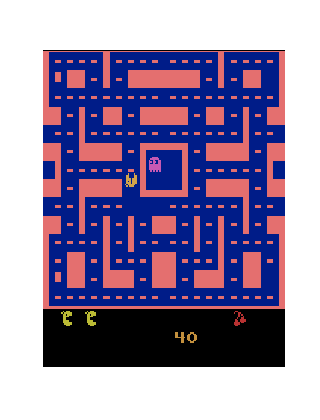
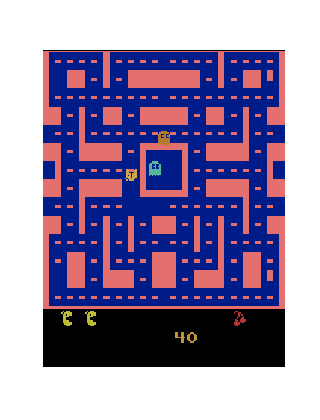
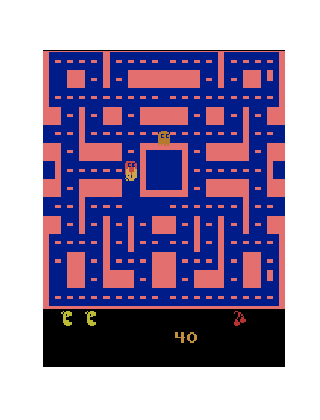
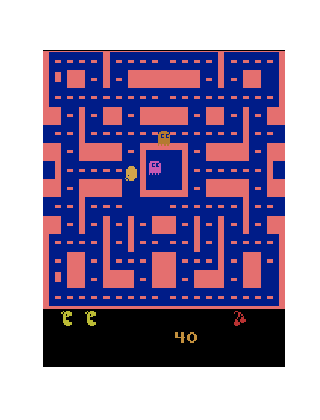
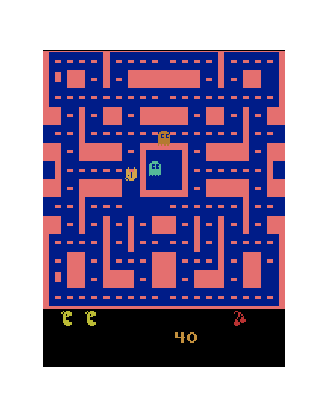
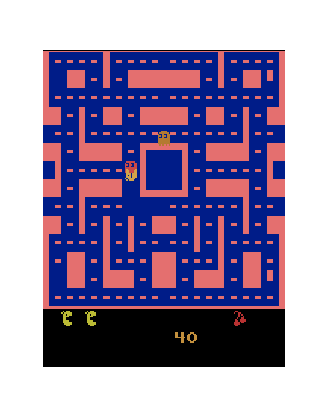
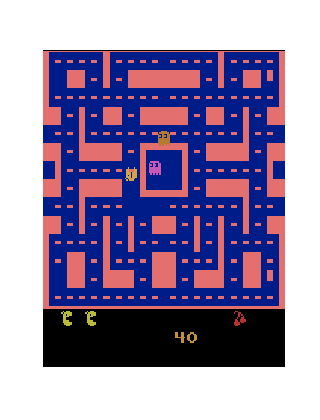
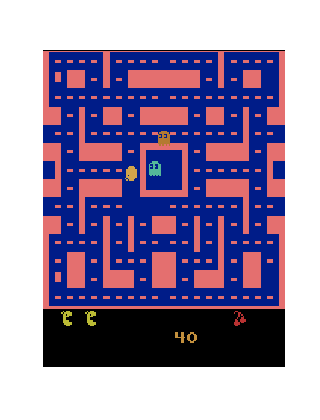
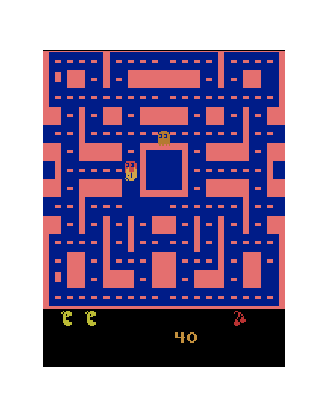
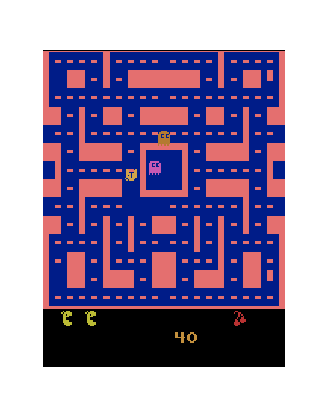
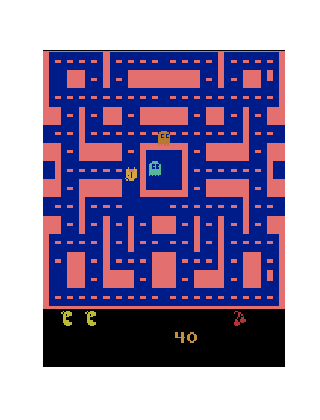
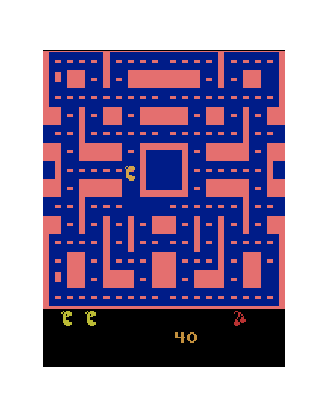
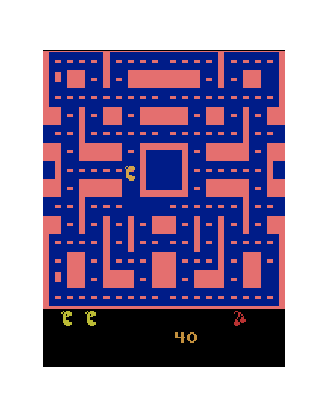
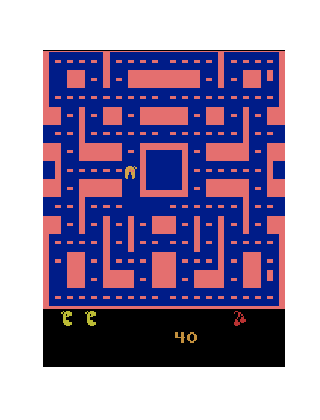
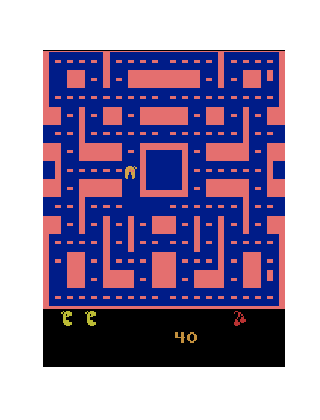
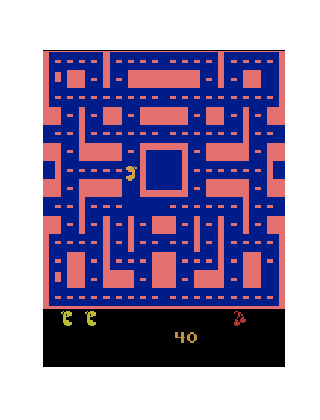
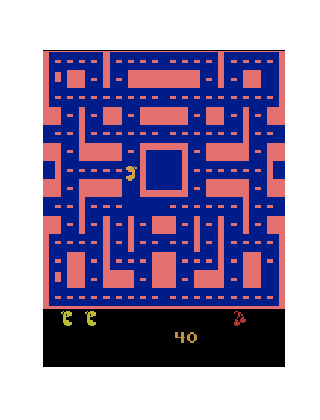
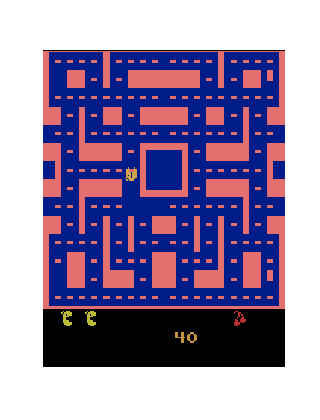
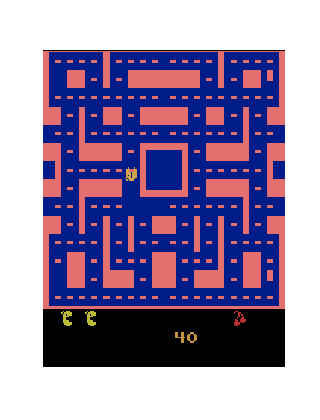
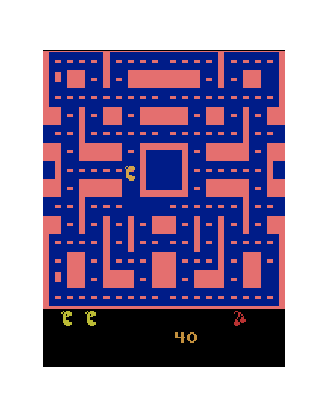
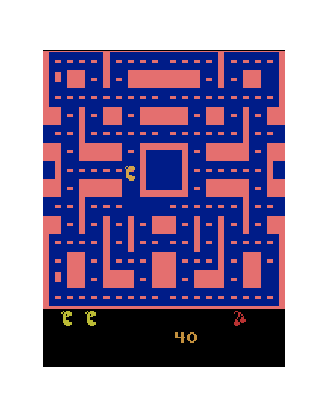
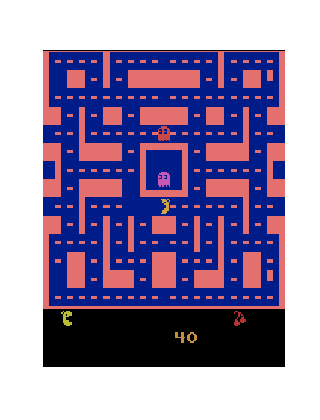
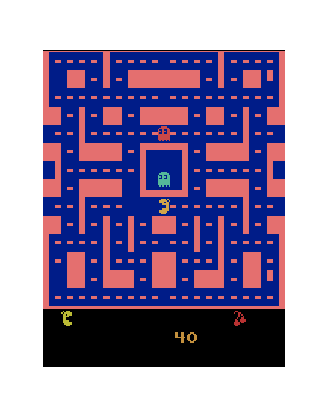
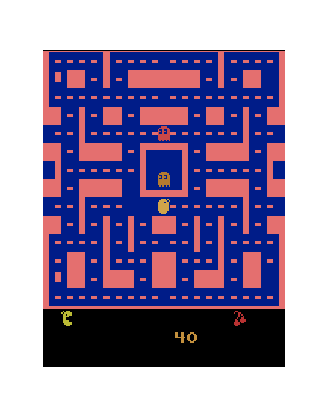
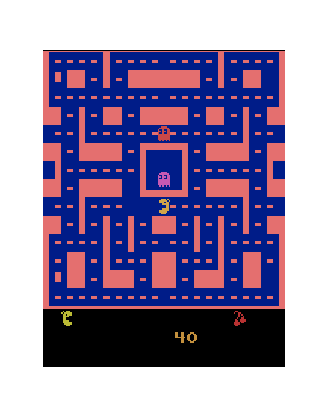
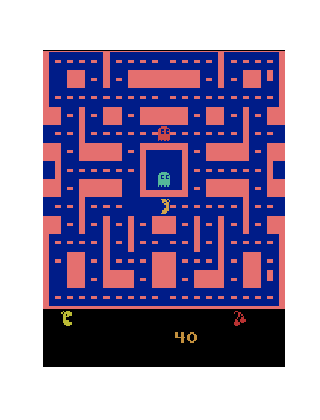
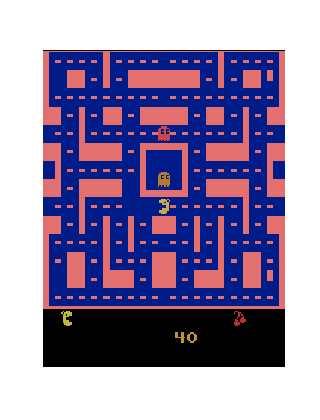
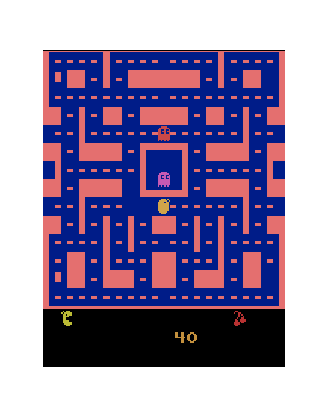
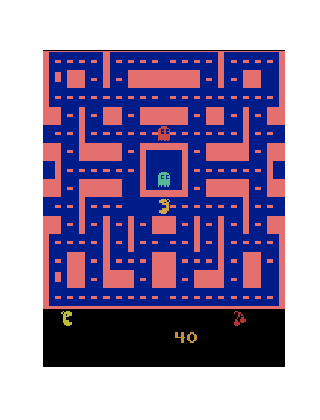
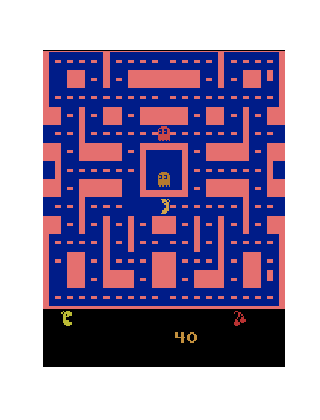
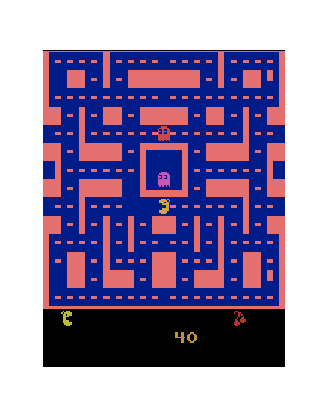
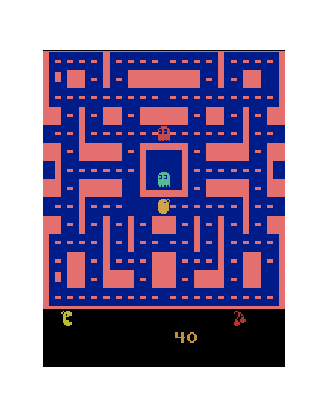
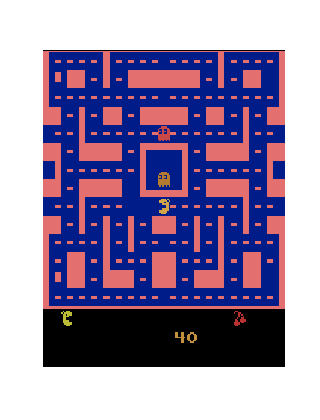
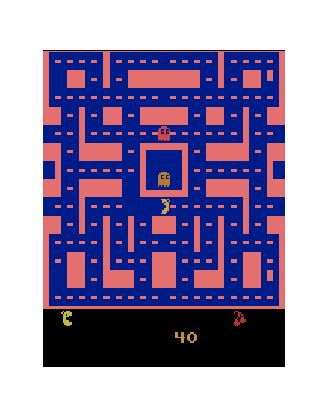
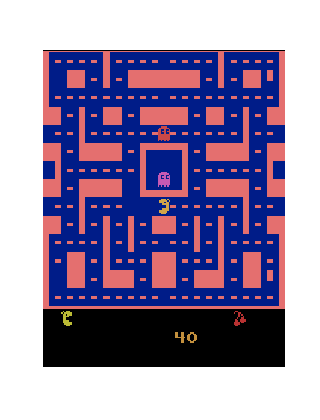
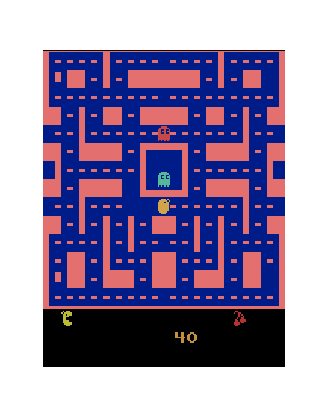
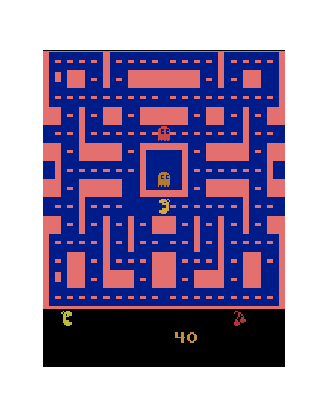
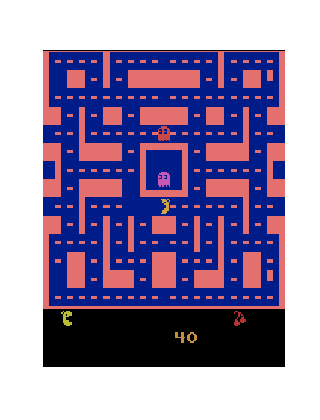
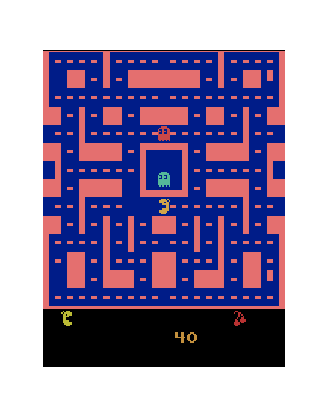
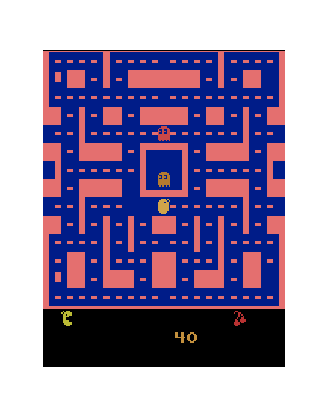
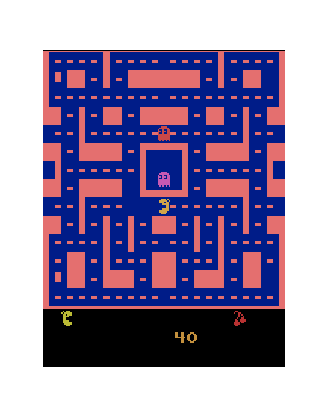
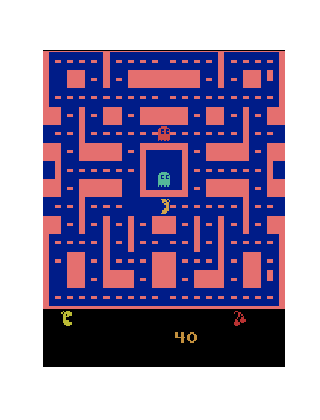
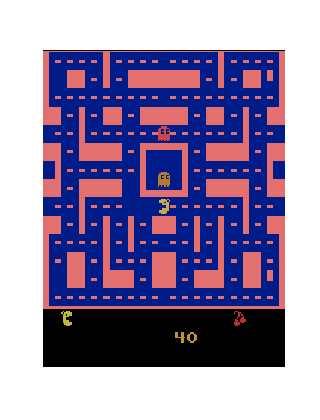
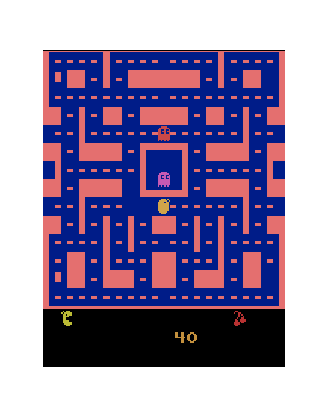
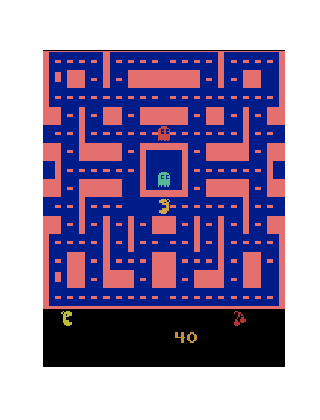
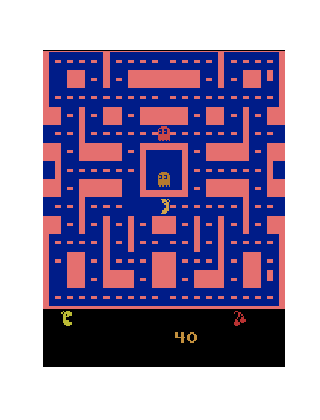
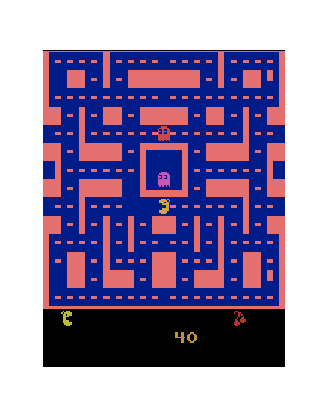
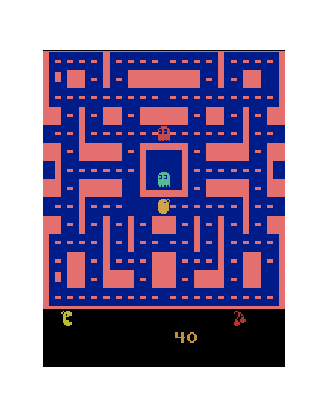
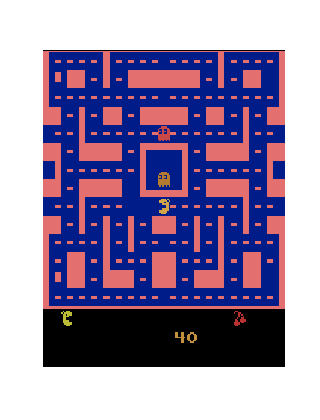
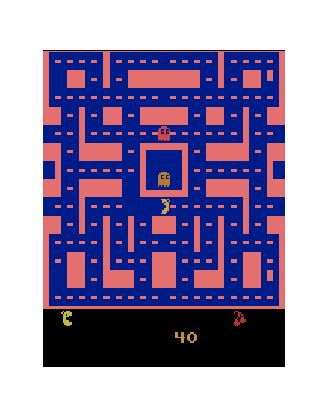
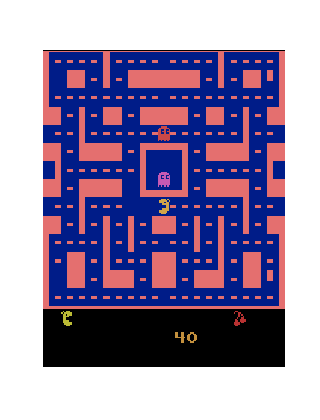
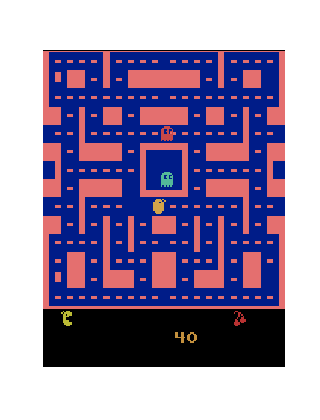
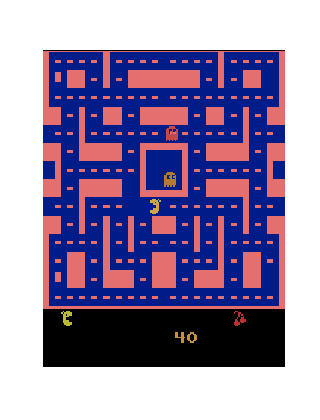
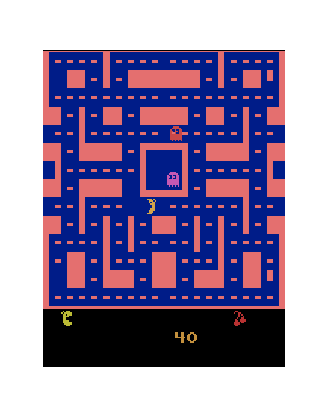
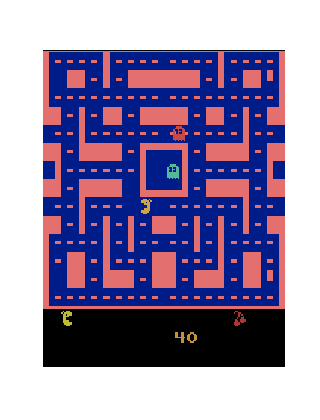
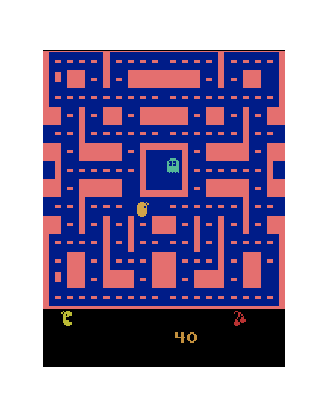
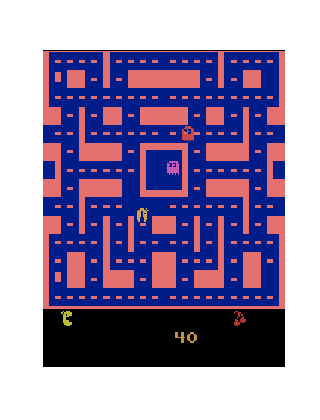
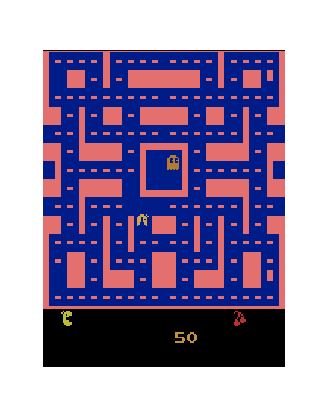
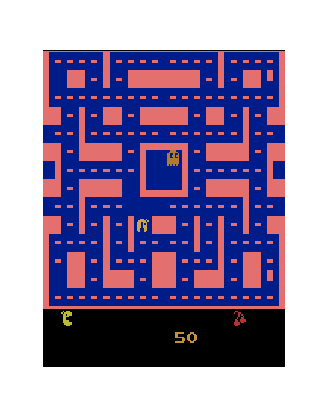
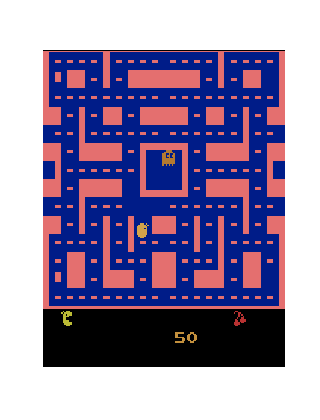
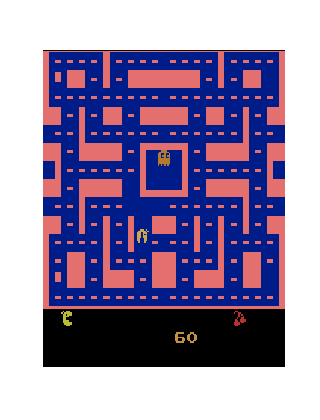
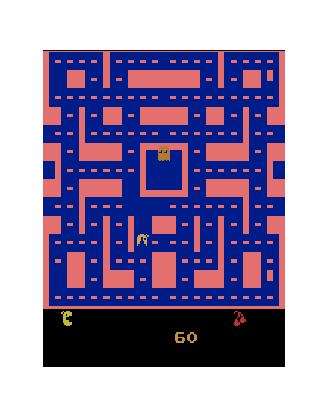
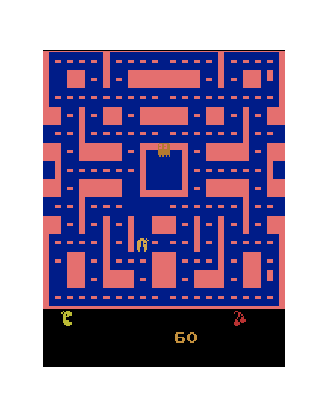
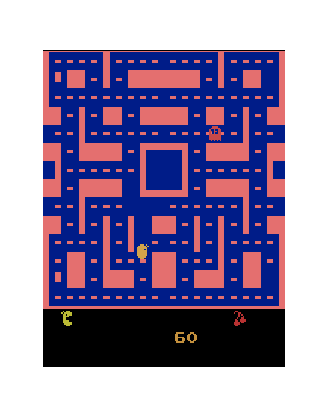
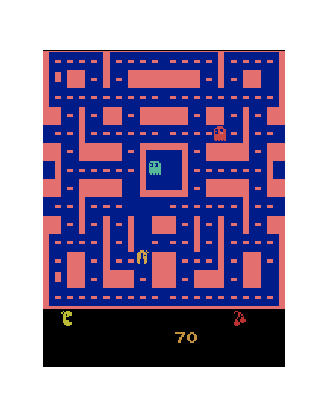
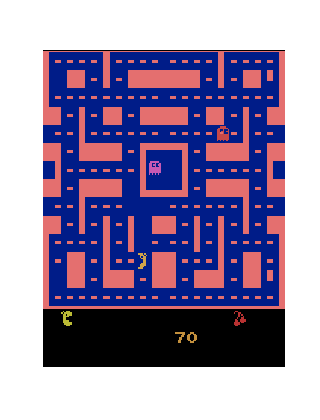
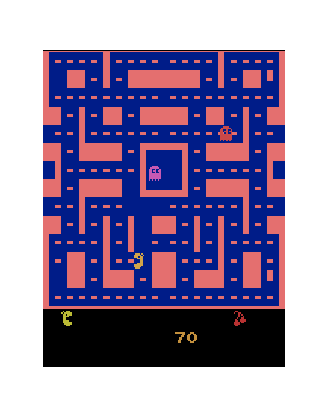
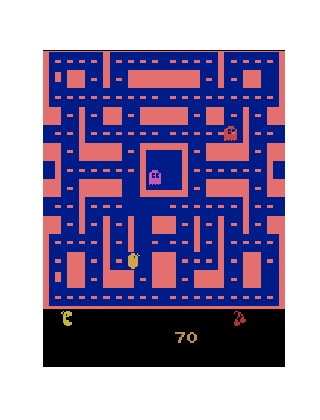
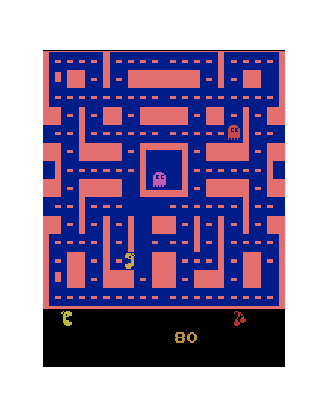
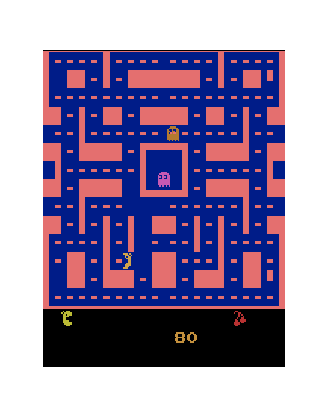
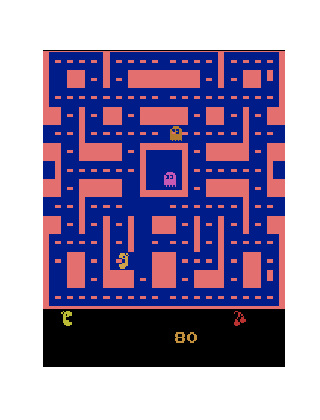
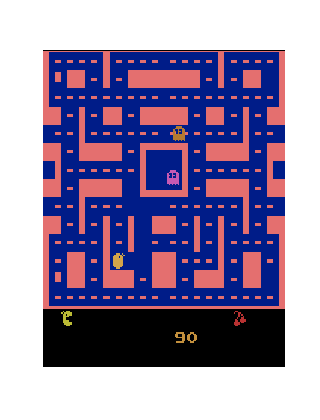
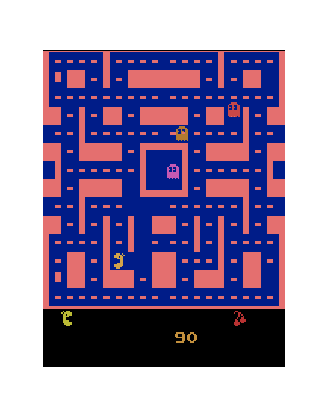
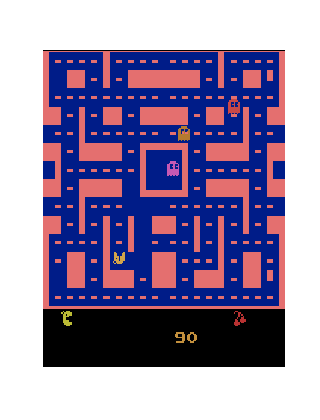
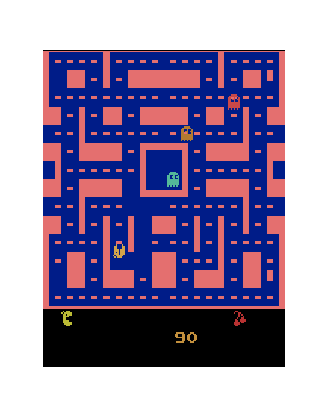
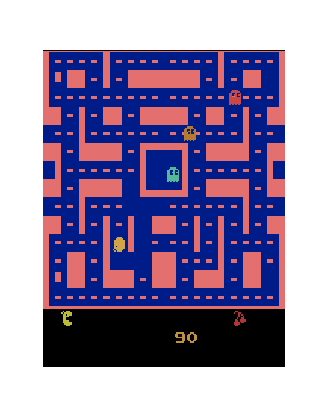
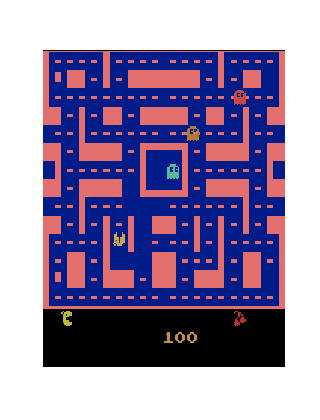
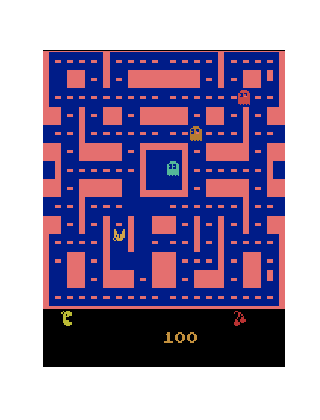
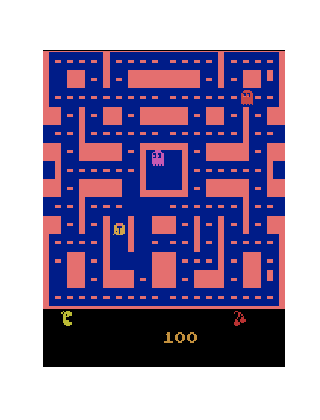
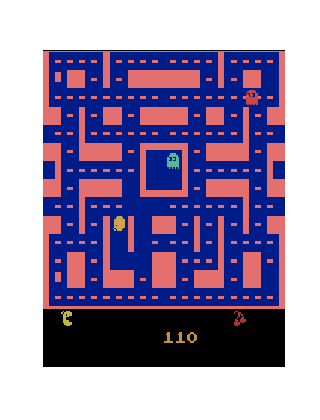
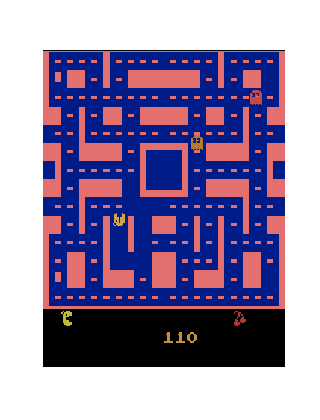
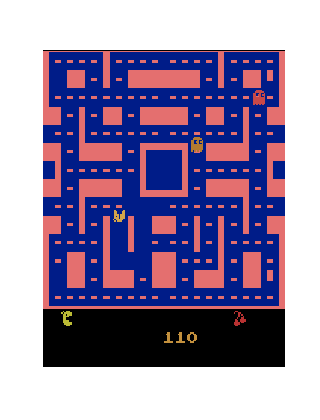
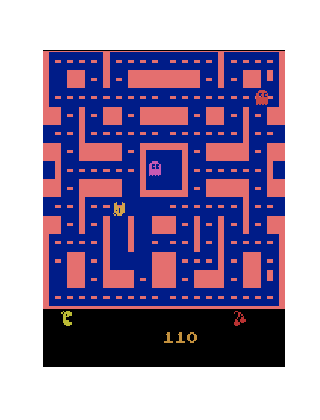
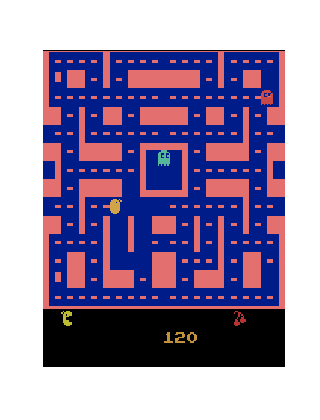
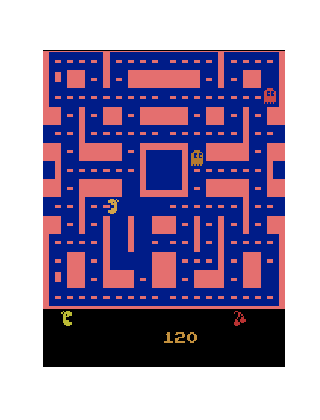
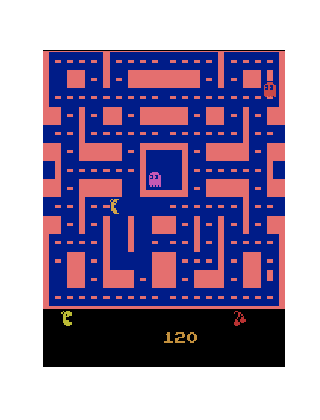
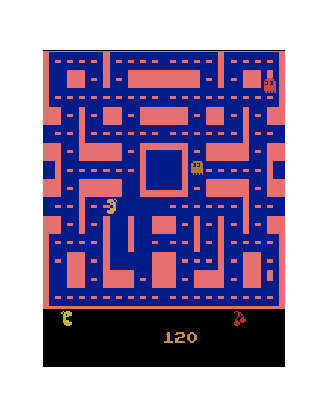
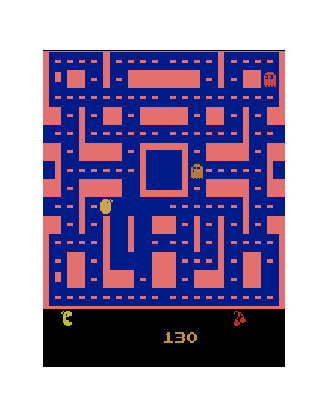
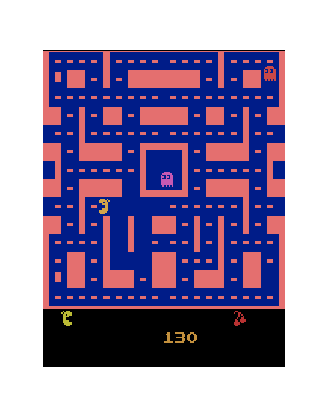
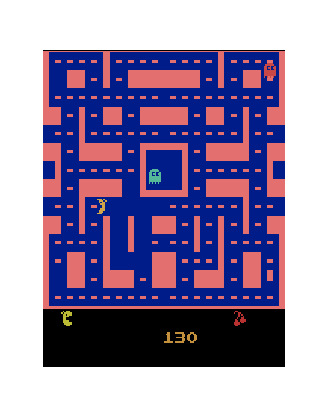
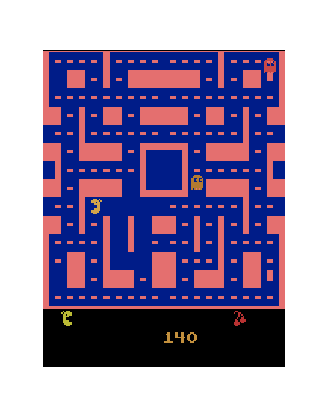
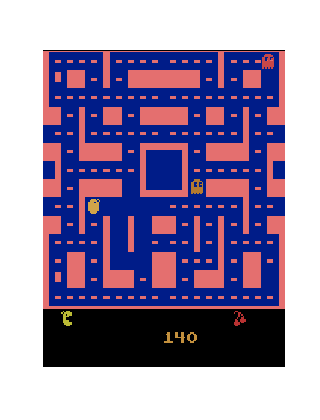
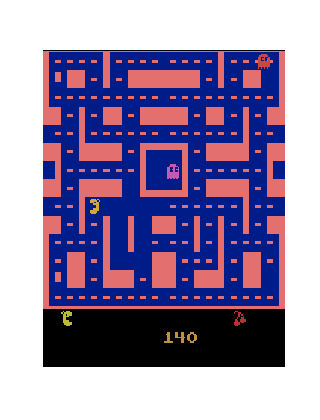
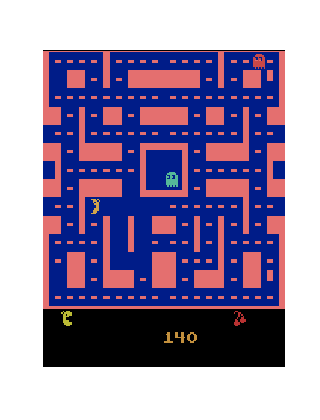
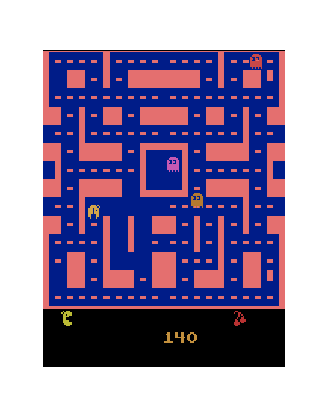
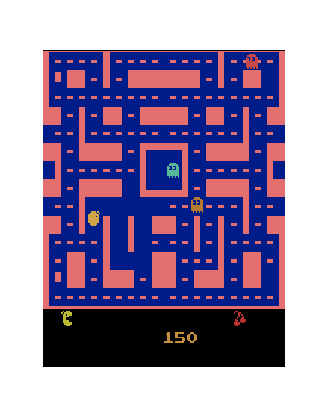
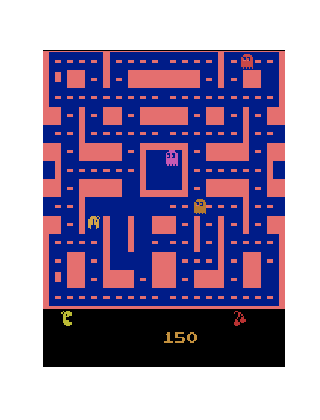
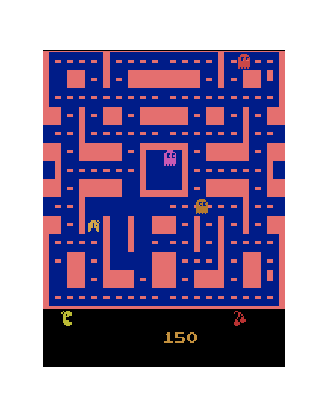
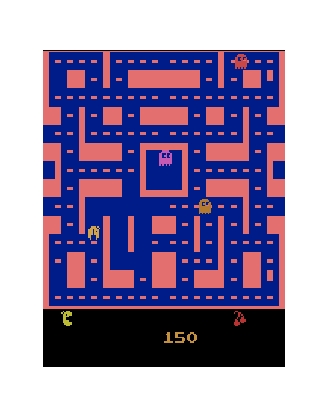
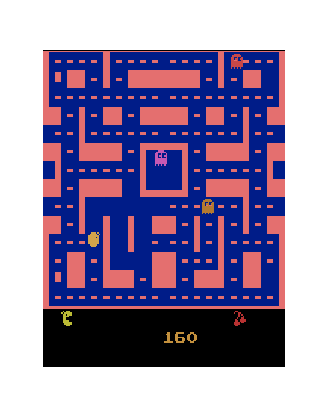
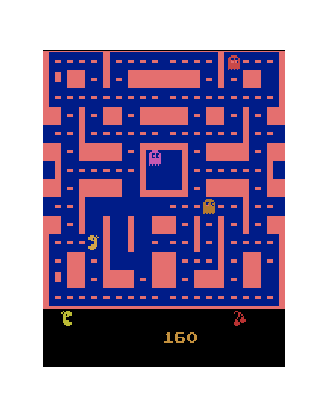
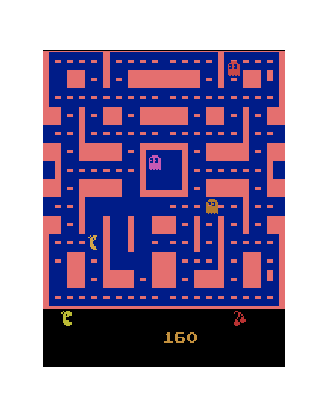
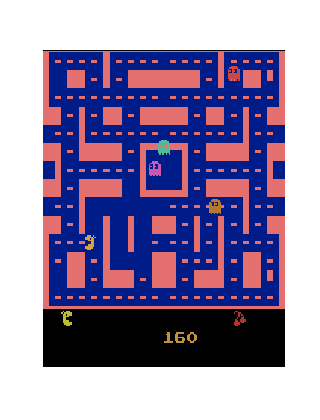
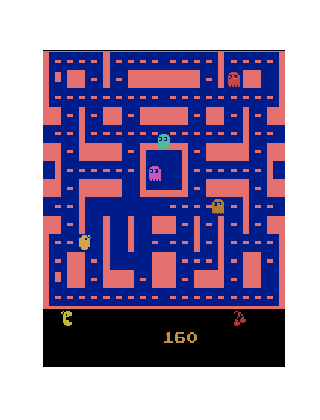
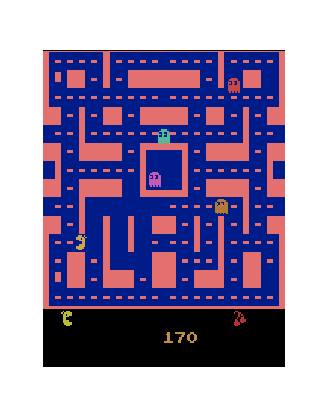
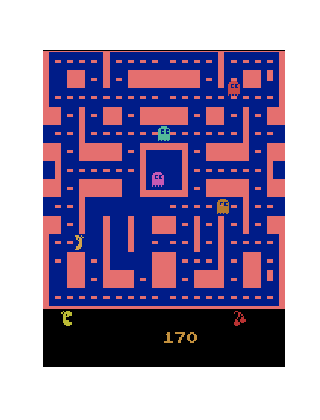
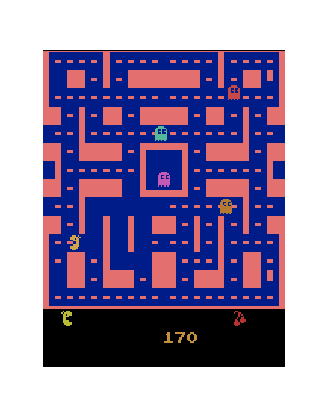
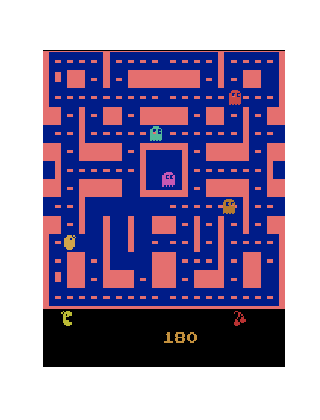
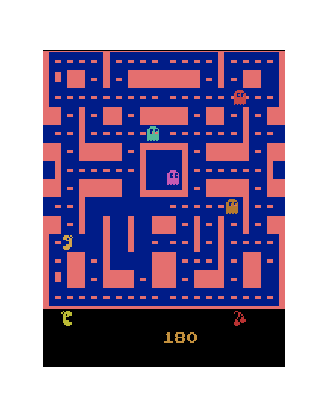
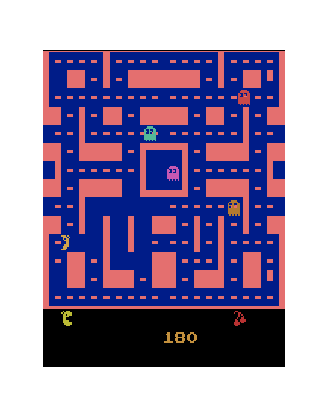
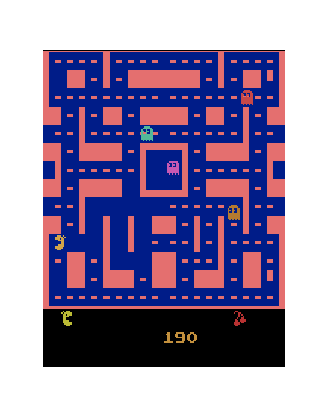
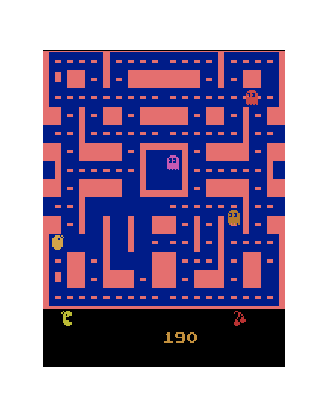
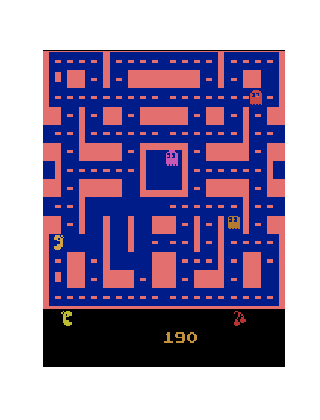
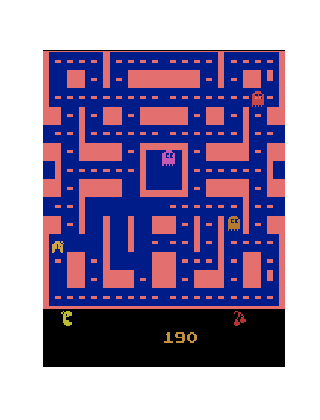
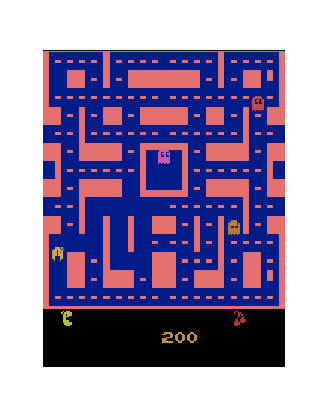
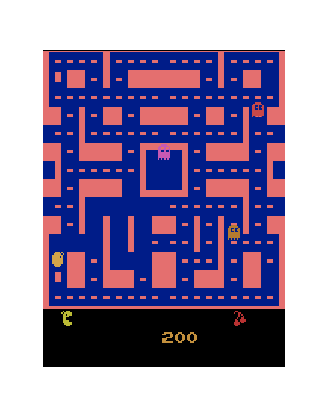
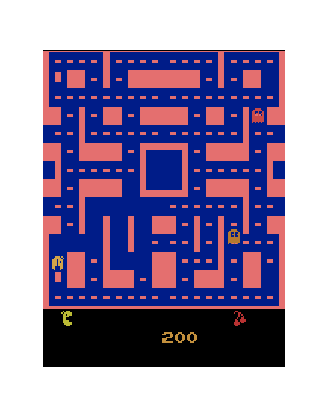
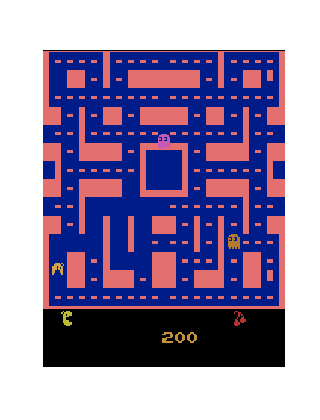
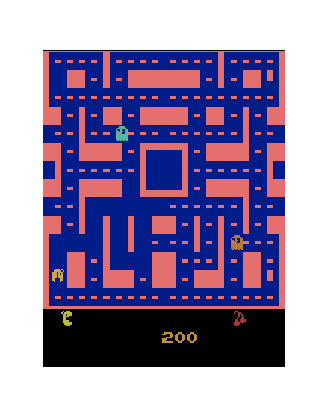
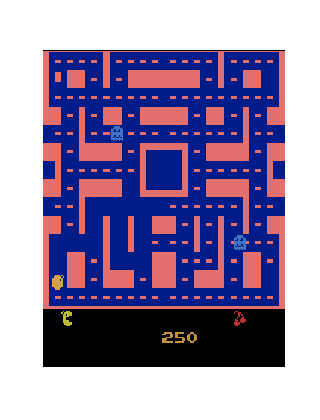
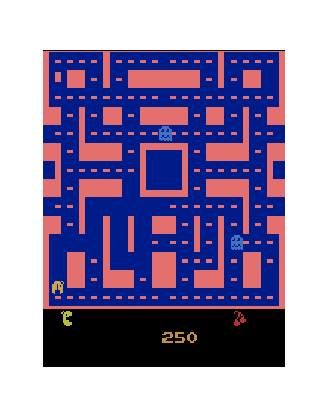
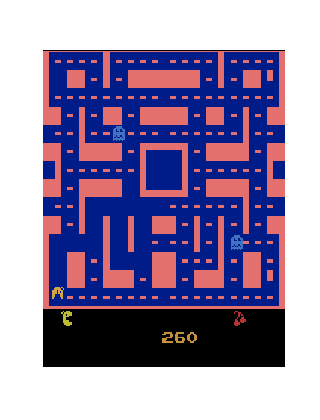
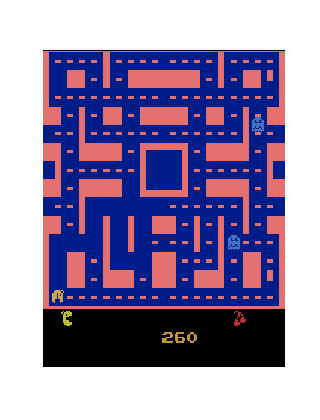
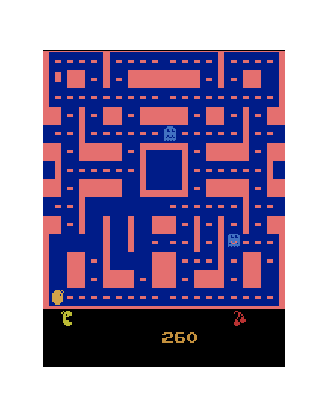
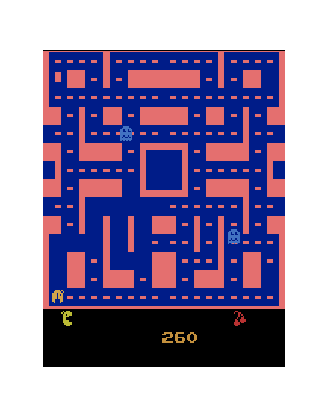
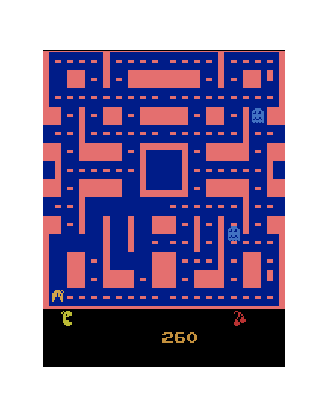
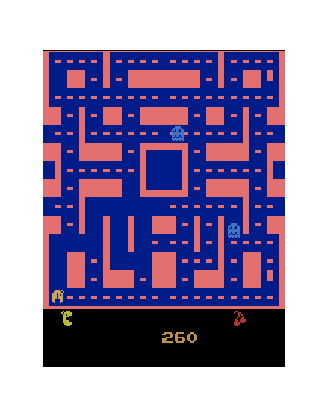
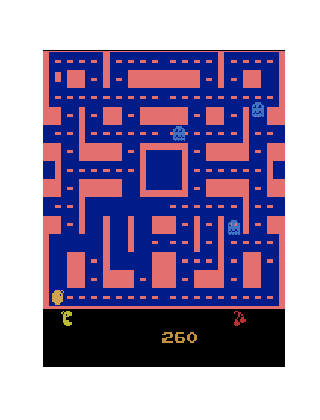
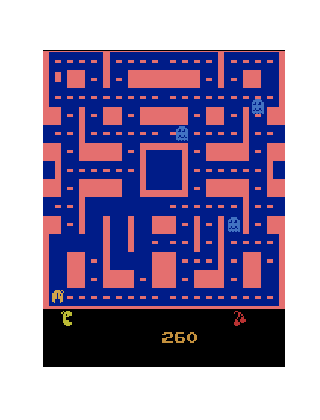
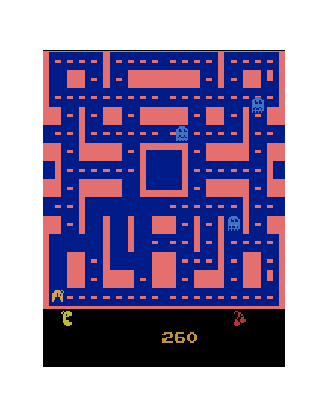
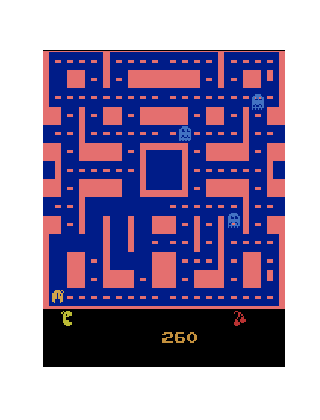
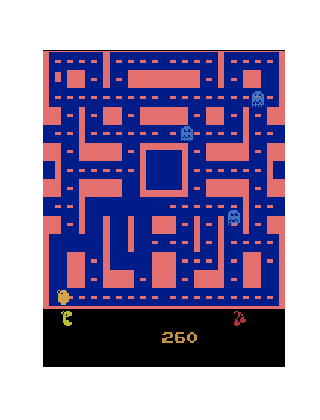
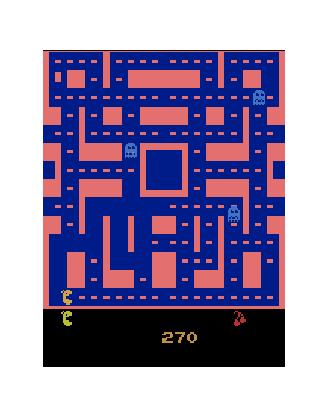
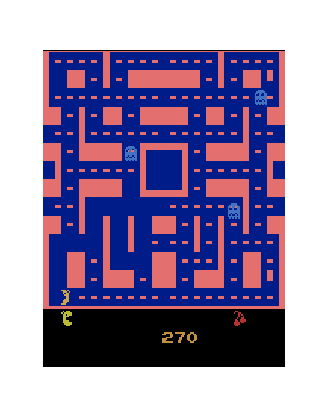
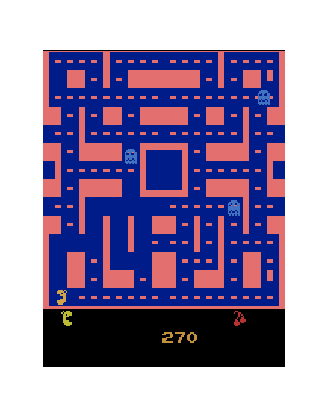
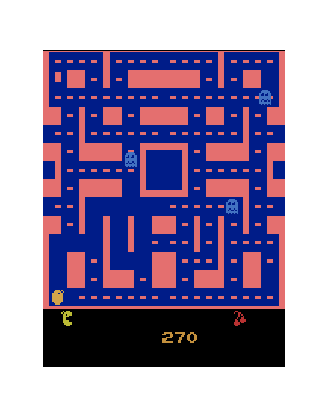
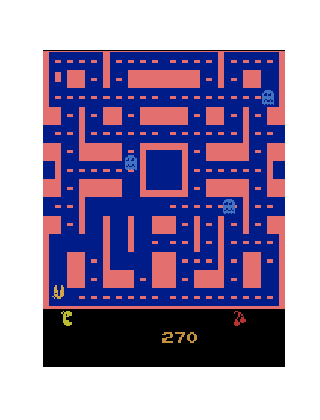
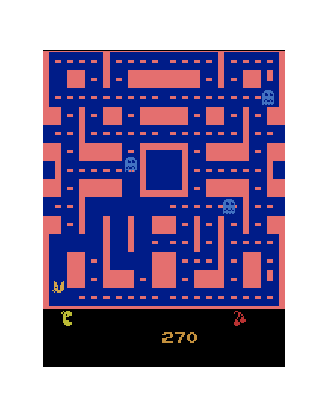
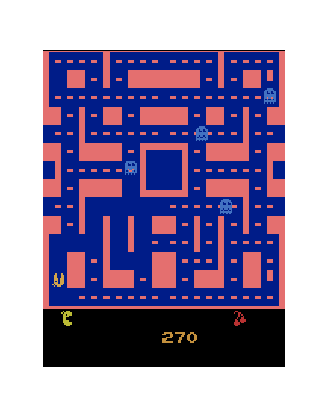
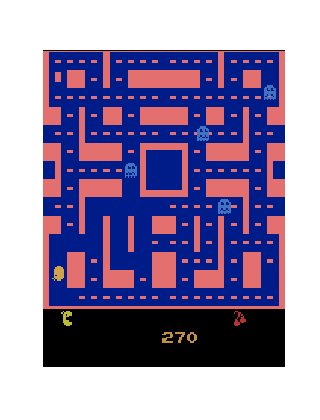
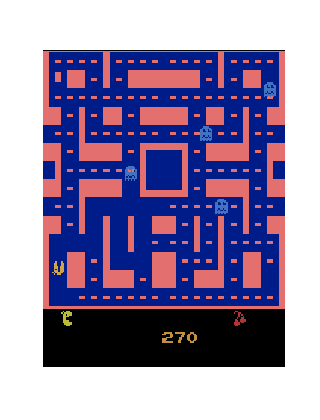
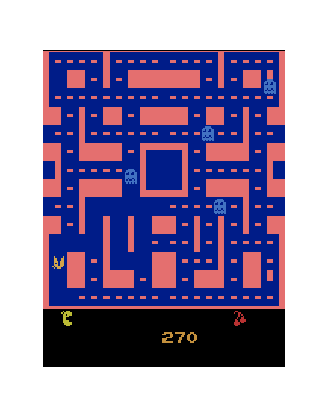
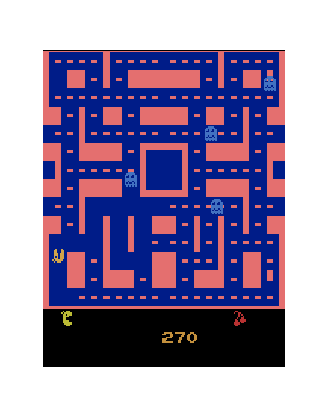
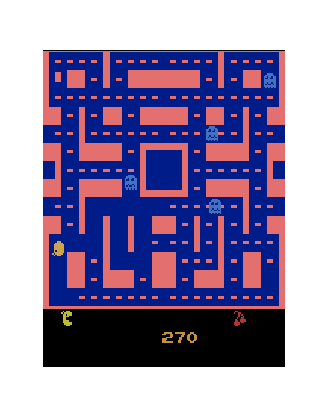
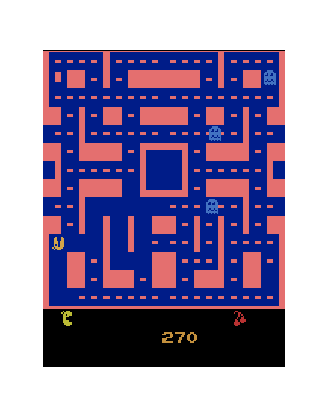
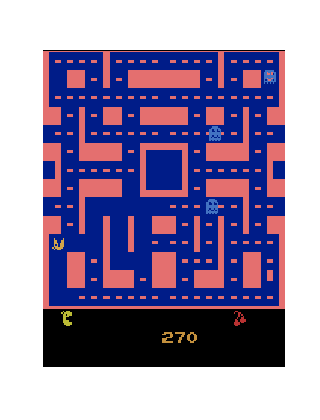
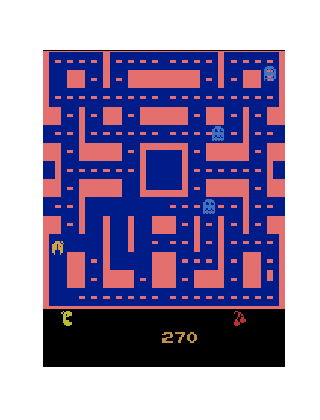
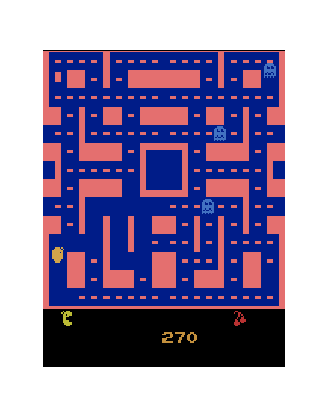
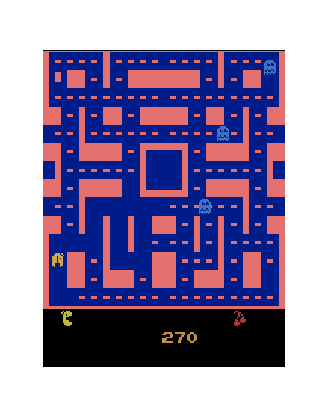
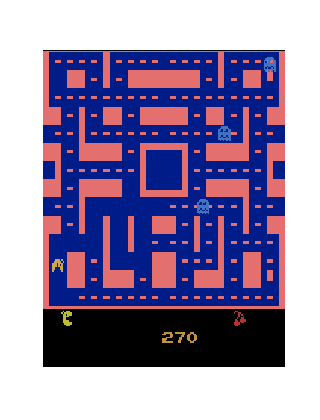
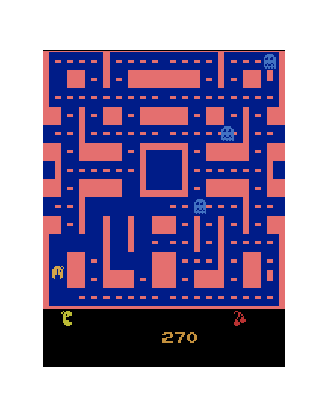
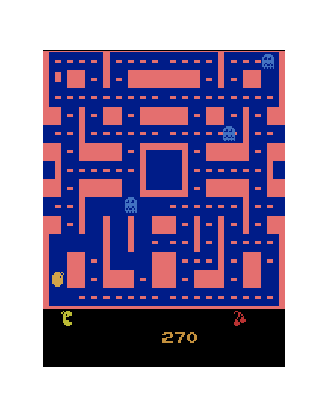
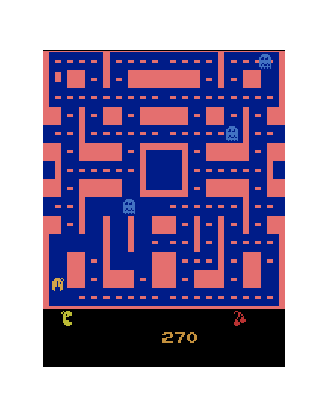
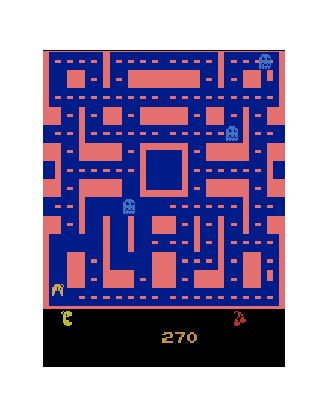
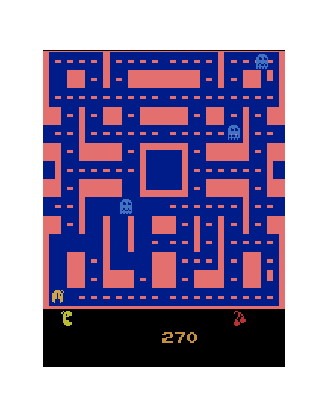
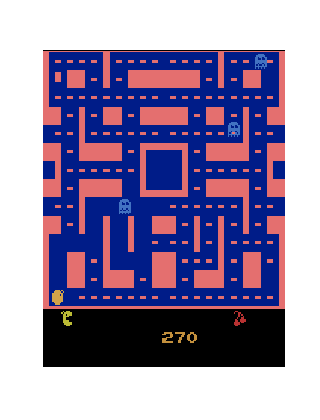
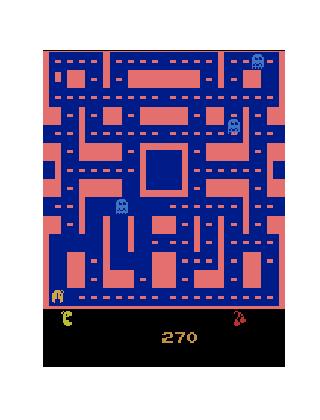
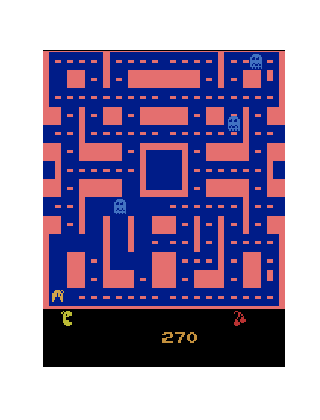
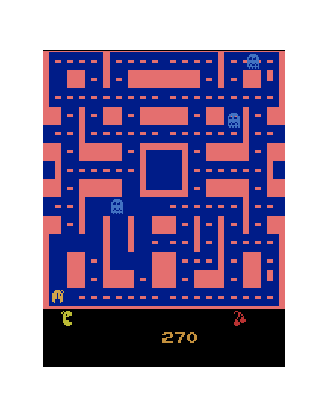
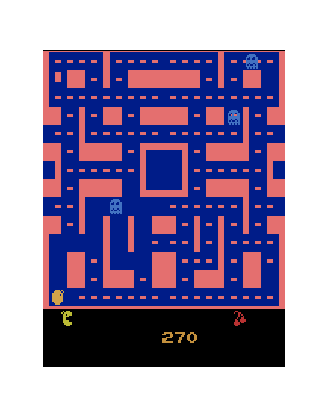
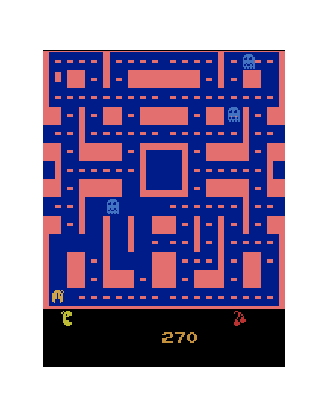
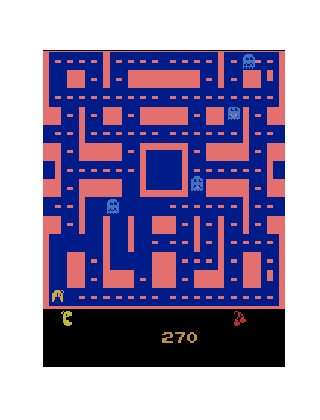
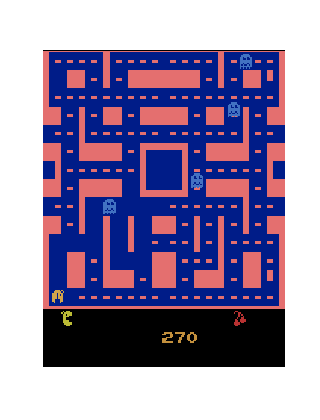
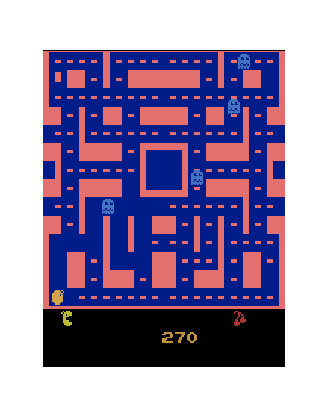
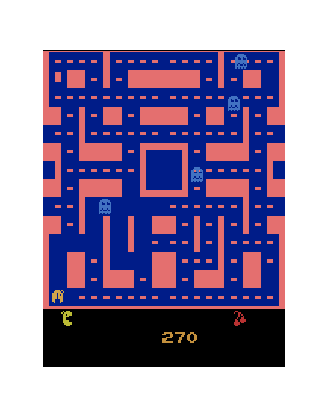
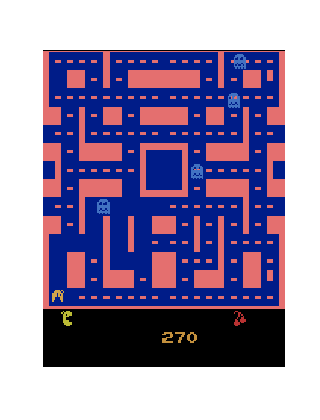
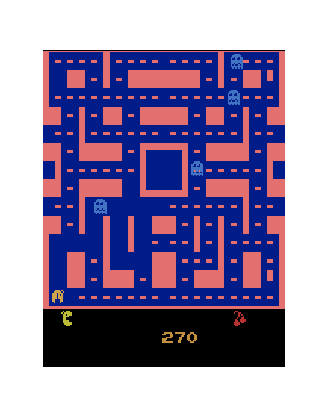
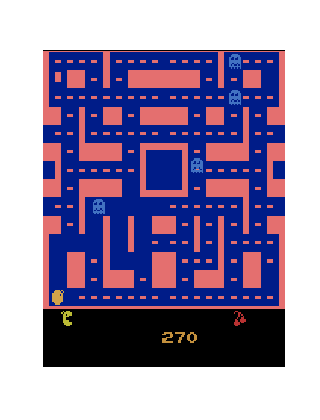
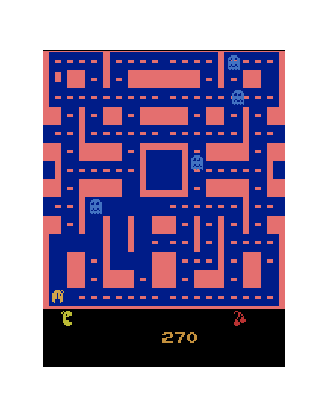
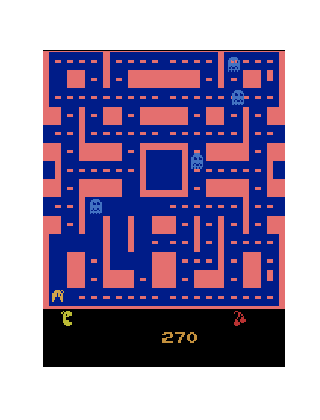
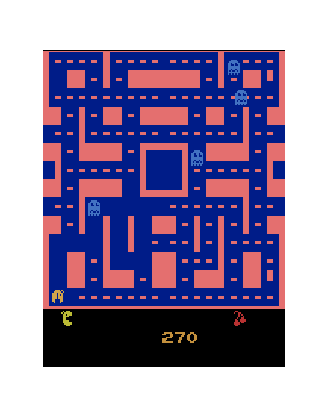
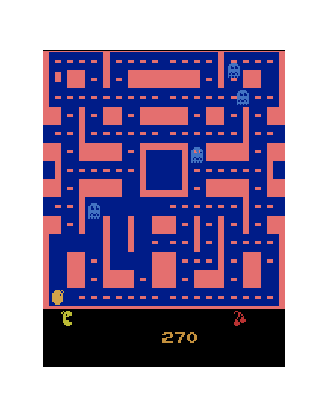
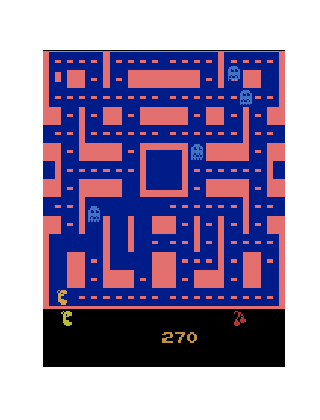
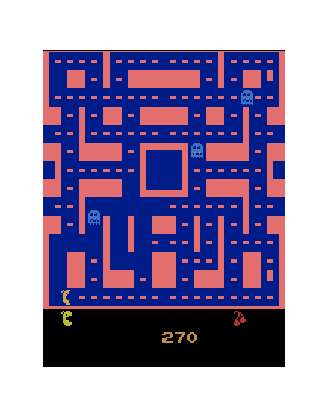
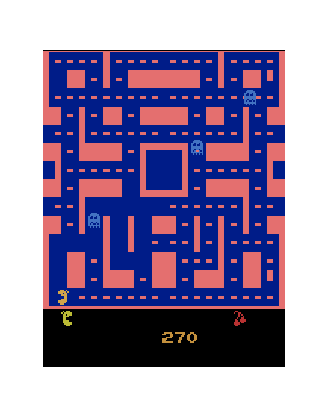
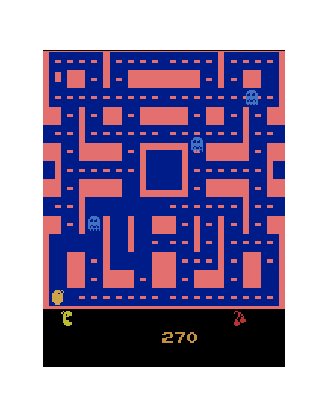
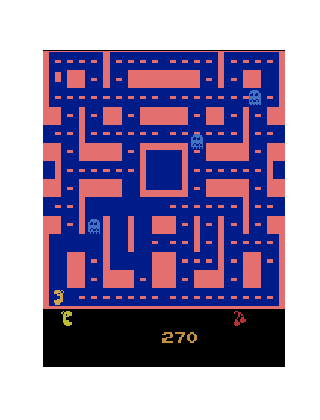
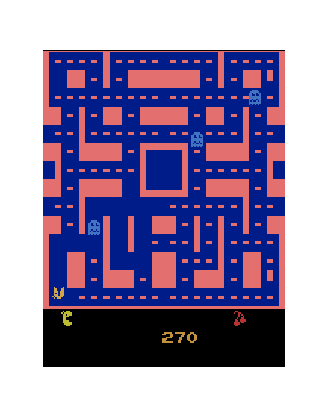
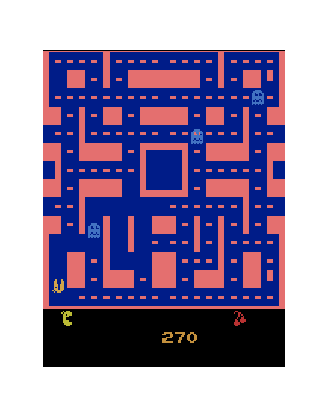
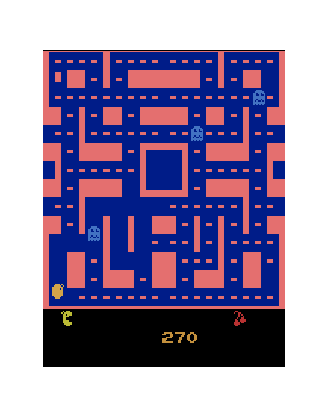
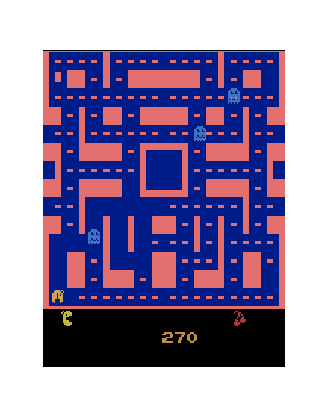
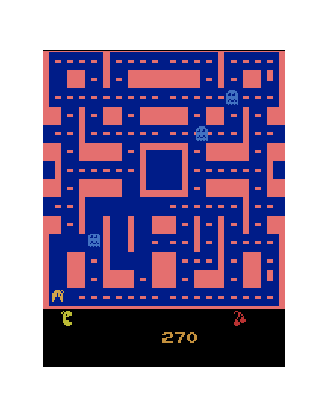
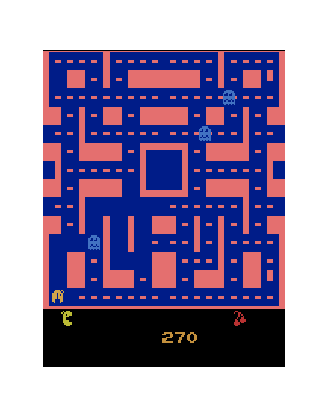
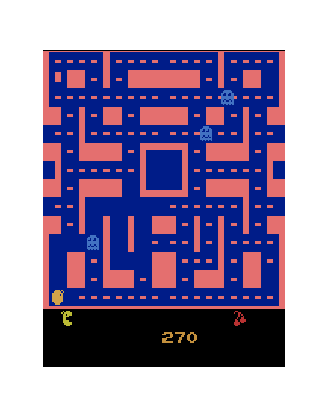
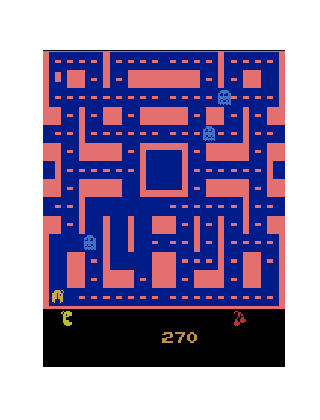
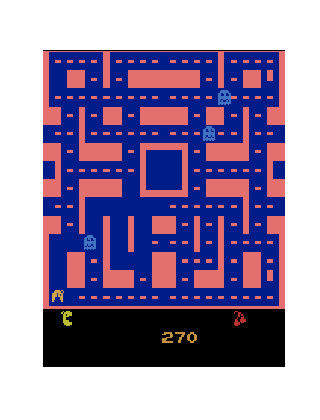
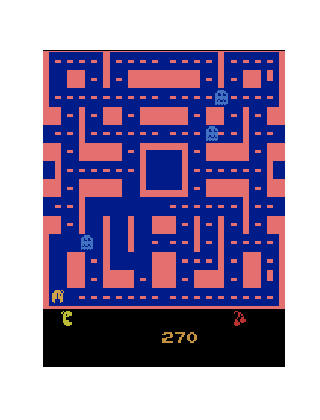
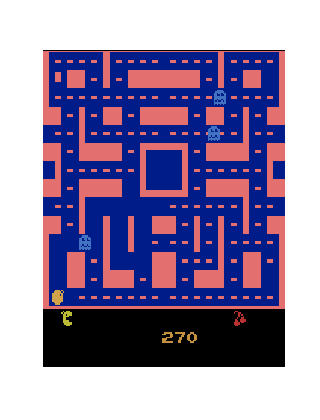
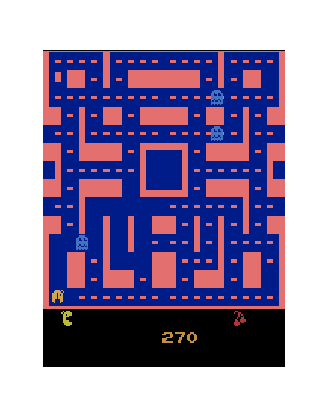
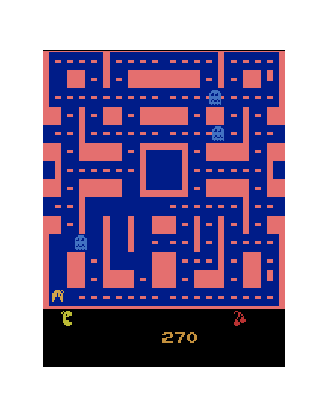
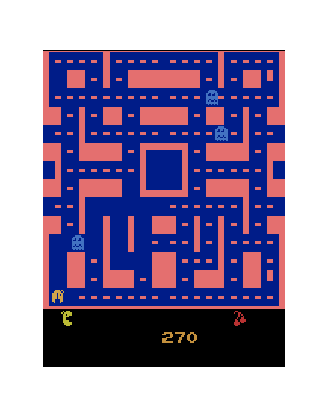
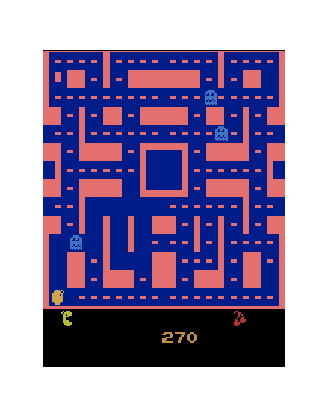
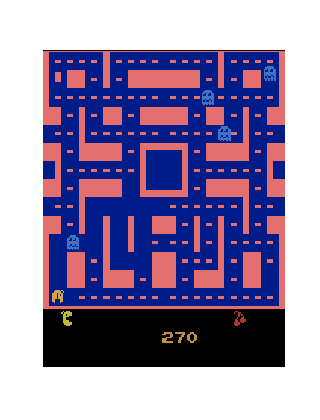
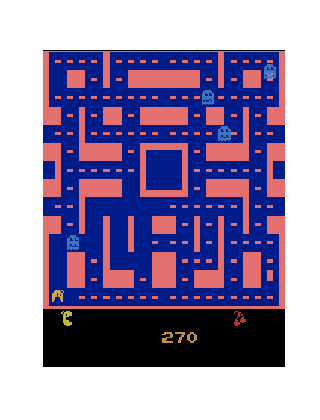
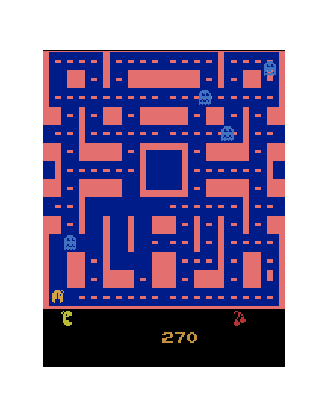
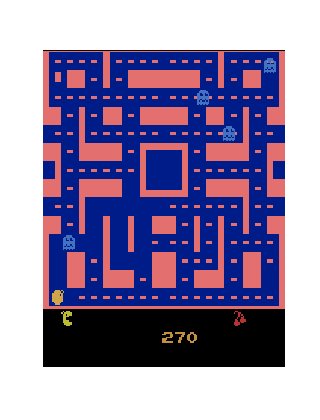
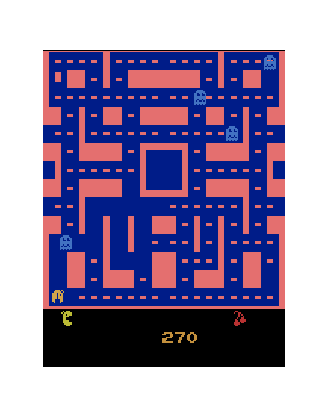
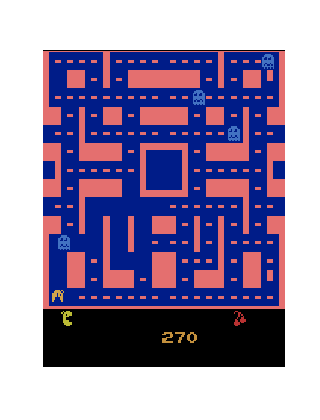
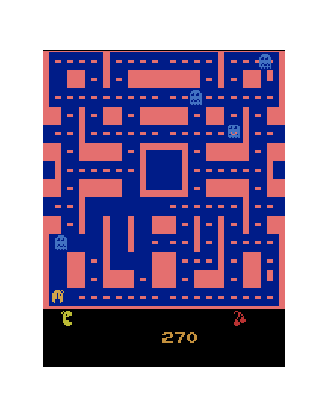
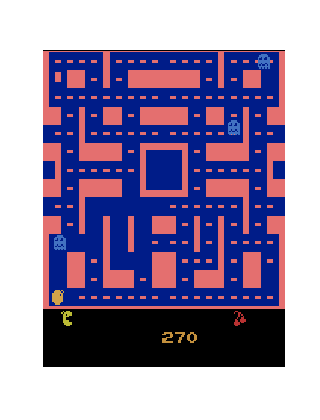
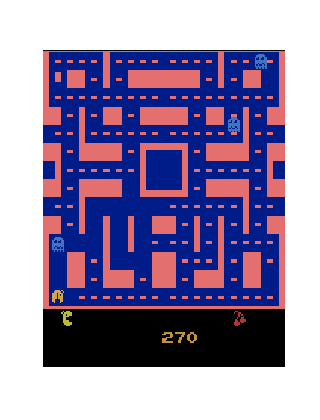
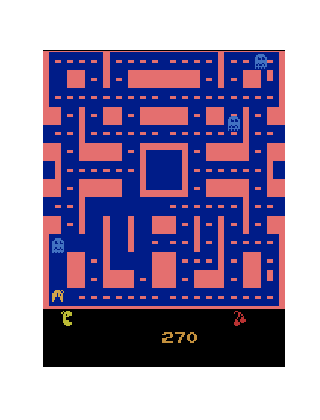
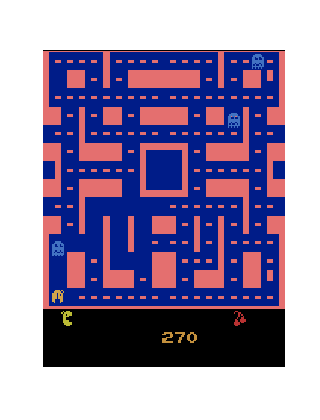
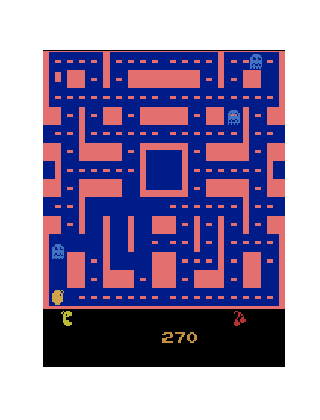
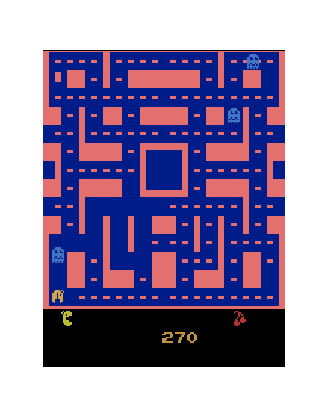
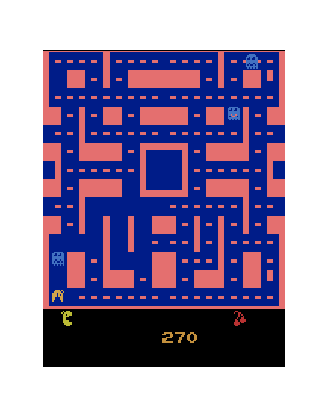
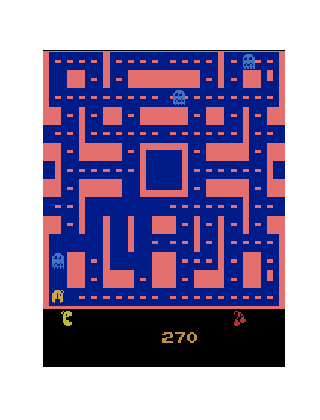
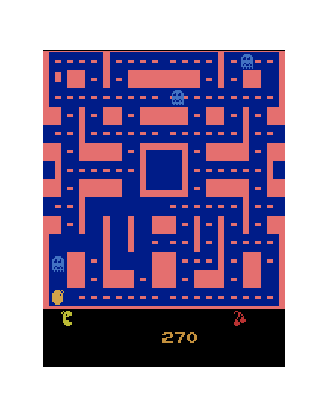
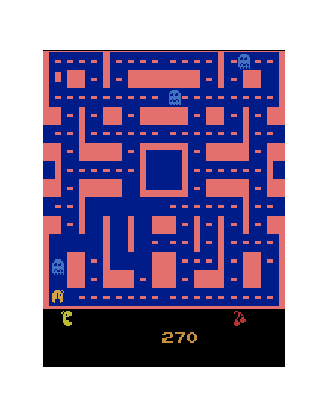
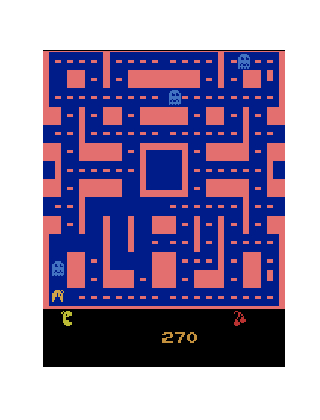
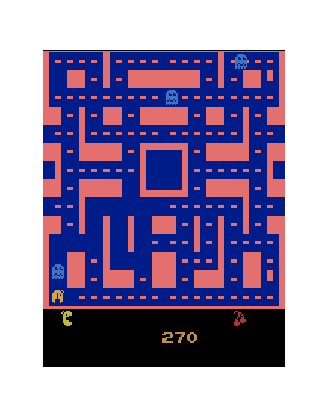
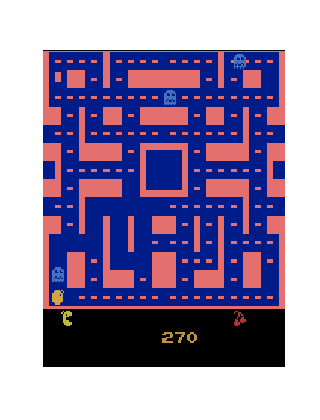
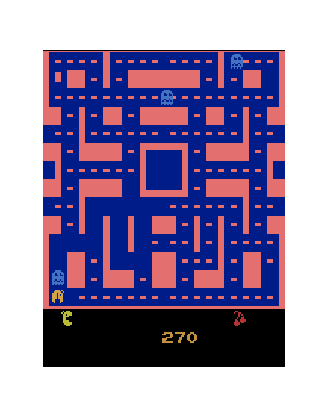
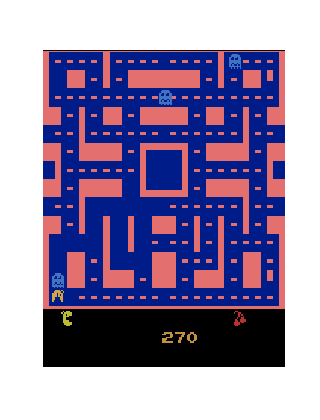
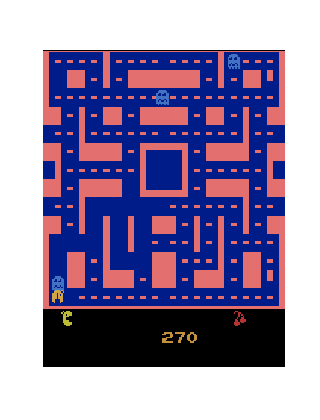
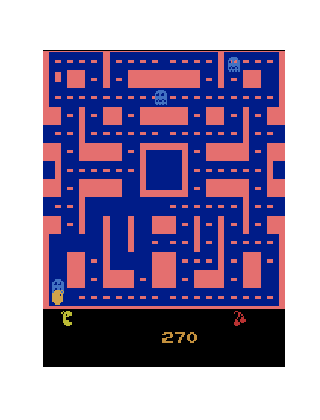
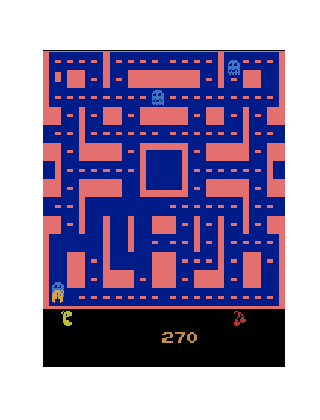
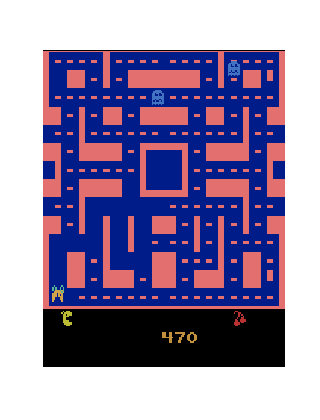
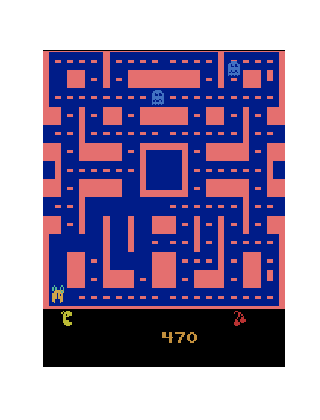
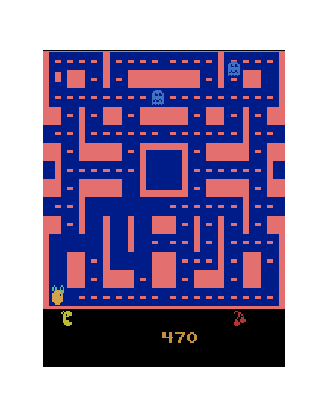
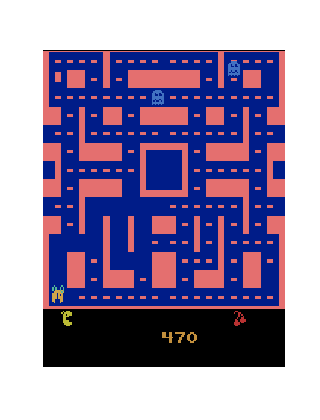
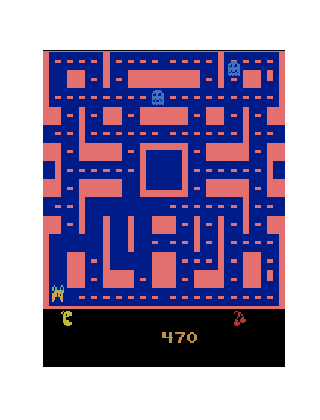
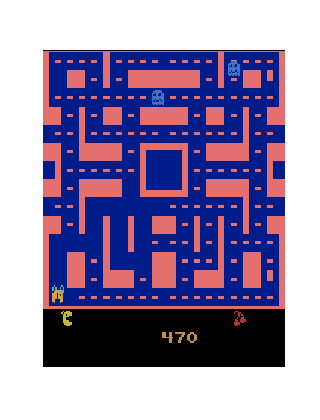
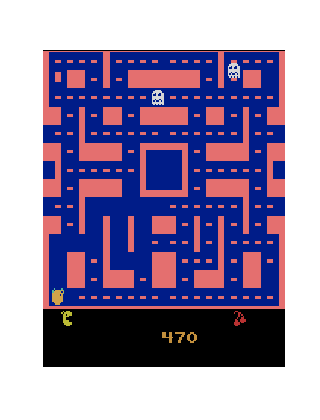
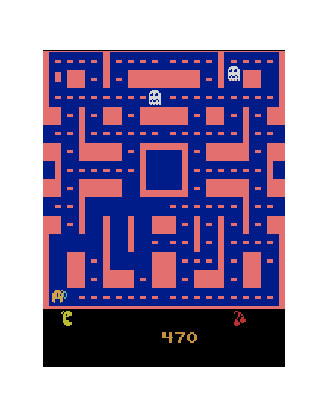
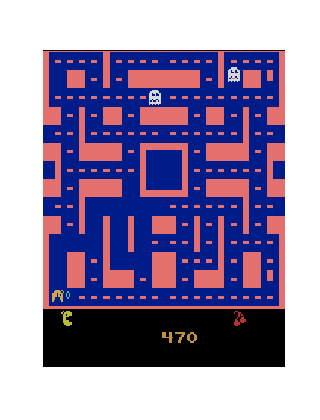
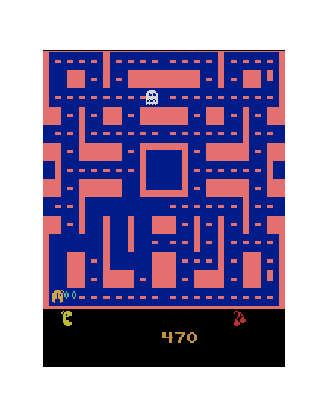
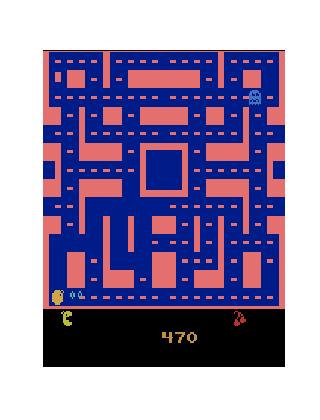
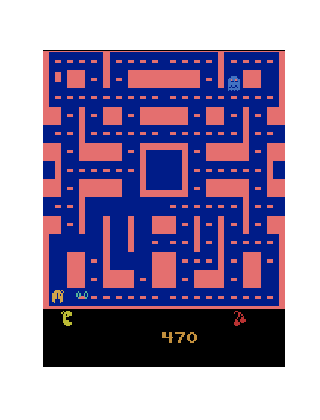
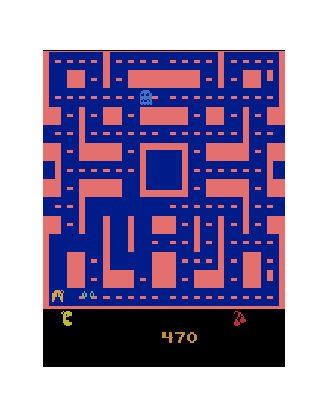
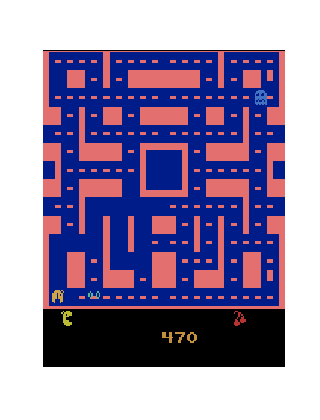
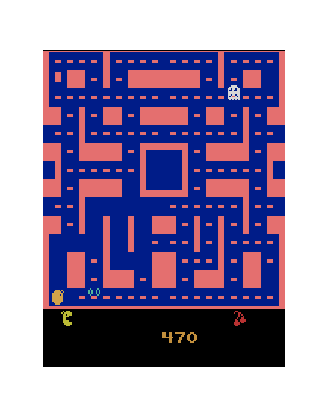
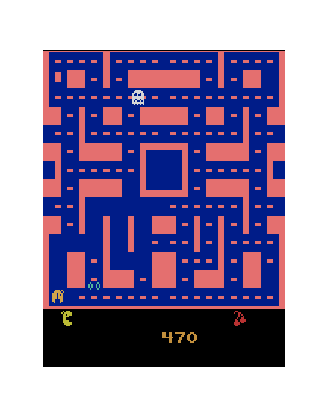
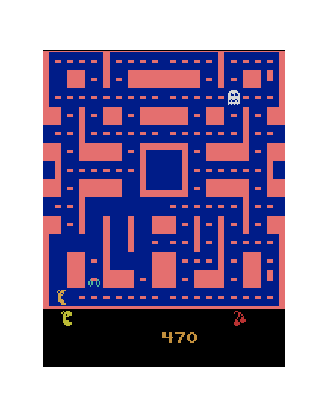
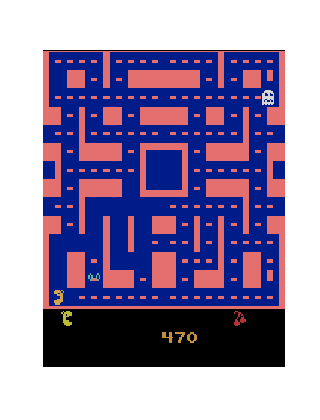
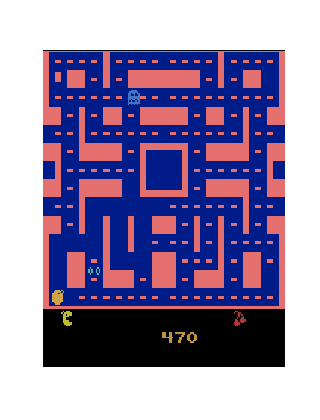
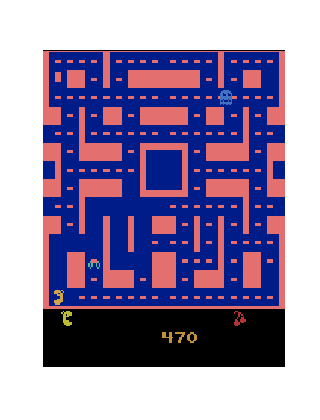
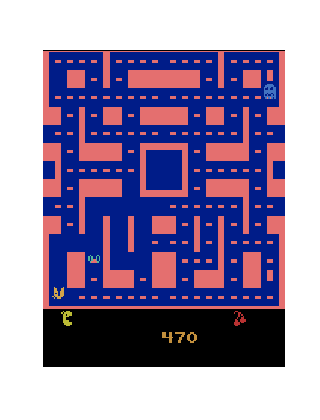
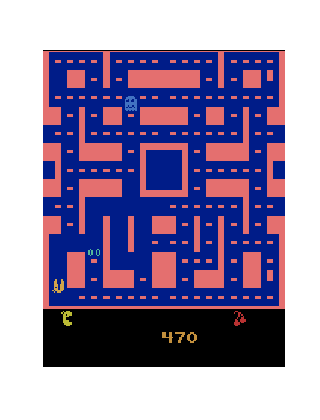
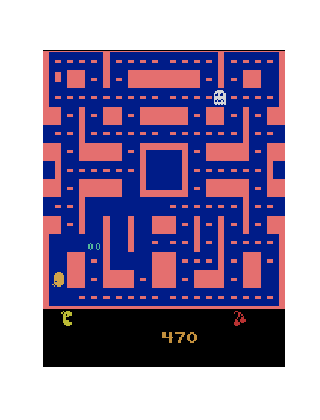
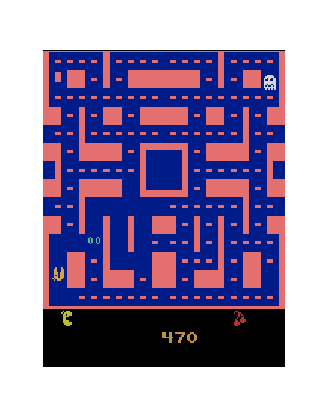
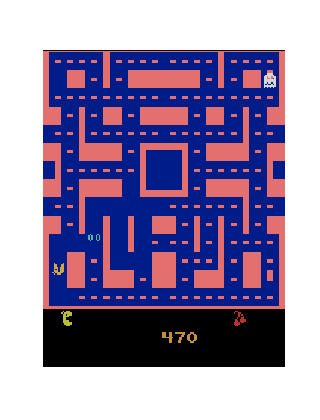
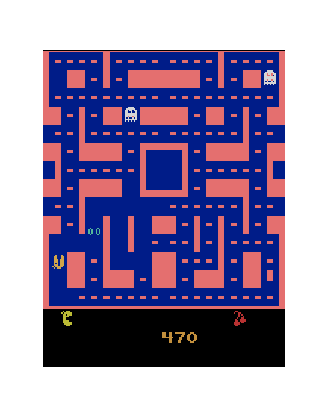
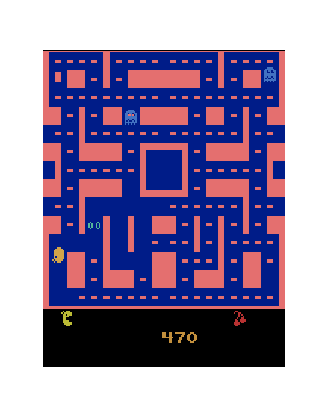
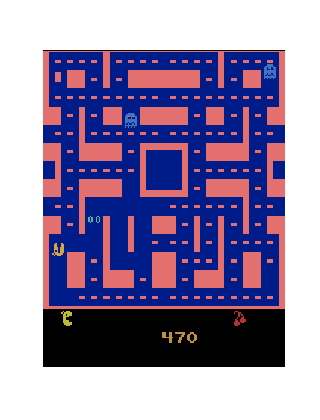
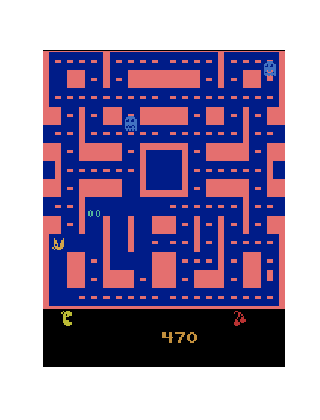
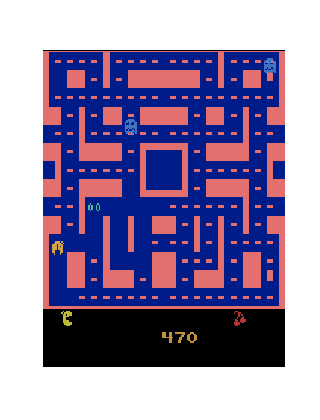
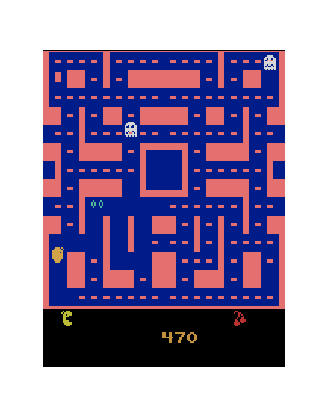
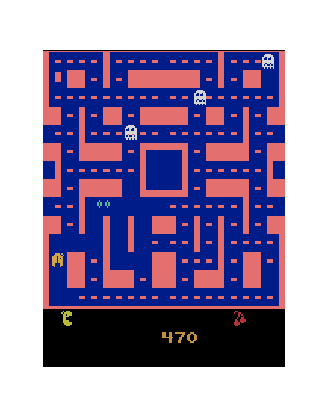
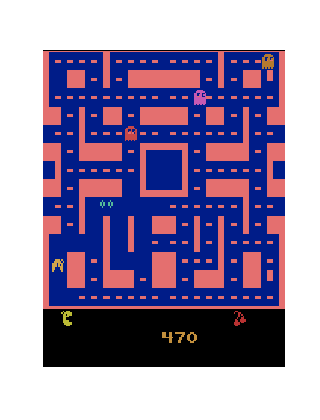
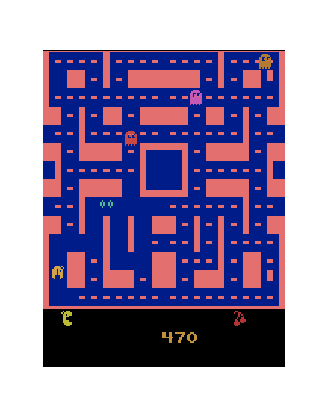
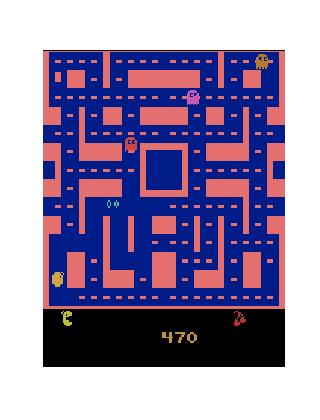
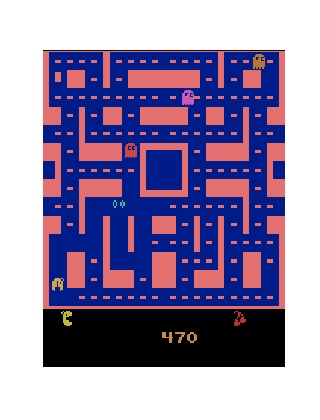
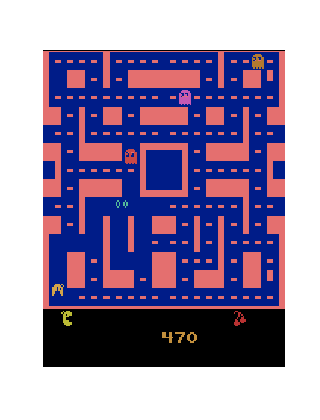
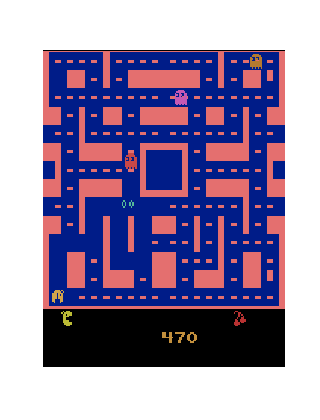
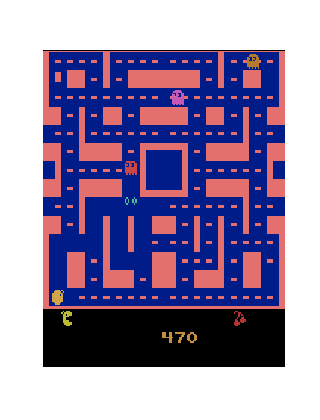
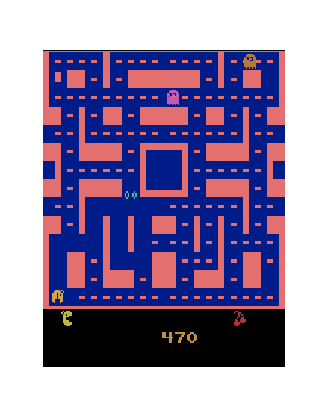
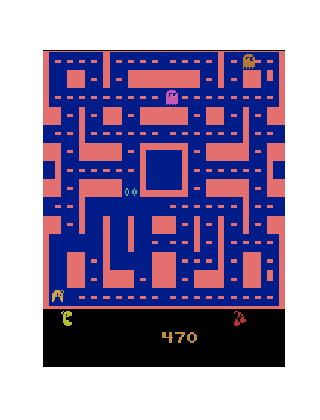
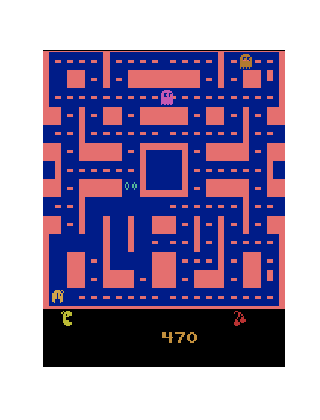
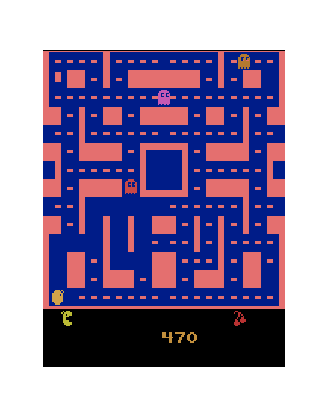
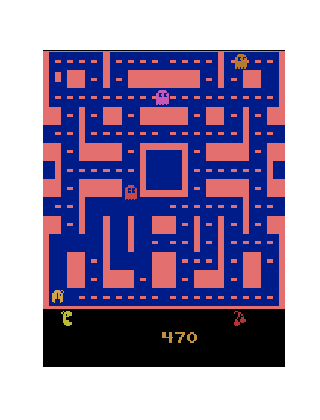
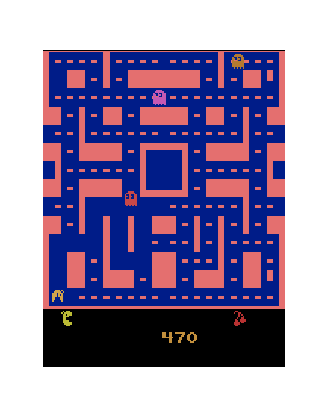
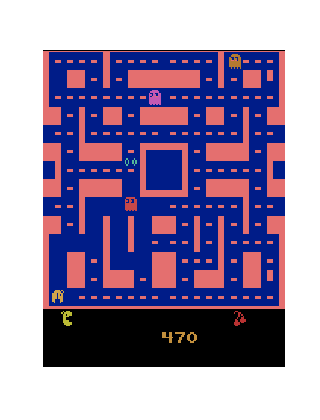
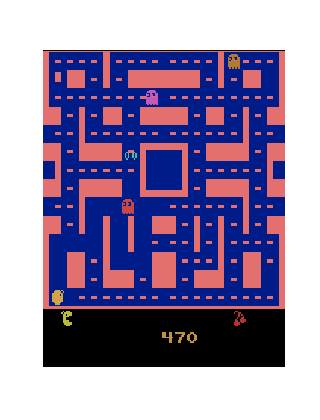
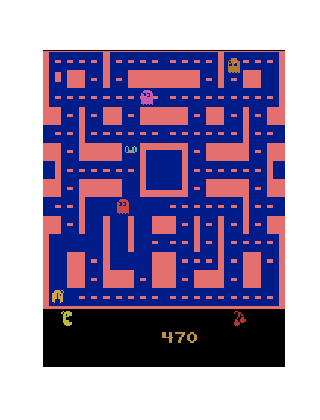
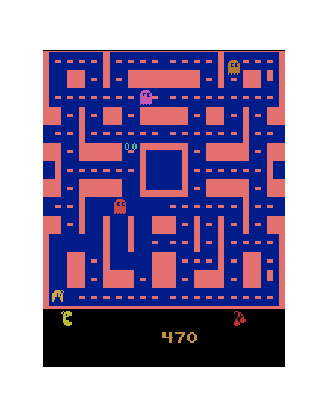
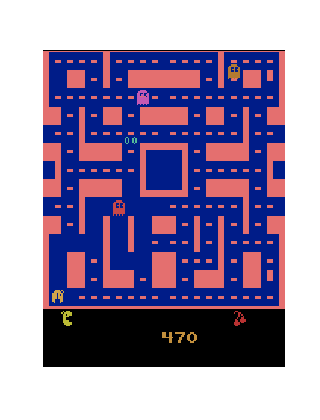
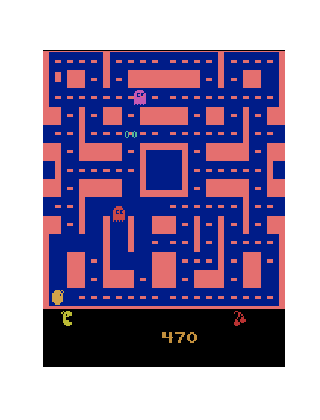
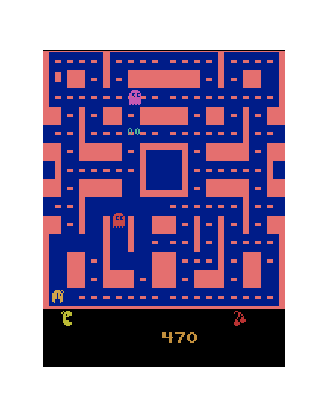
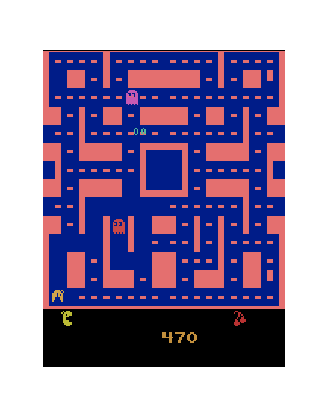
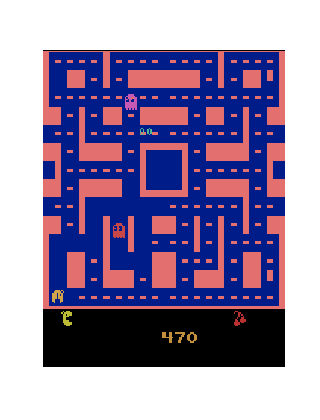
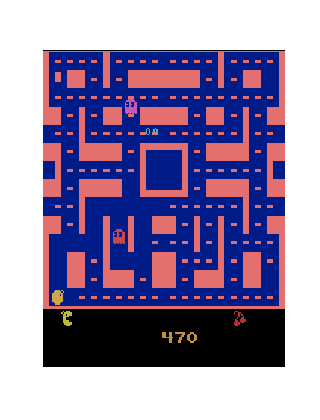
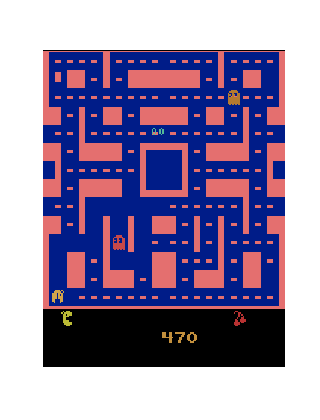
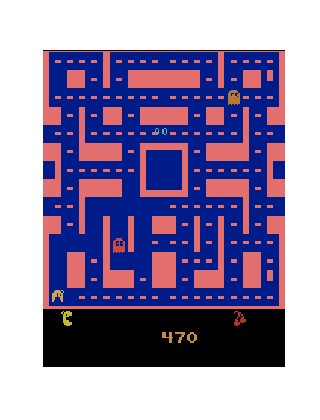
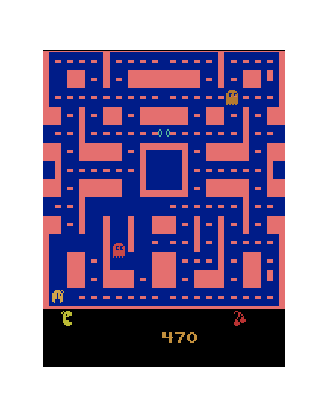
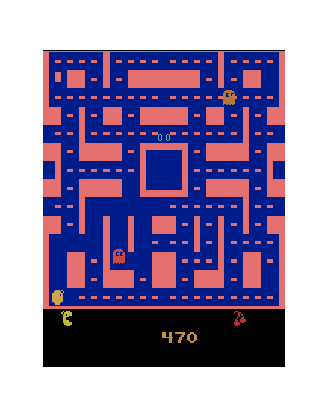
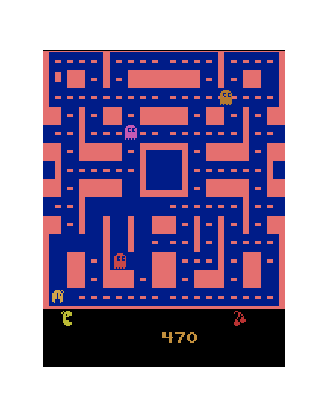
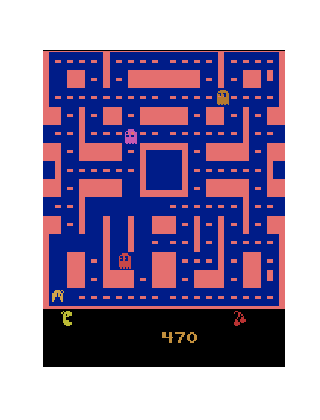
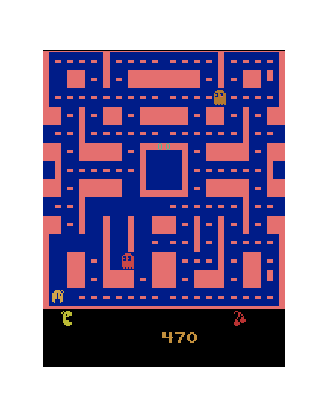
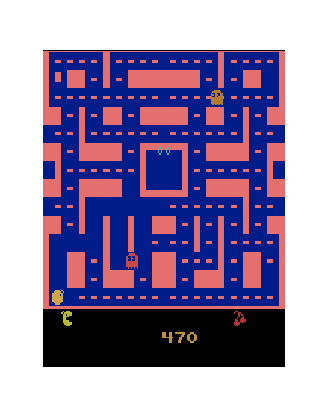
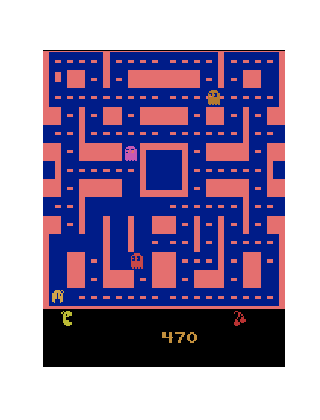
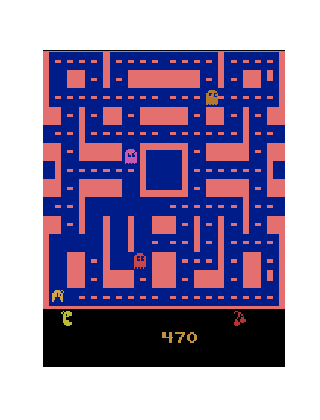
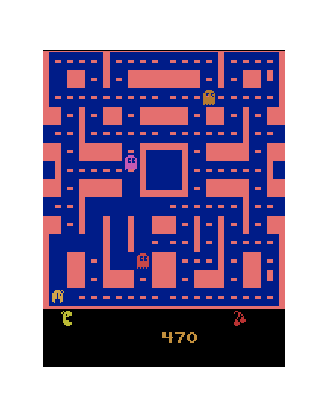
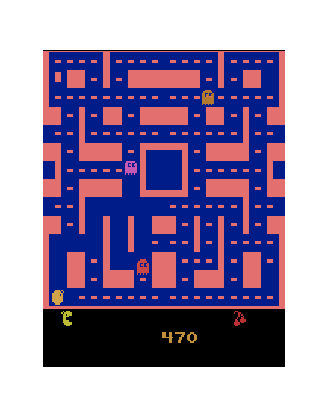
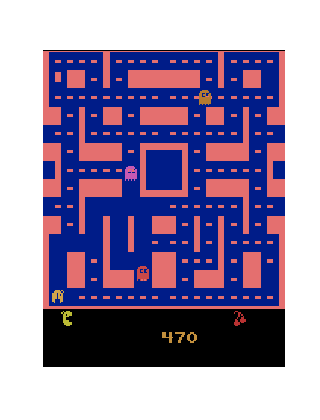
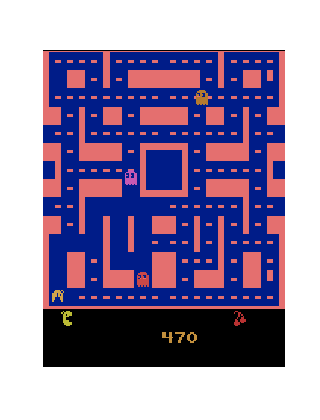
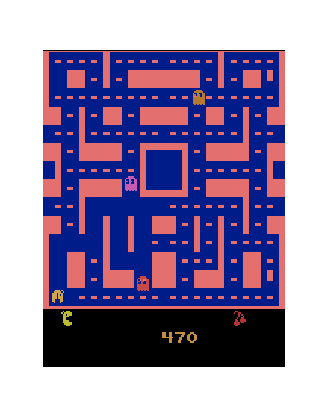
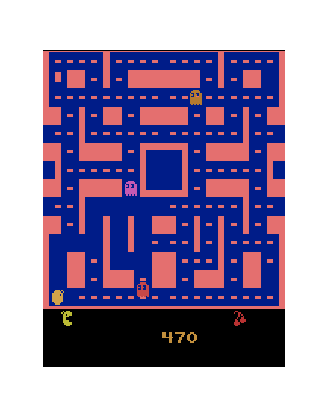
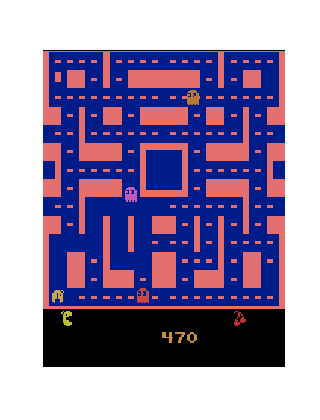
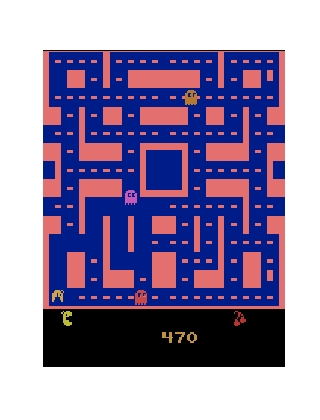
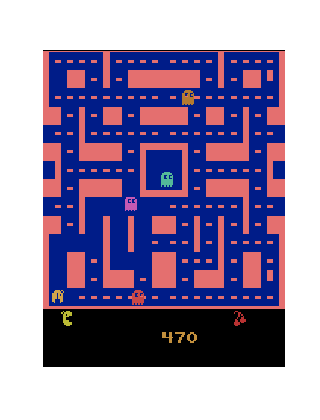
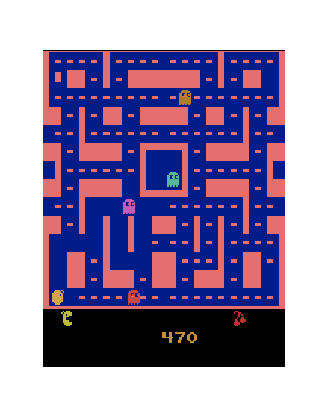
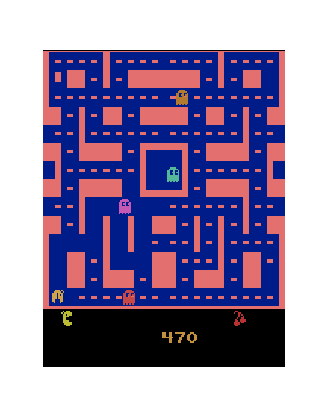
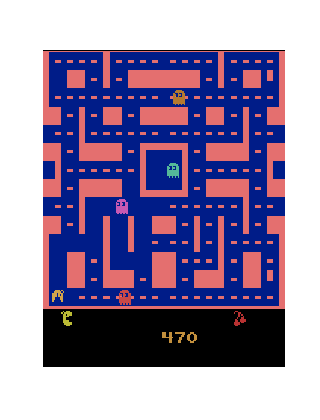
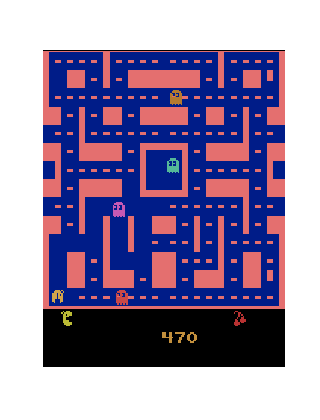
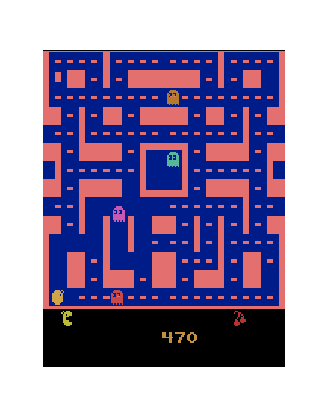
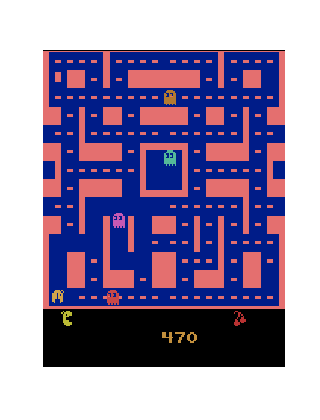
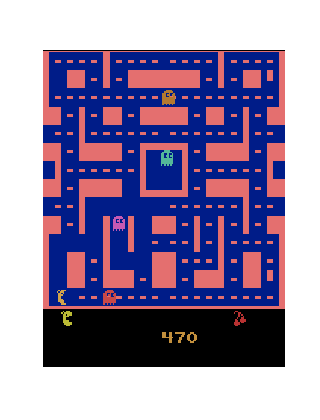
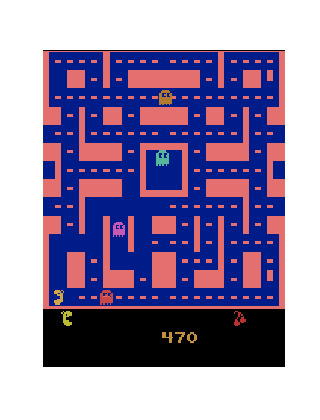
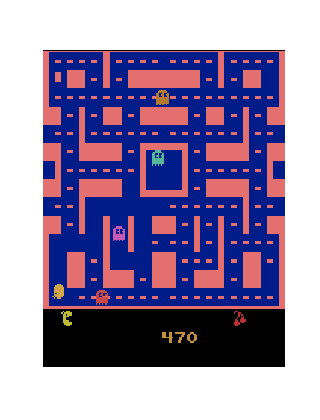
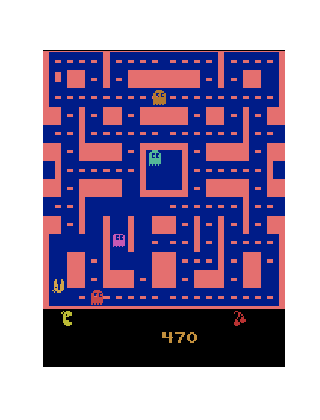
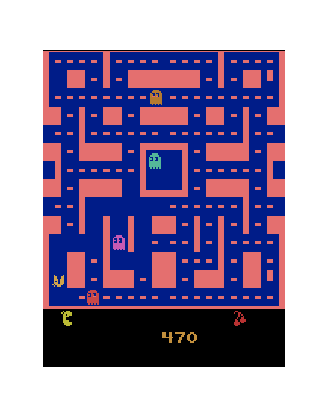
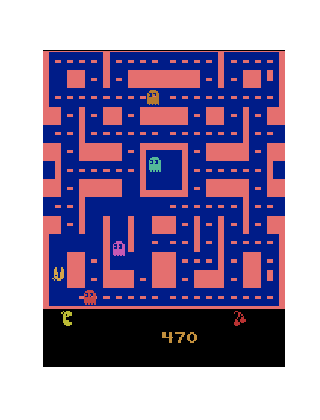
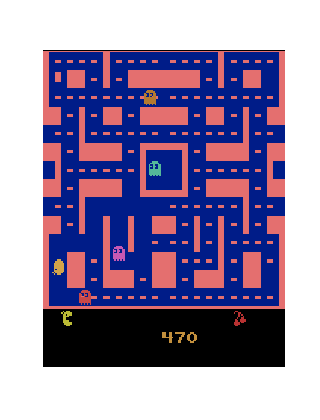
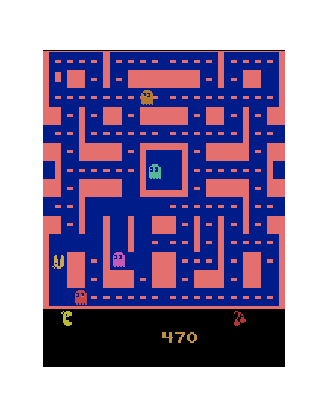
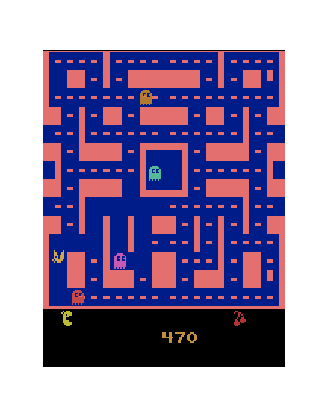
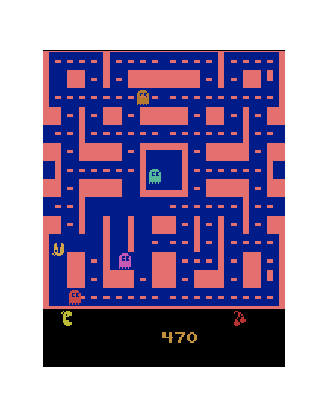
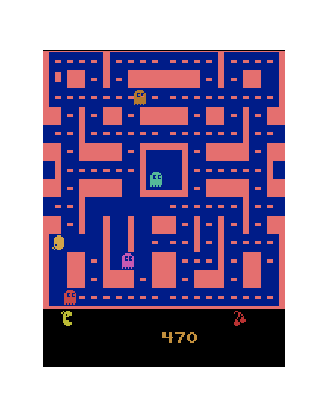
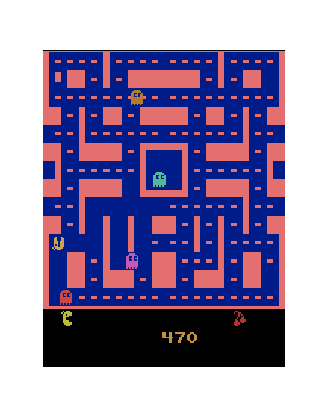
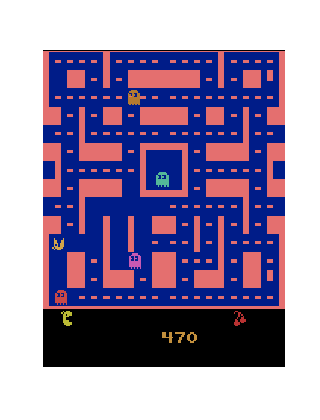
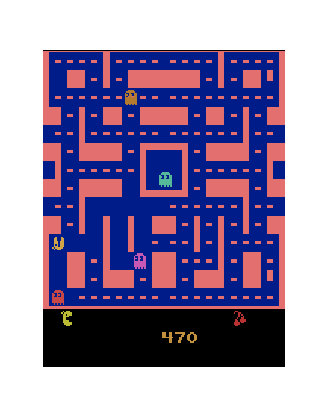
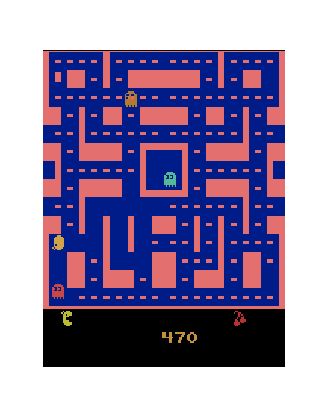
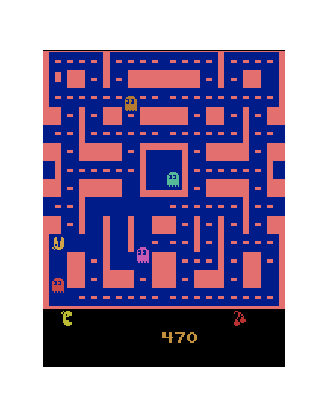
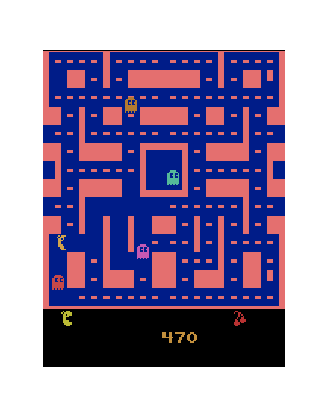
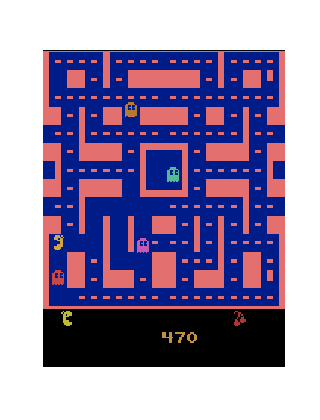
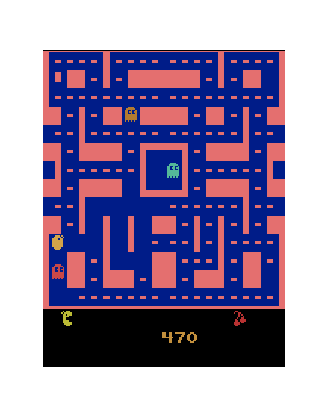
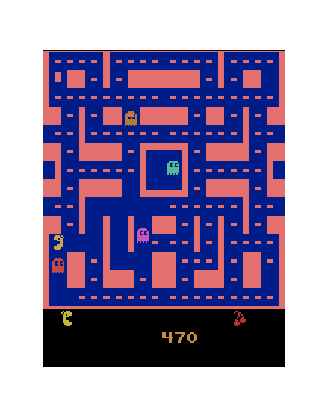
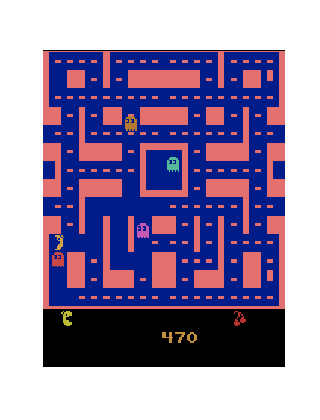
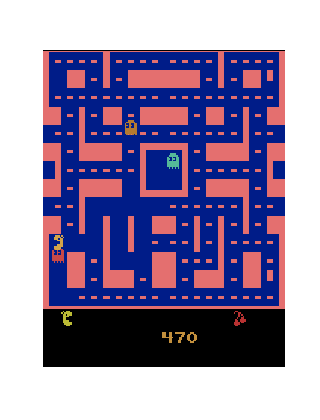
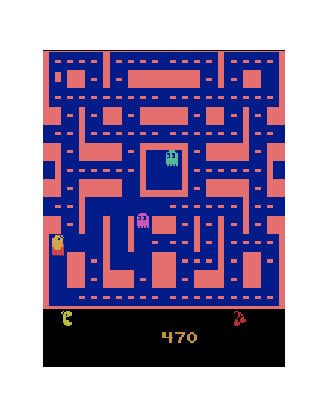
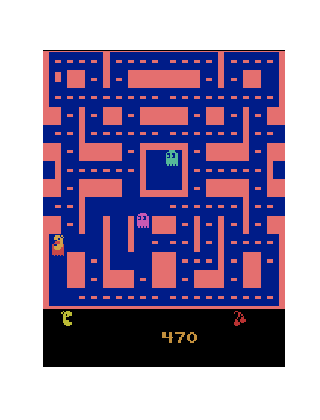
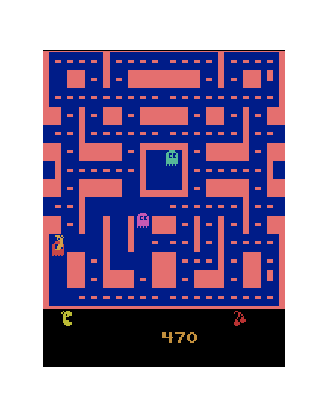
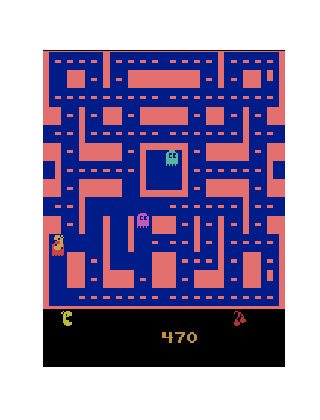
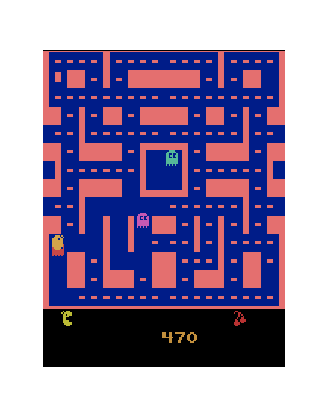
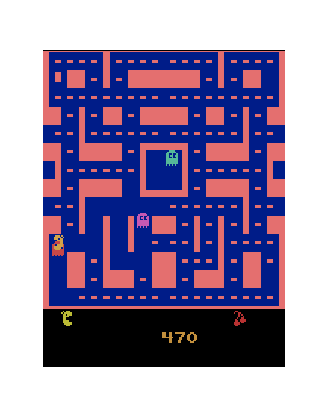
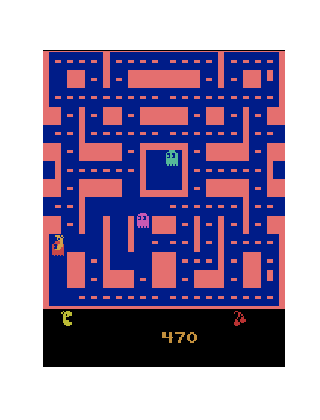
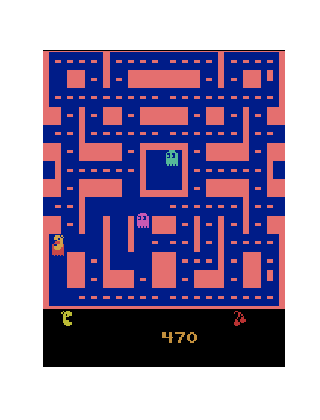
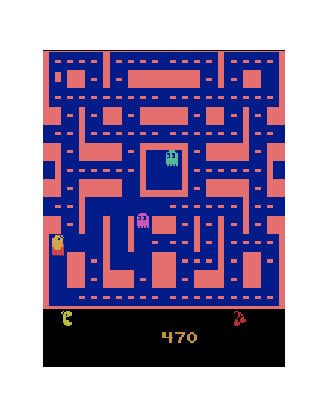
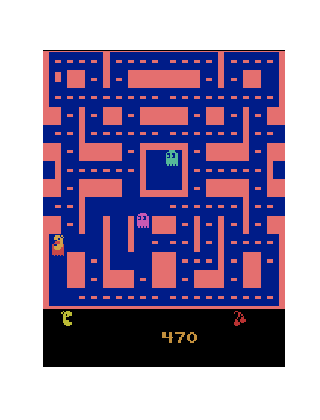
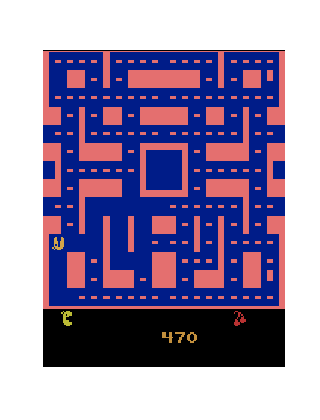
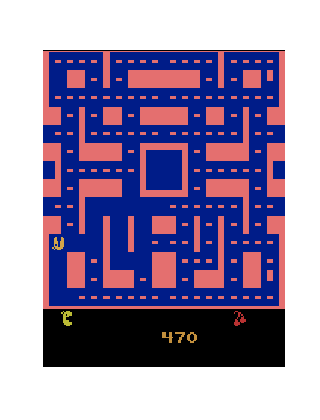
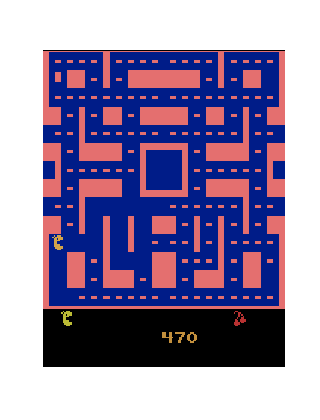
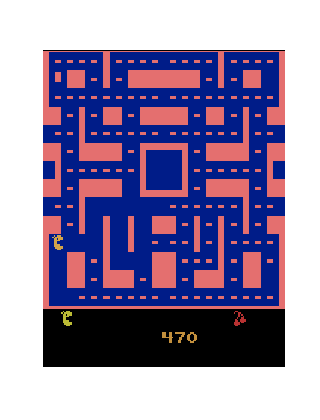
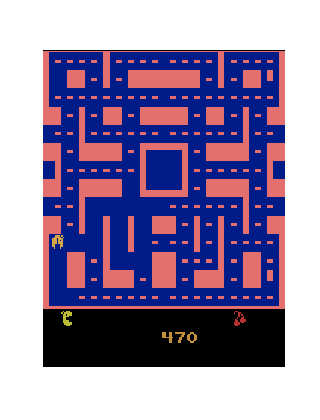
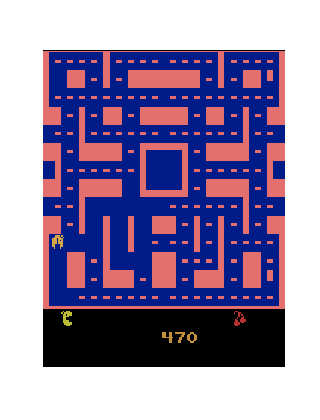
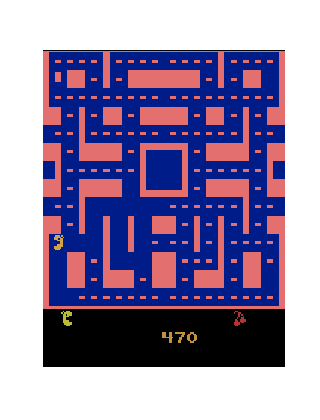
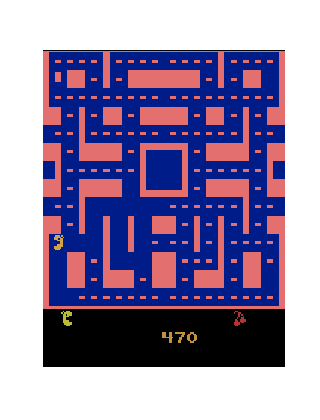
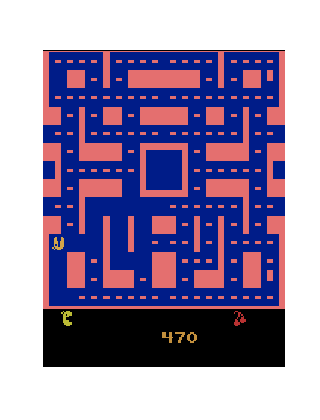
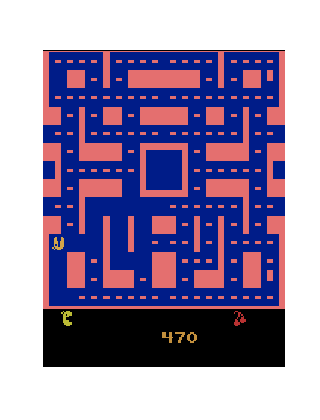
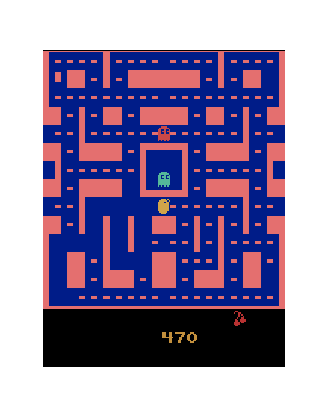
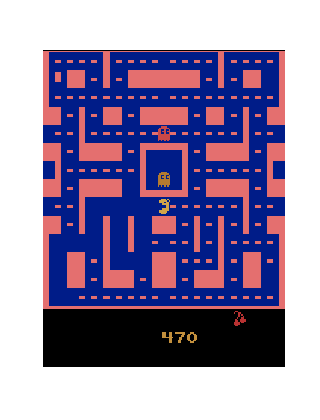
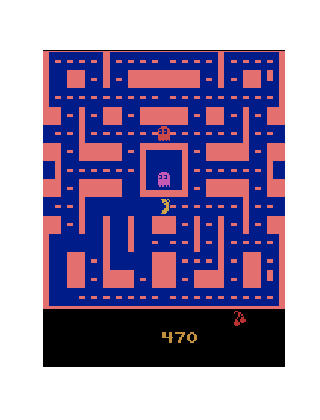
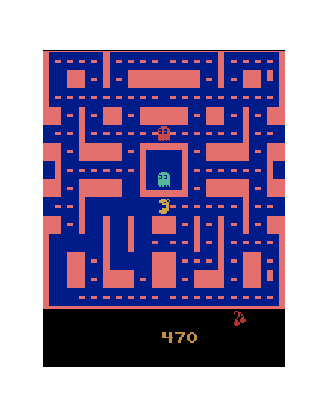
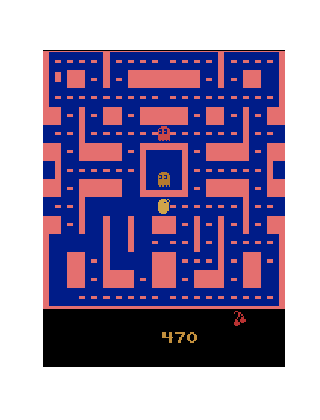
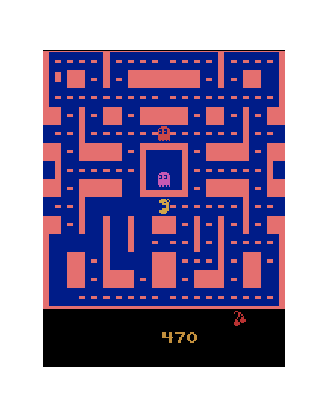
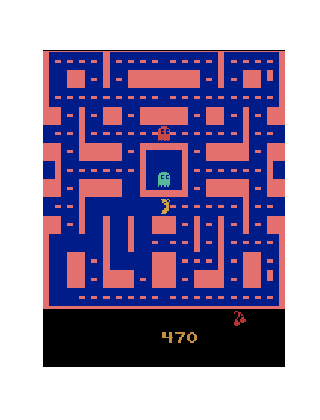
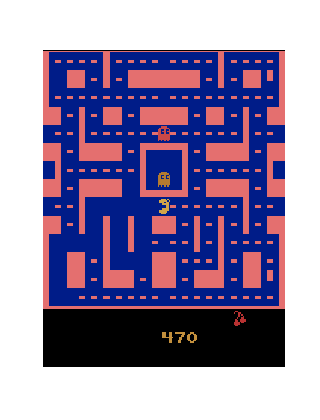
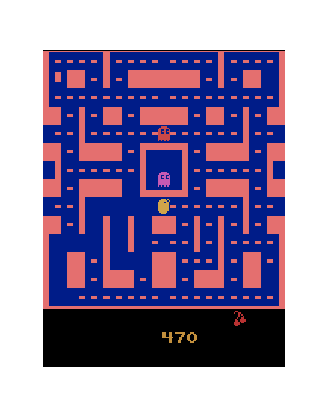
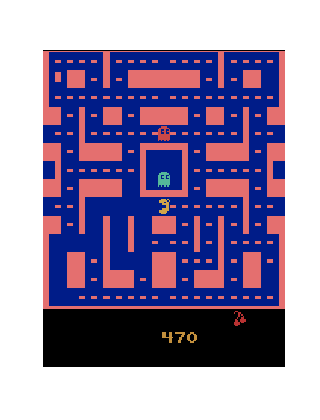
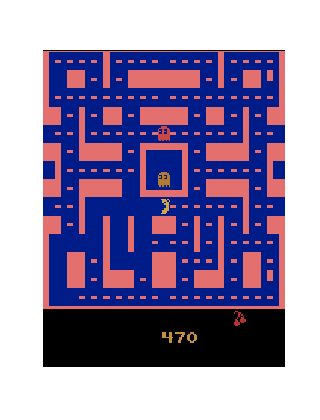
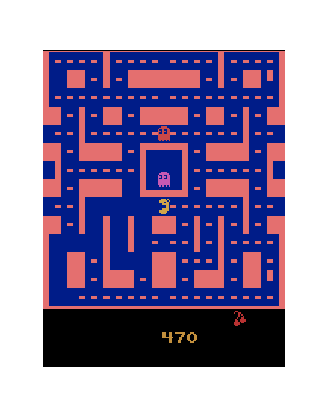
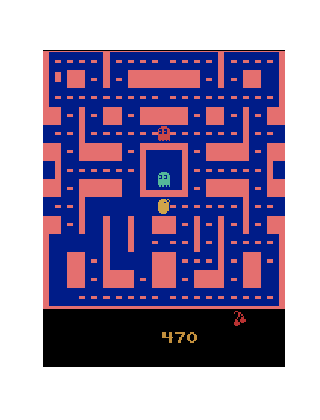
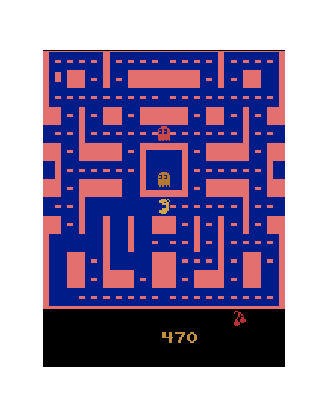
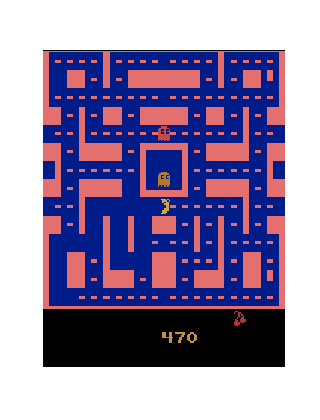
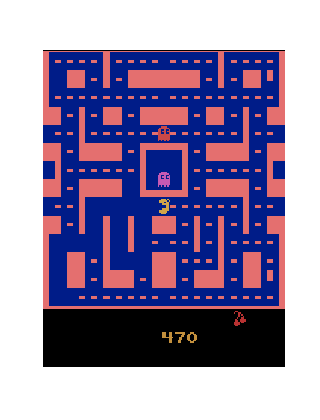
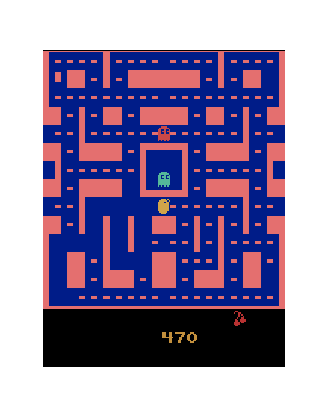
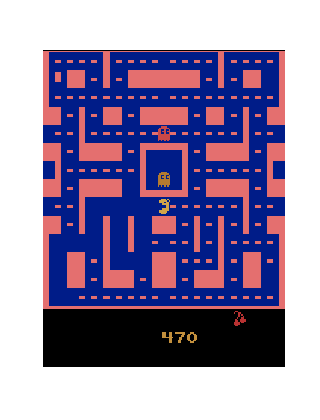
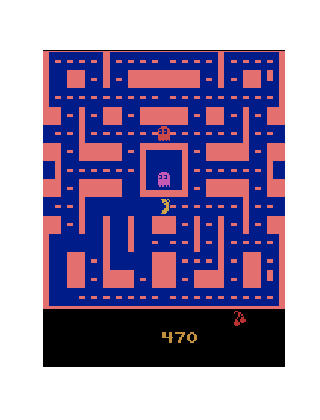
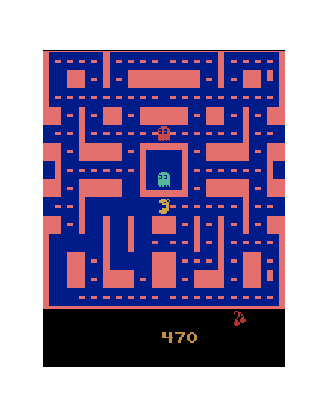
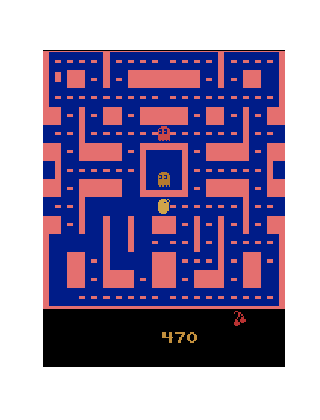
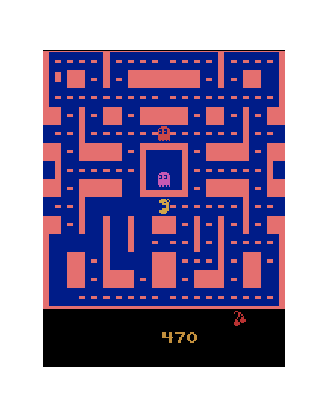
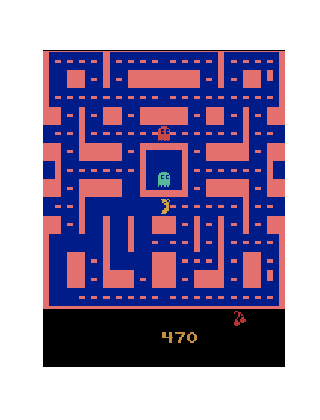
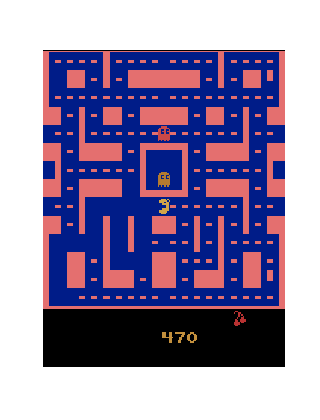
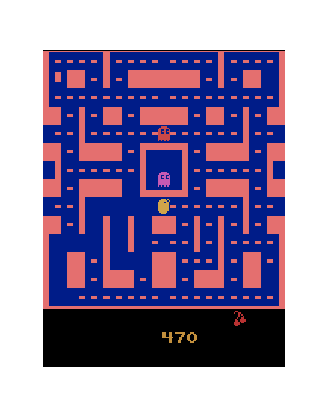
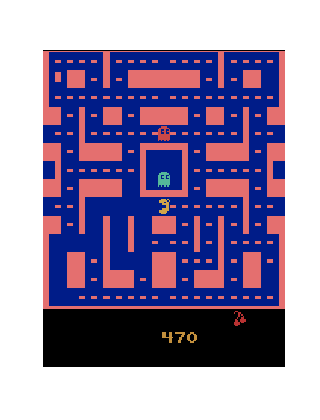
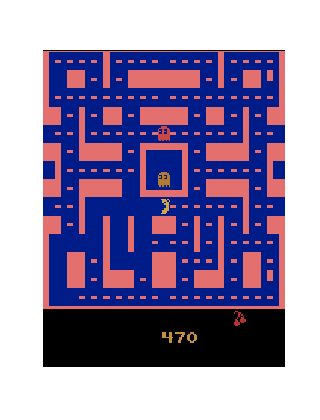
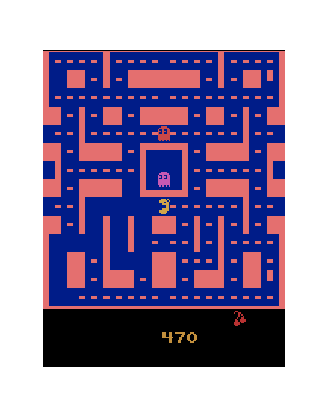
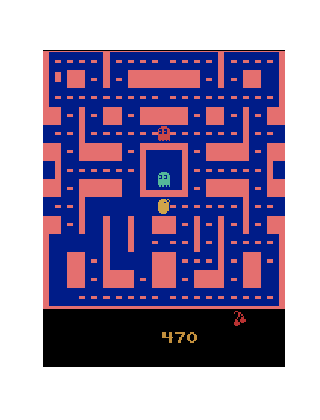
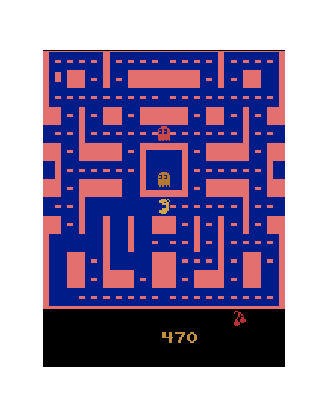
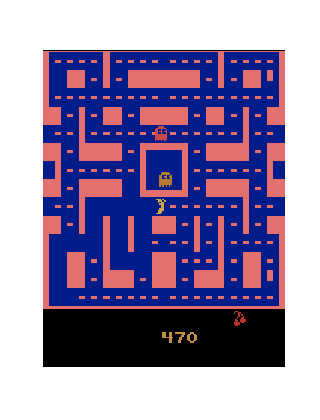
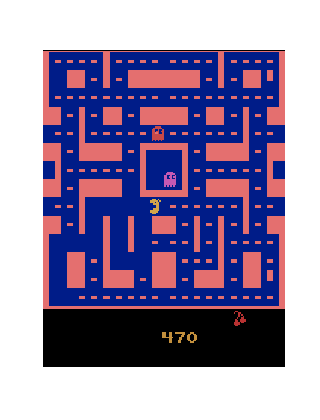
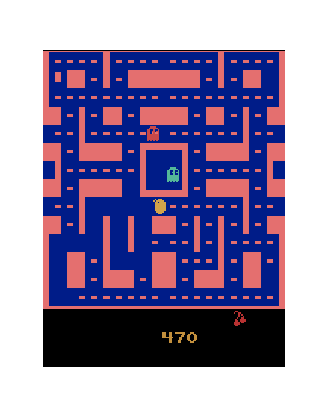
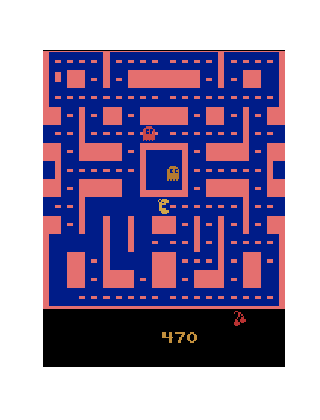
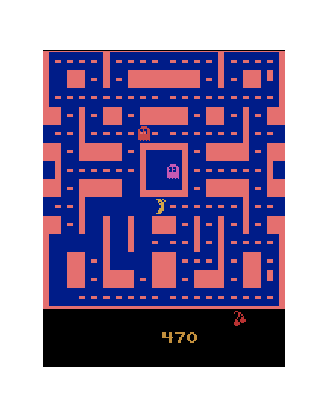
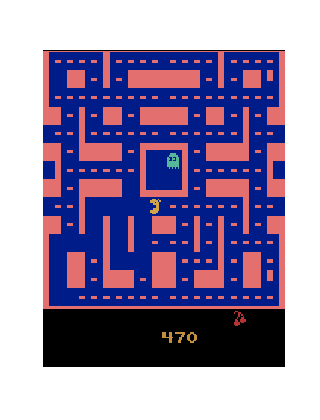
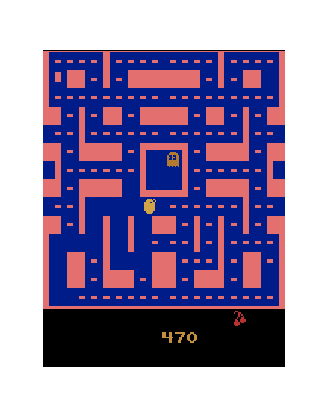
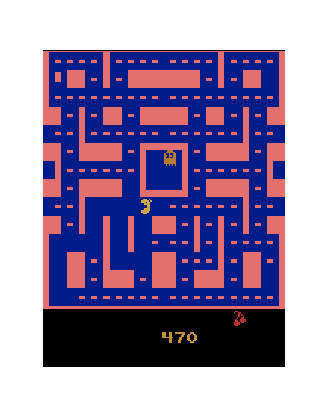
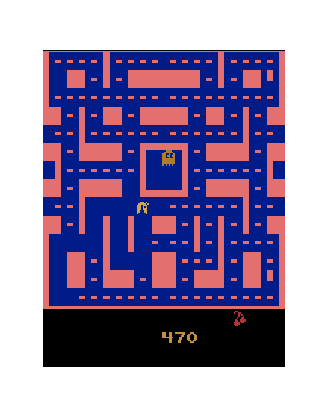
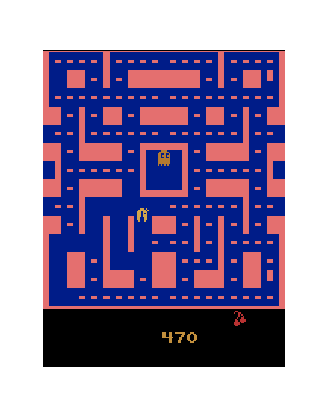
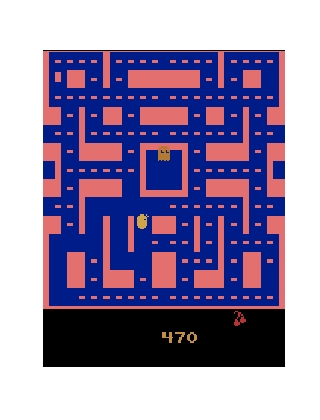
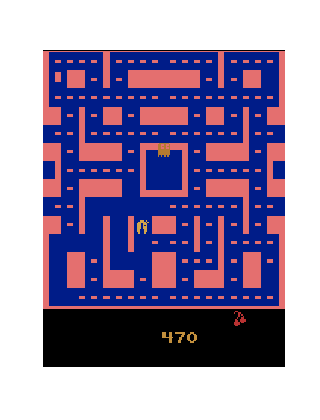
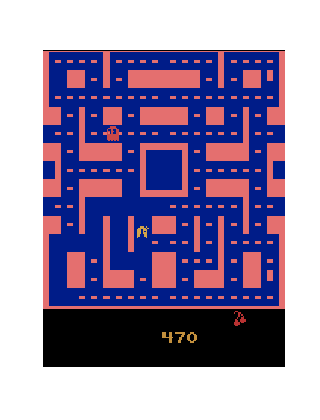
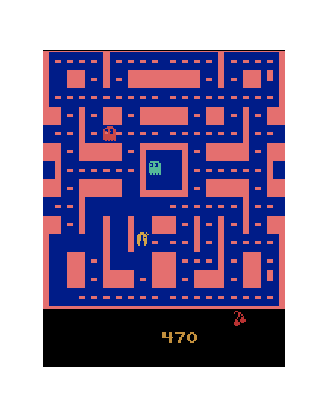
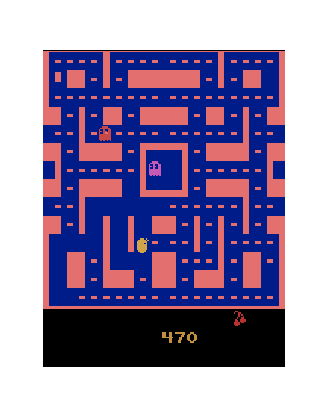
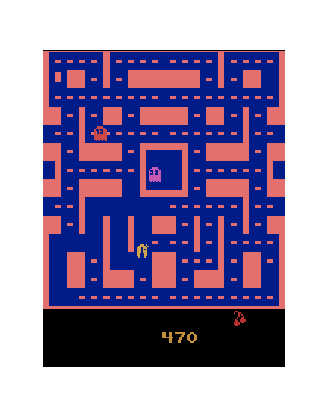
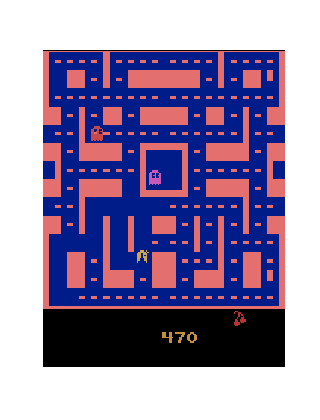
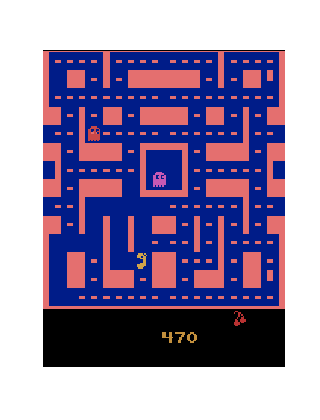
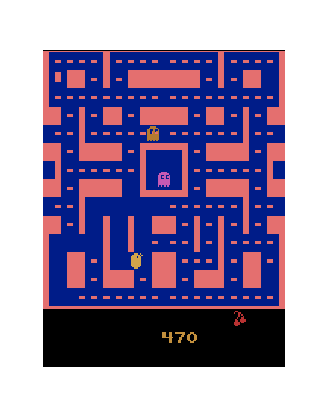
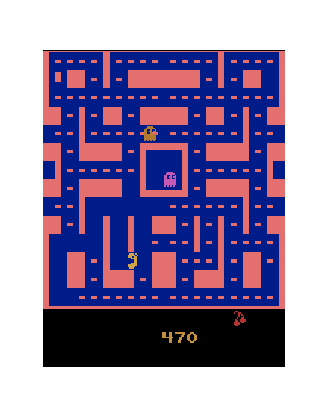
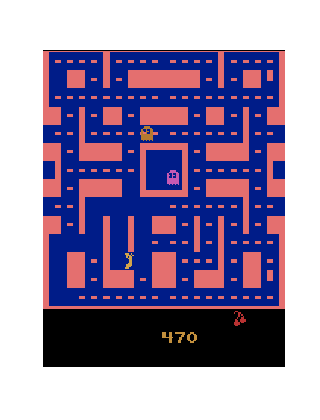
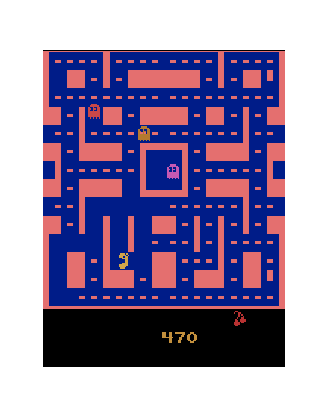
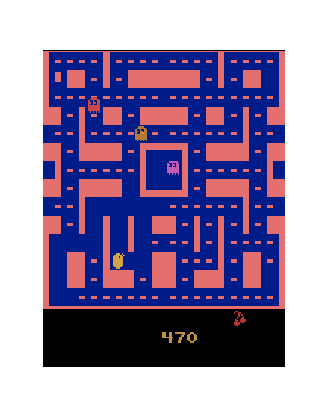
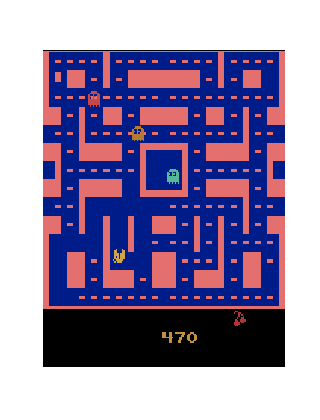
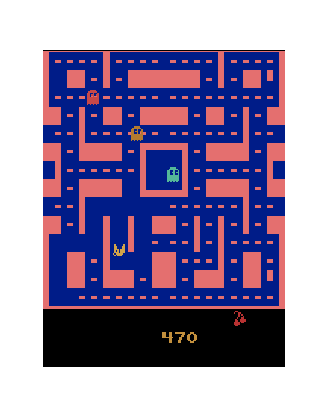
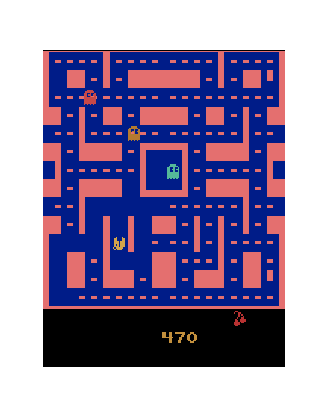
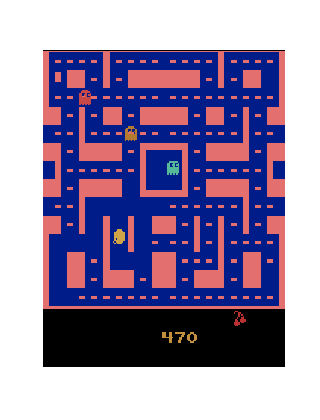
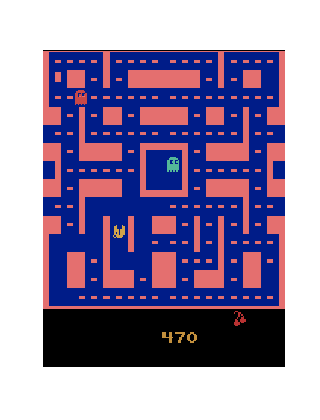
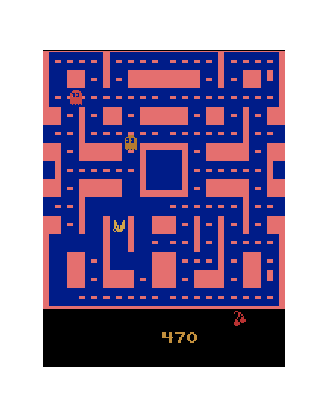
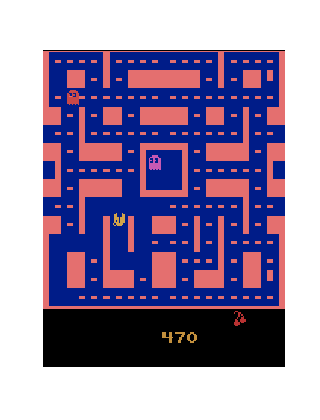
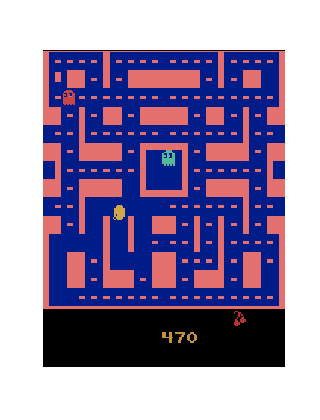
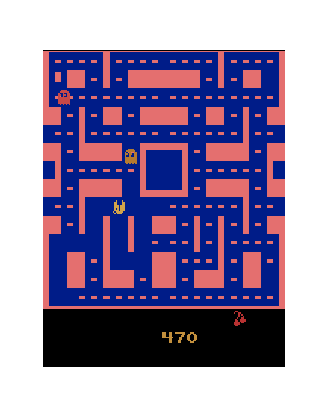
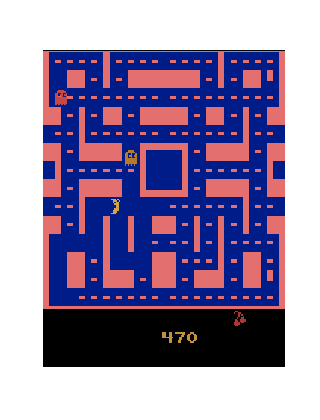
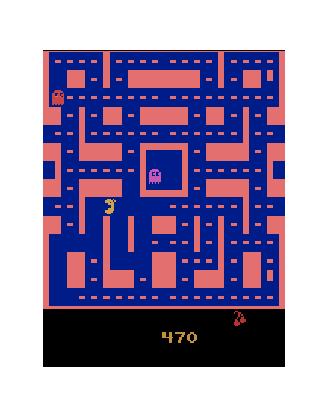
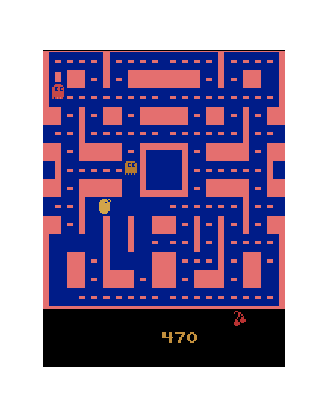
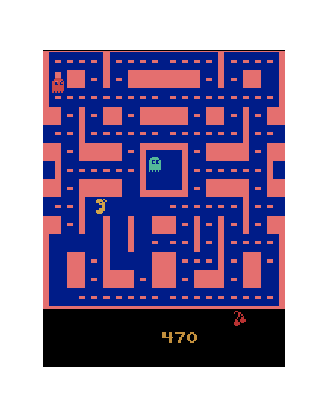
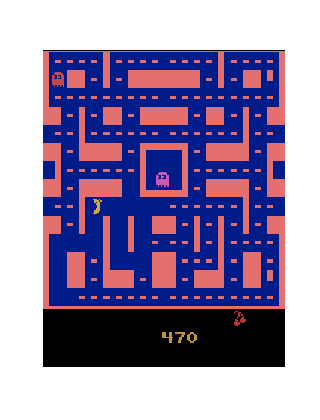
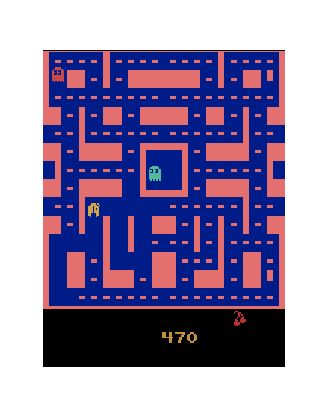
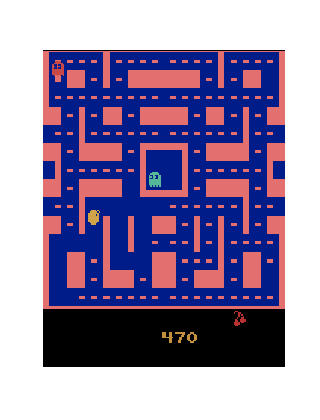
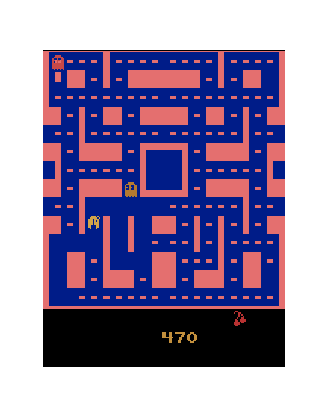
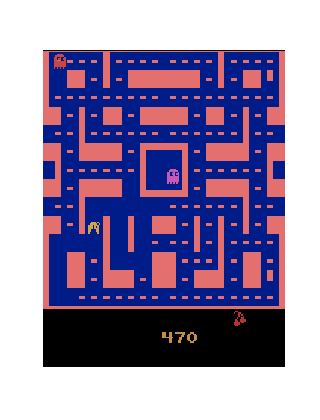
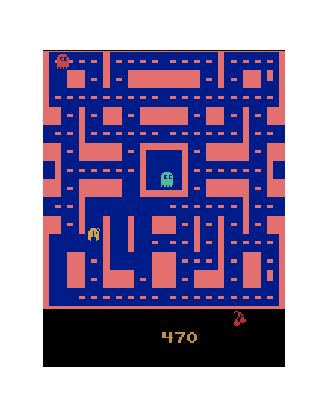
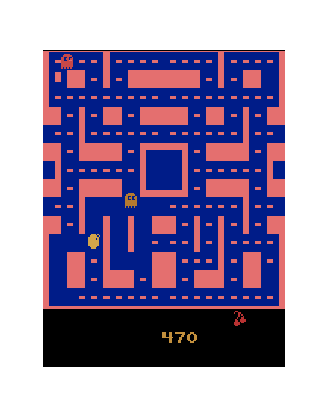
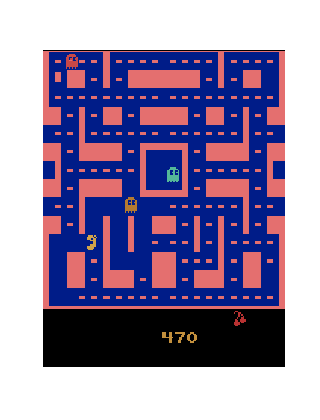
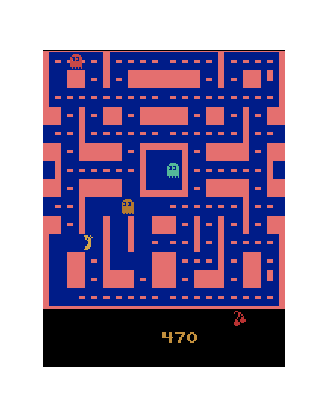
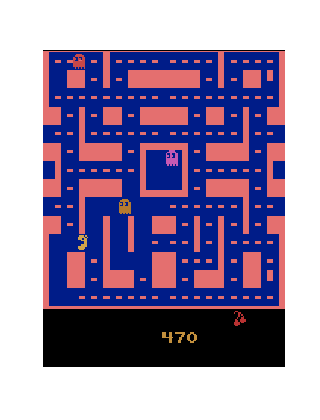
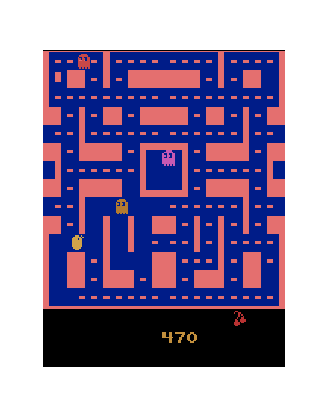
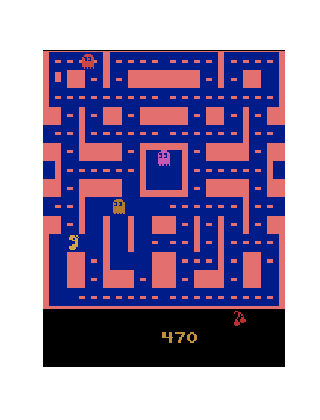
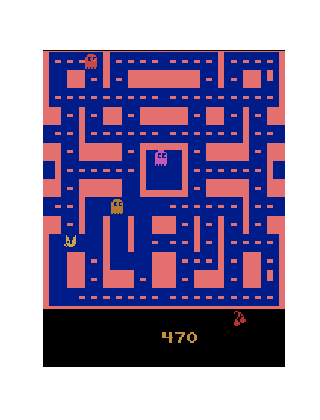
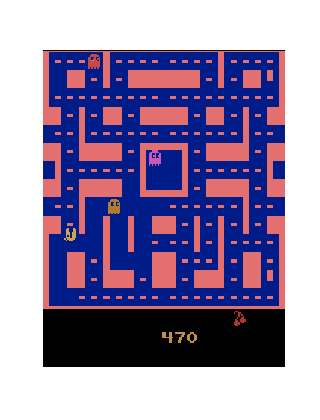
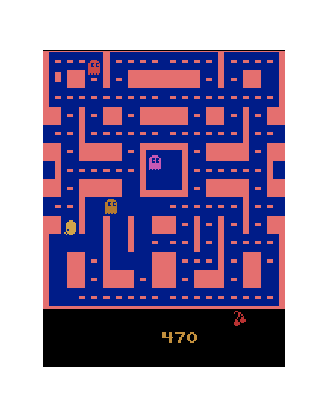
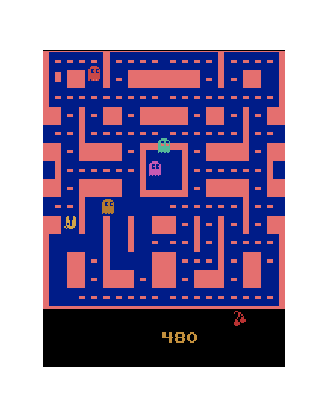
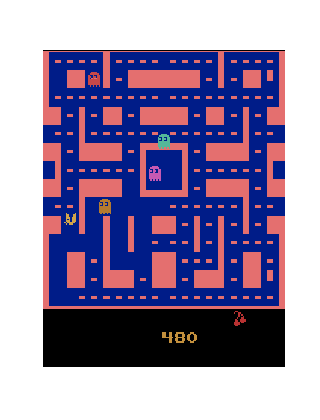
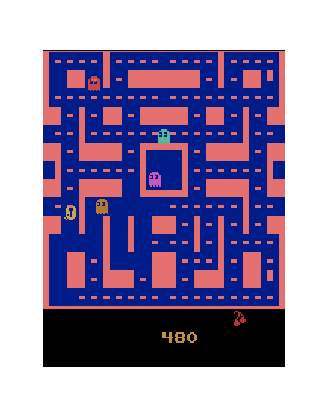
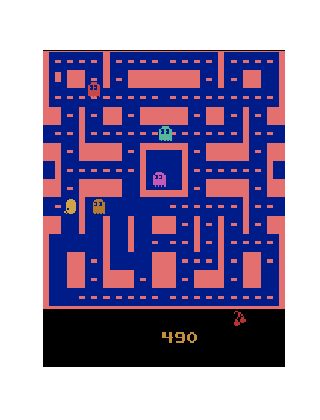
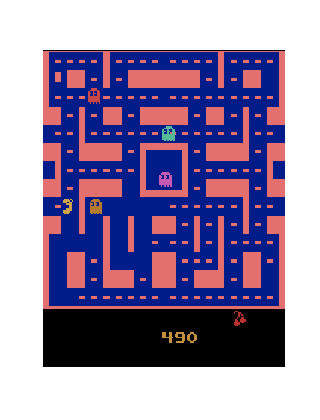
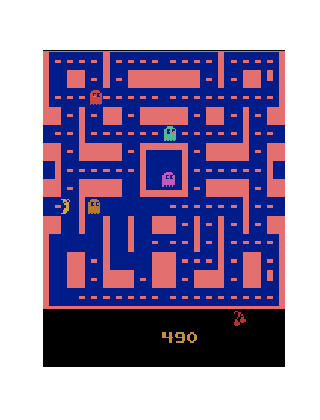
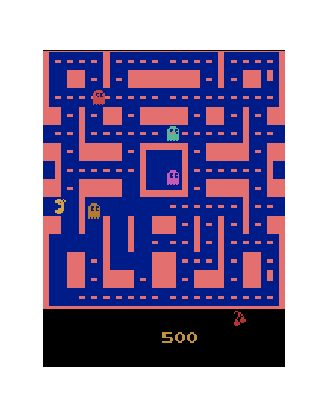
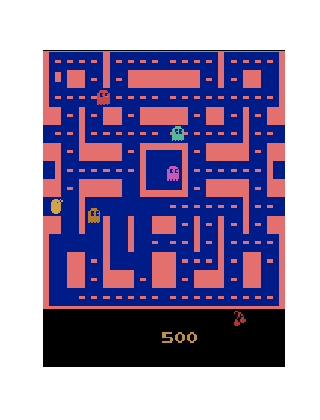
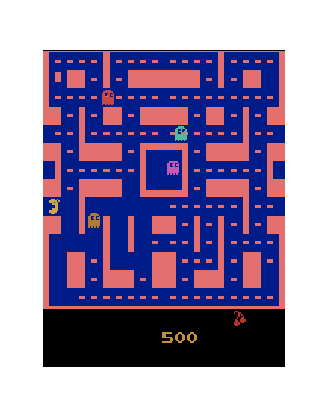
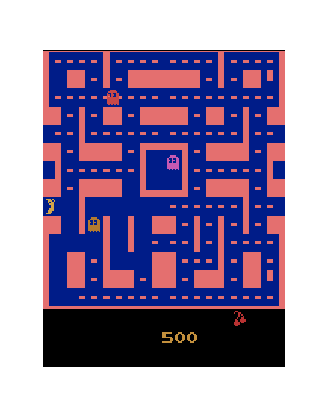
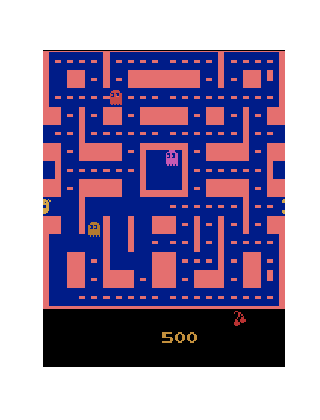
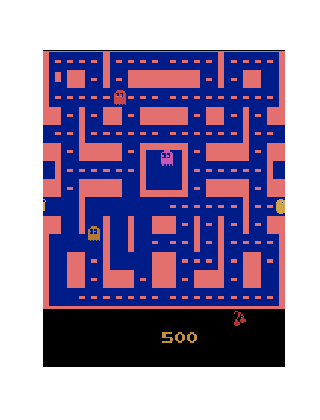
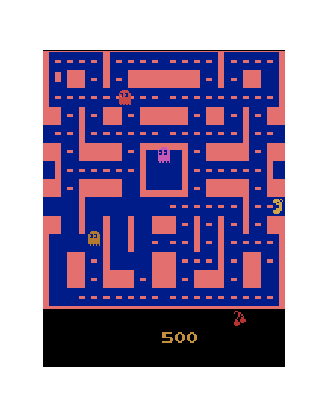
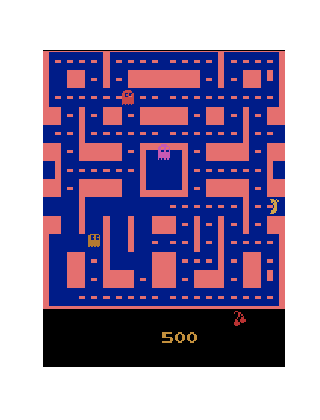
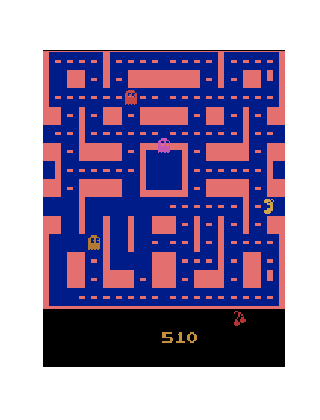
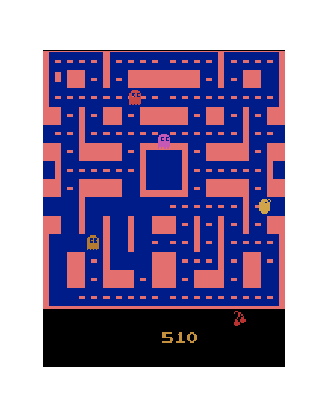
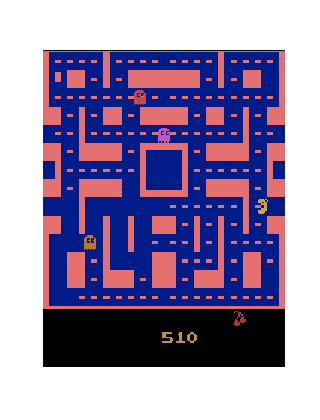
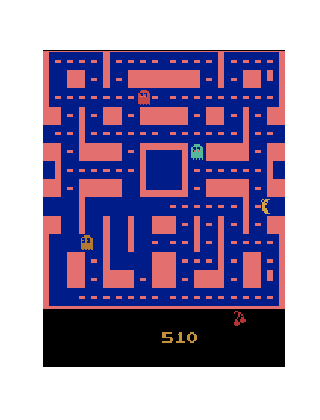
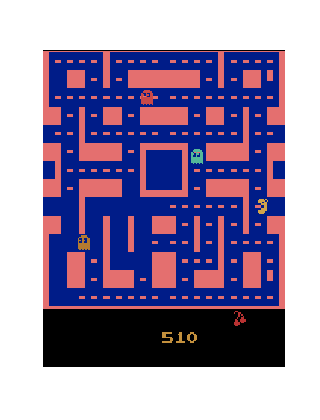
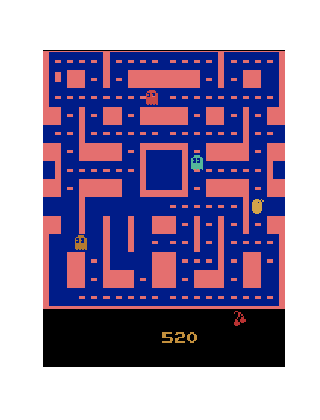
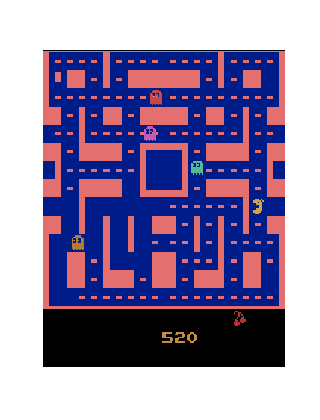
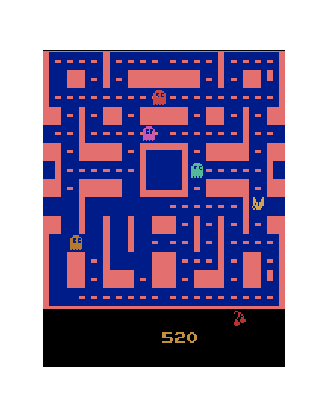
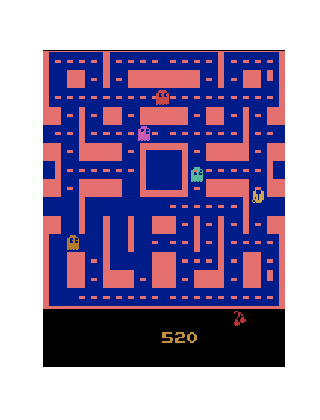
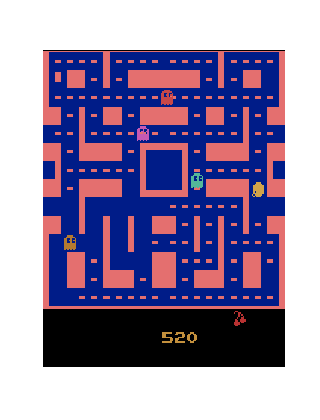
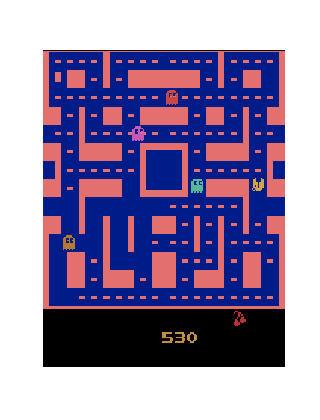
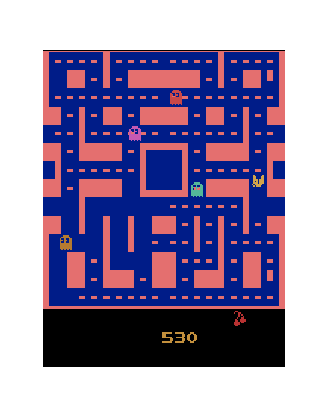
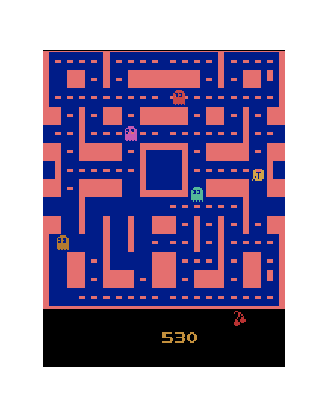
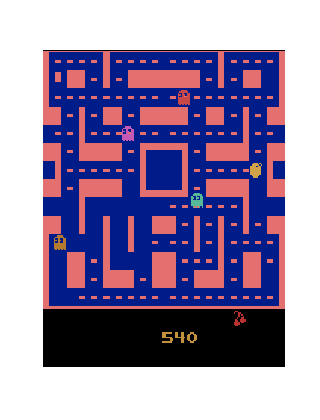
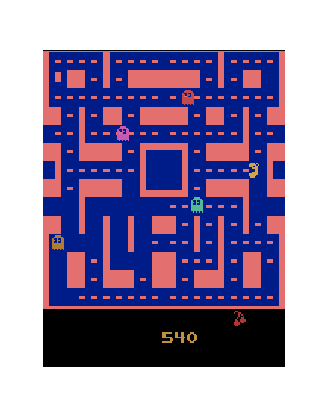
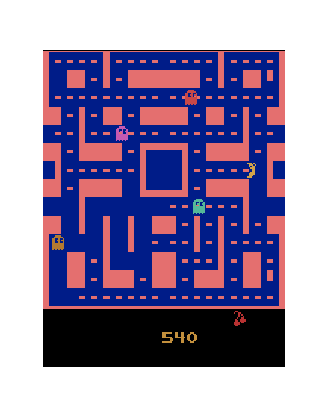
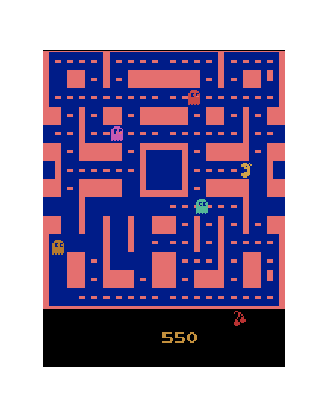
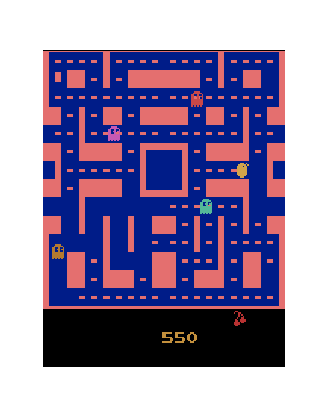
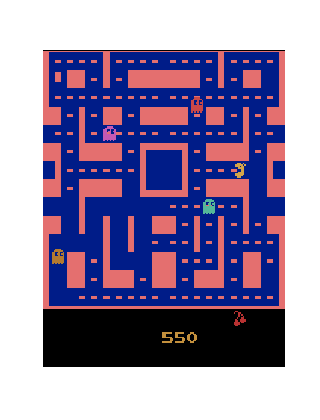
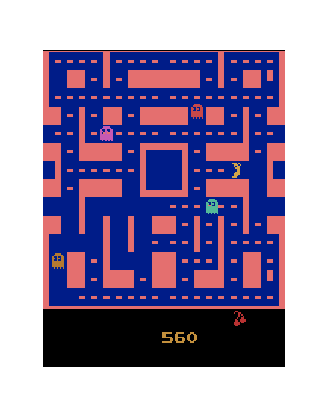
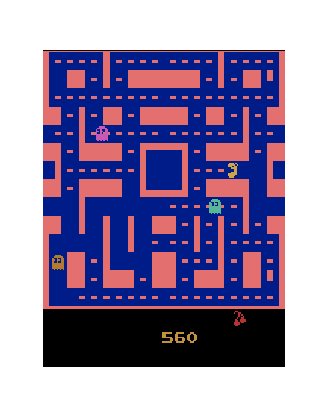
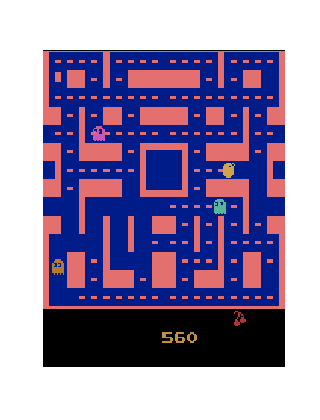
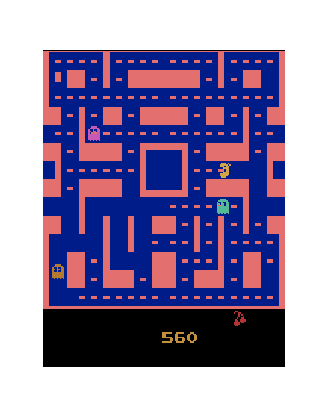
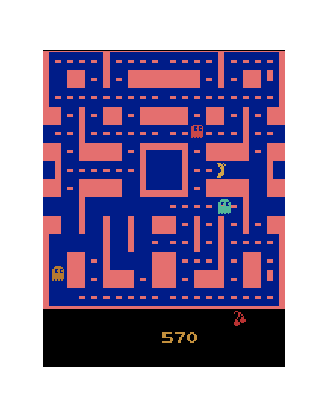
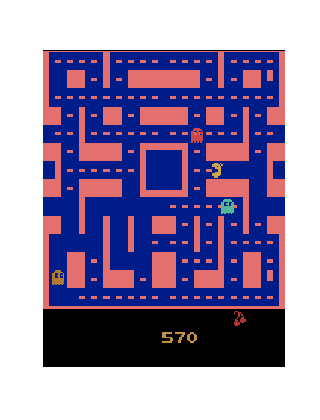
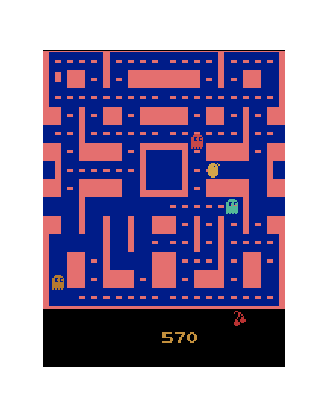
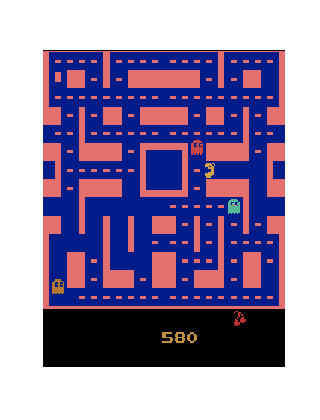
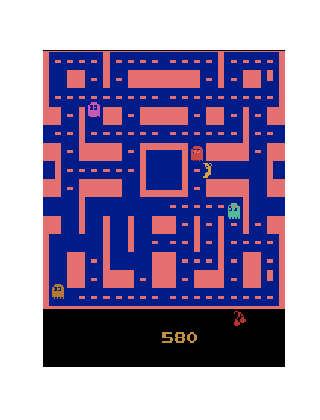
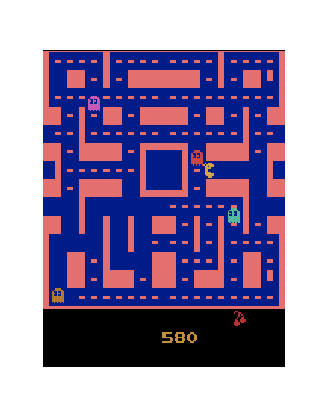
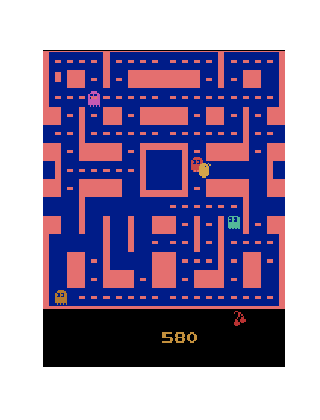
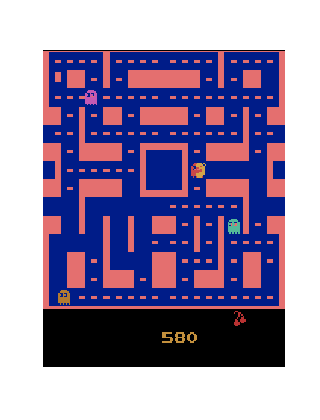
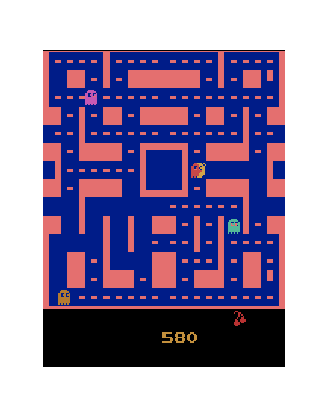
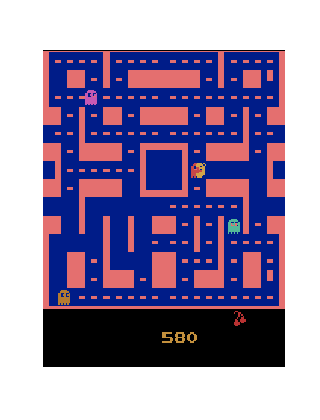
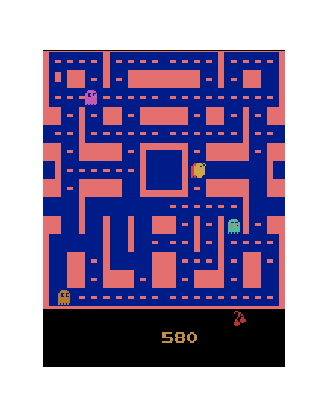
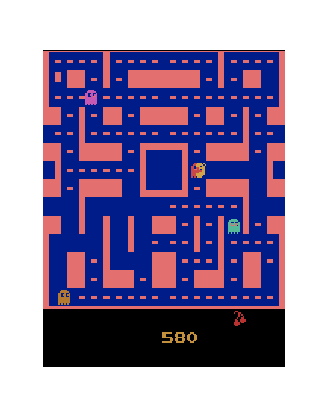
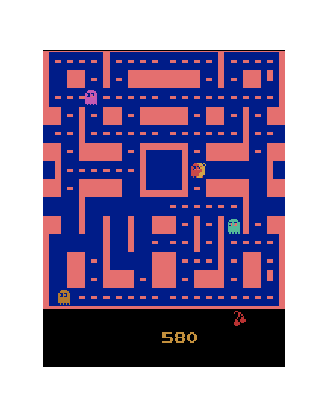
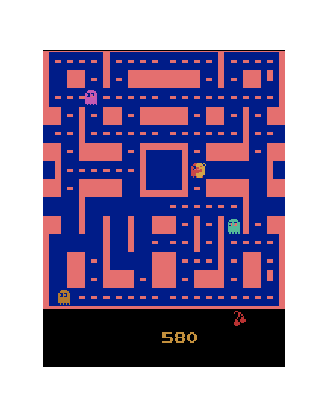
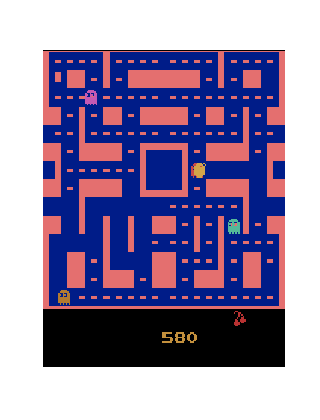
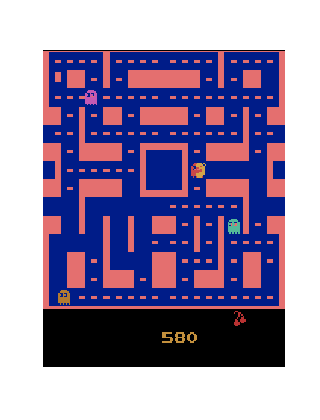
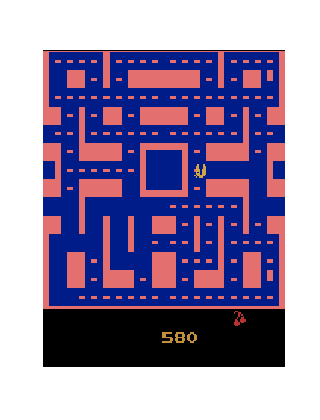
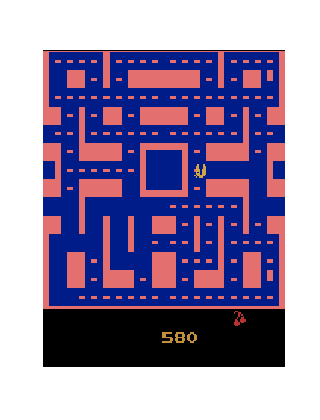
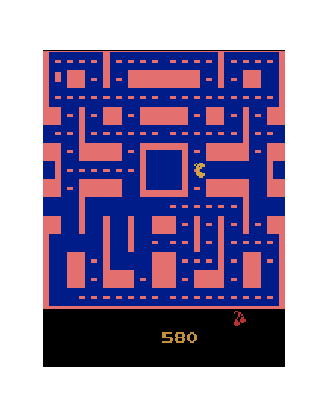
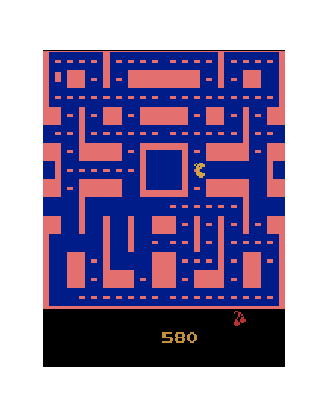
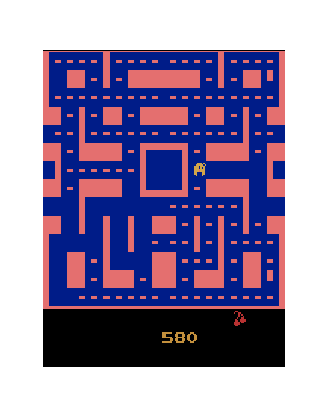
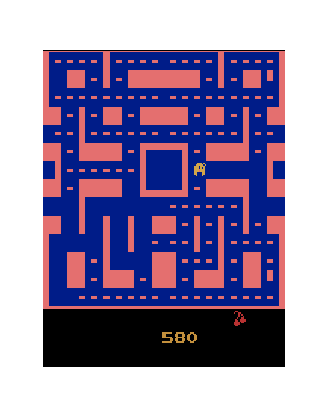
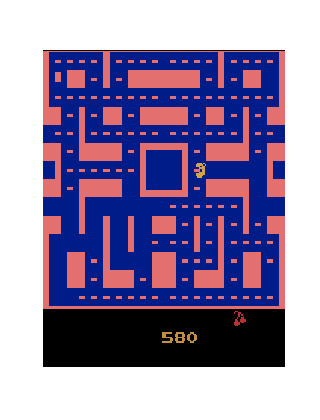
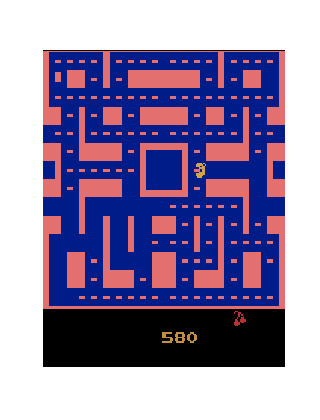
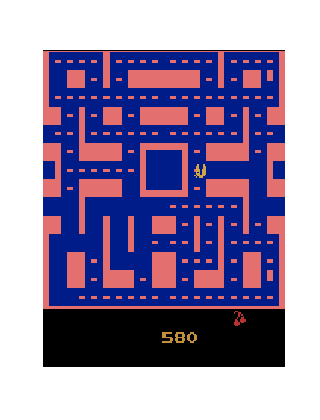
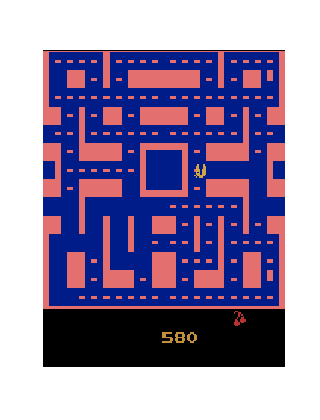

In [17]:
display_frames_as_gif(frames)